# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

sb.set_style("darkgrid")

import constants as const

import warnings
warnings.filterwarnings("ignore")

# Load datasets

In [2]:
ranked_dataset=pd.read_csv(const.path_treated_dataset)
rotas_dataframe_array=[pd.read_csv(const.path_routes_datasets+rota_name+"_dataset.csv") 
                       for rota_name in const.rotas_names]

numero_partidas_minimo=min([len(dataframe.values) for dataframe in rotas_dataframe_array])
dataframe_routes_importance=pd.read_csv(const.path_routes_importance)
dataframe_crossvalidation_score=pd.read_csv(const.path_models_crossvalidation_score)

# Save graphics statistics images

/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


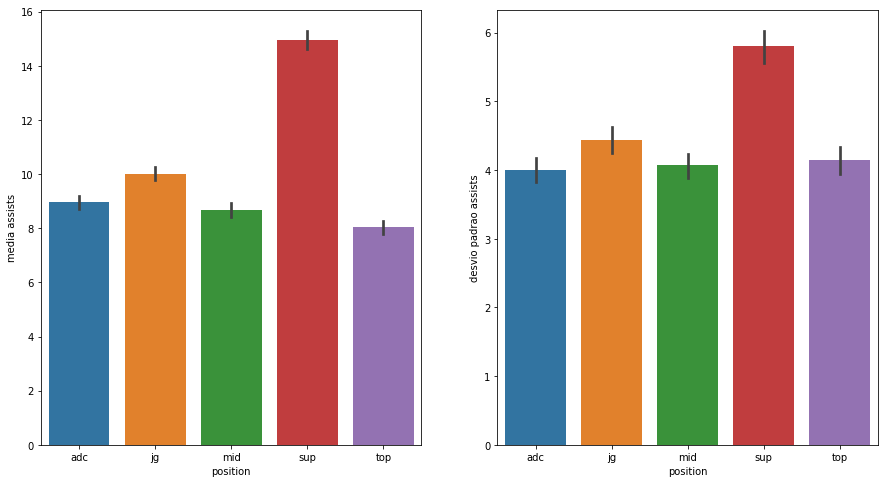

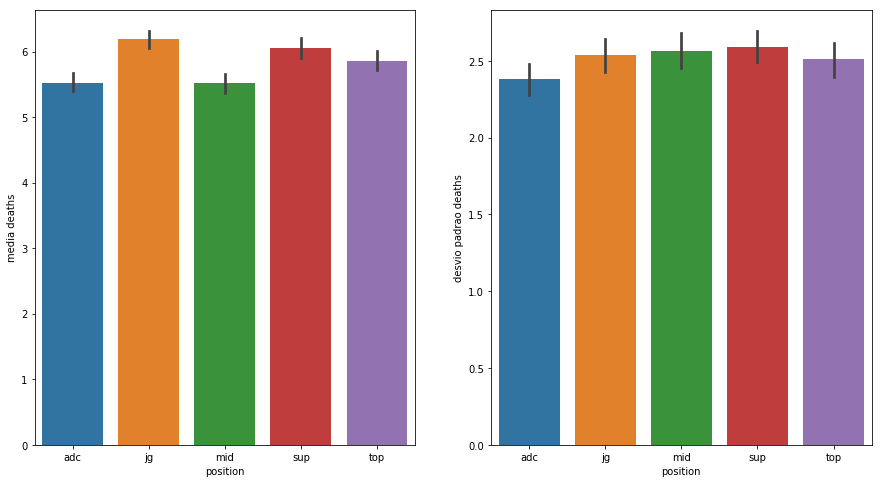

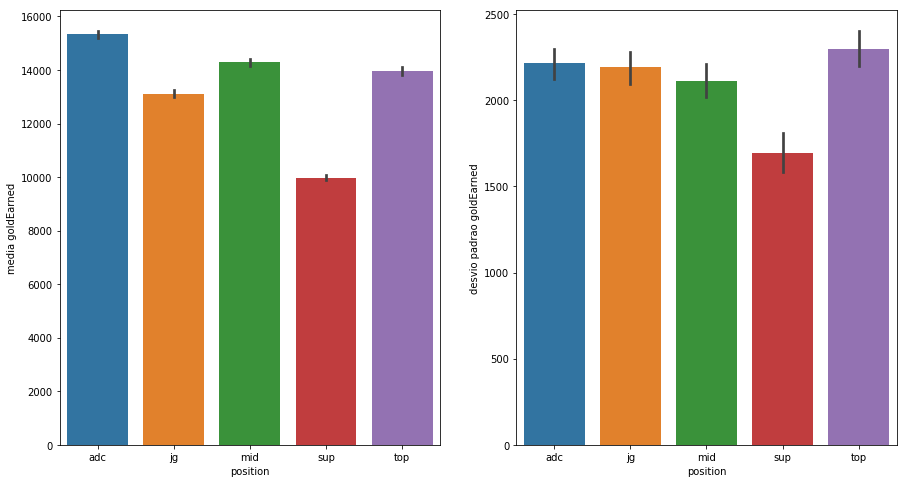

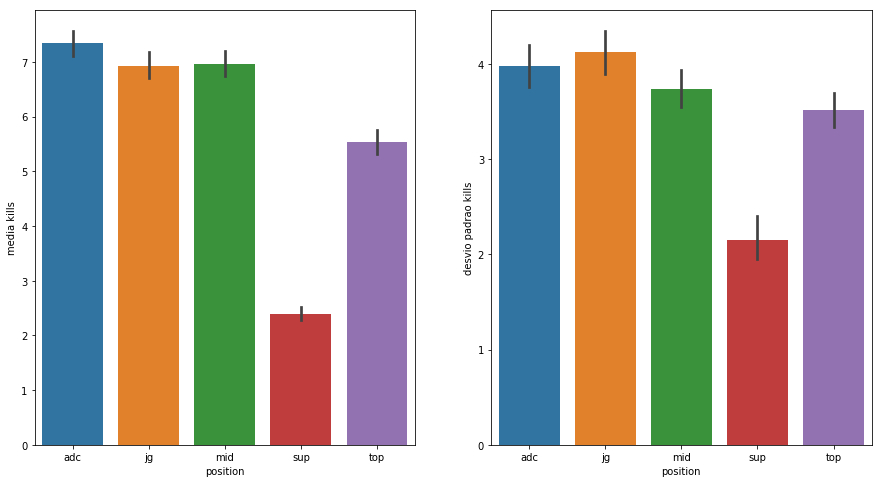

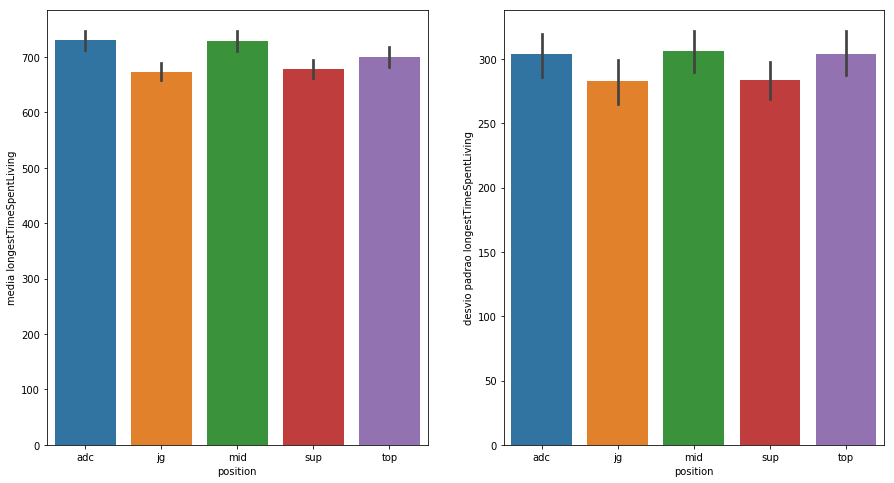

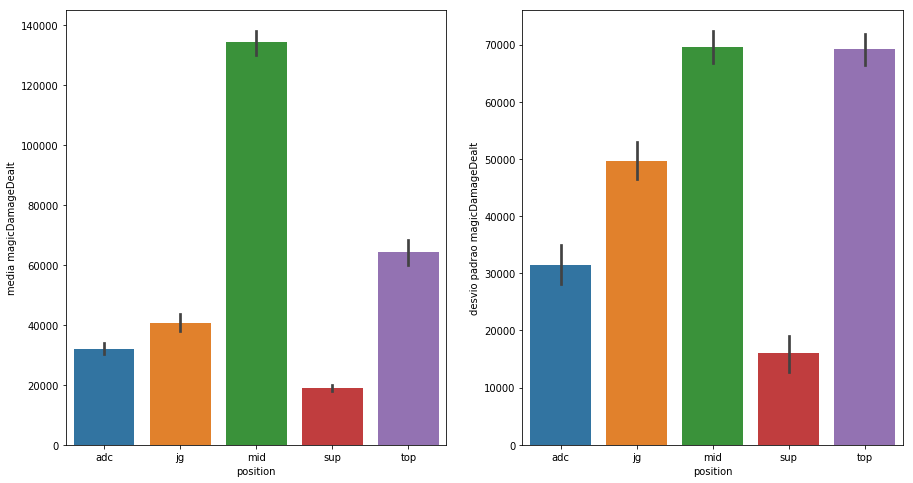

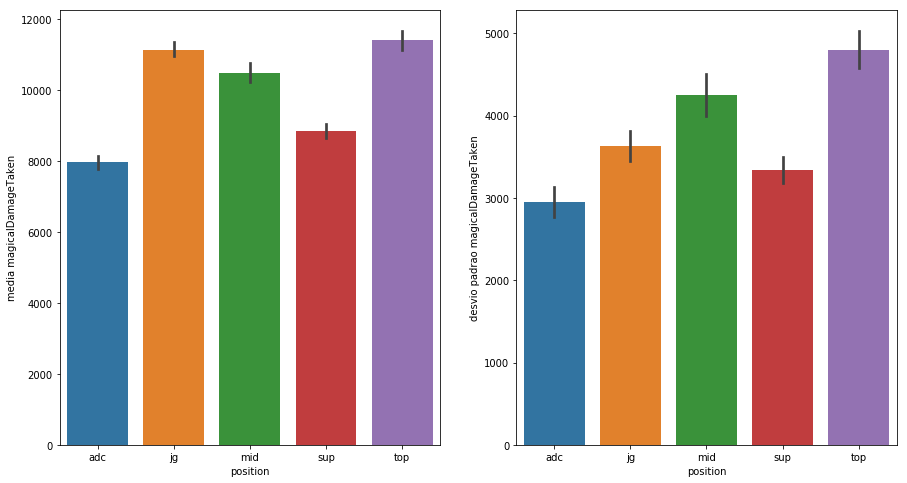

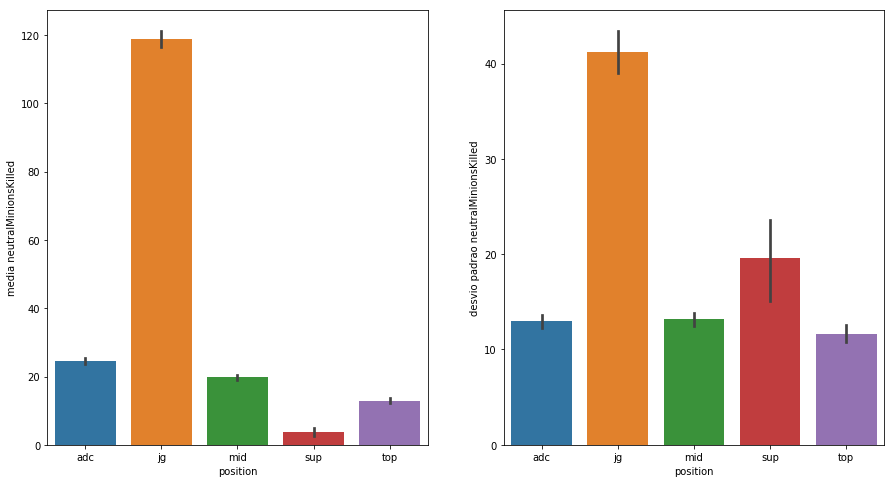

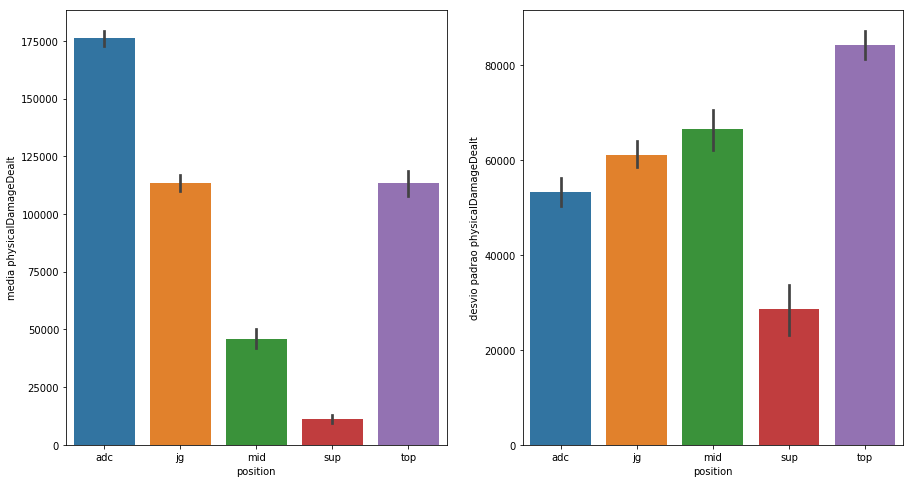

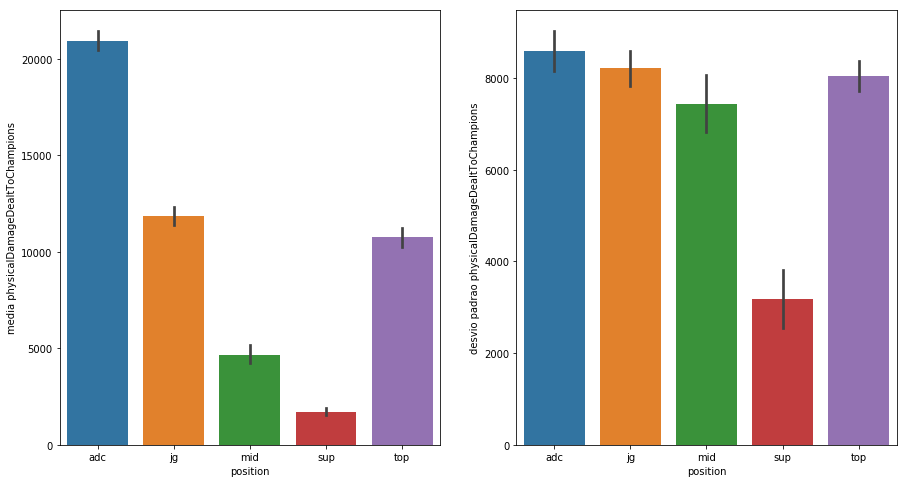

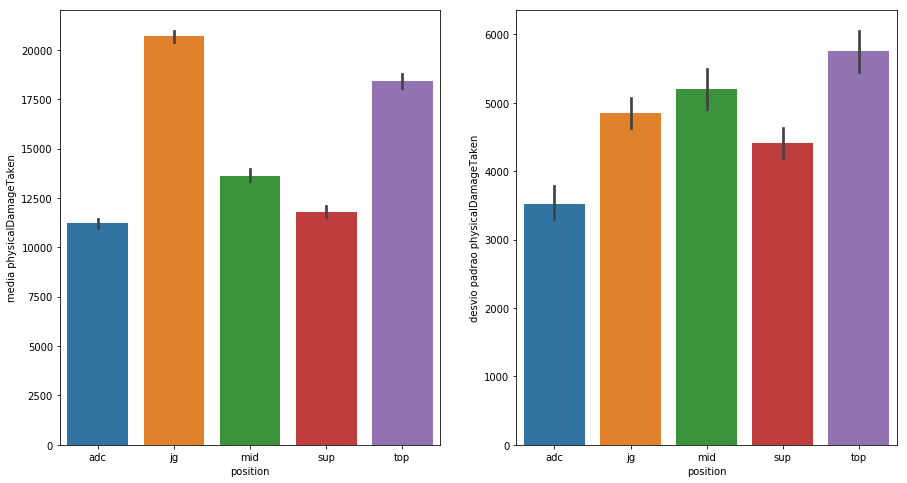

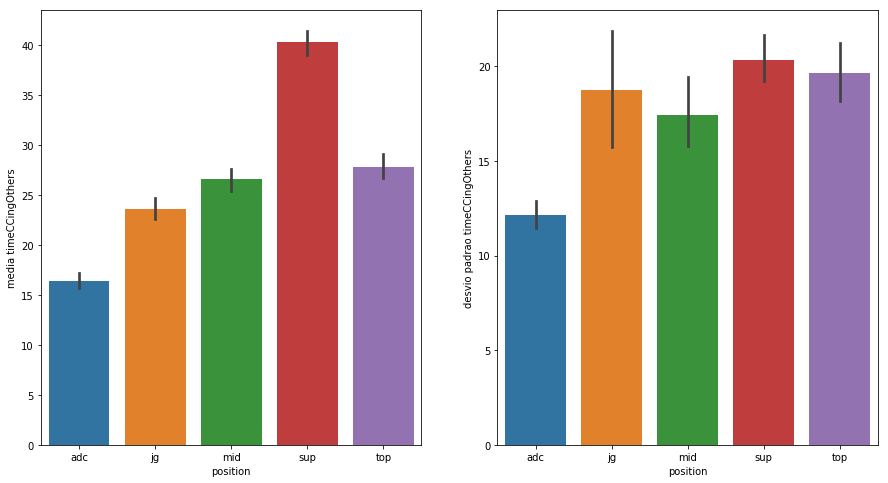

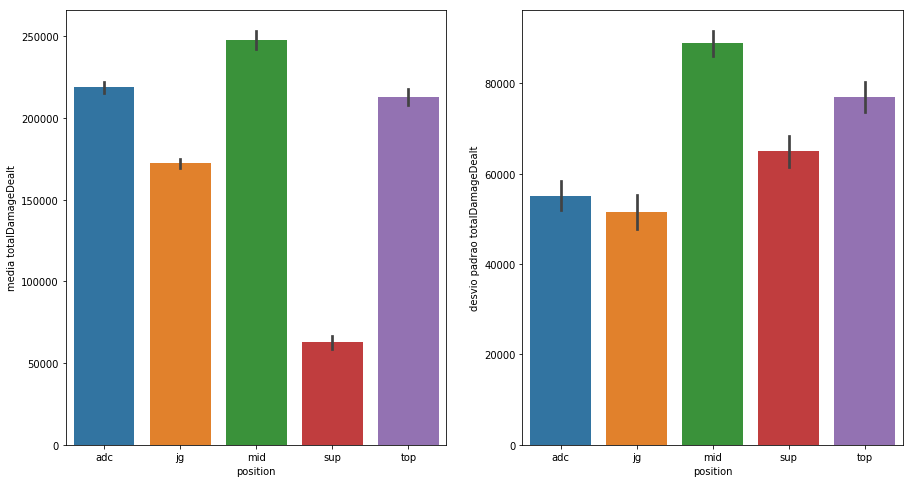

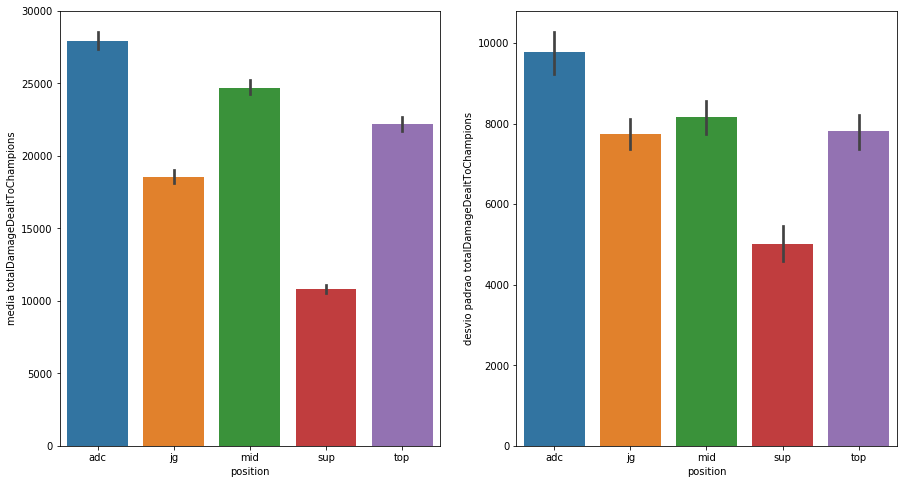

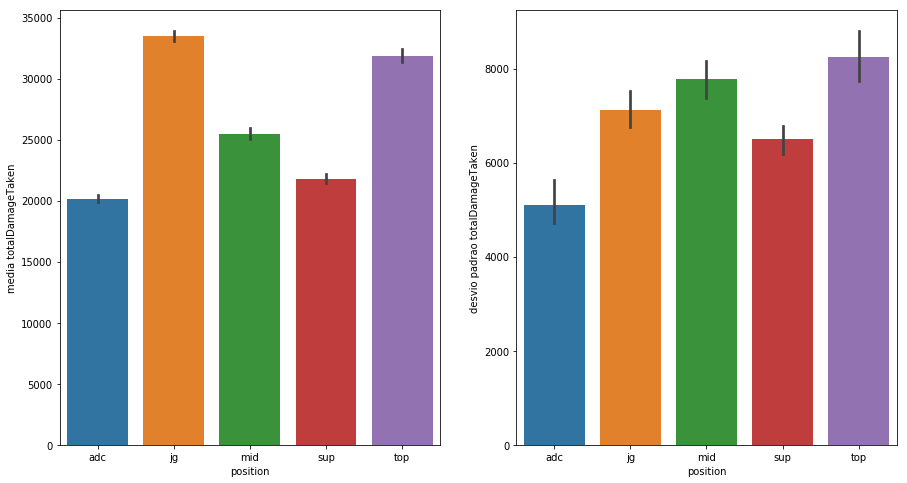

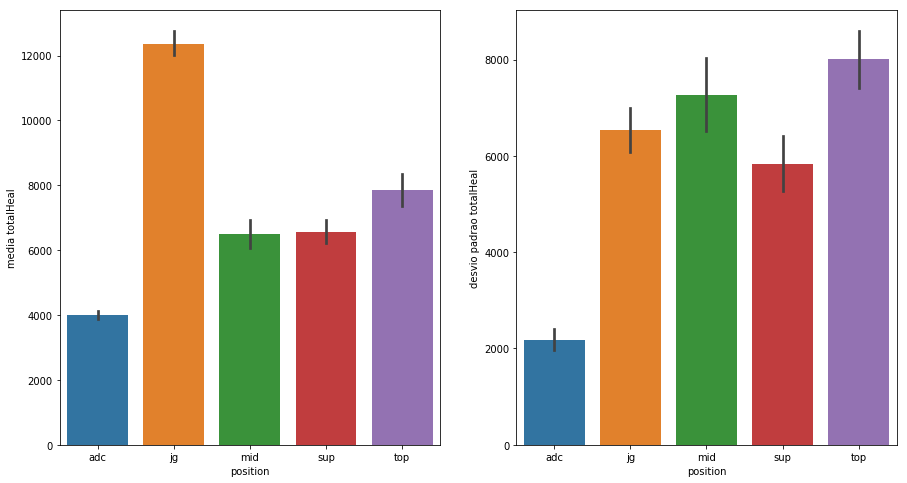

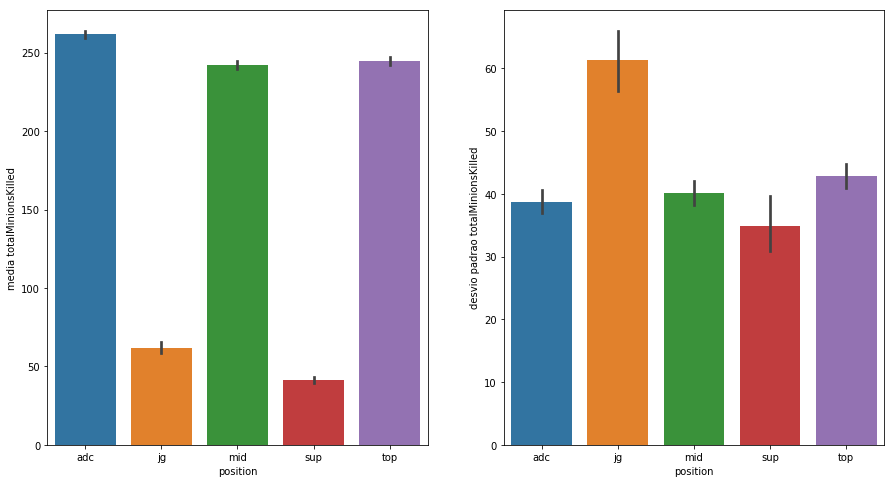

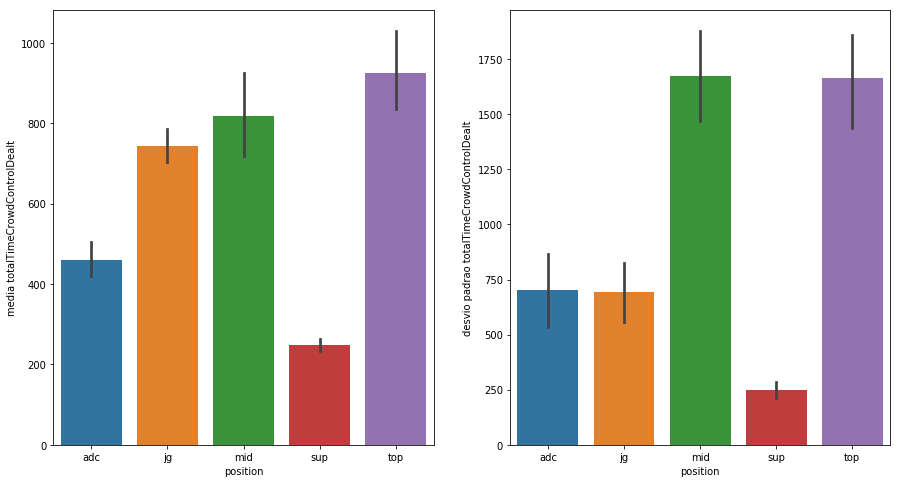

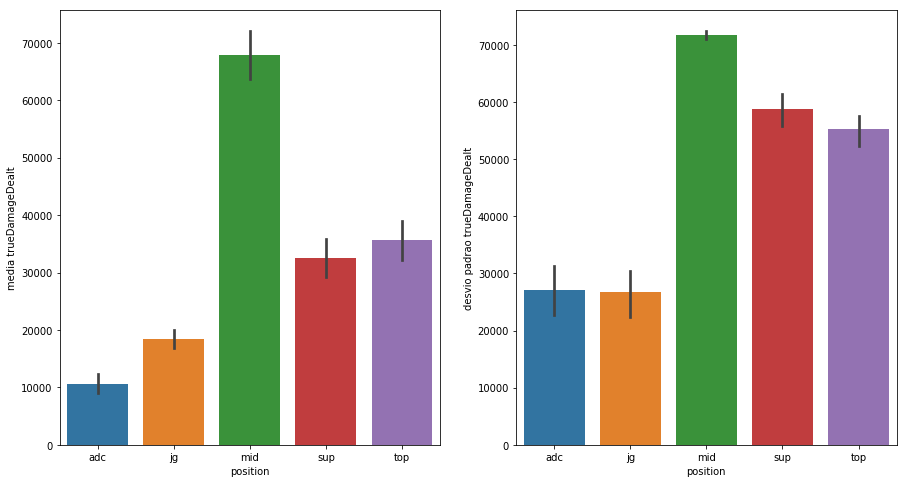

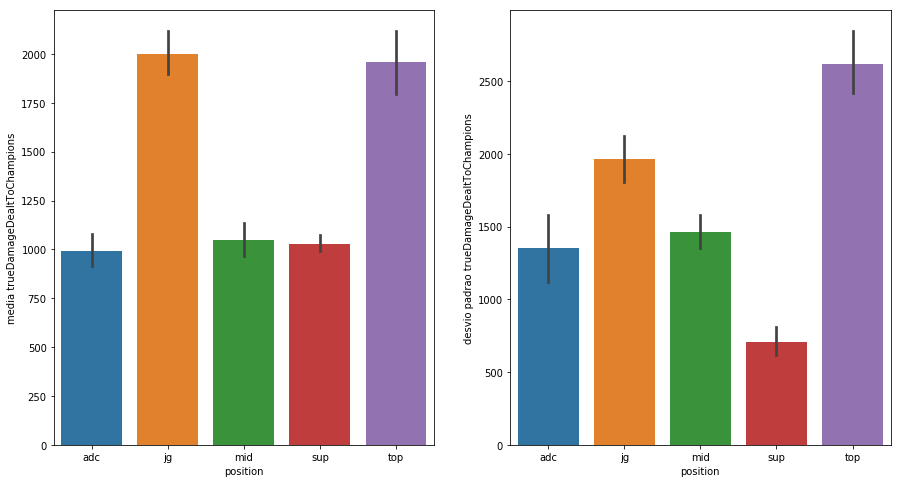

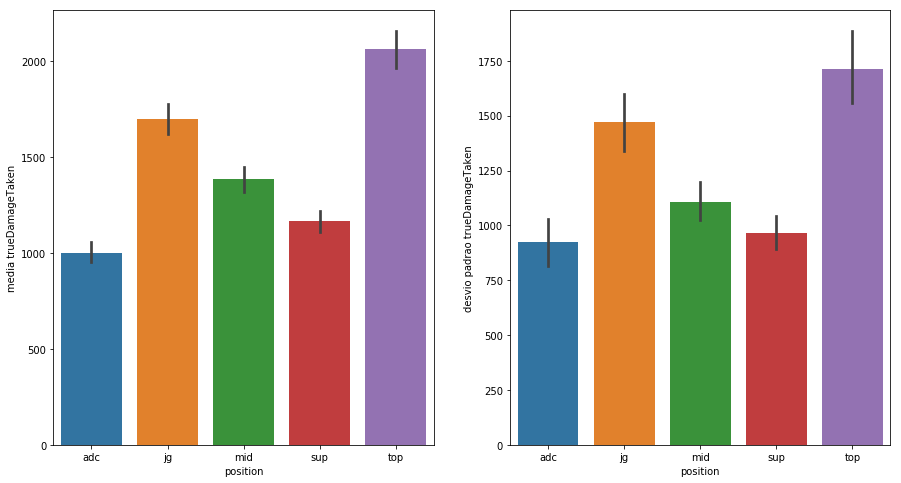

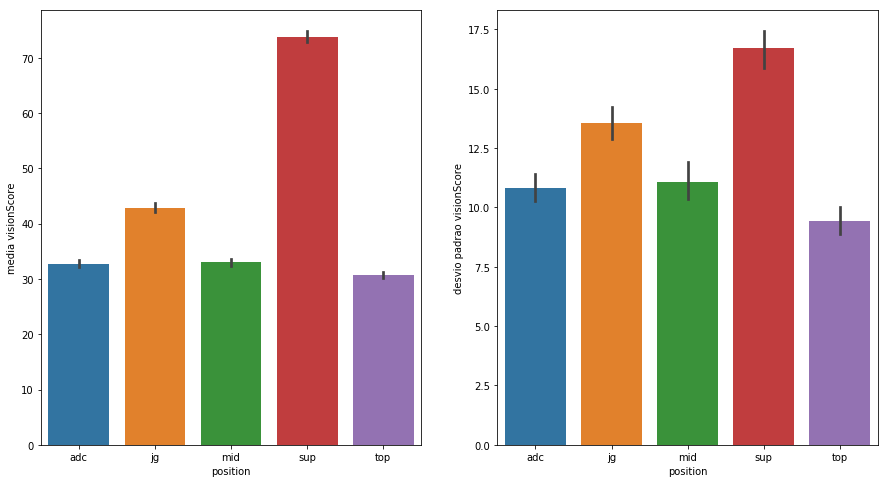

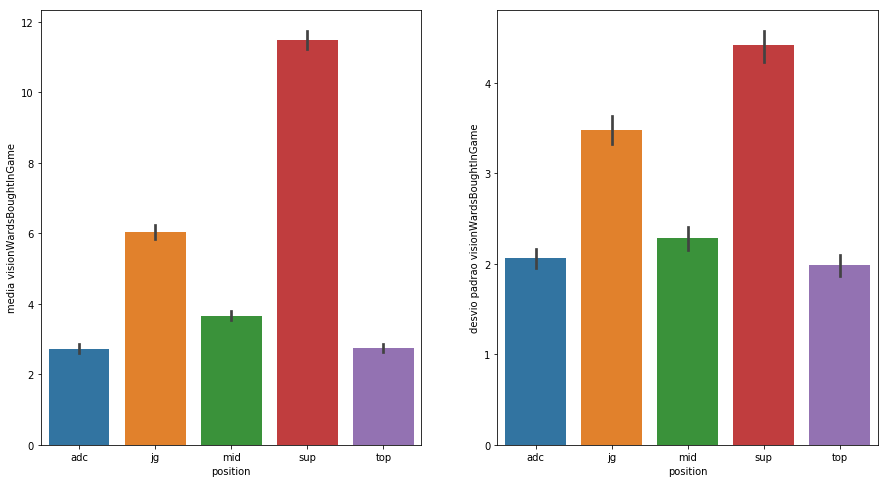

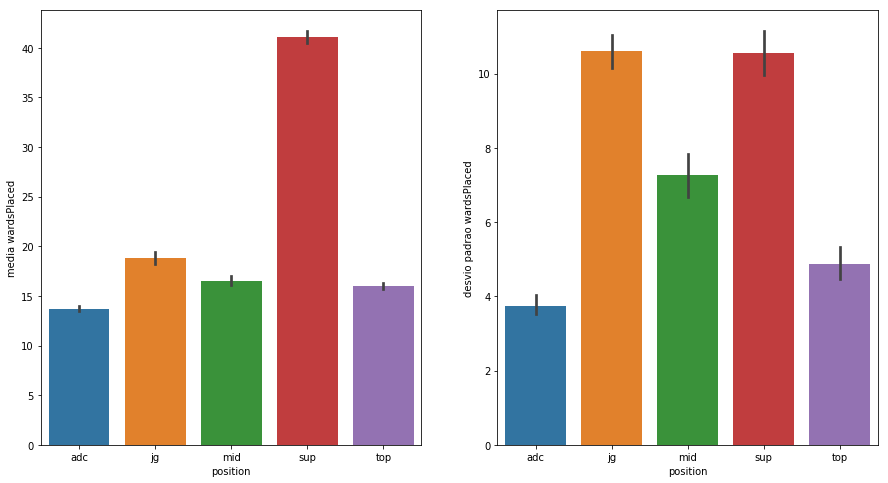

In [11]:
#salva imagens das estatisticas basicas comparando cada rota

for atributo in const.atributos_numericos:
    fig=plt.figure(figsize=(15,8))
    ax_mean=fig.add_subplot(121)
    ax_std=fig.add_subplot(122)
    ax_mean=sb.barplot(data=ranked_dataset,x="position",y=atributo,estimator=np.mean,ax=ax_mean)
    ax_std=sb.barplot(data=ranked_dataset,x="position",y=atributo,estimator=np.std,ax=ax_std)
    ax_mean.set_ylabel("media {0}".format(atributo))
    ax_std.set_ylabel("desvio padrao {0}".format(atributo))
    fig.savefig(file_statistics+atributo+".png")


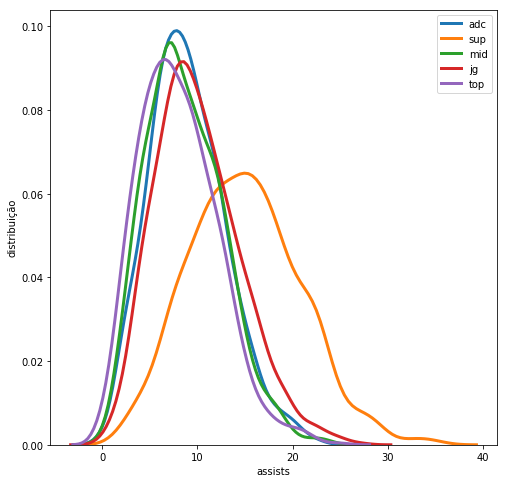

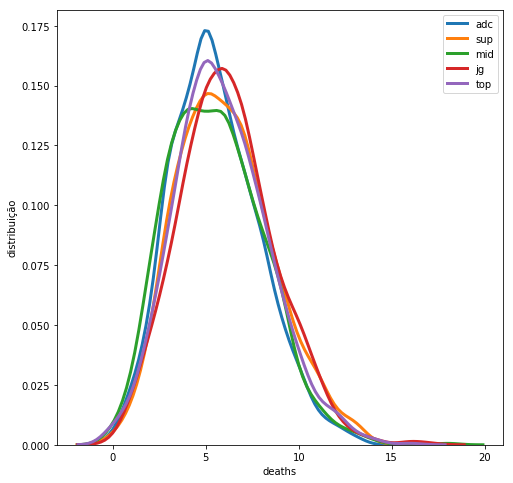

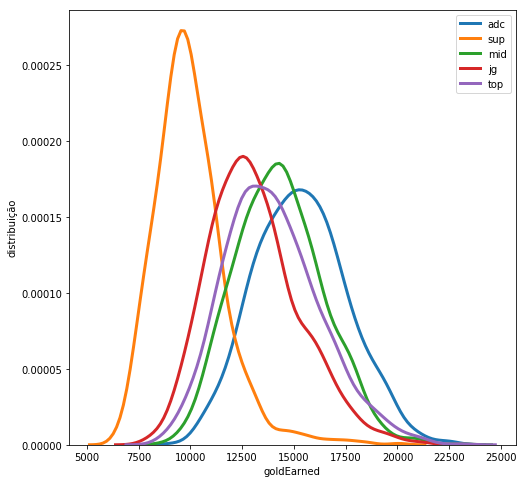

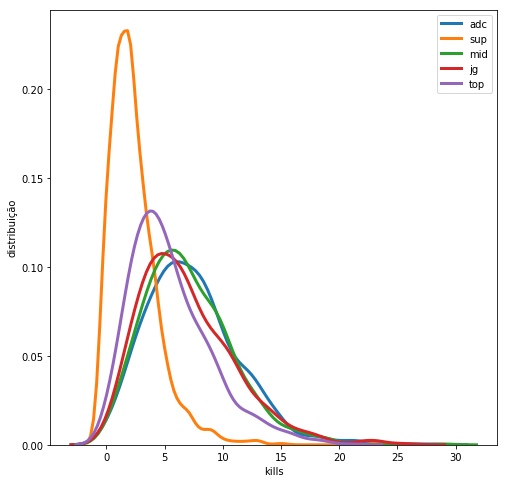

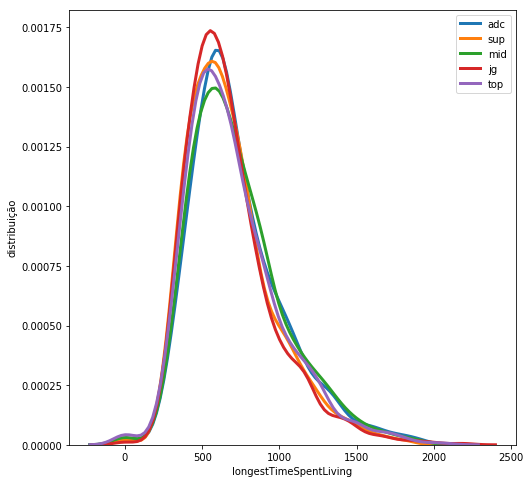

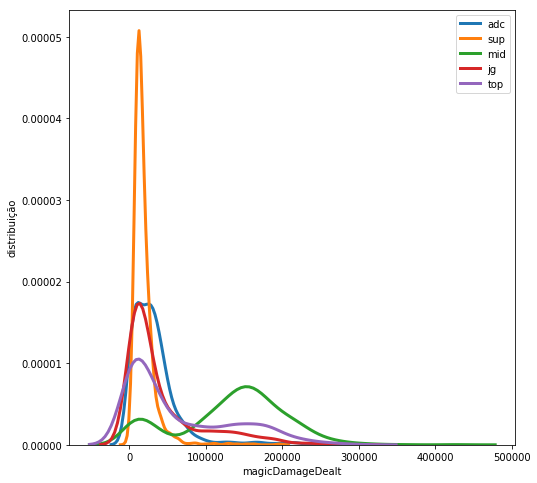

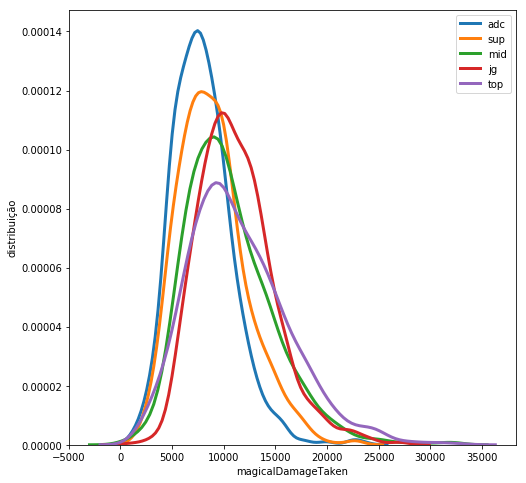

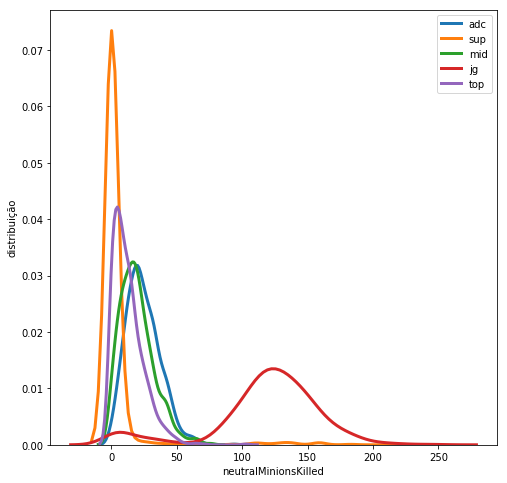

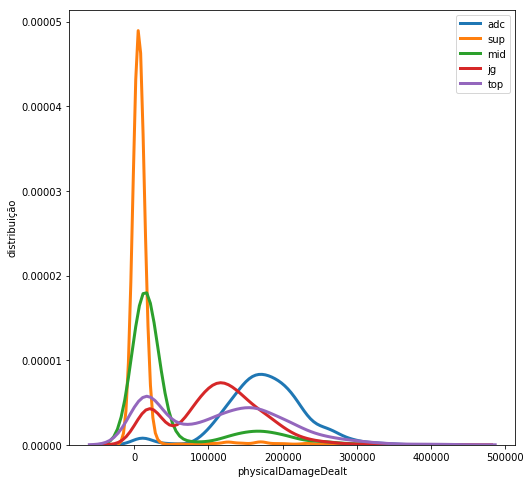

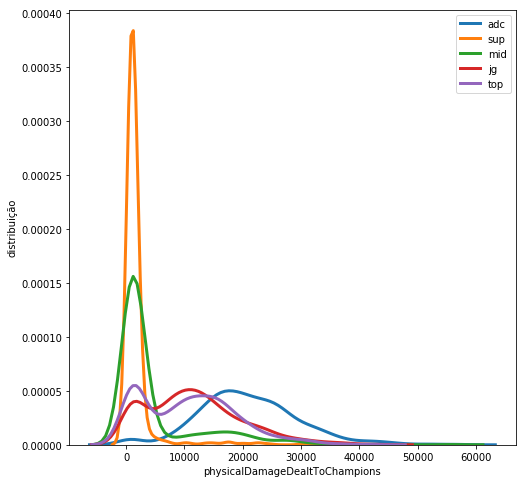

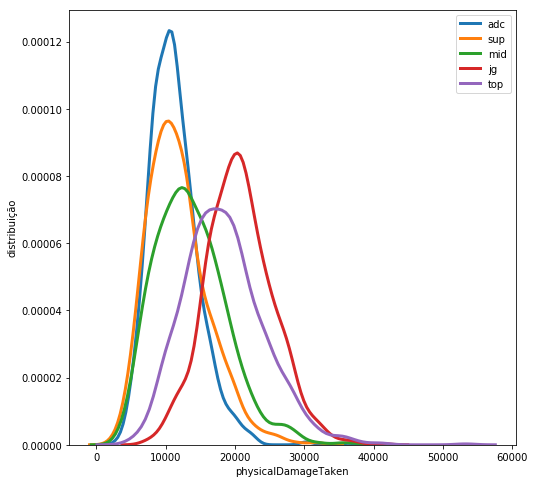

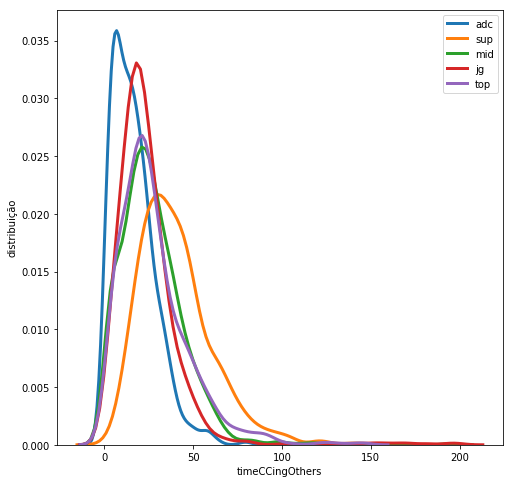

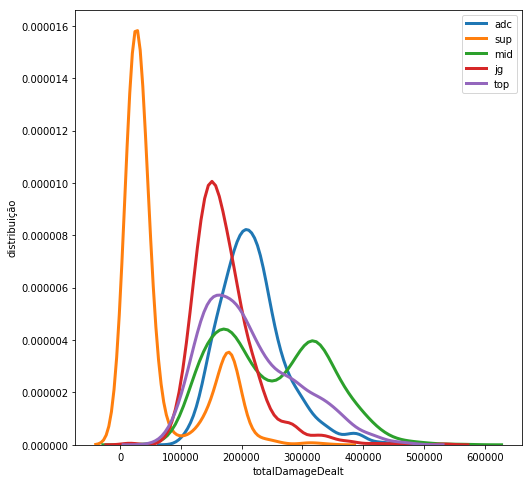

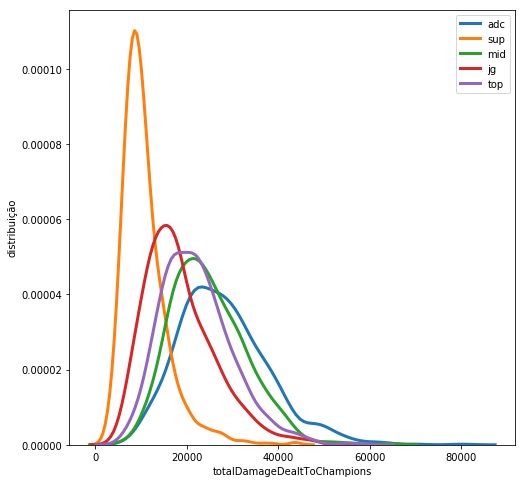

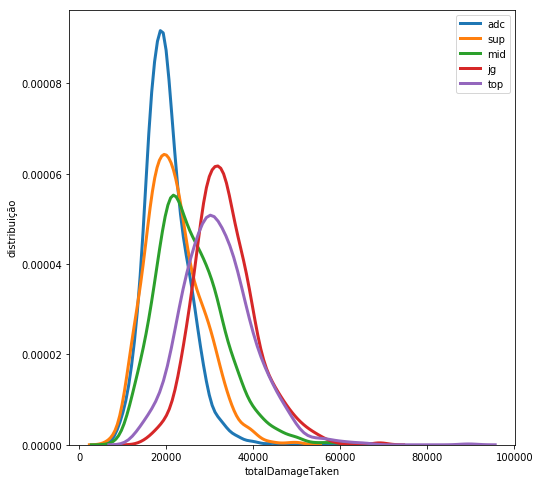

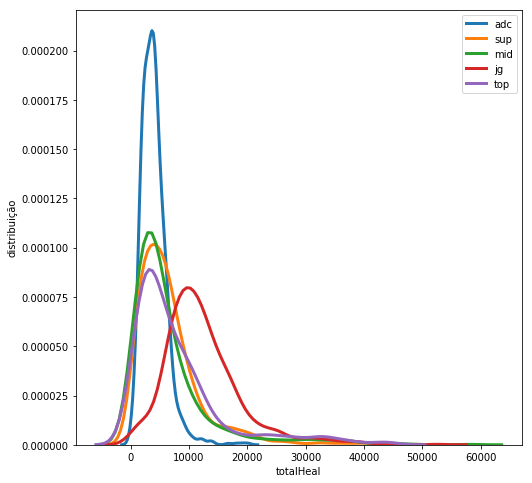

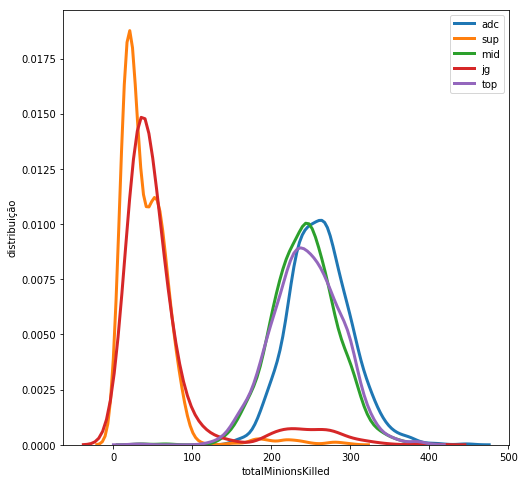

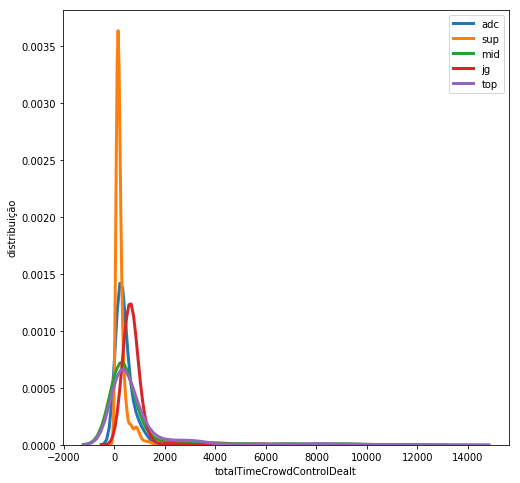

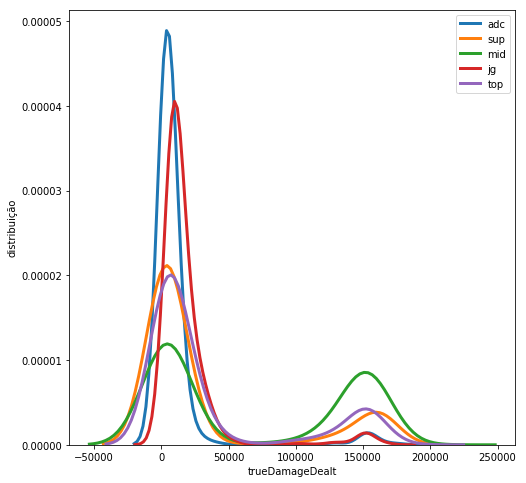

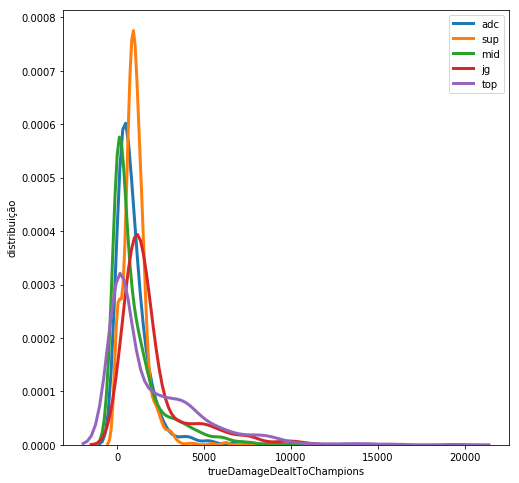

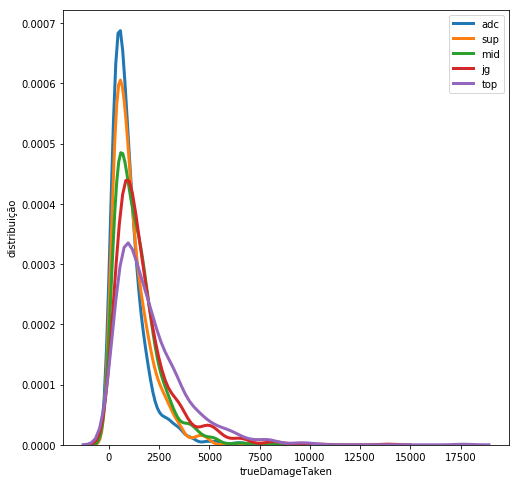

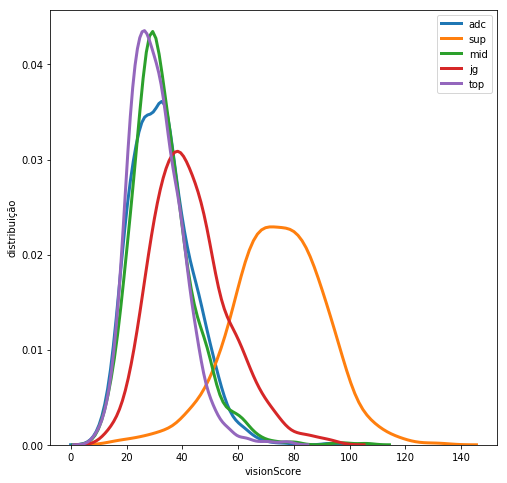

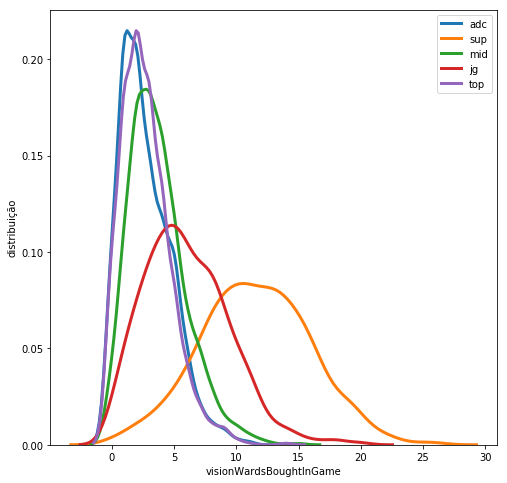

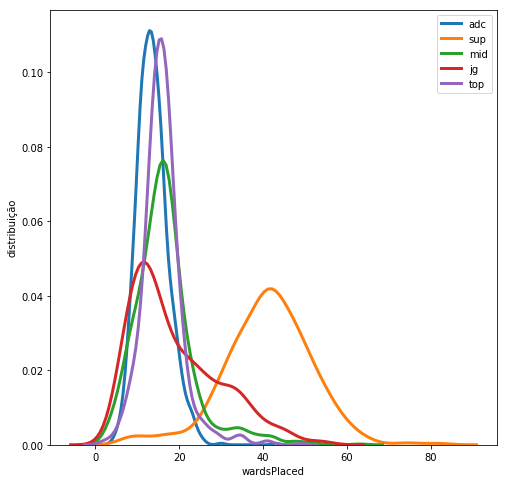

In [19]:
#salva imagens das distribuições de cada atributo de acordo com a rota

for atributo in const.atributos_numericos:
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111)

    for label,dataframe in zip(const.rotas_names,rotas_dataframe_array):
        ax=sb.distplot(dataframe[atributo].values[:numero_partidas_minimo],label=label,hist=False,
                       kde_kws = {'linewidth': 3},ax=ax)
    ax.set_ylabel("distribuição")
    ax.set_xlabel(atributo)
    fig.savefig(file_distribuition+atributo+".png")

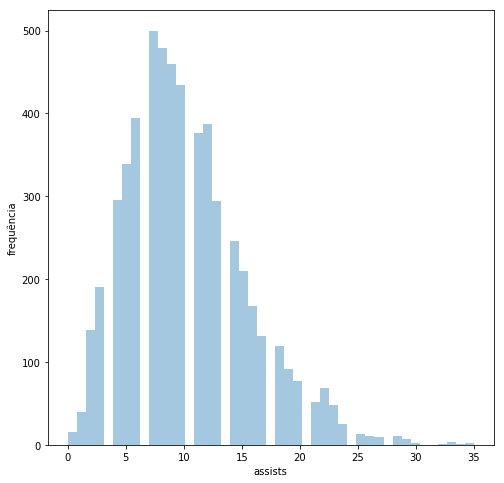

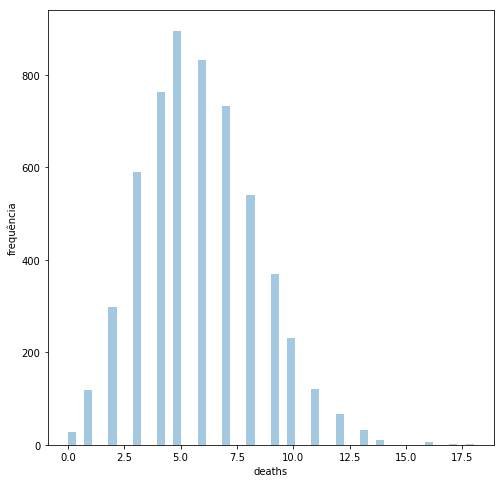

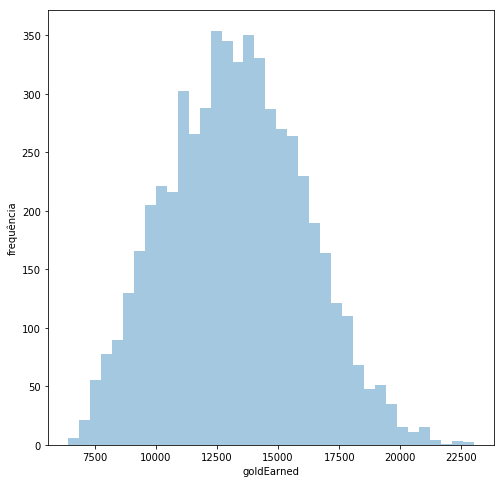

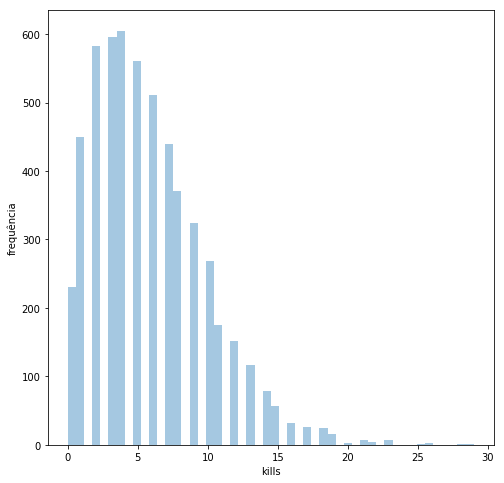

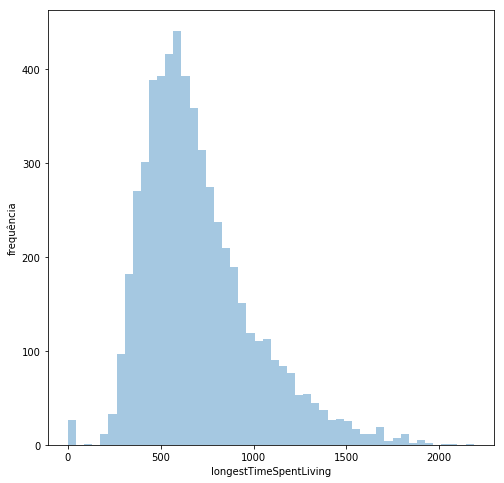

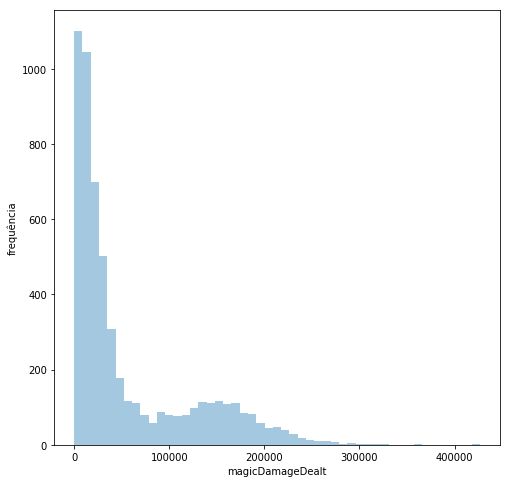

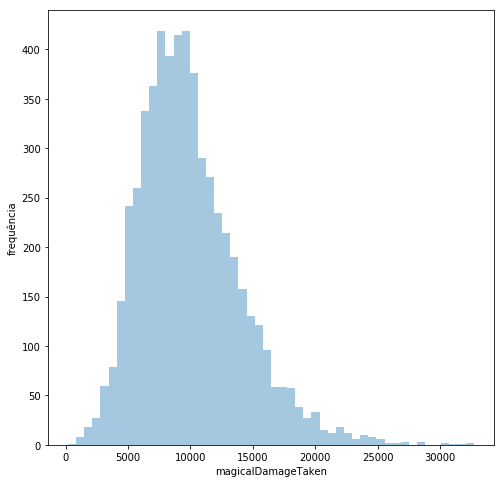

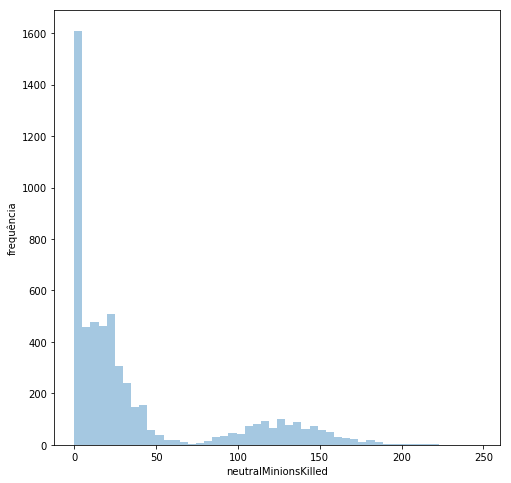

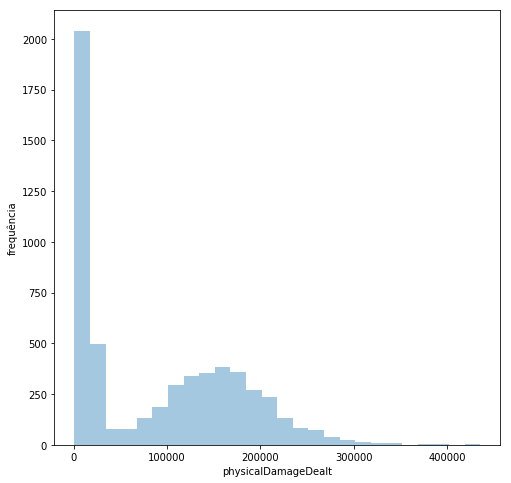

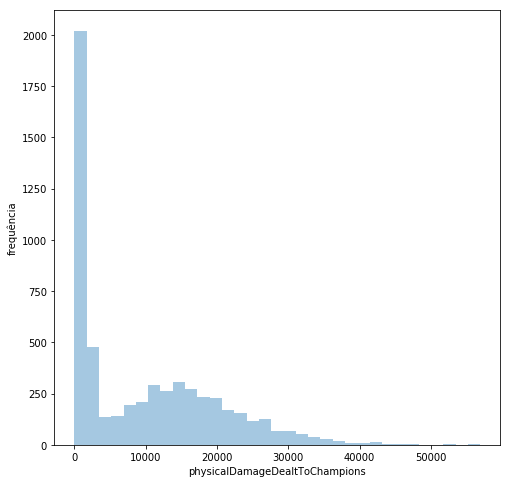

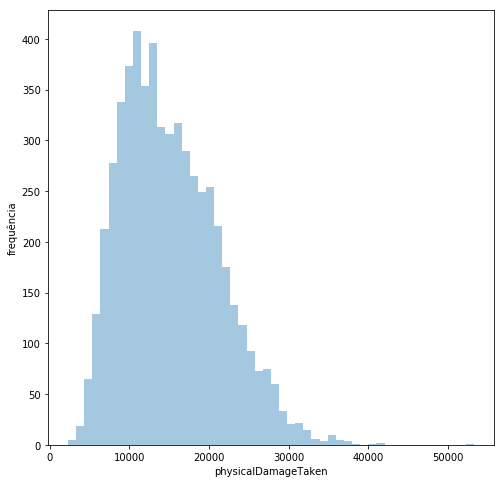

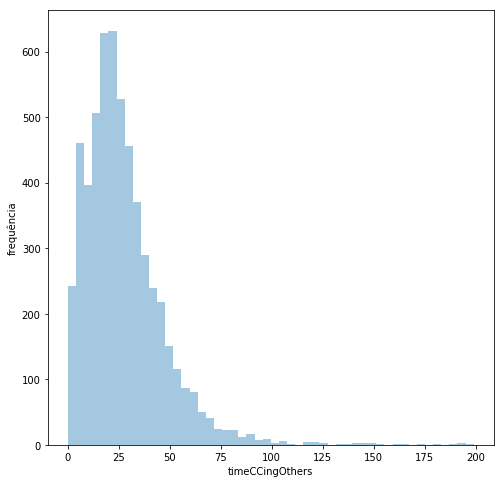

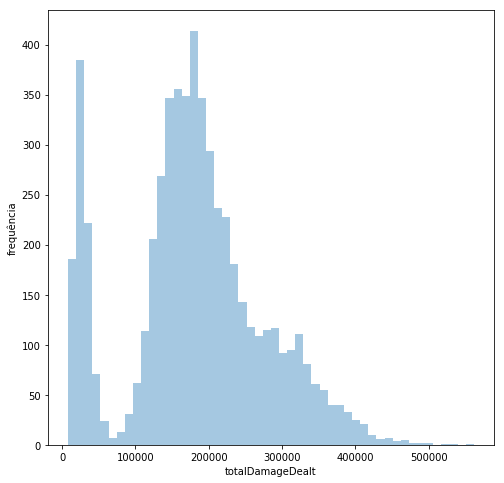

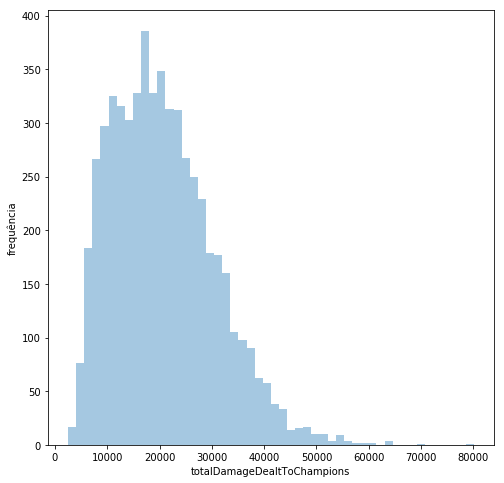

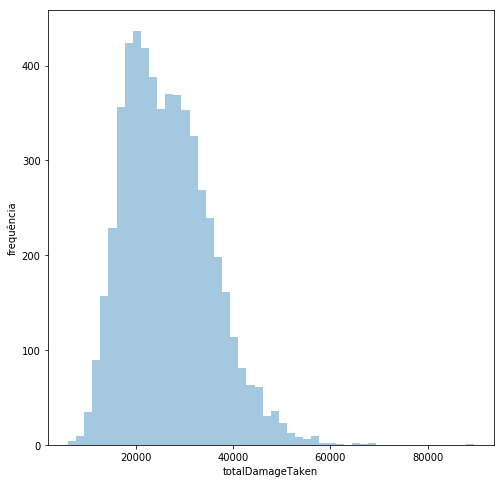

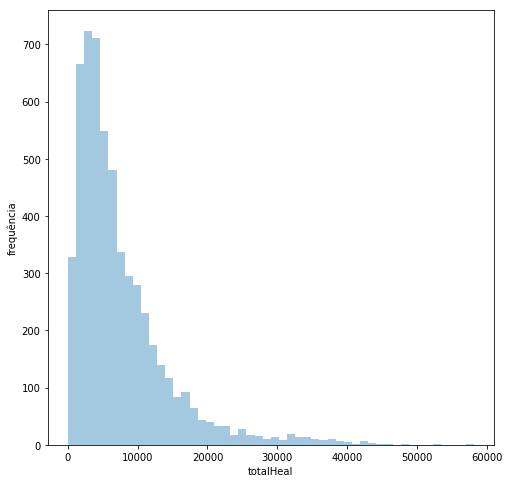

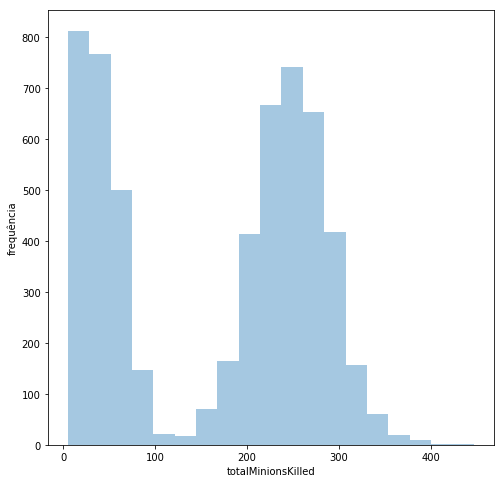

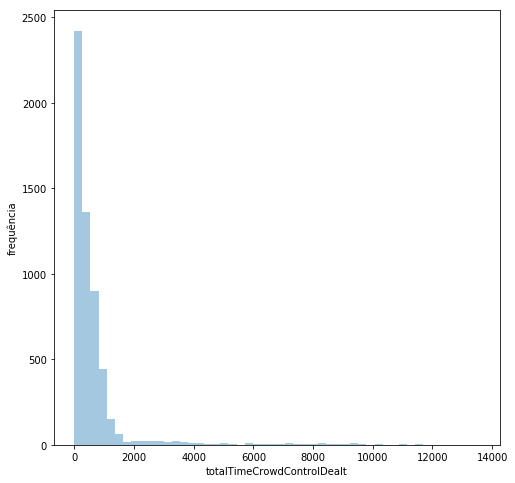

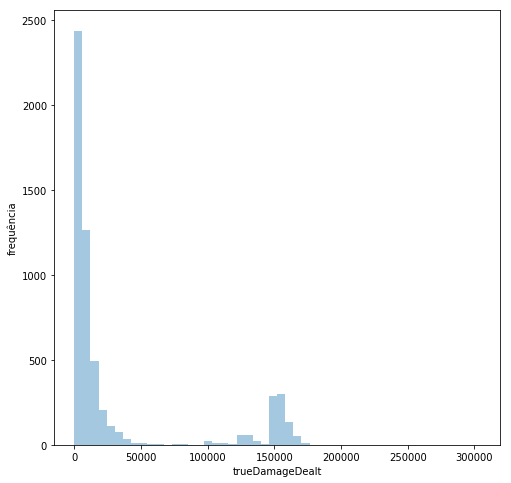

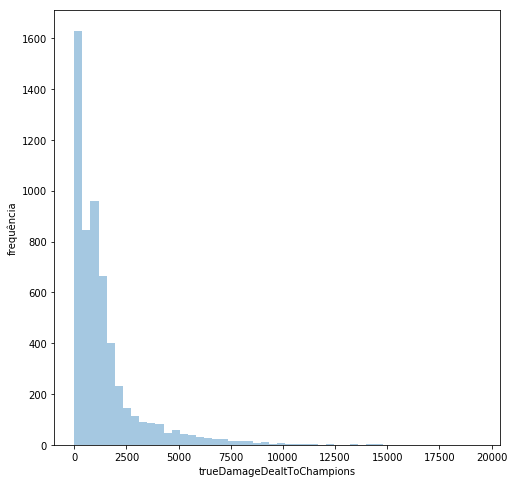

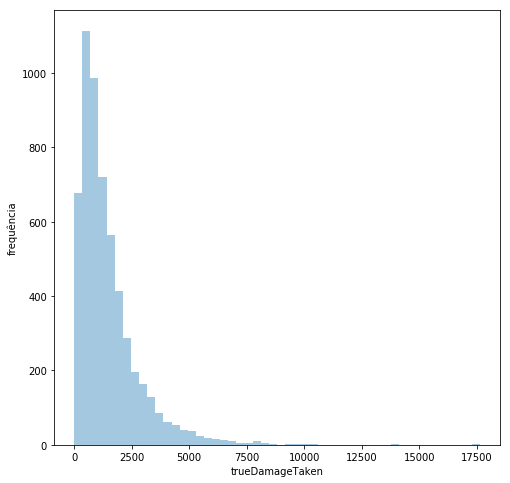

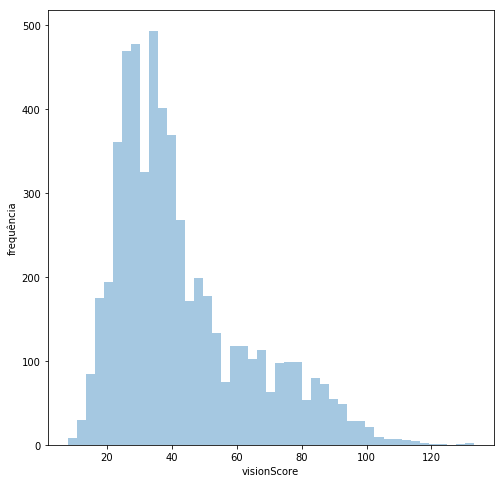

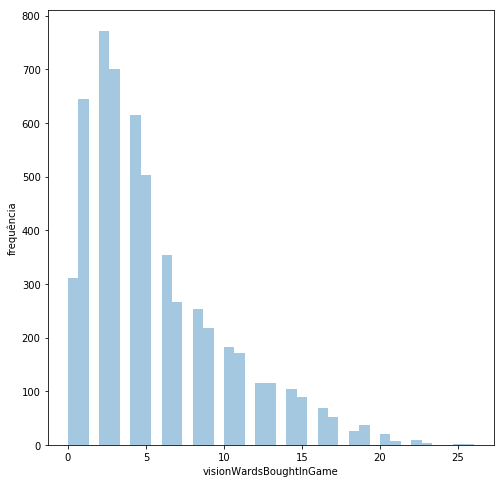

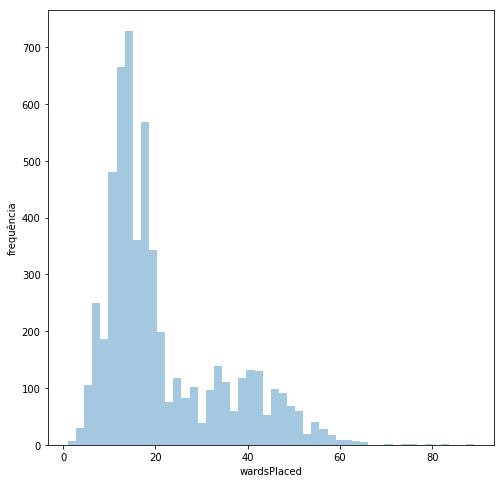

In [20]:
#salva imagens com os histogramas de cada atributo.

for atributo in const.atributos_numericos:
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111)
    ax=sb.distplot(ranked_dataset[atributo],kde=False,ax=ax)
    ax.set_ylabel("frequência")
    fig.savefig(file_histograms+atributo+".png")

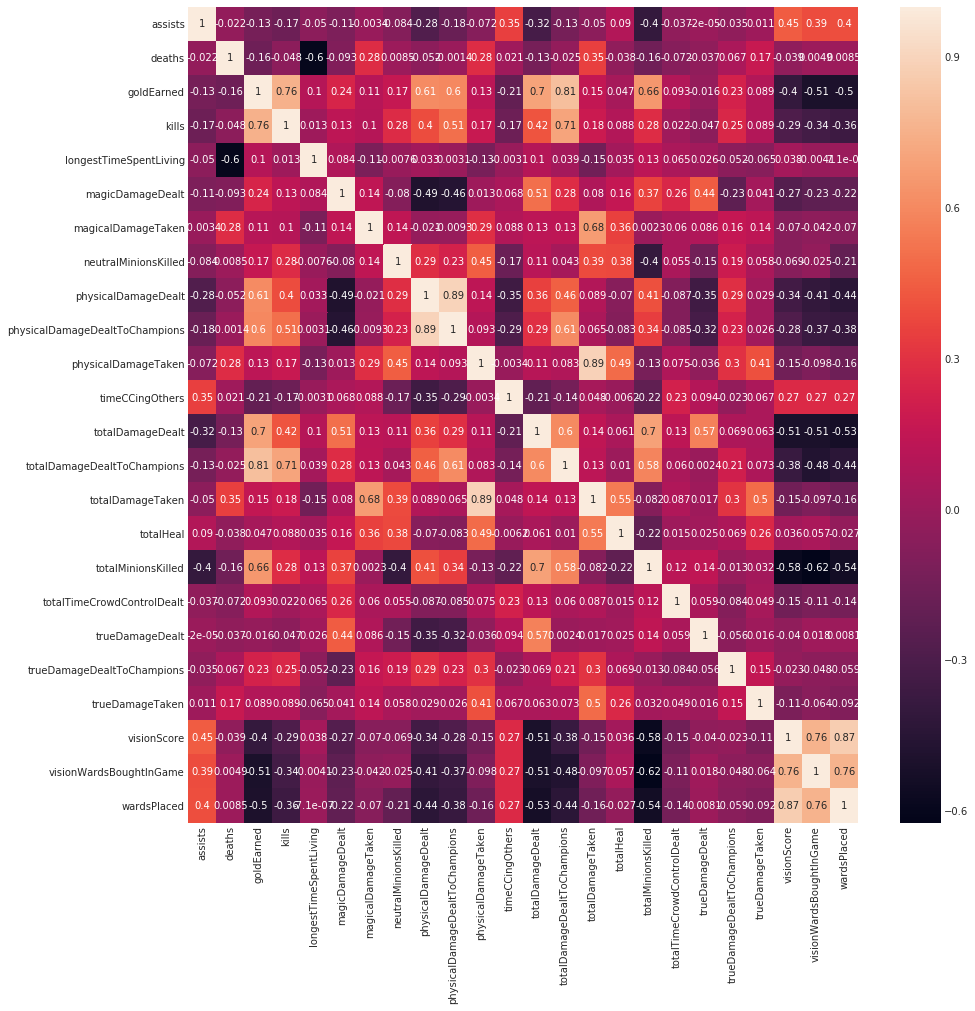

In [3]:
#salvar imagem do mapa de calor das correlações

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
sb.heatmap(data=ranked_dataset.get(const.atributos_numericos).corr(),annot=True)
fig.savefig(const.file_heatmap)

KeyboardInterrupt: 

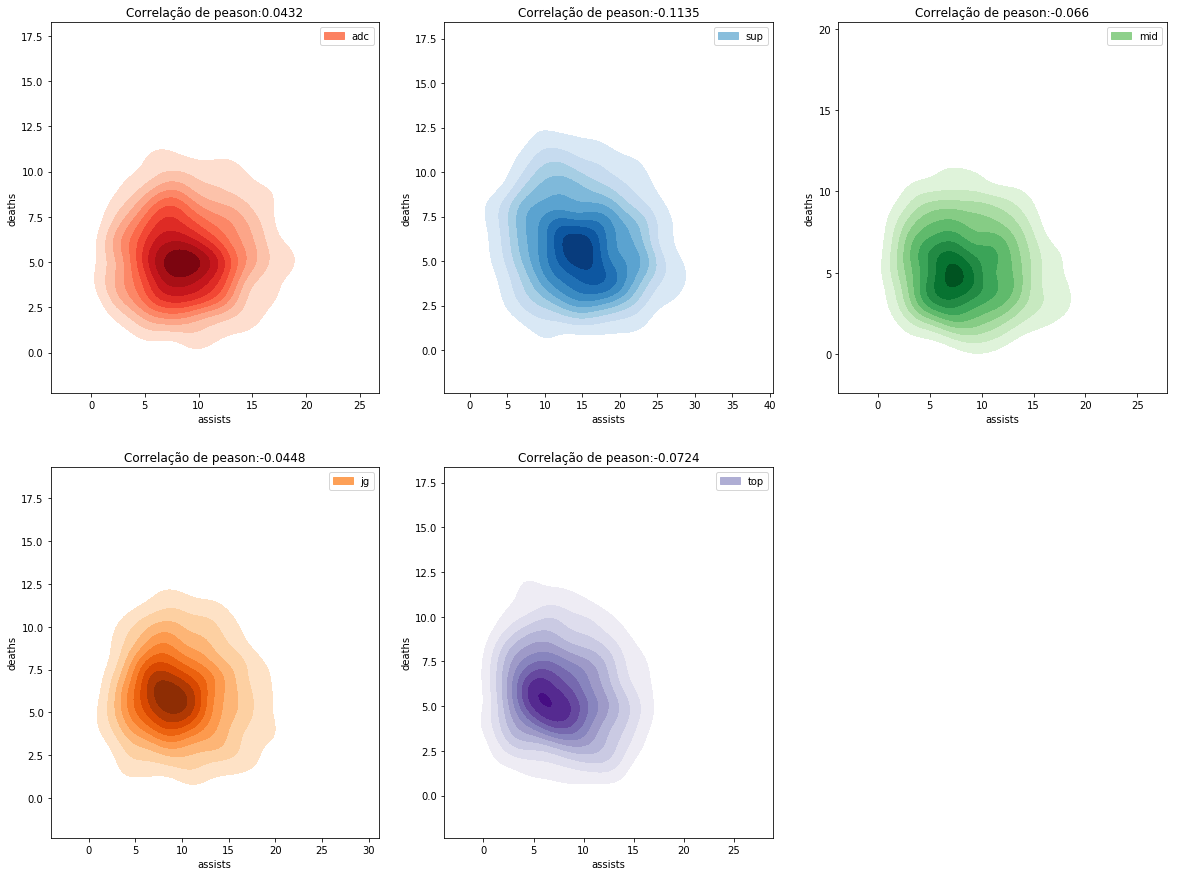

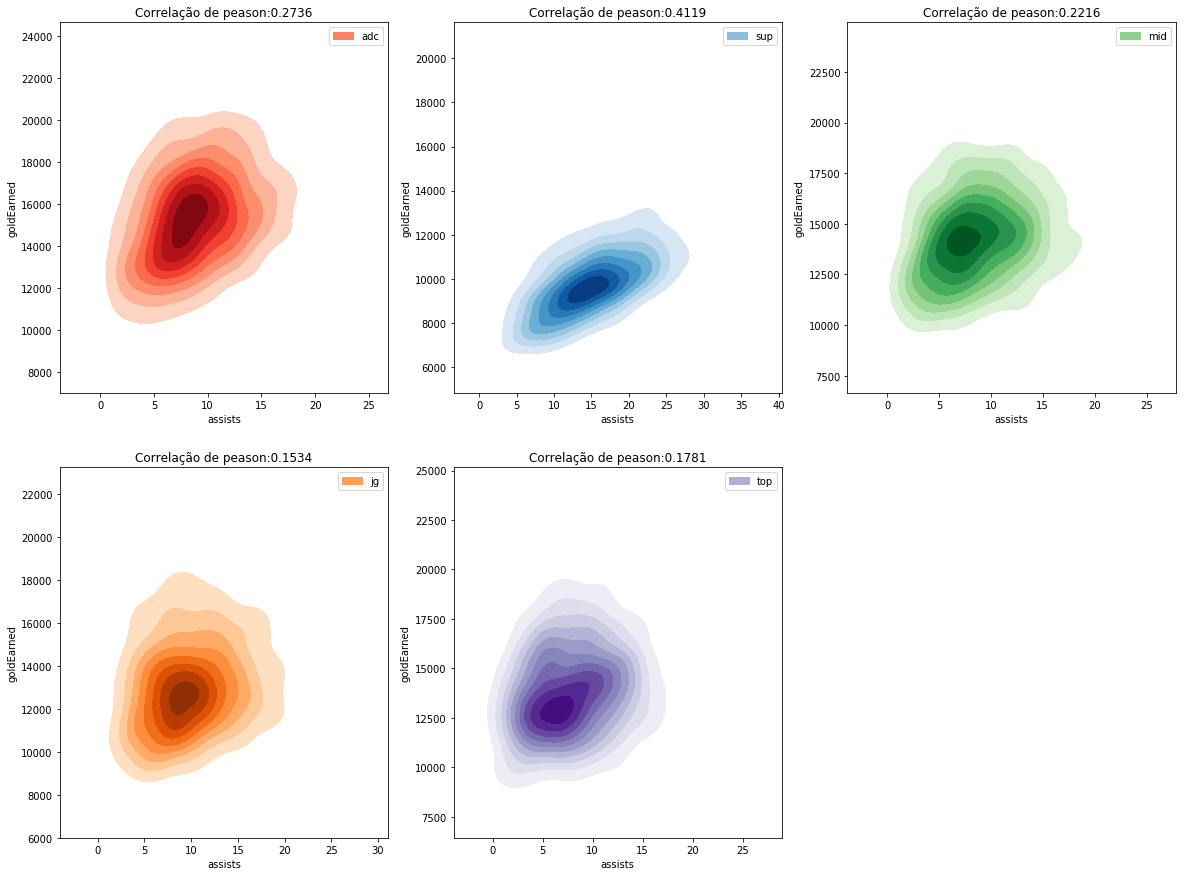

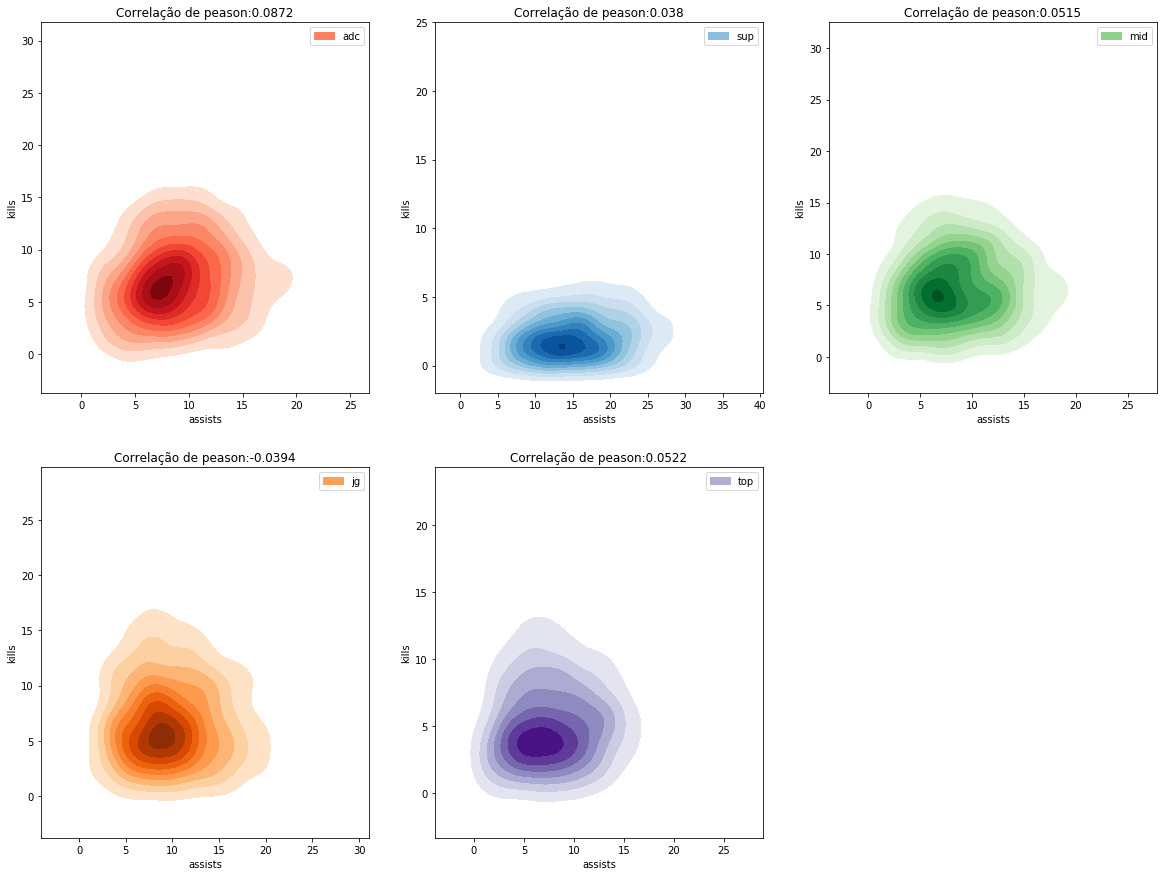

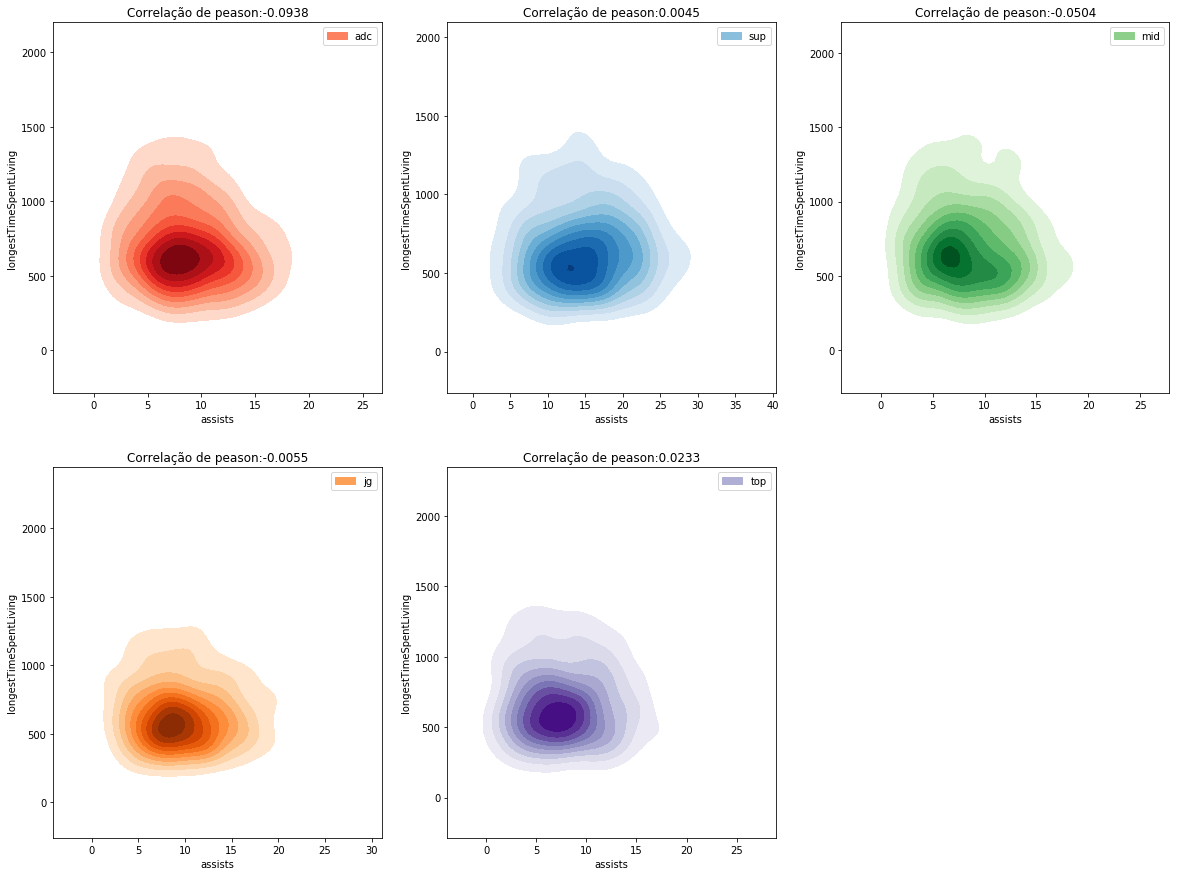

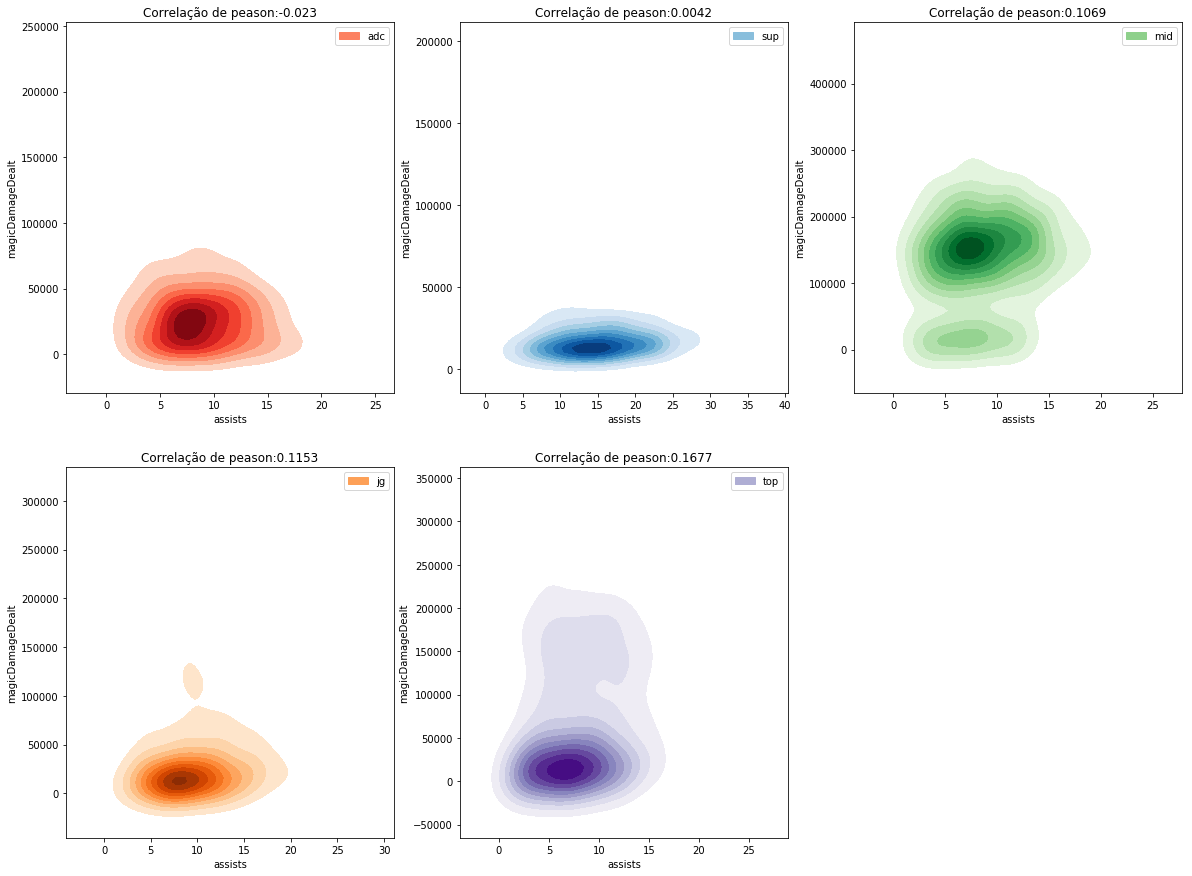

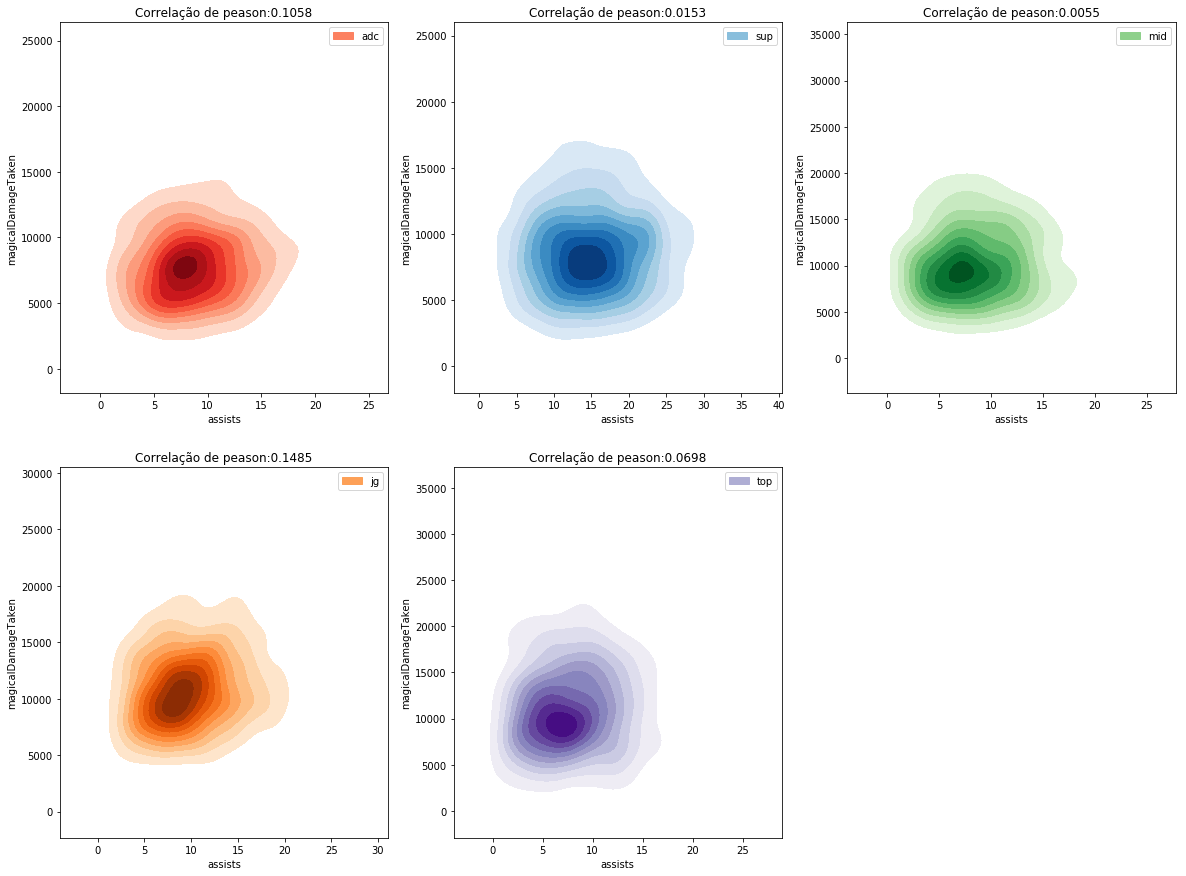

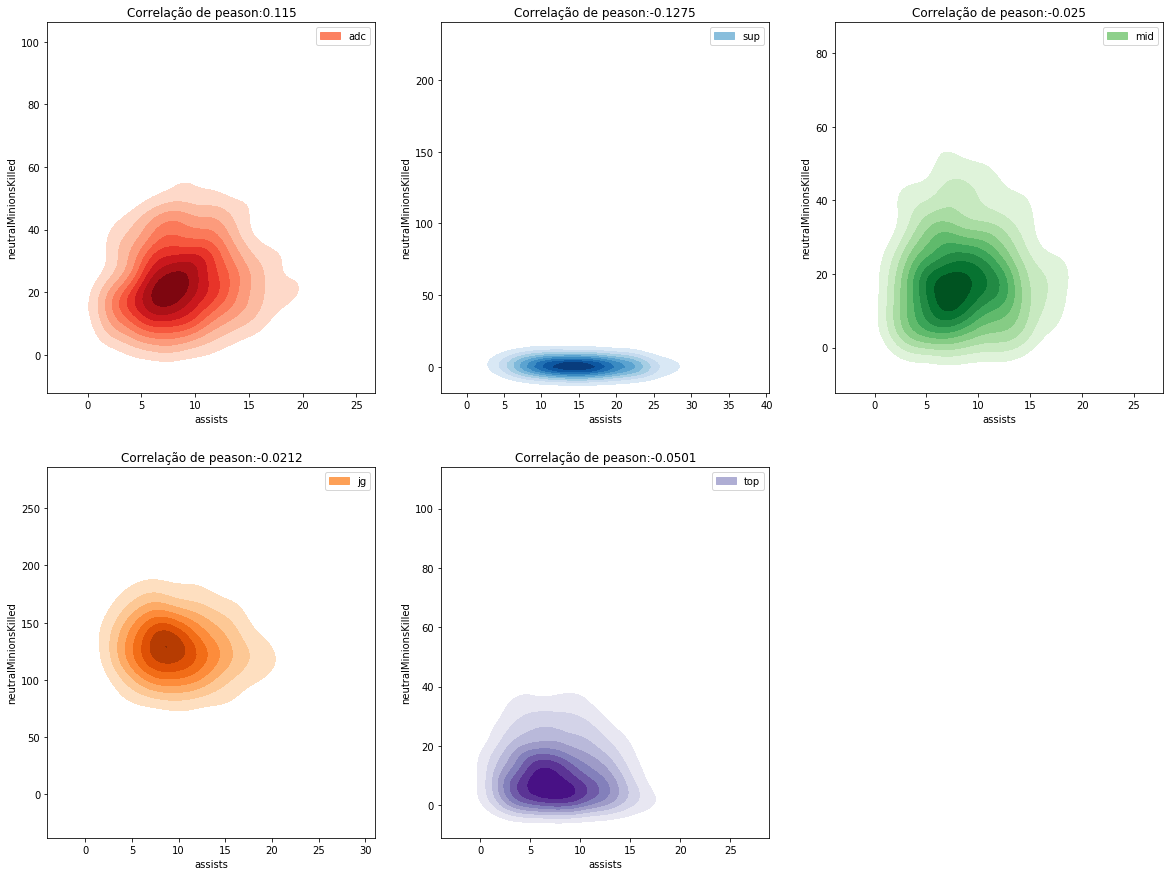

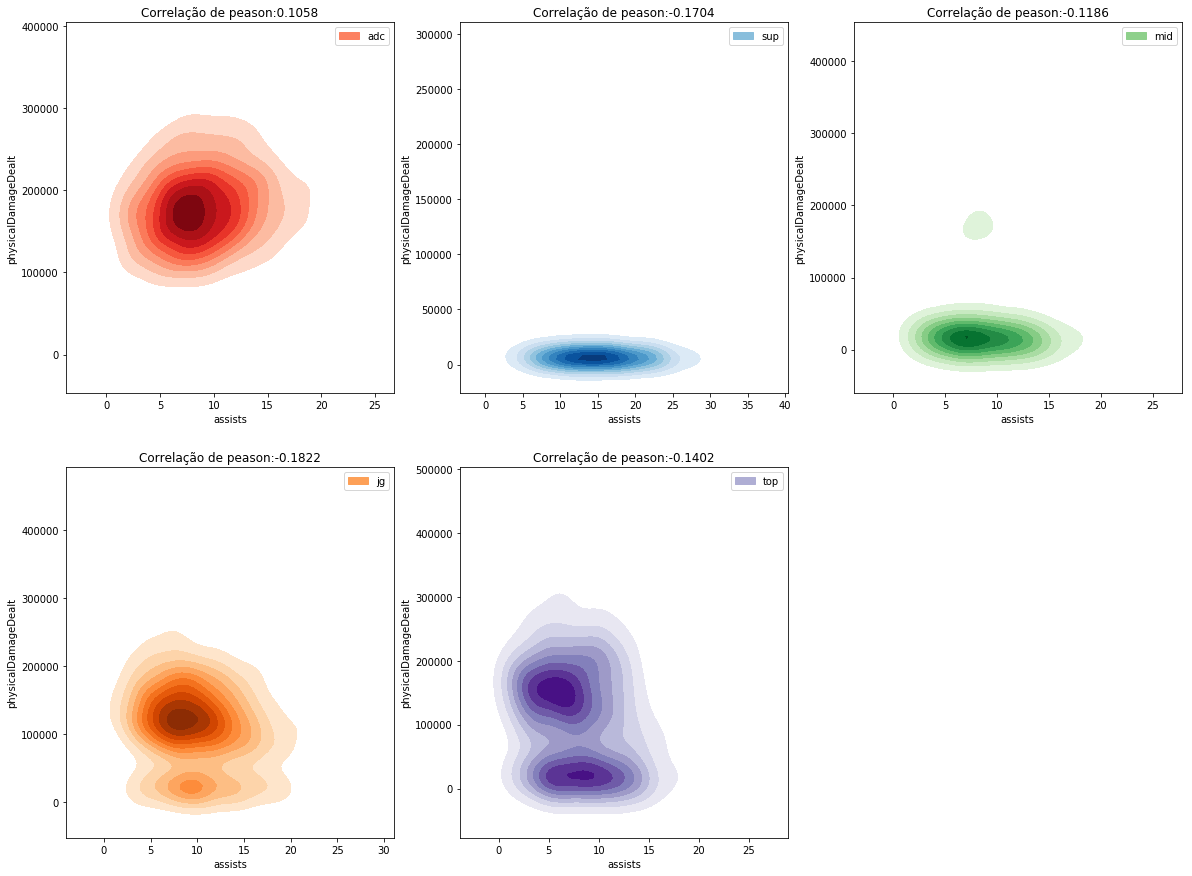

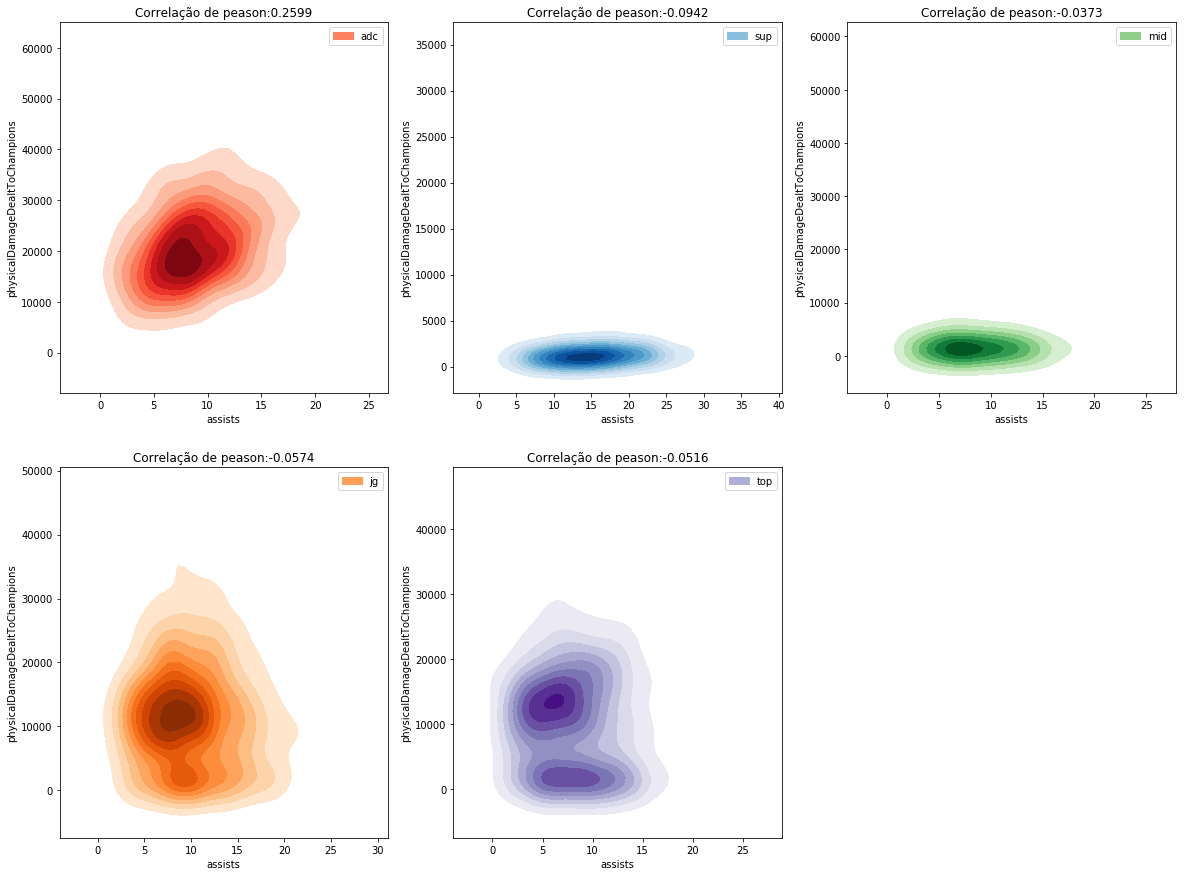

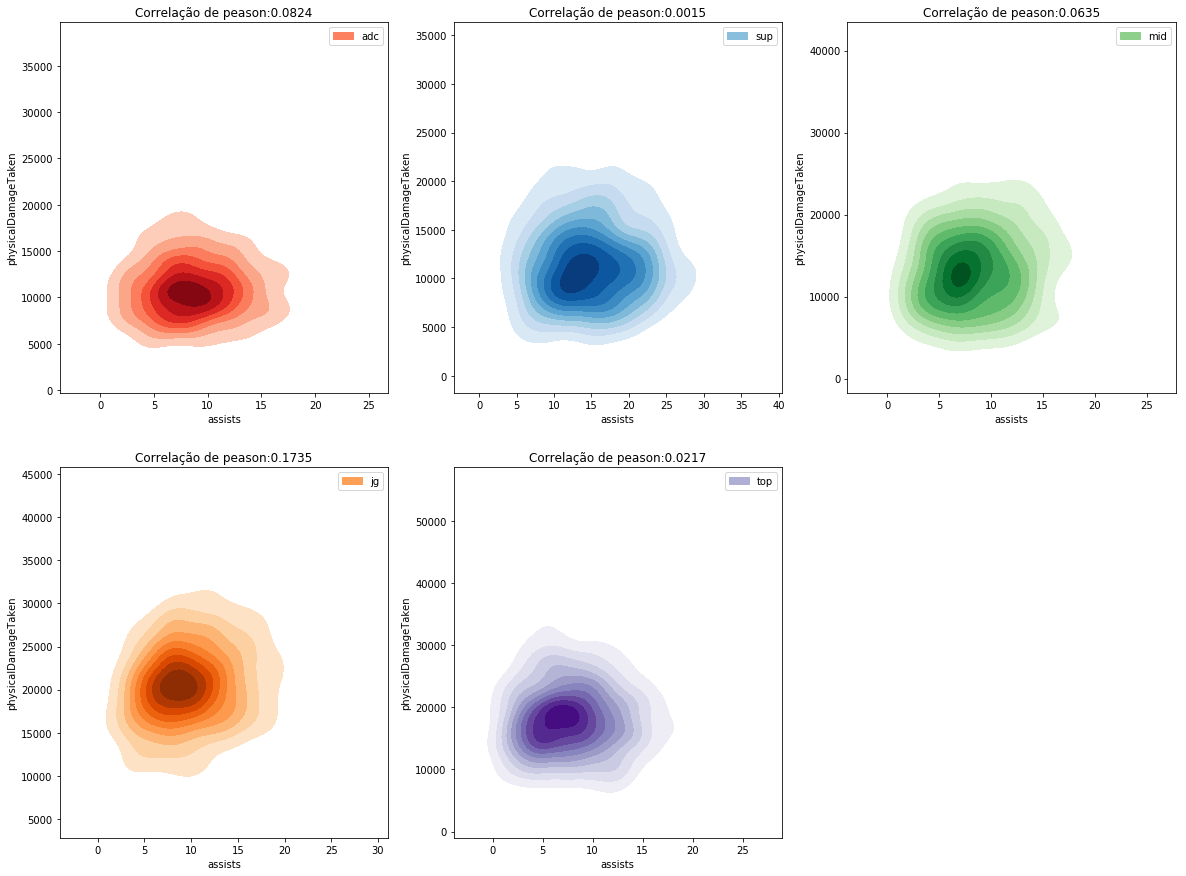

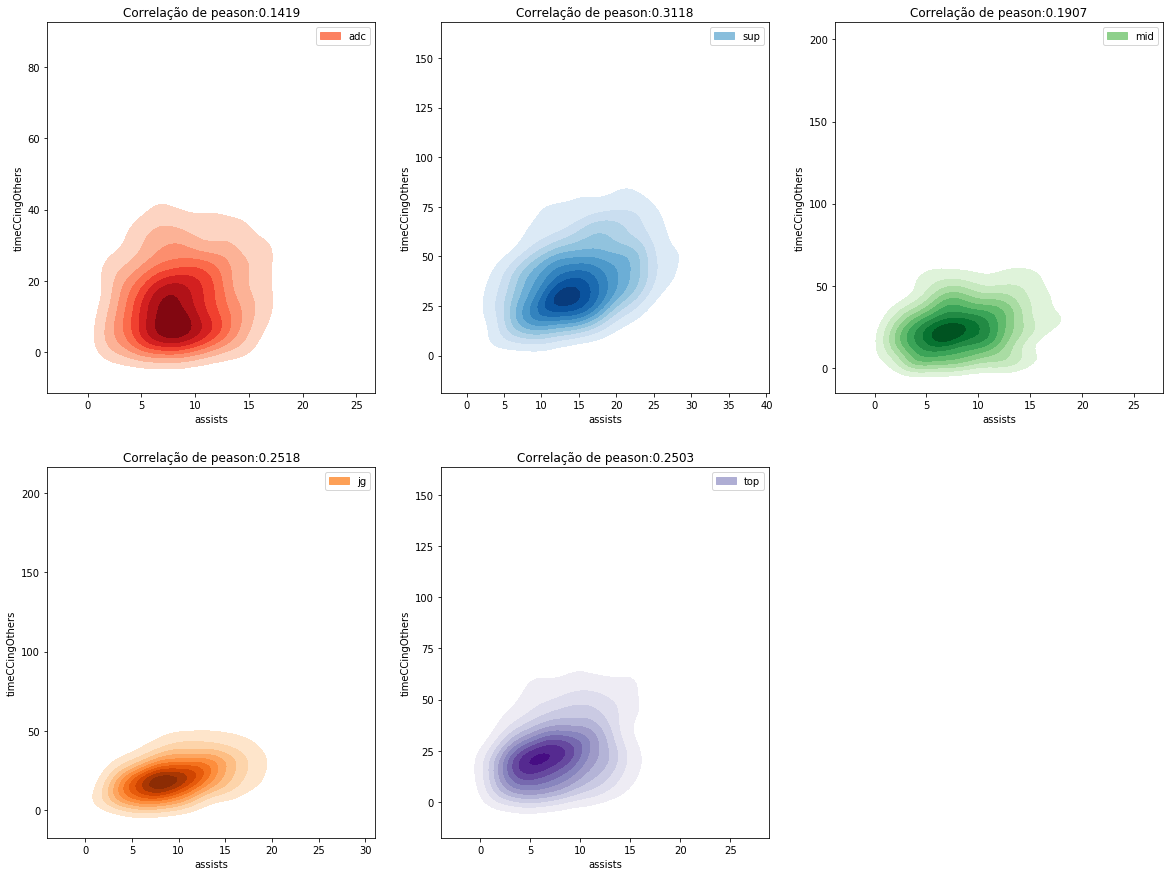

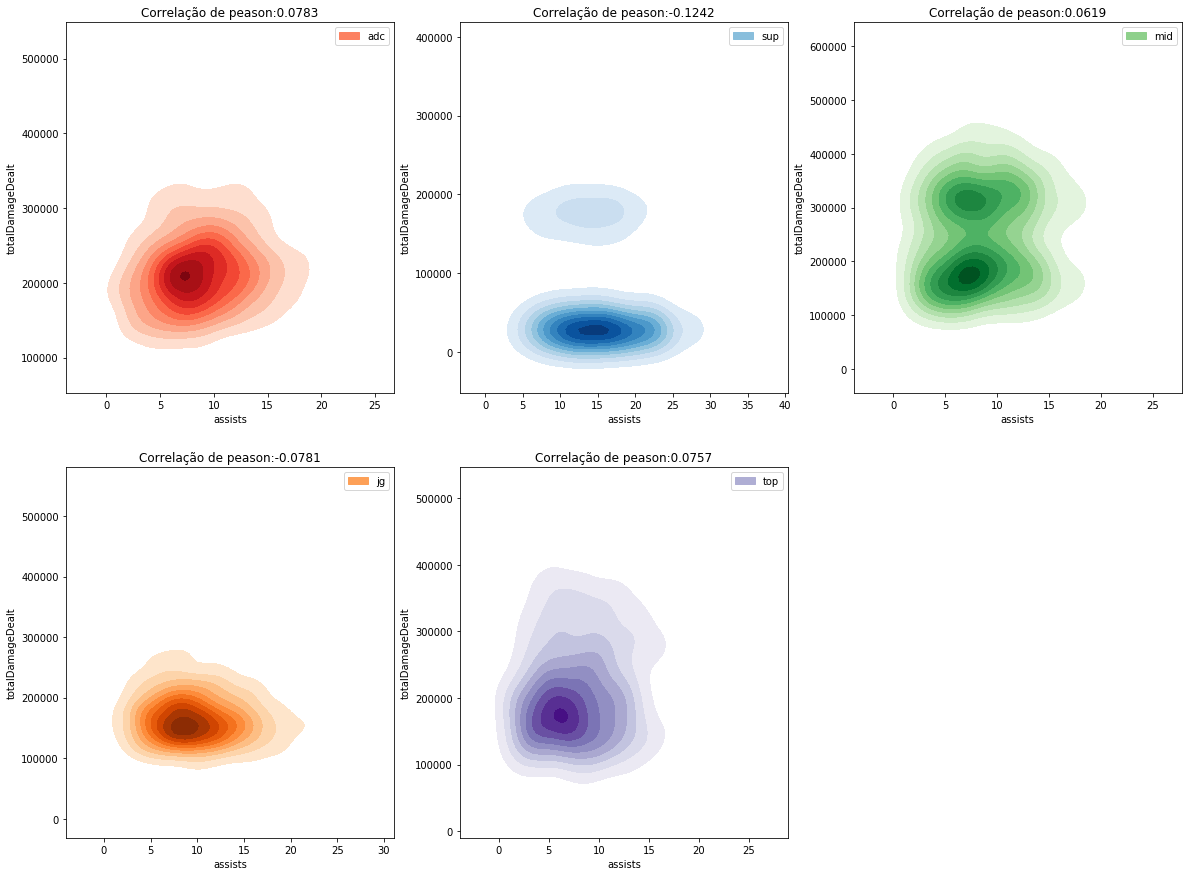

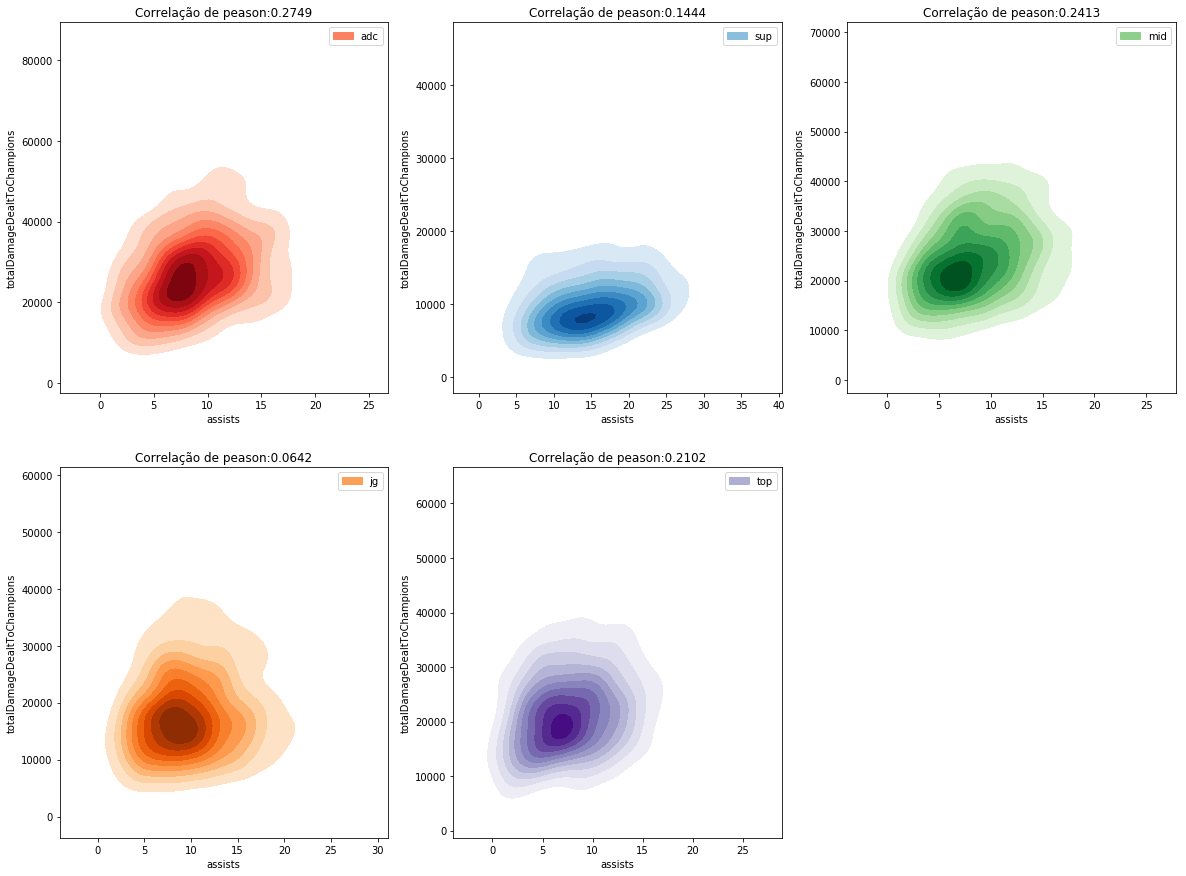

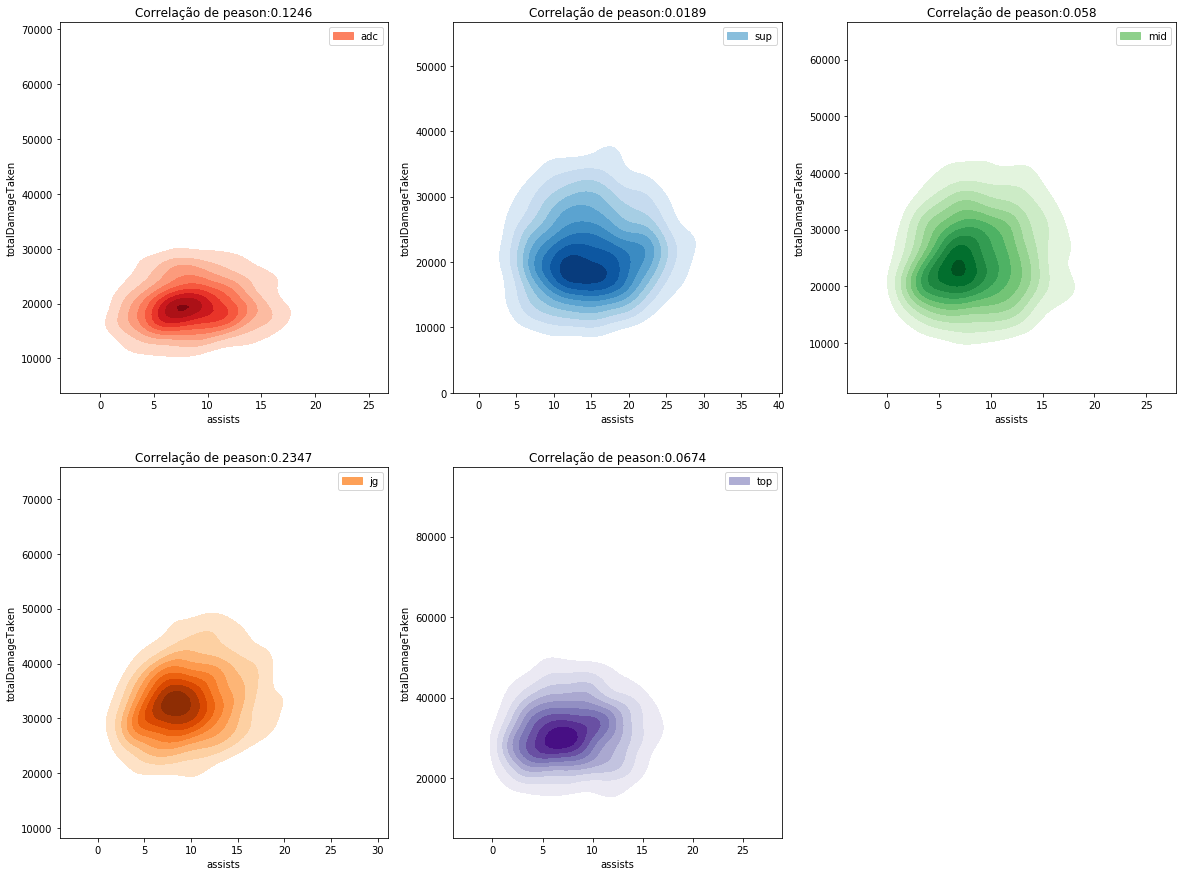

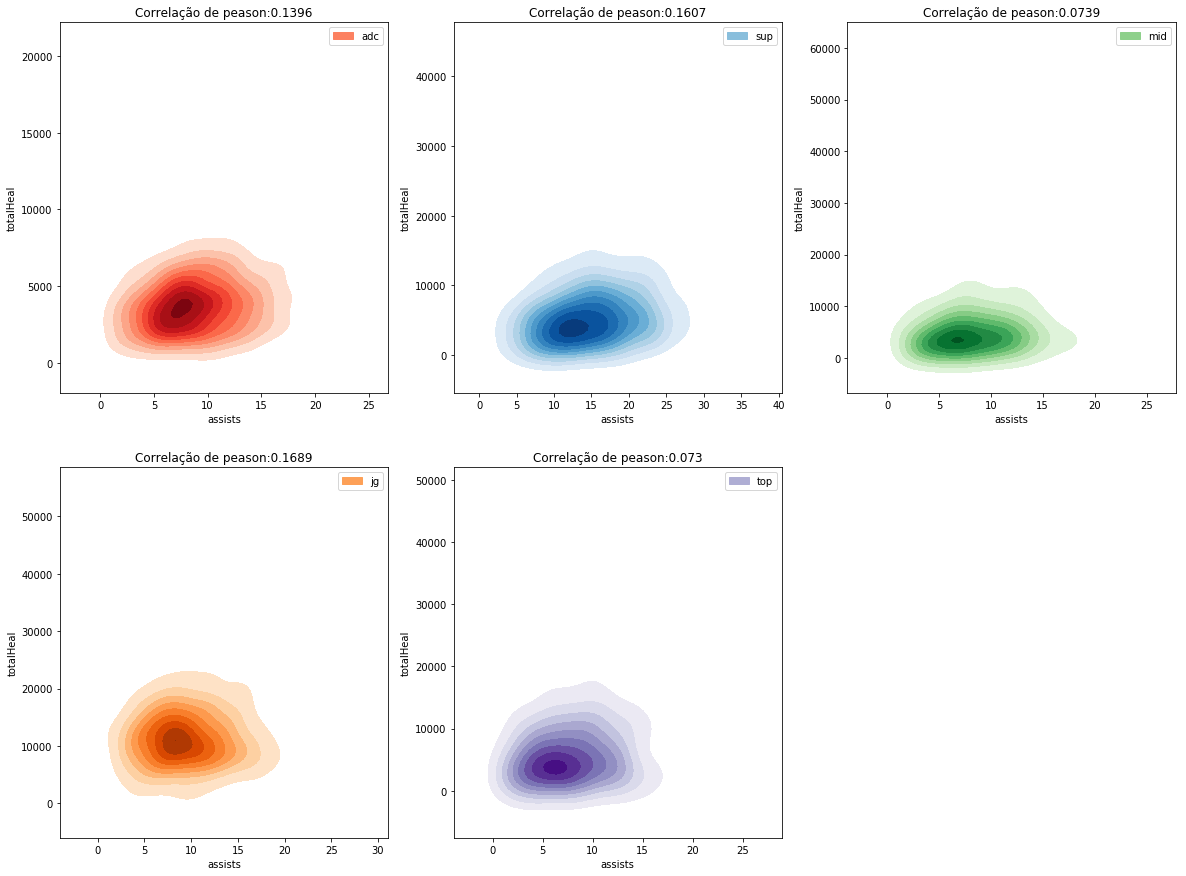

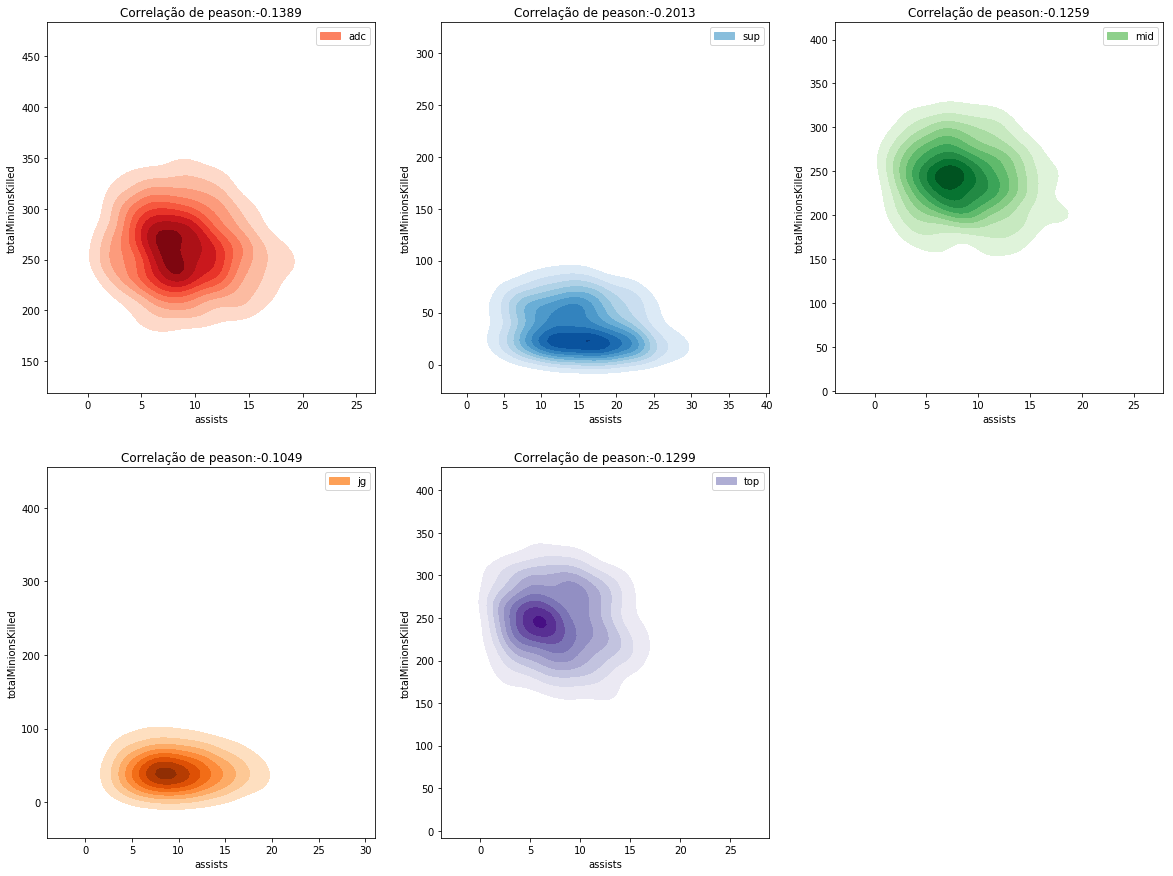

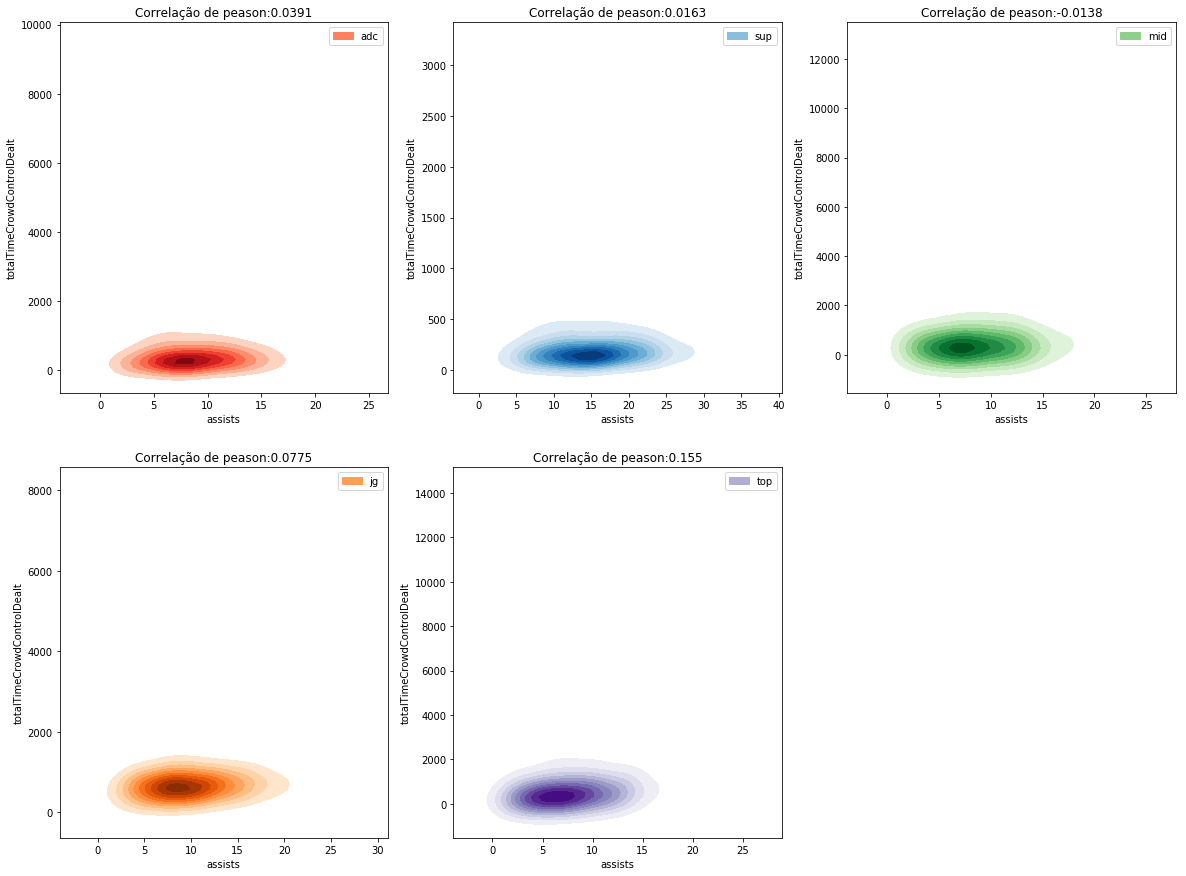

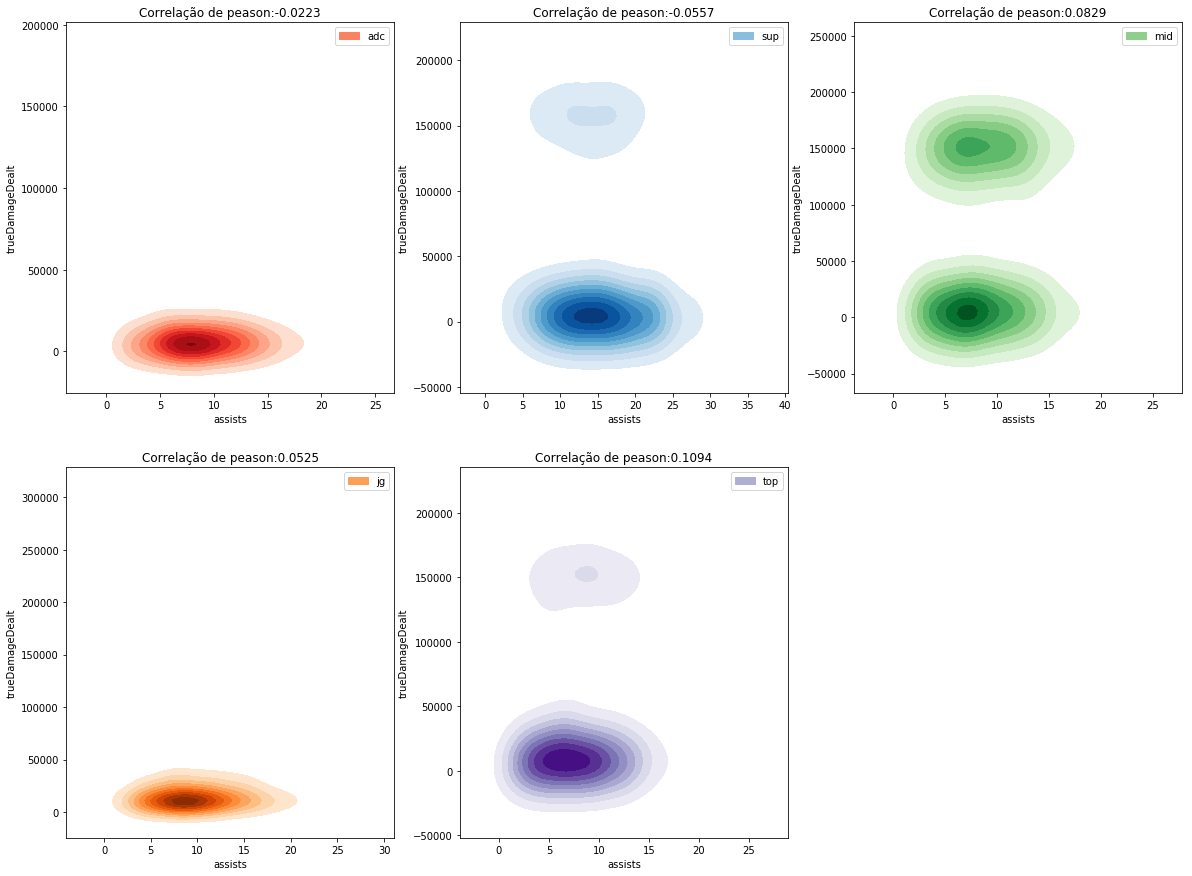

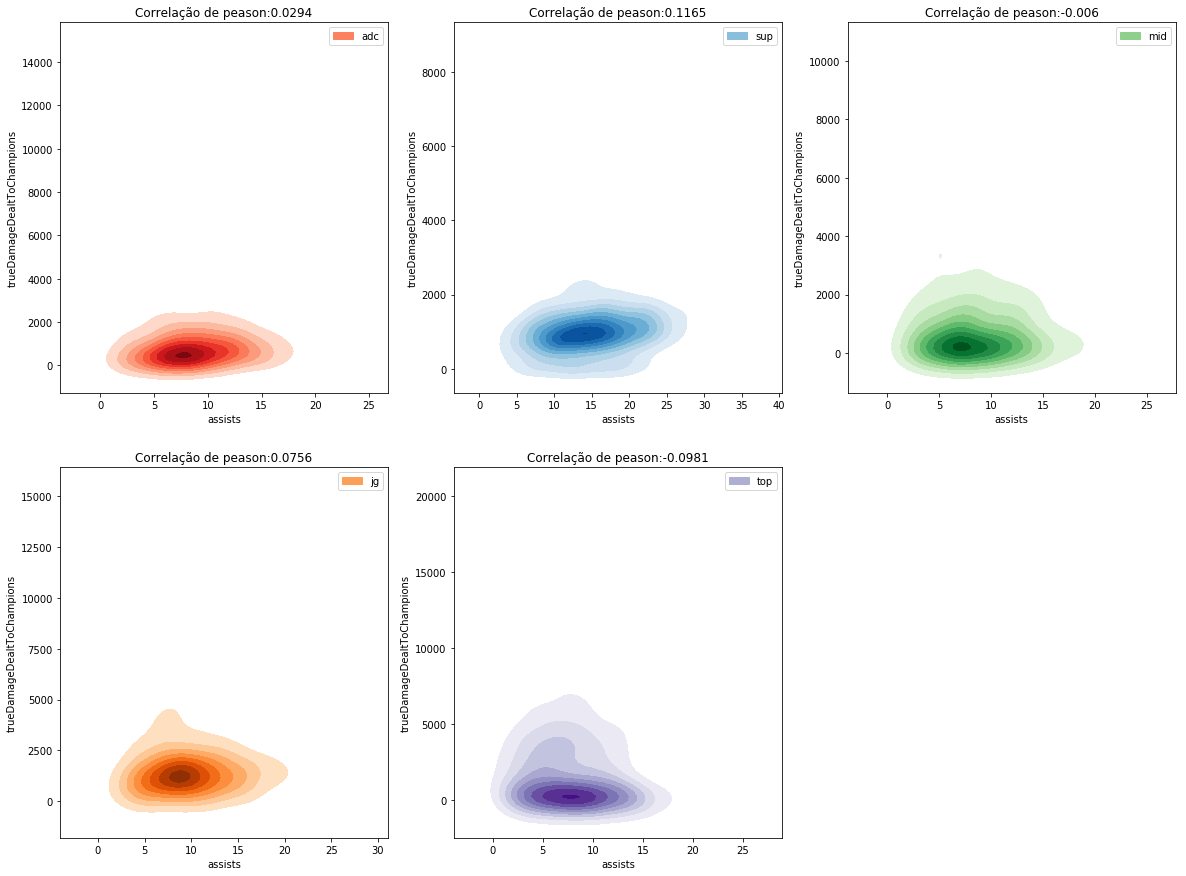

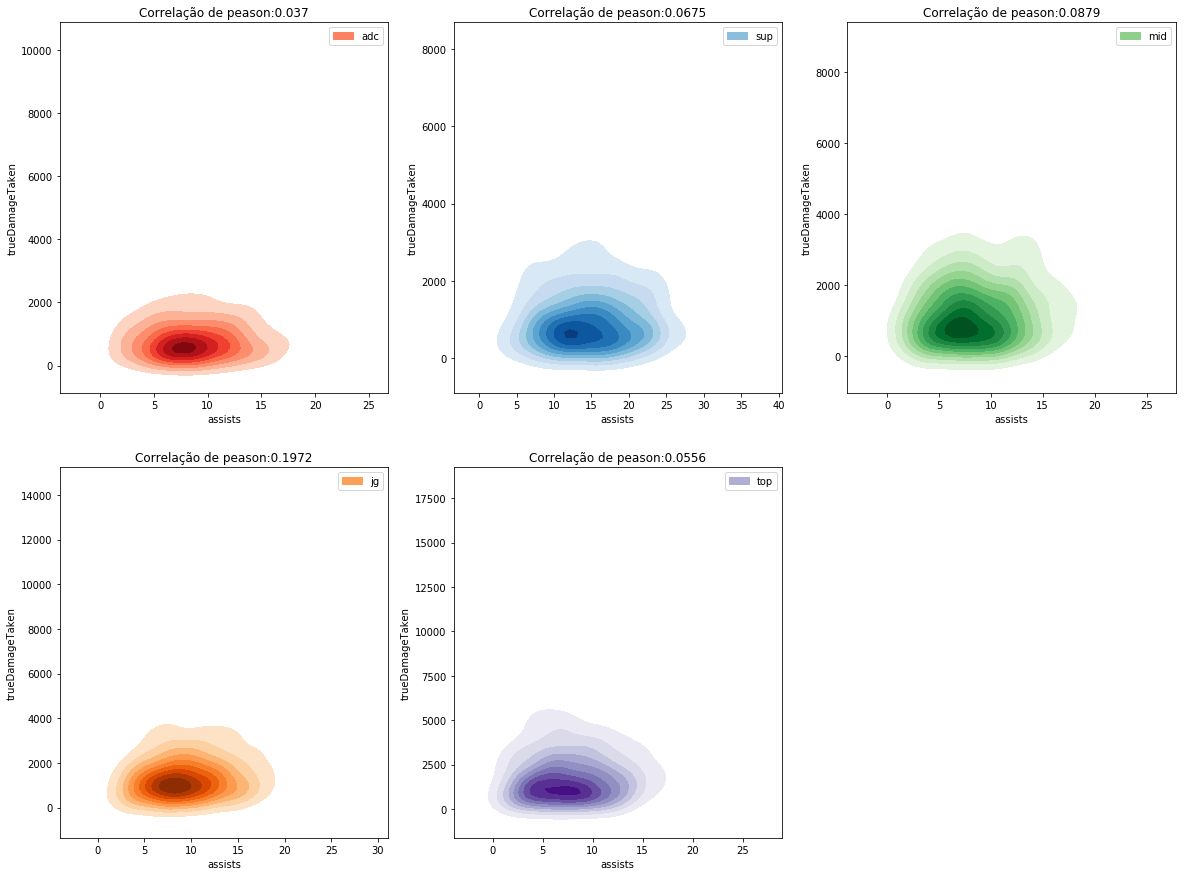

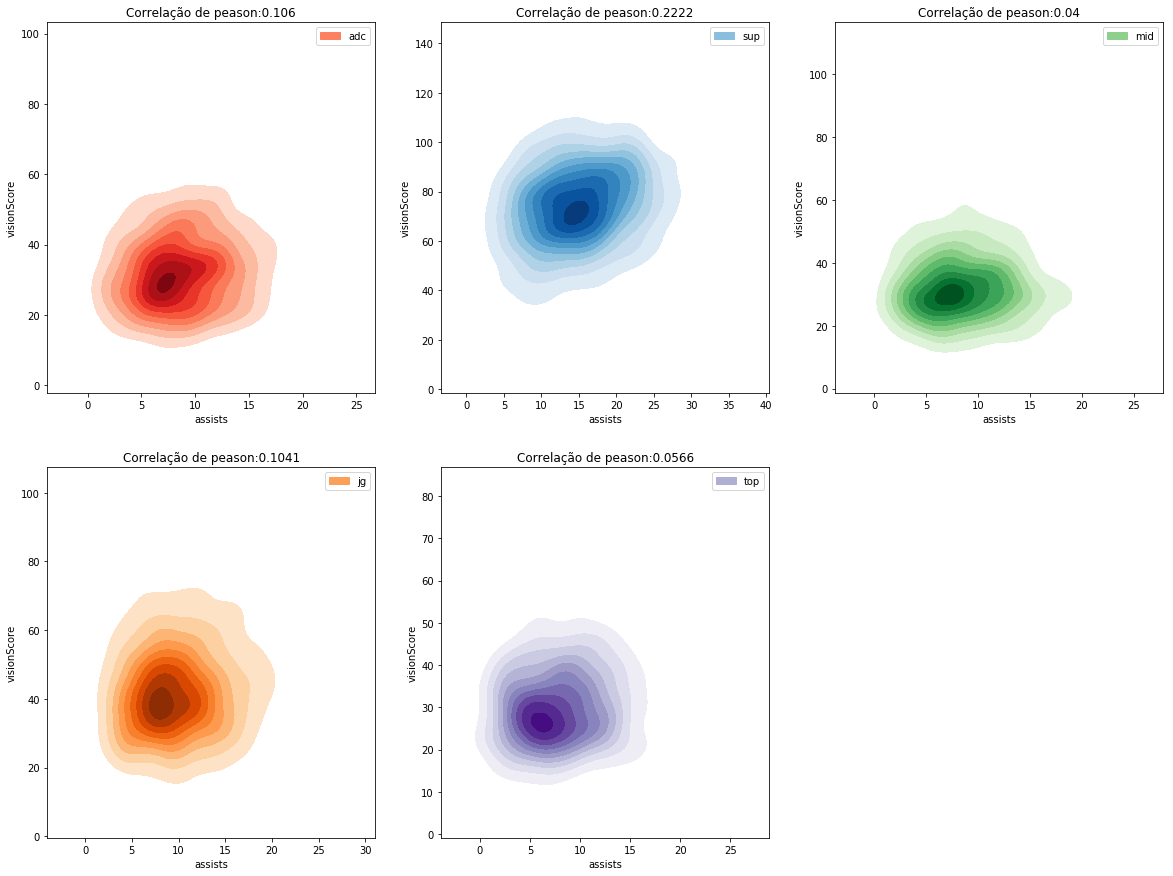

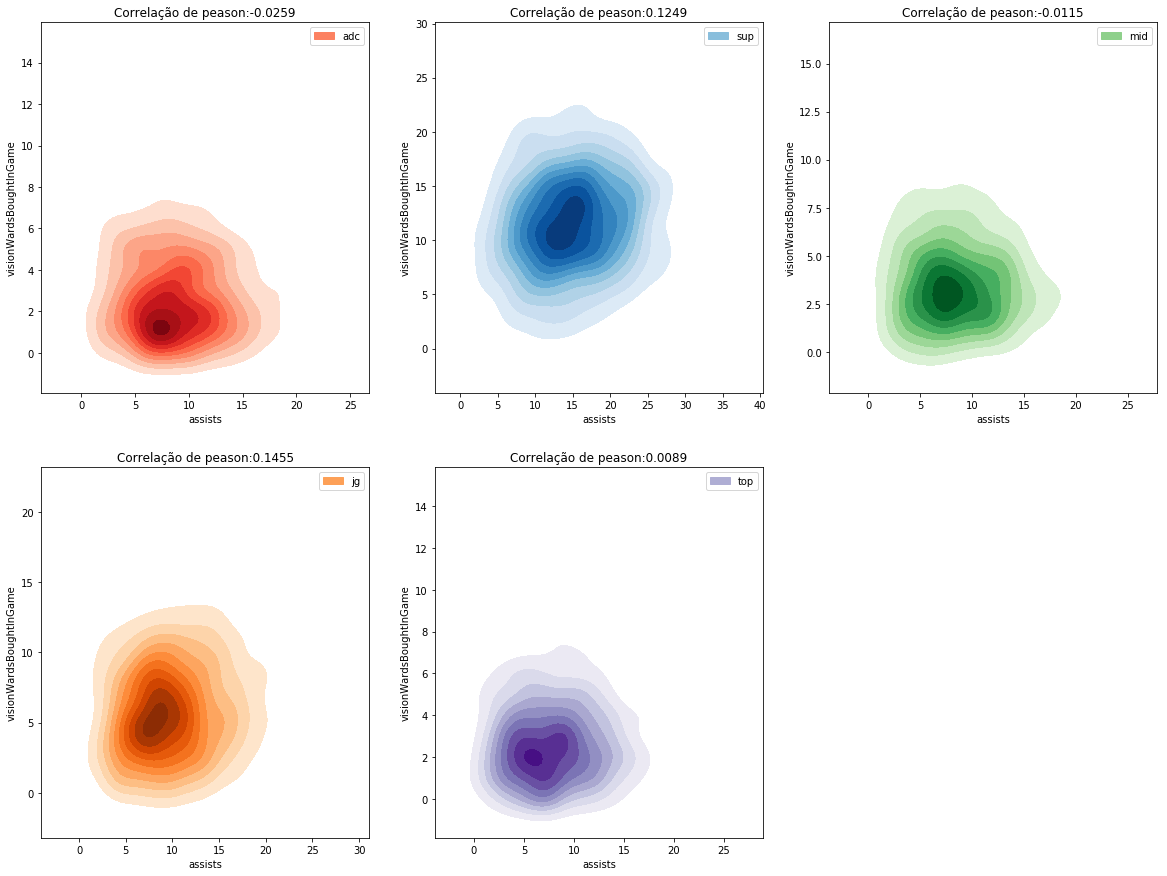

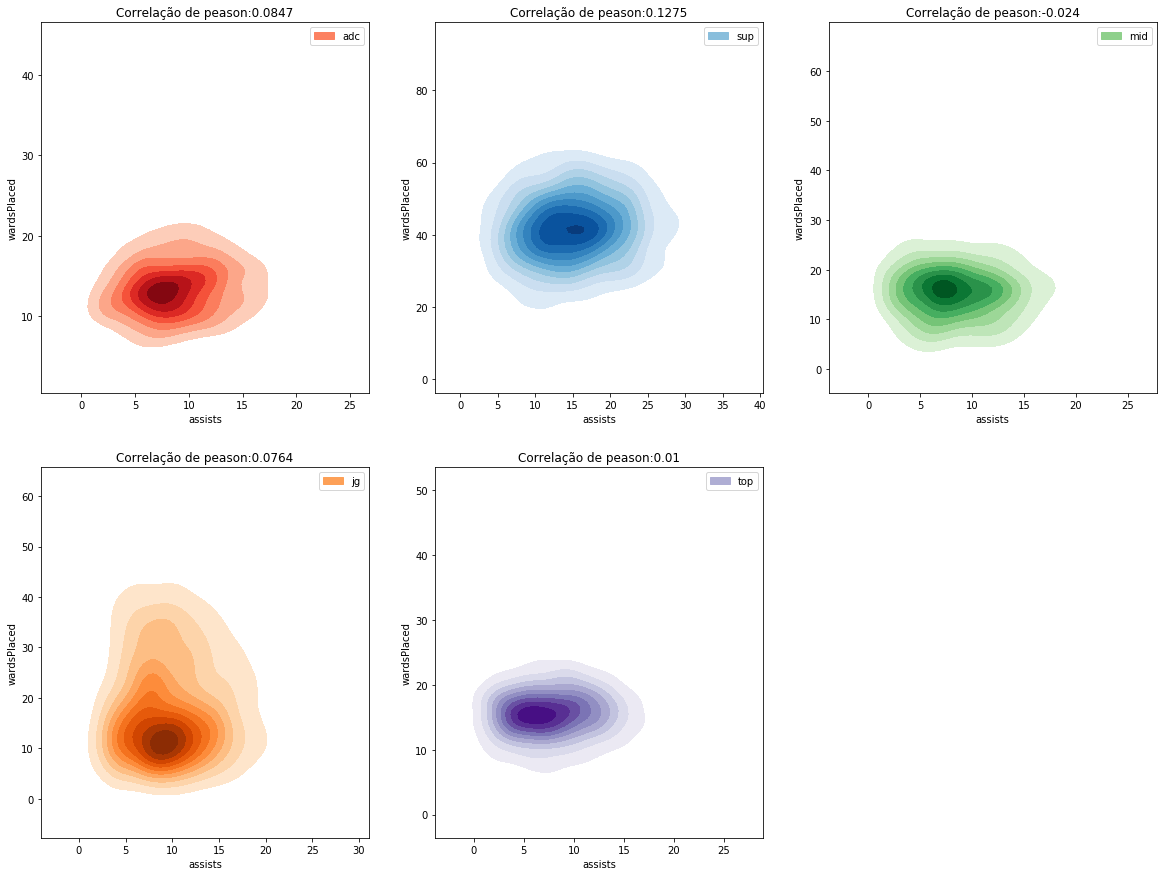

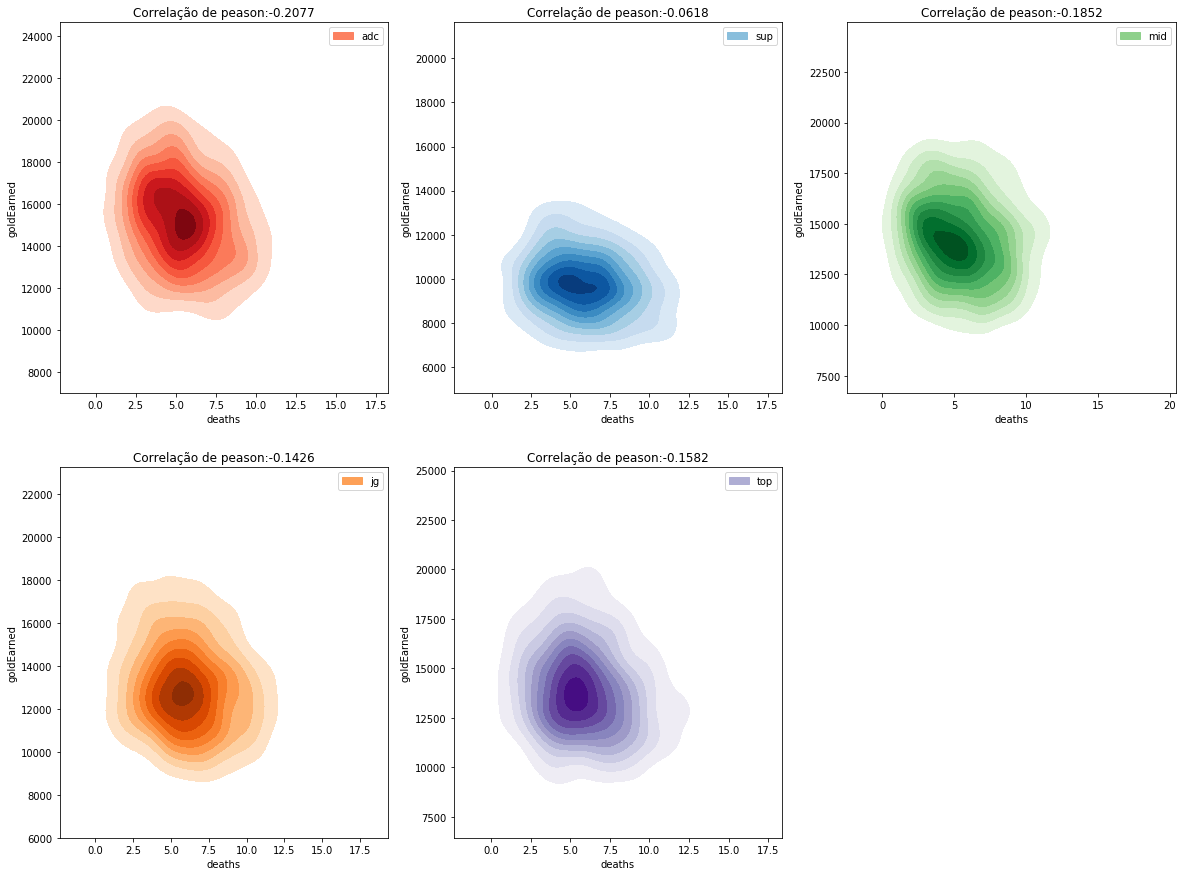

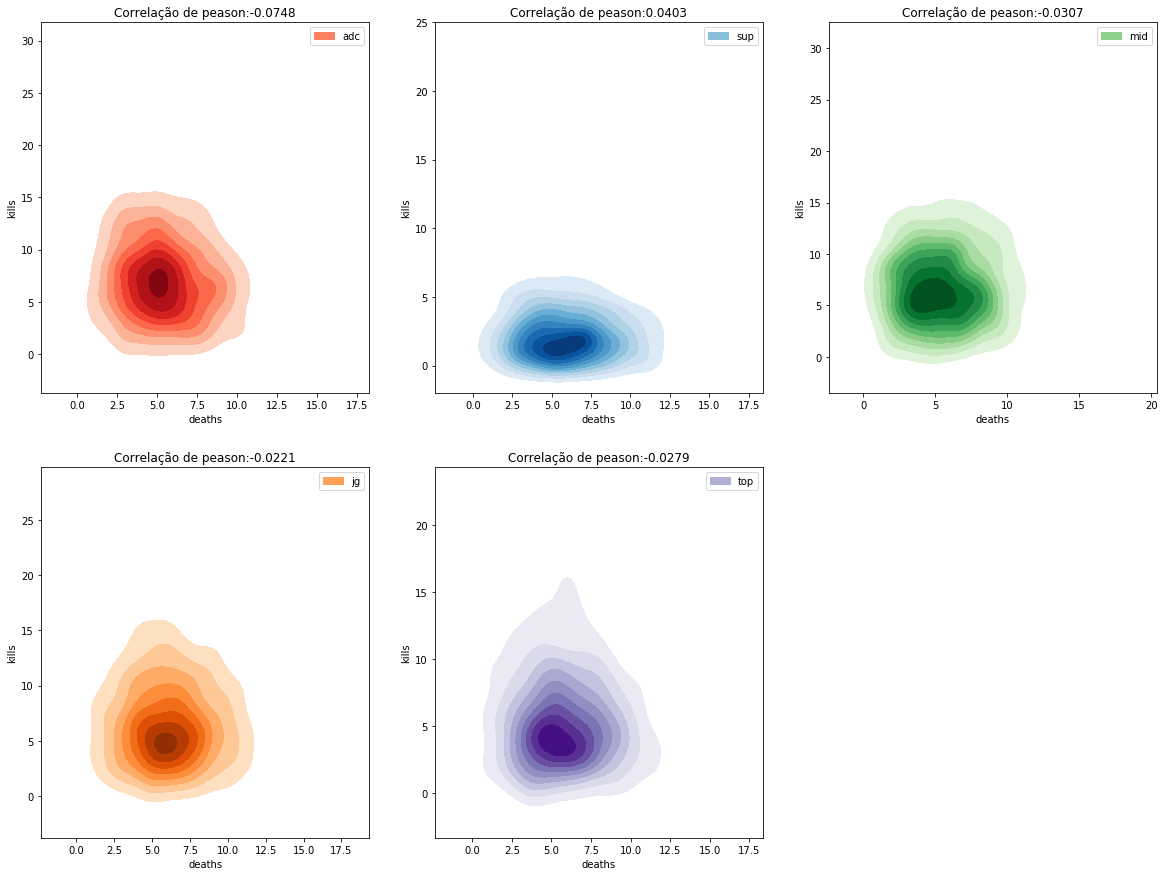

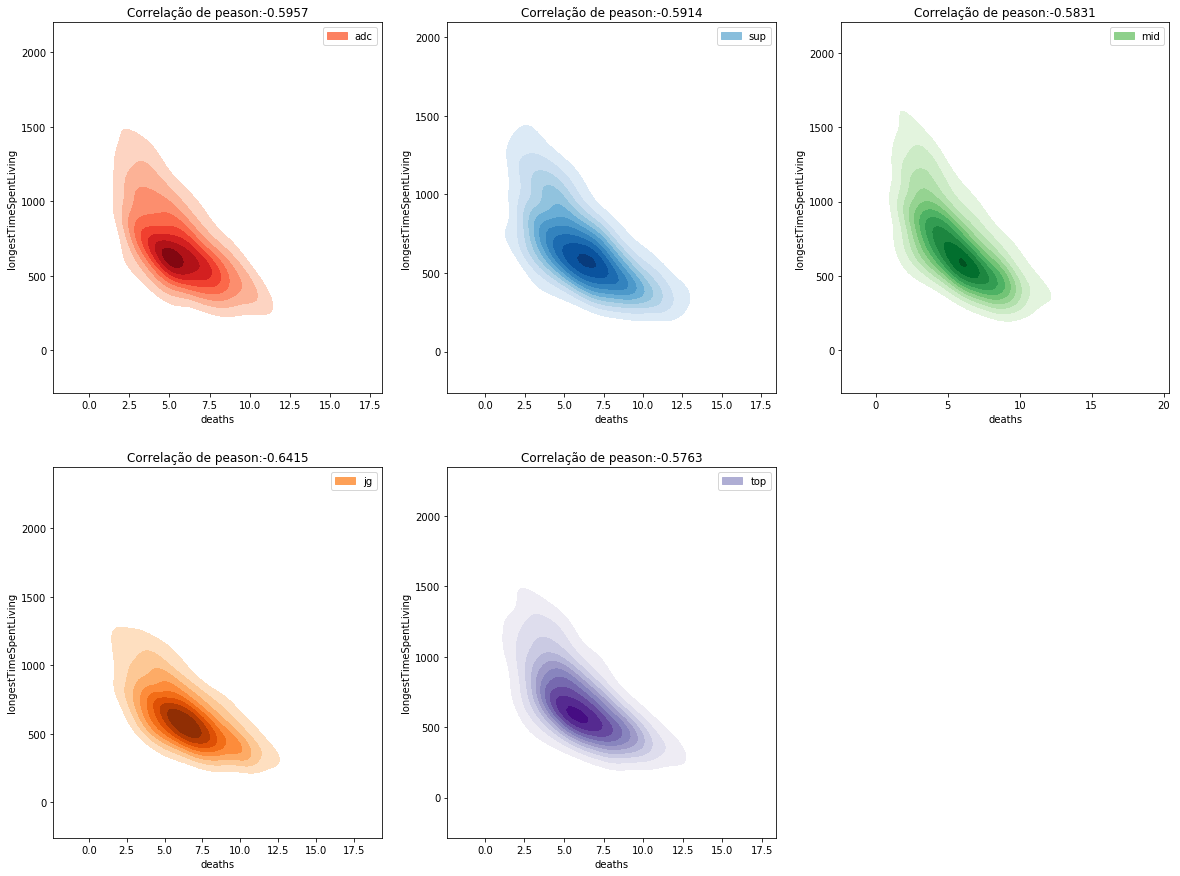

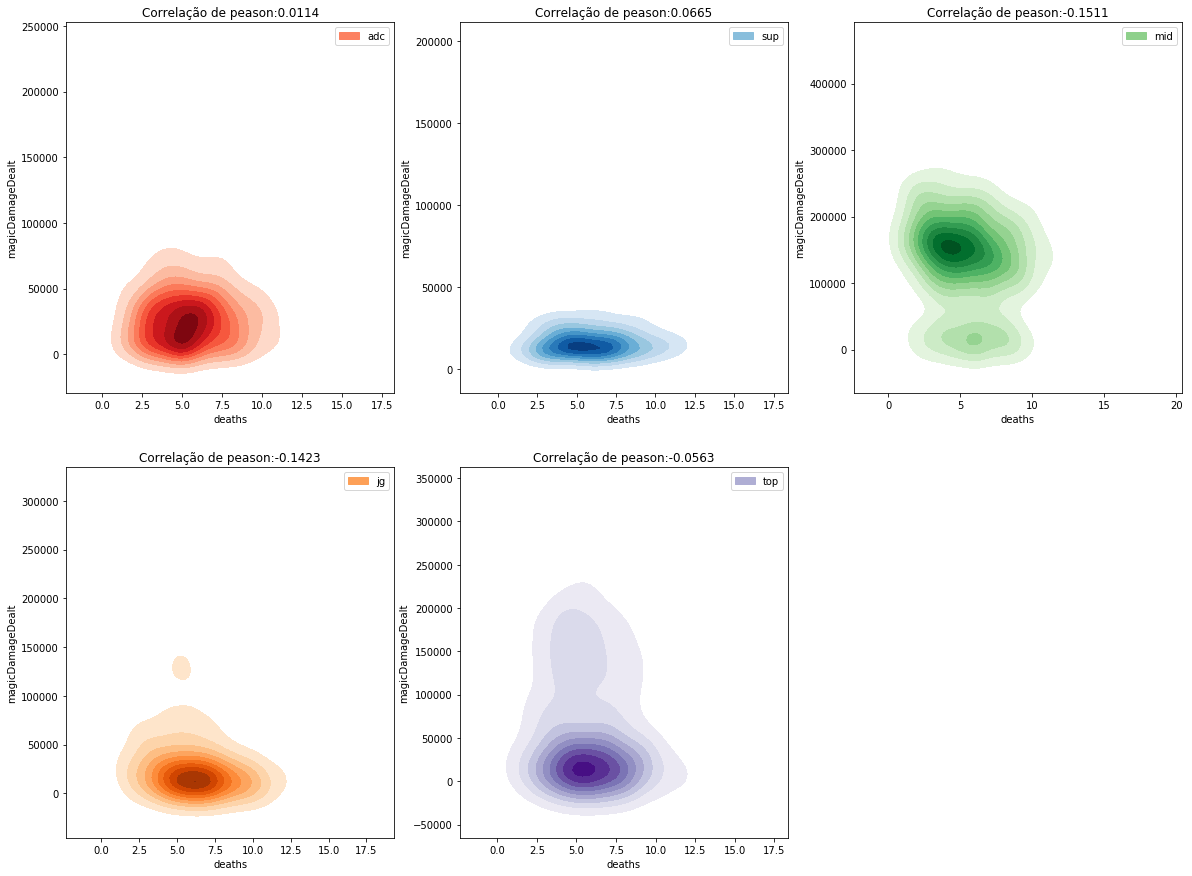

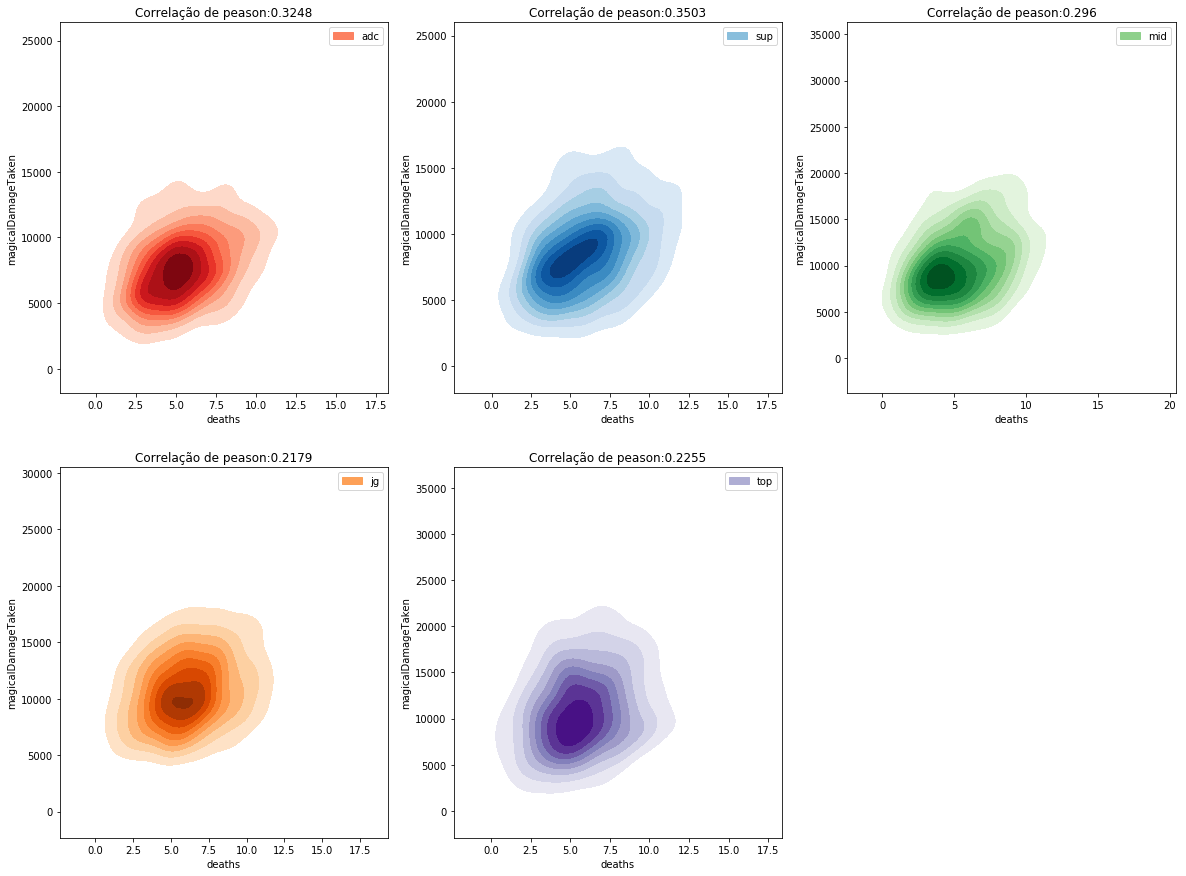

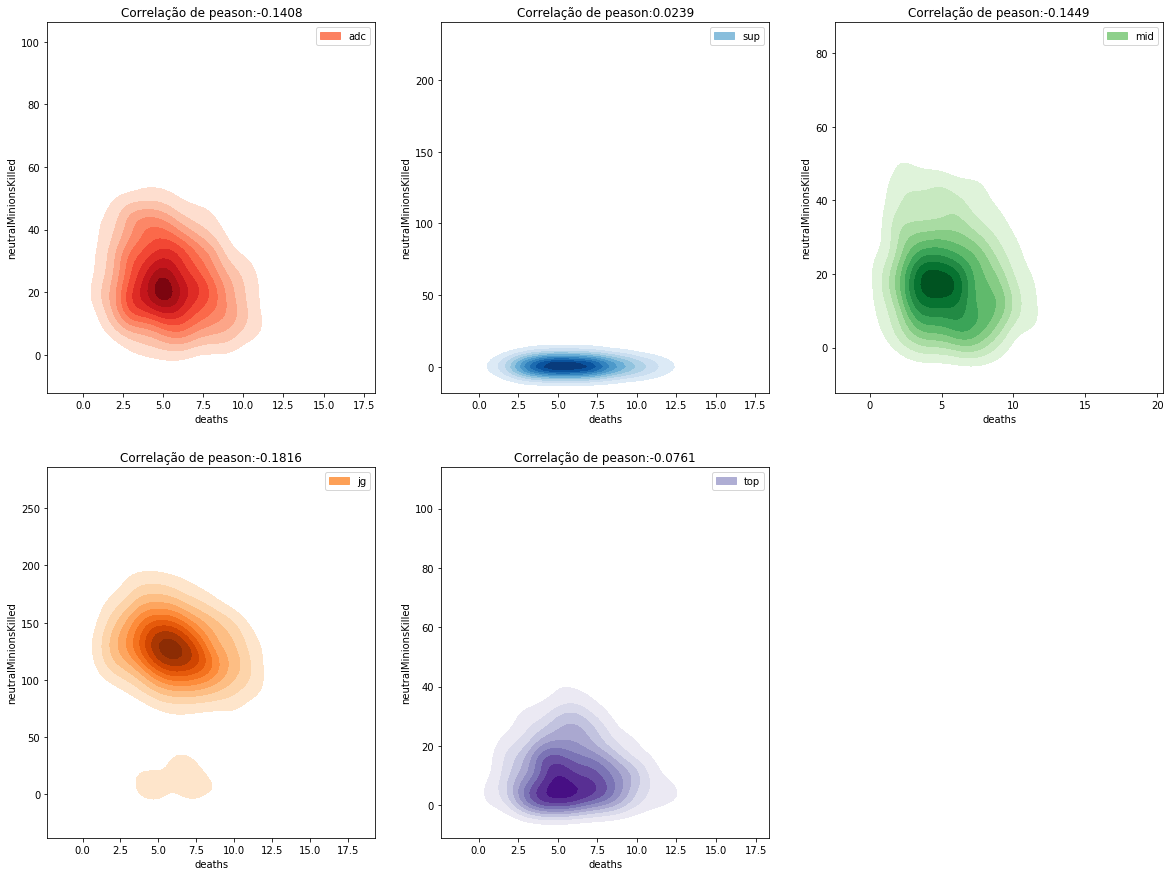

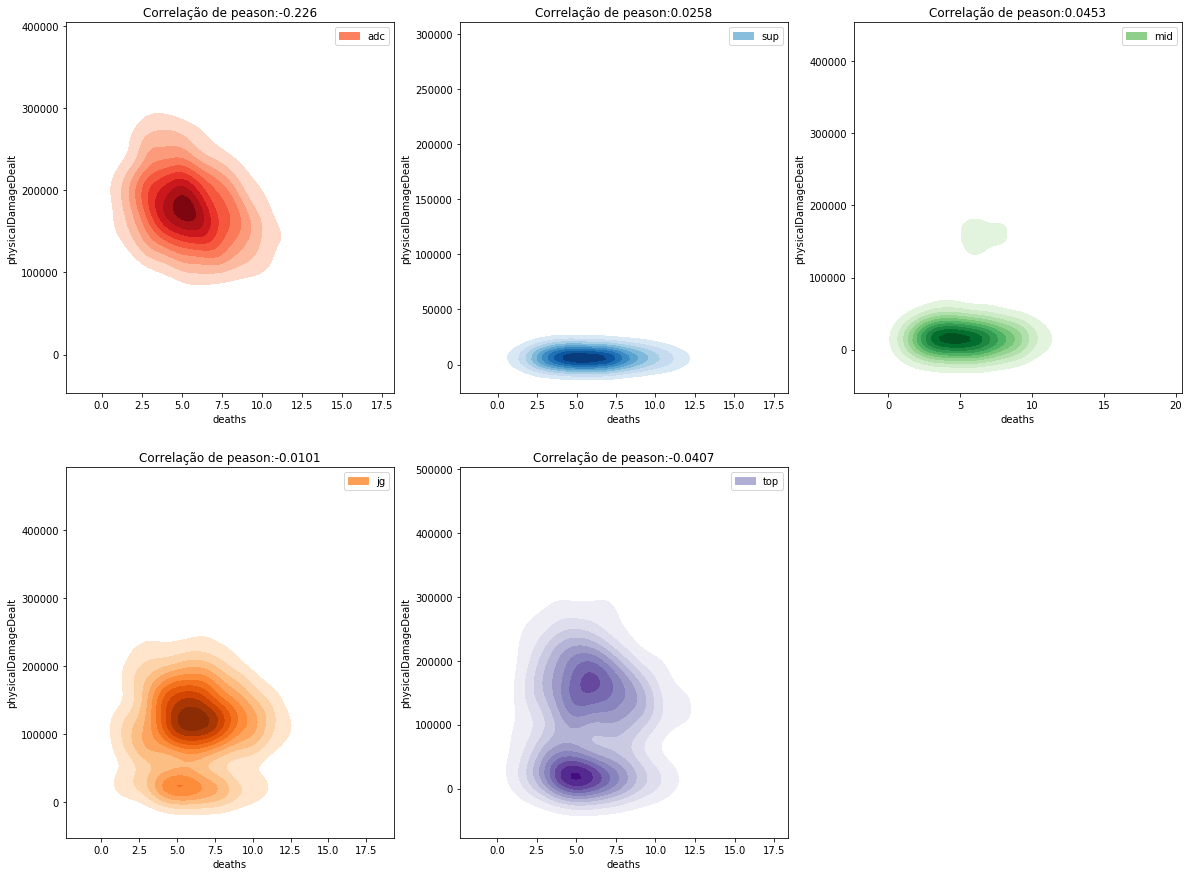

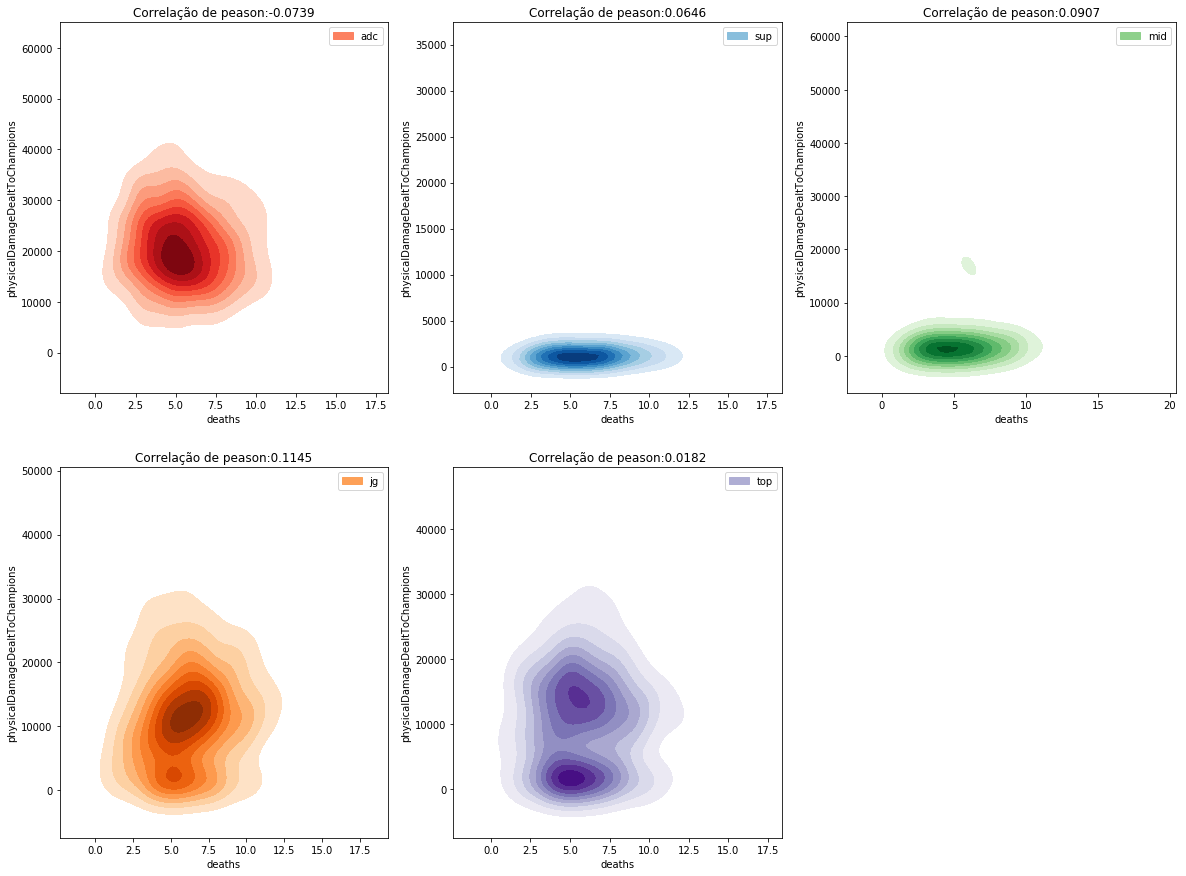

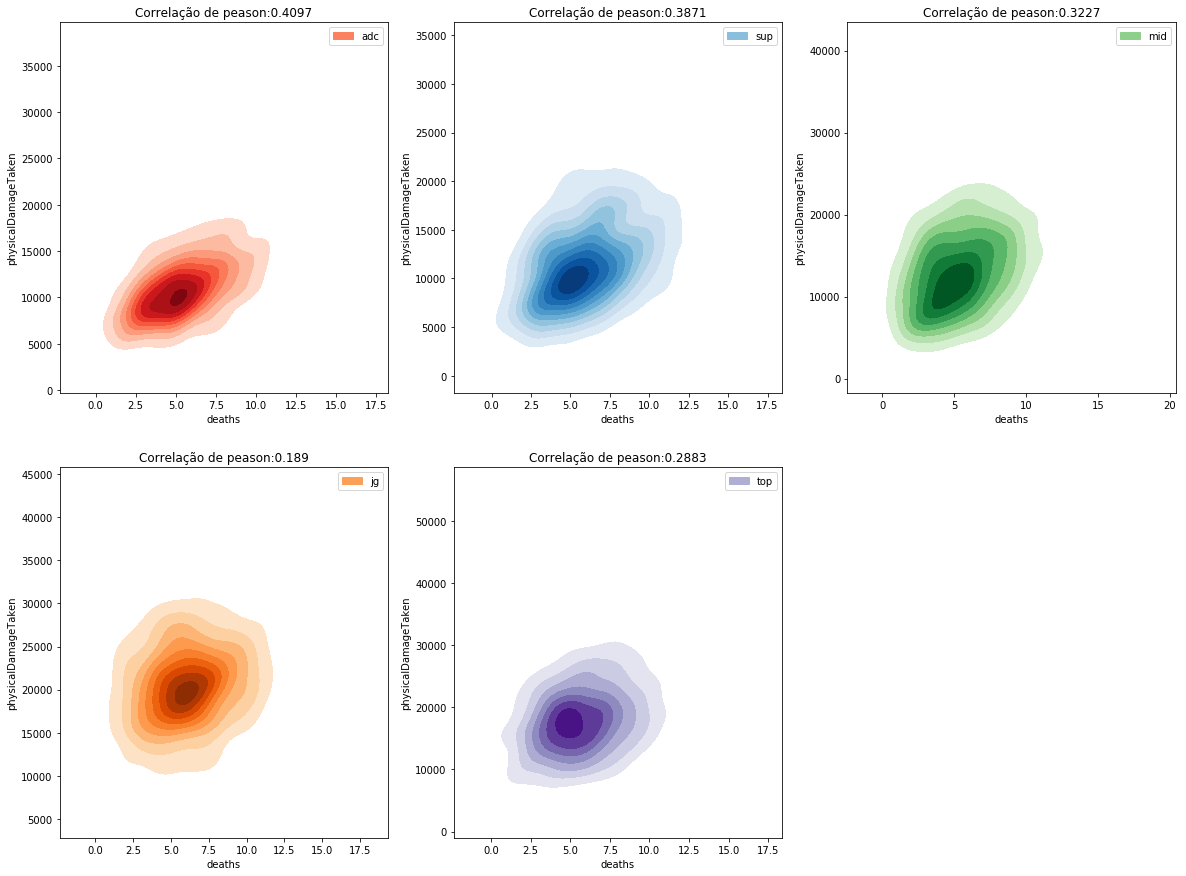

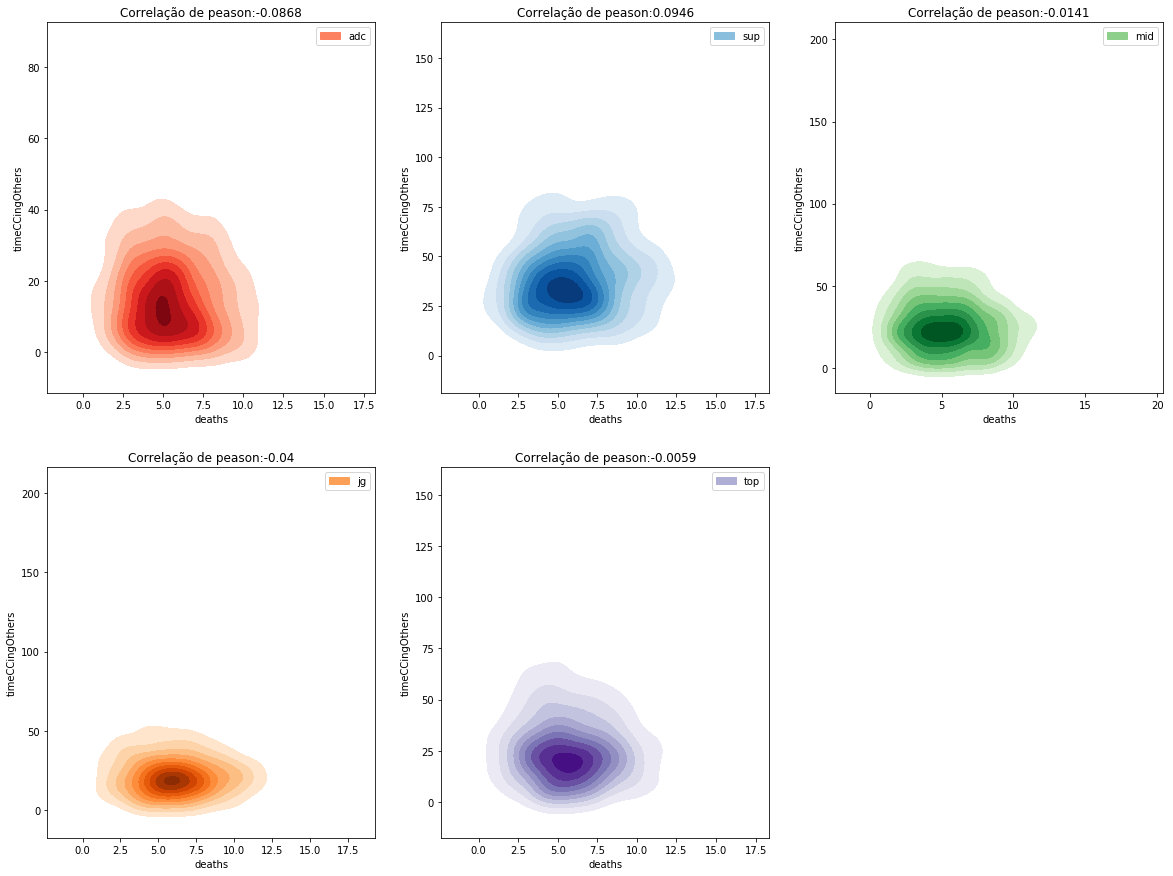

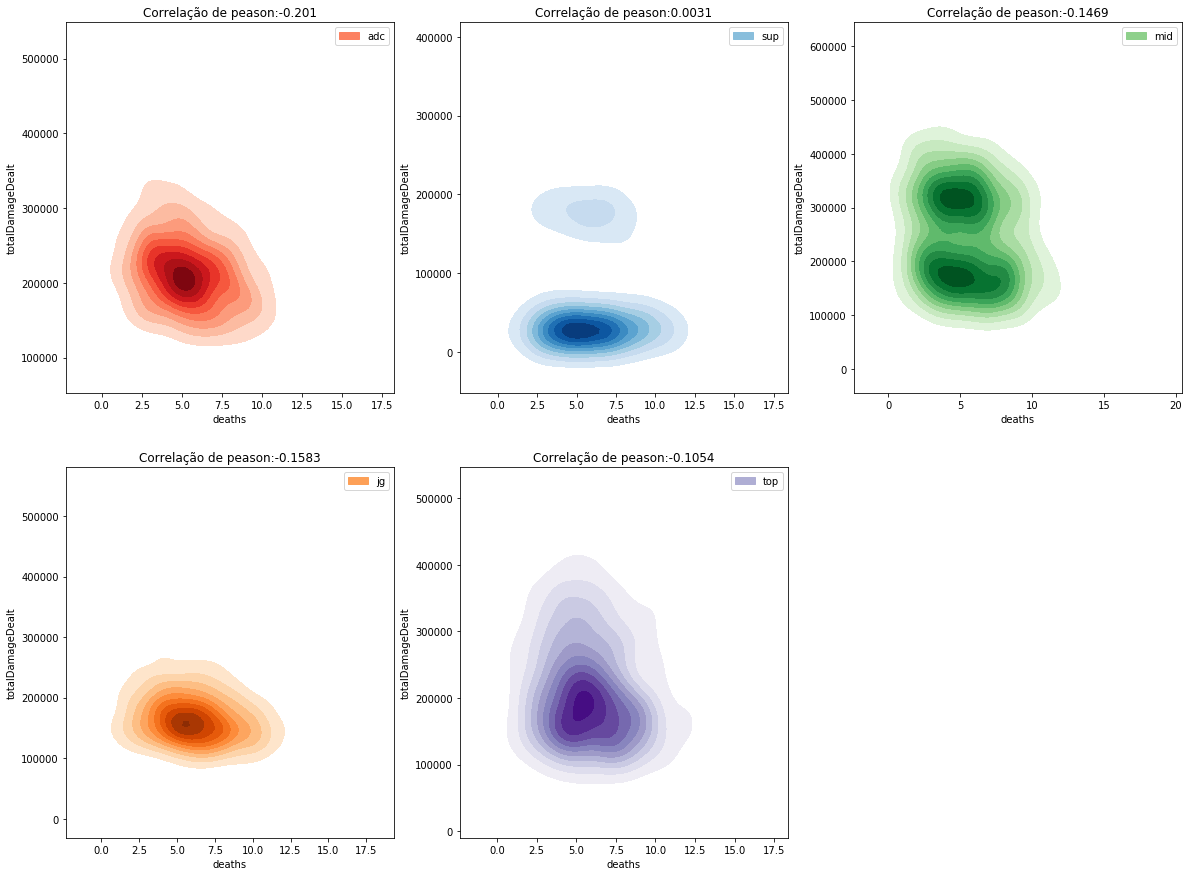

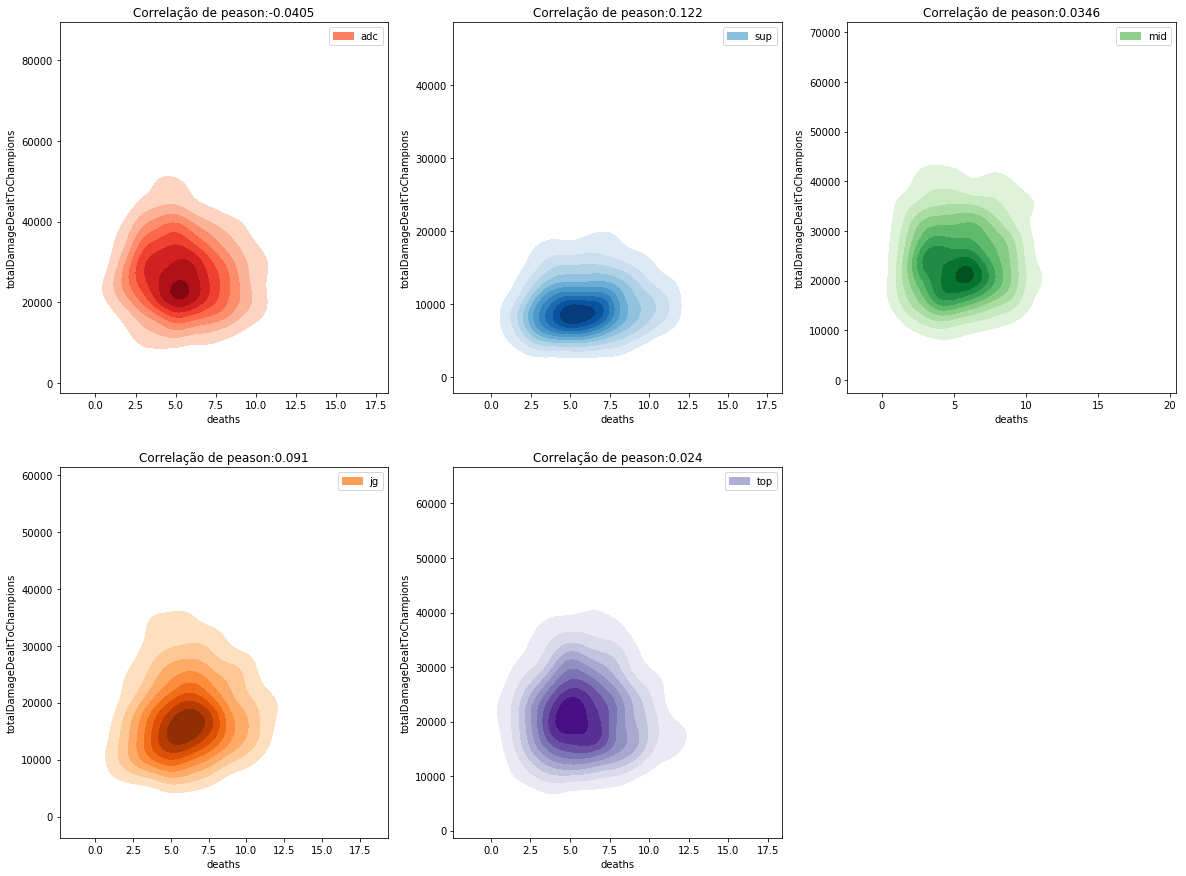

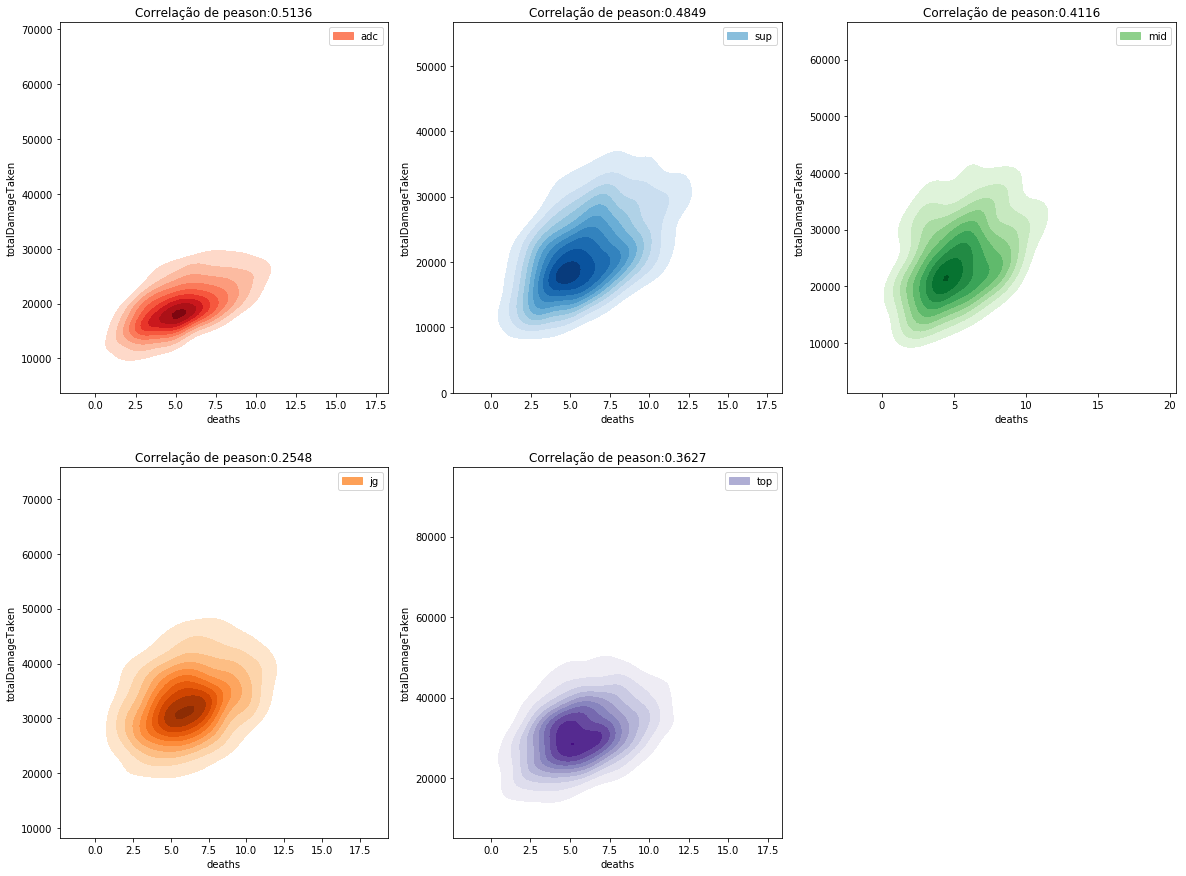

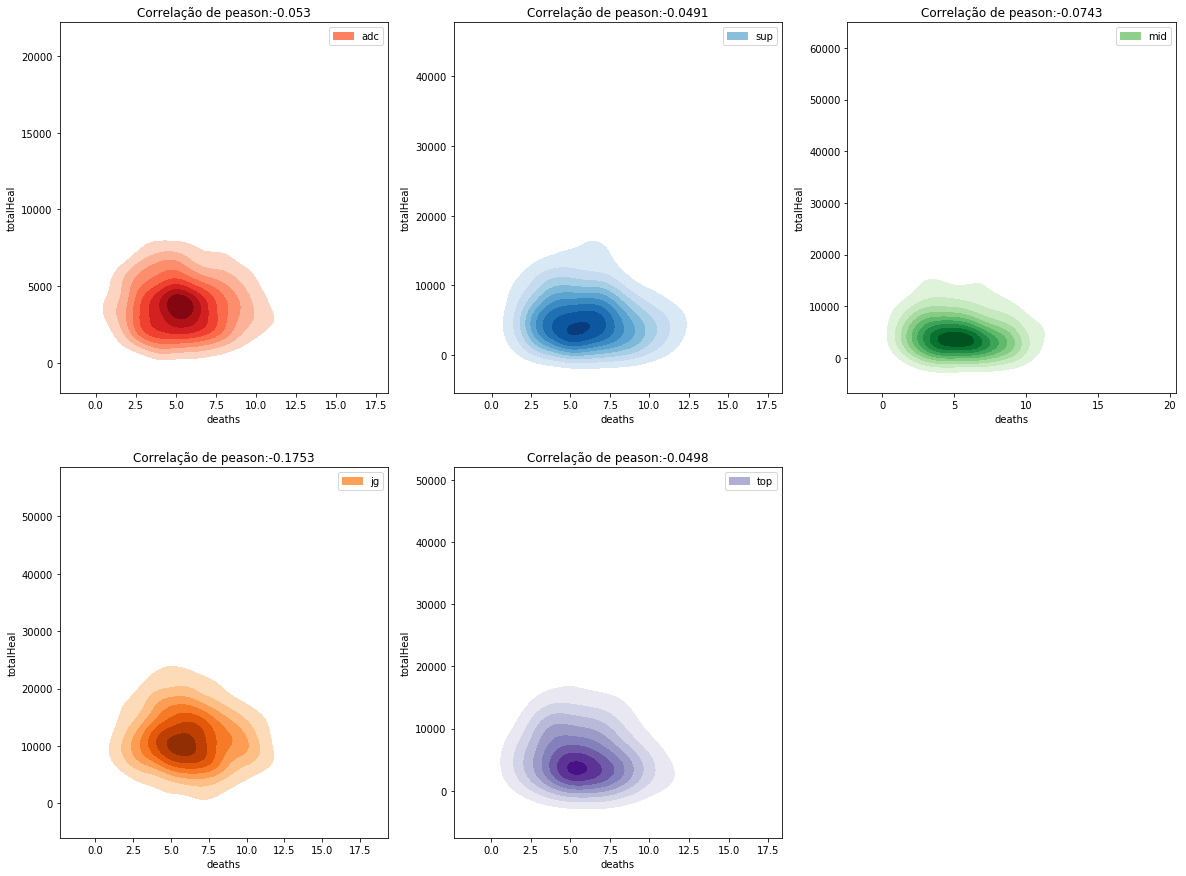

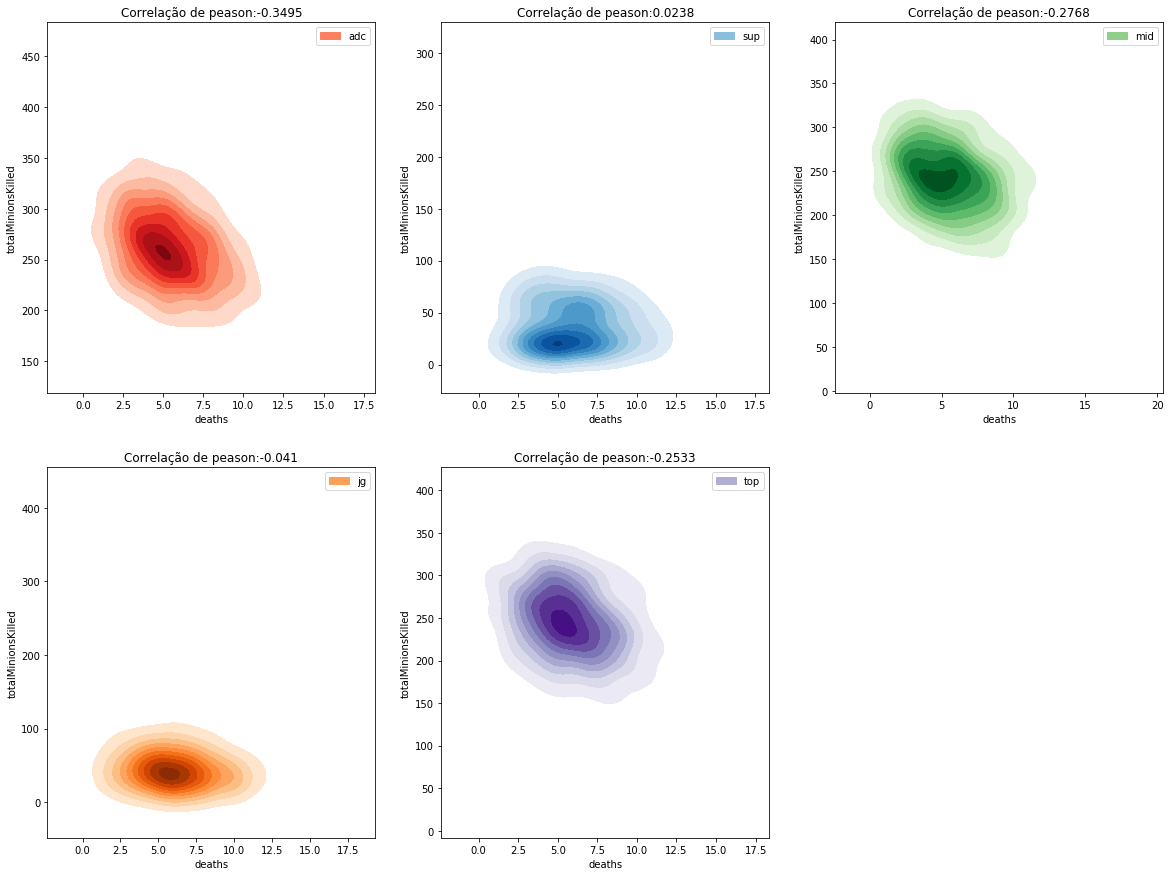

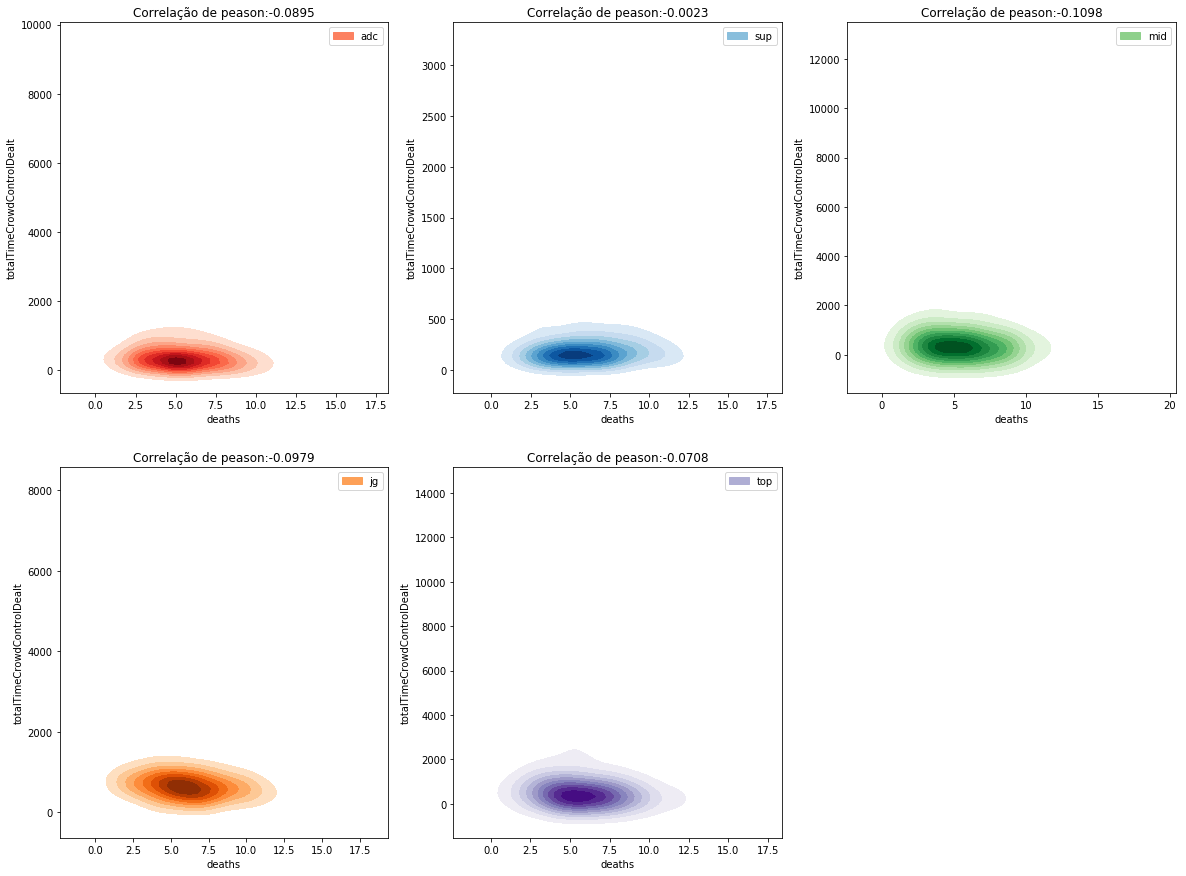

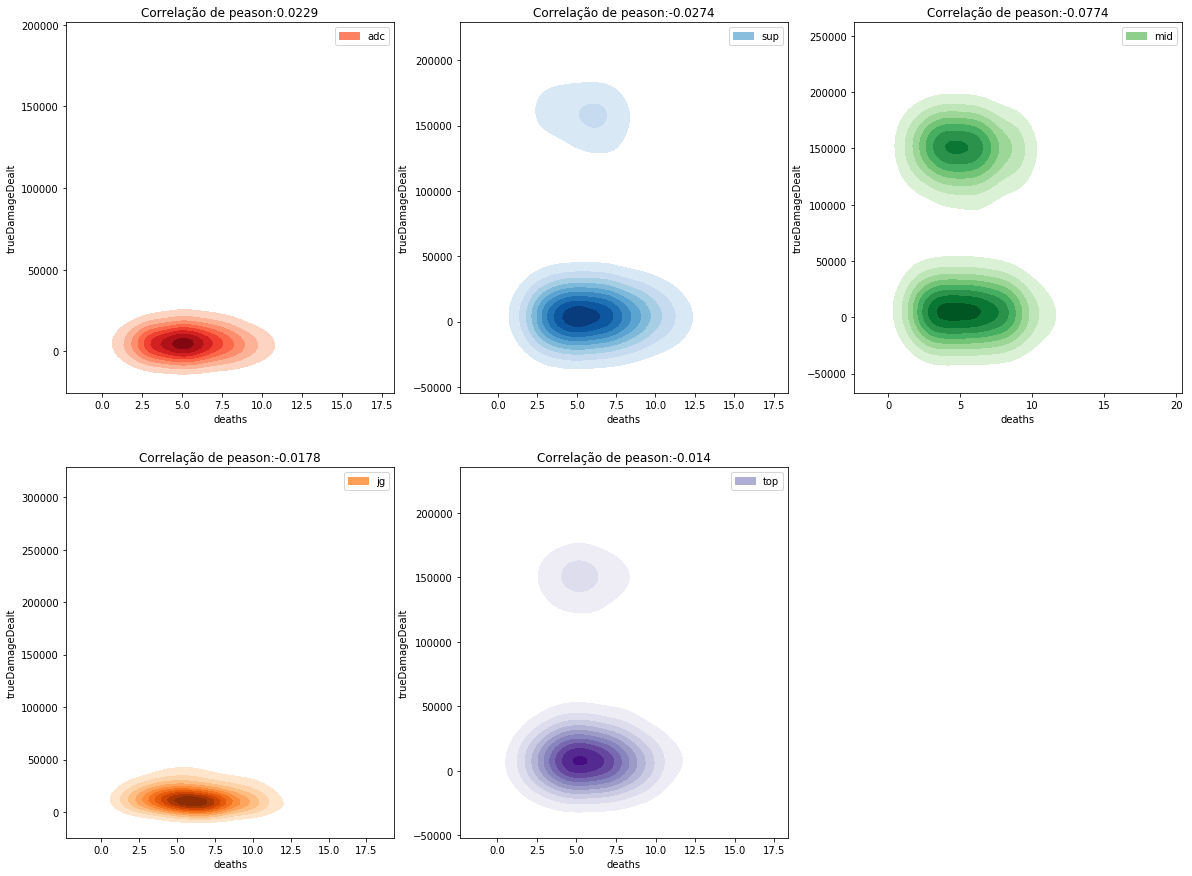

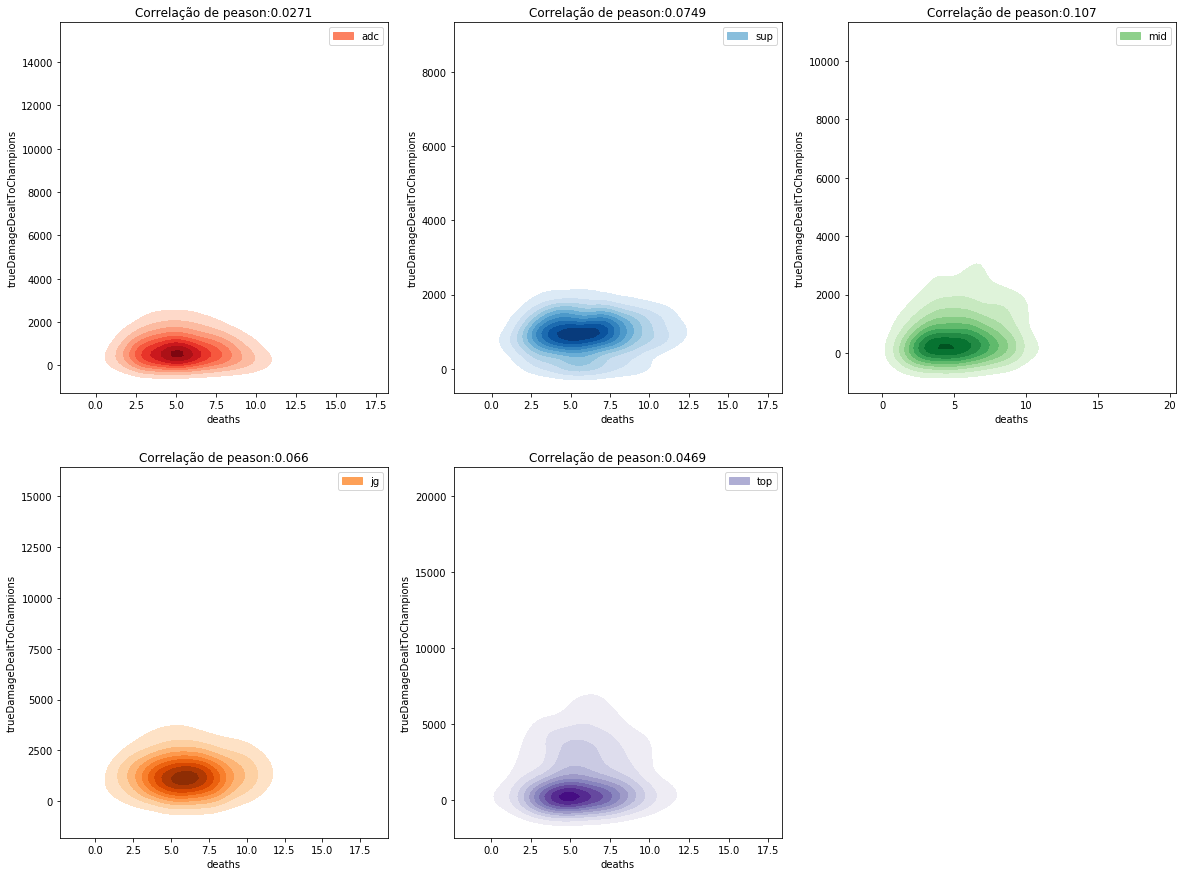

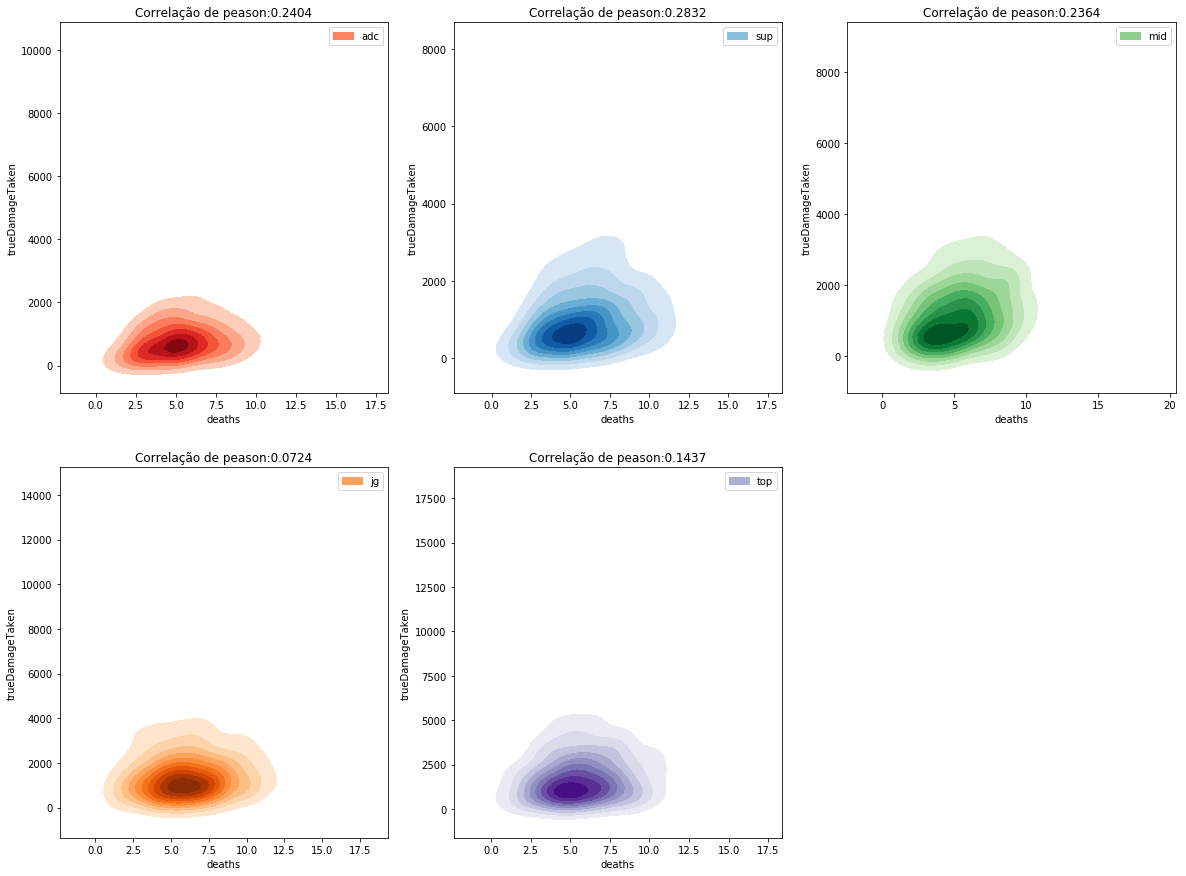

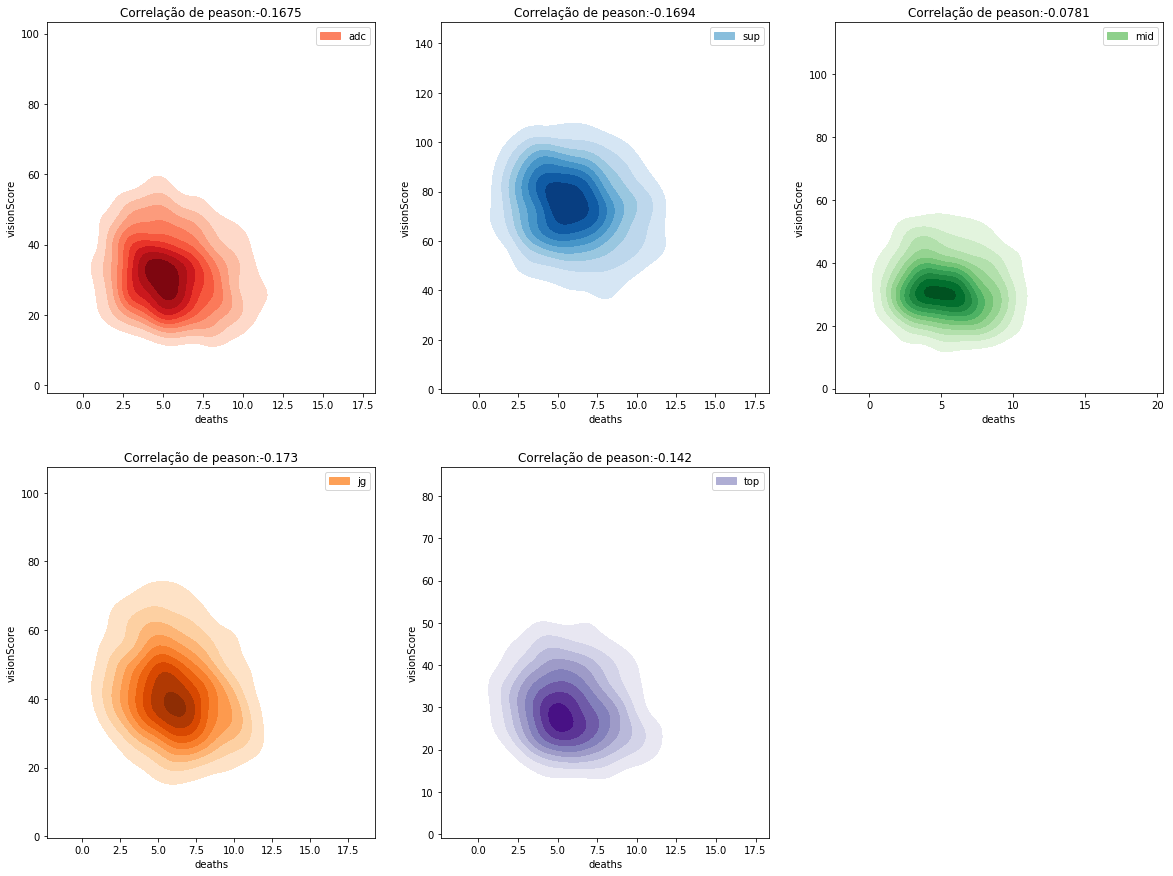

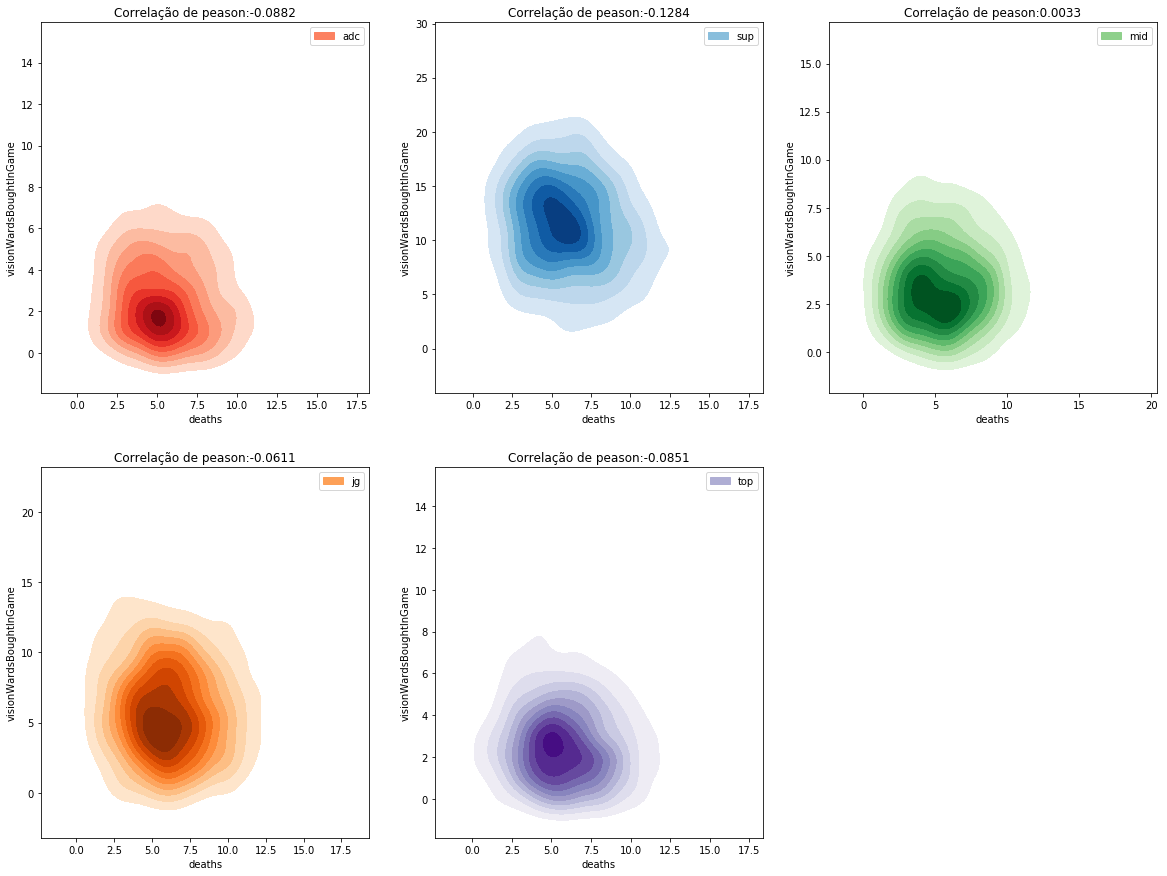

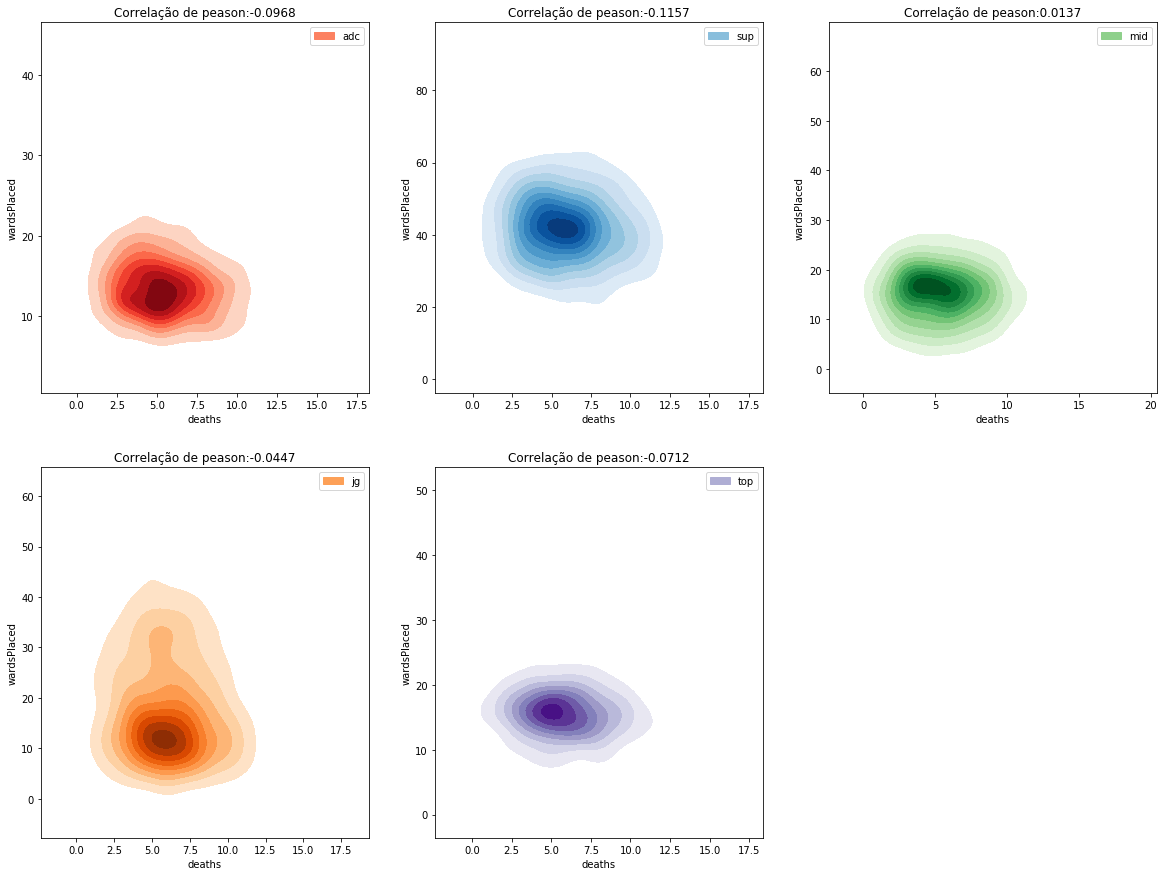

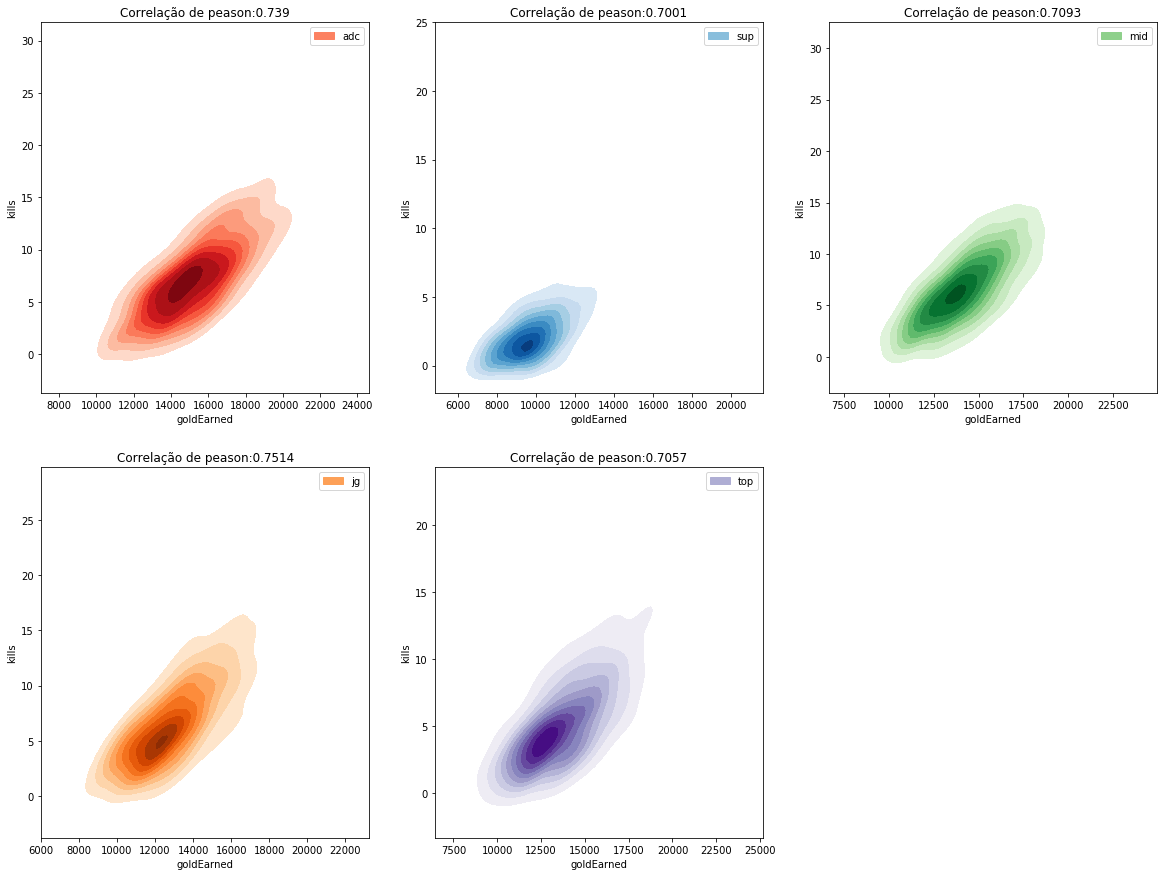

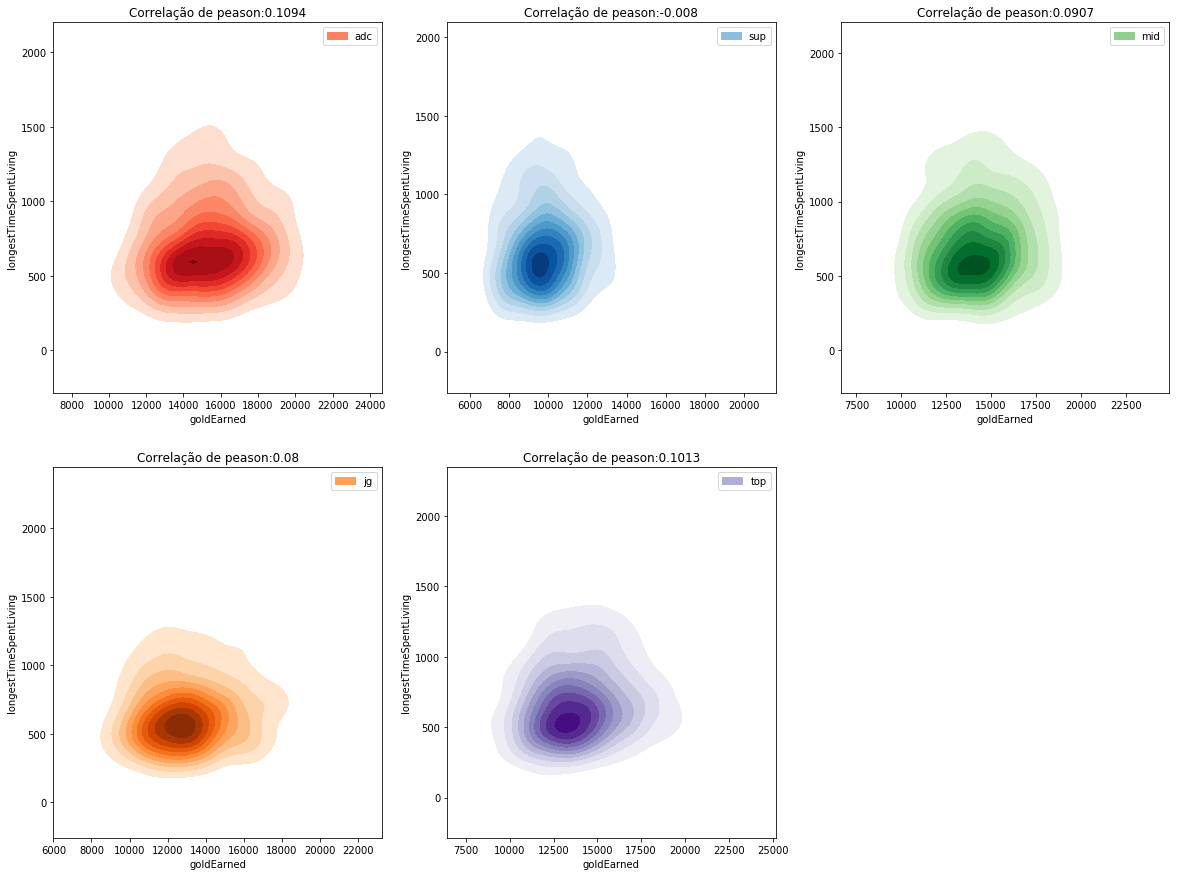

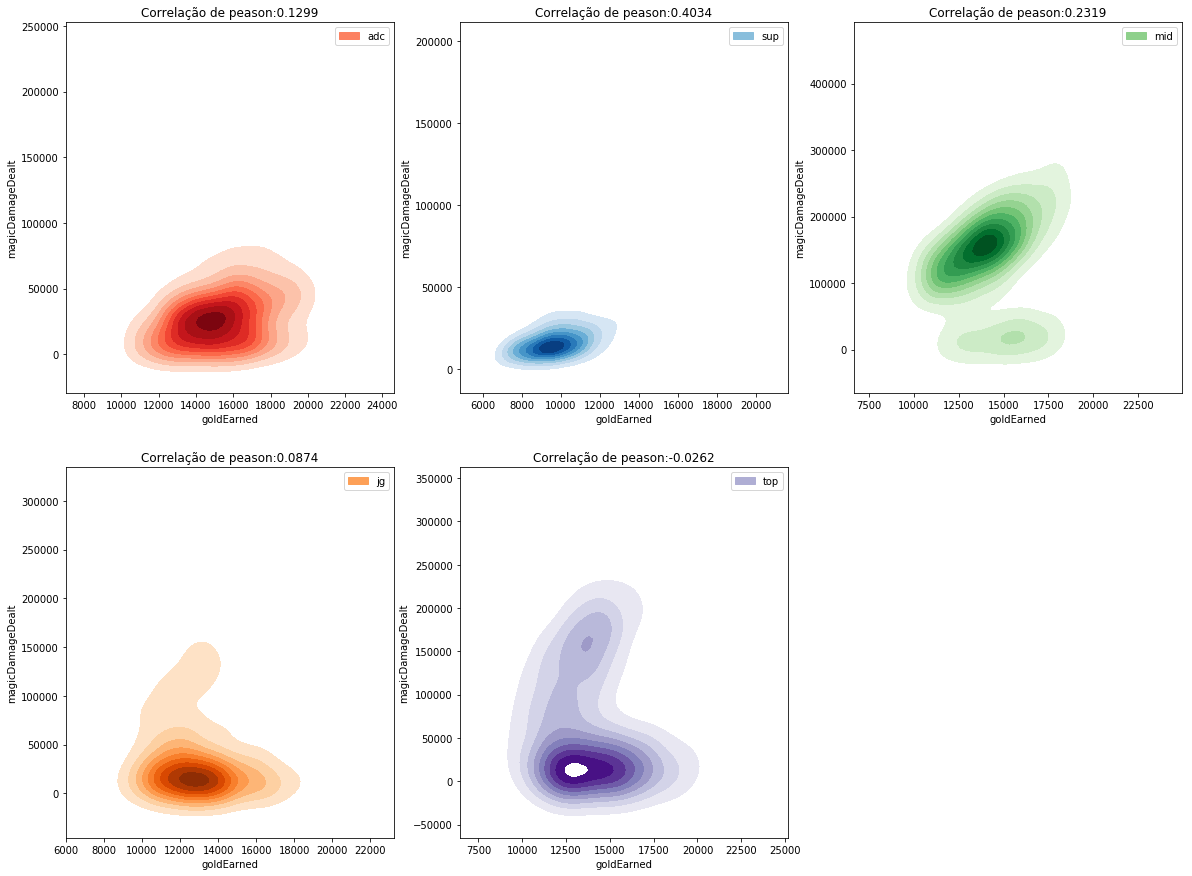

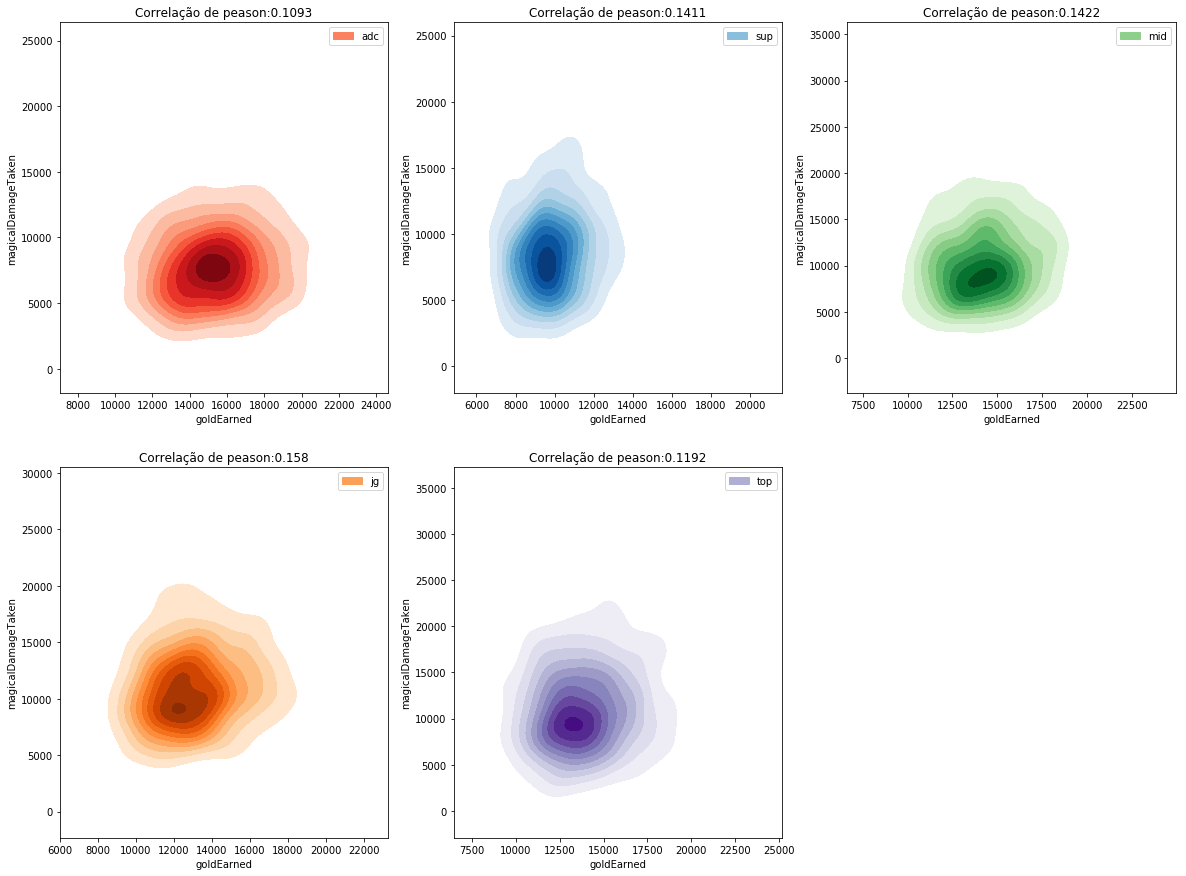

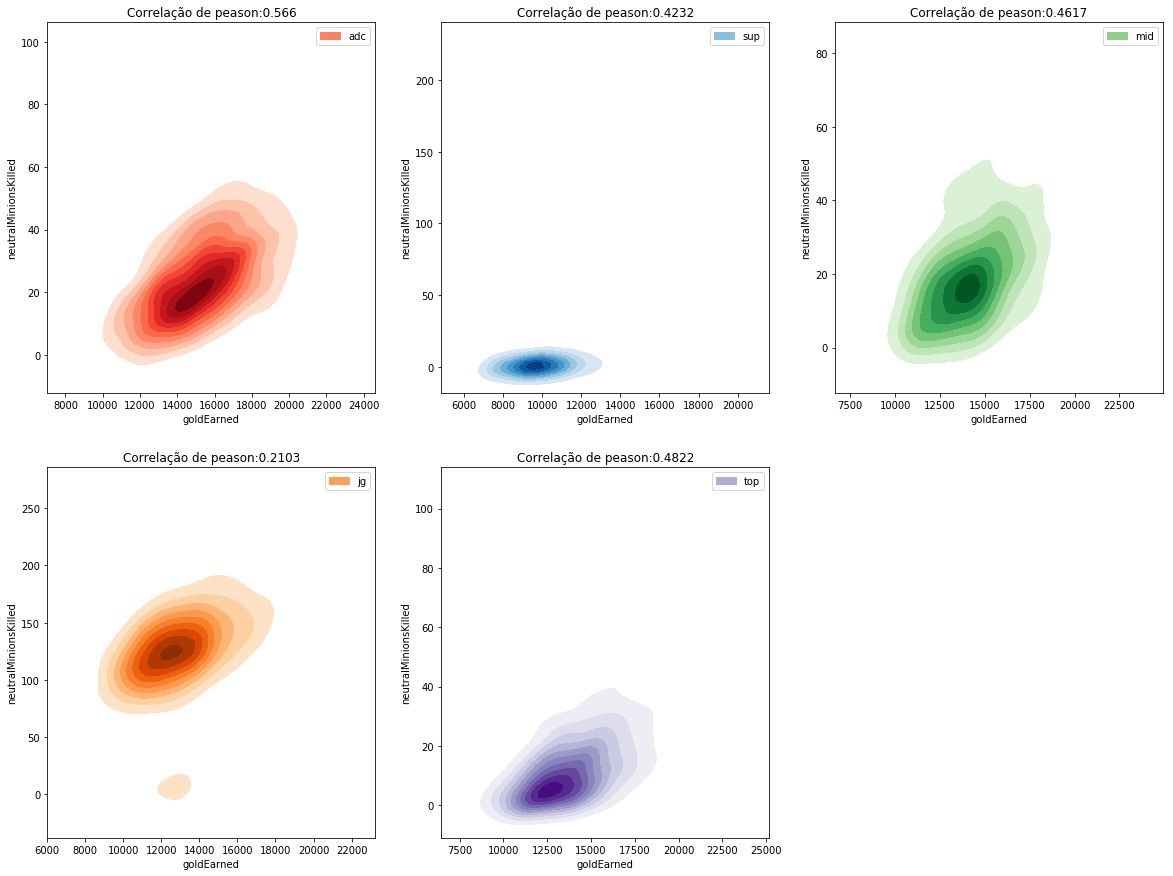

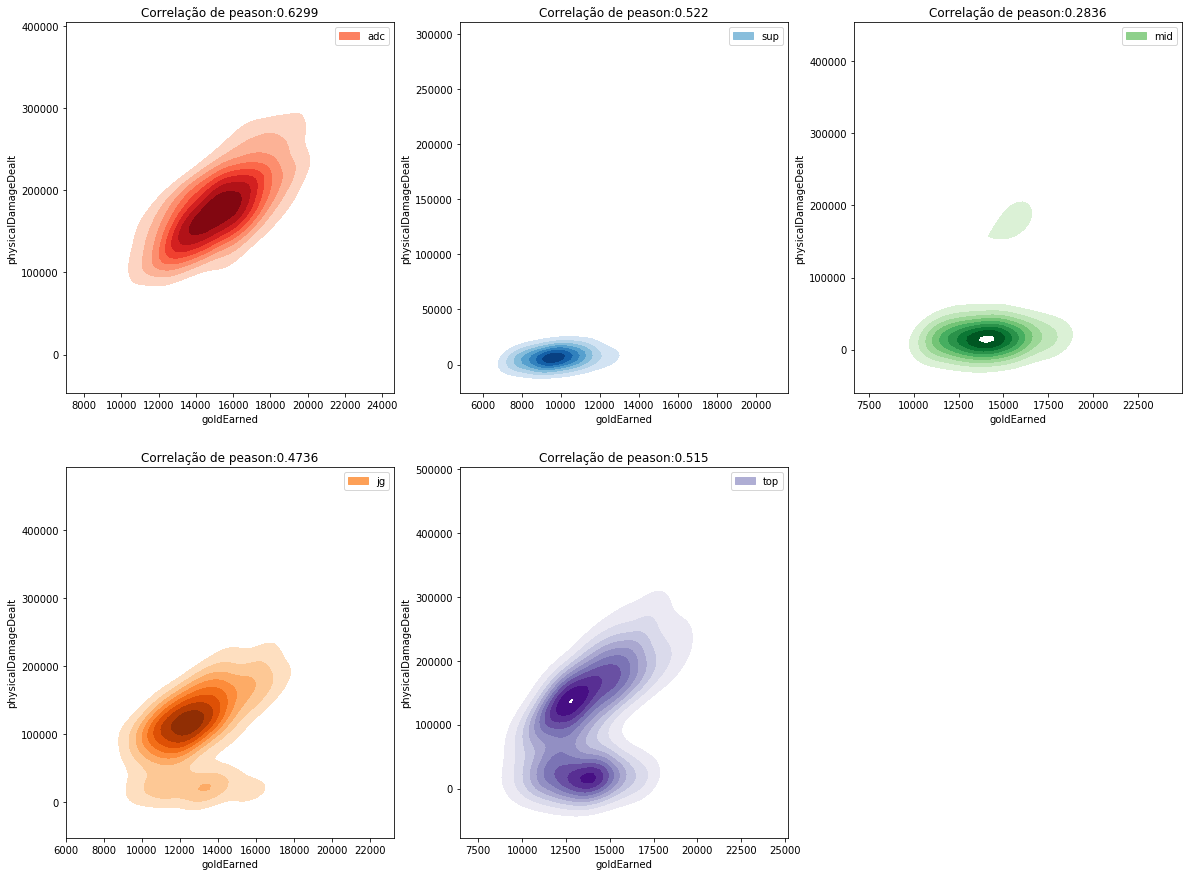

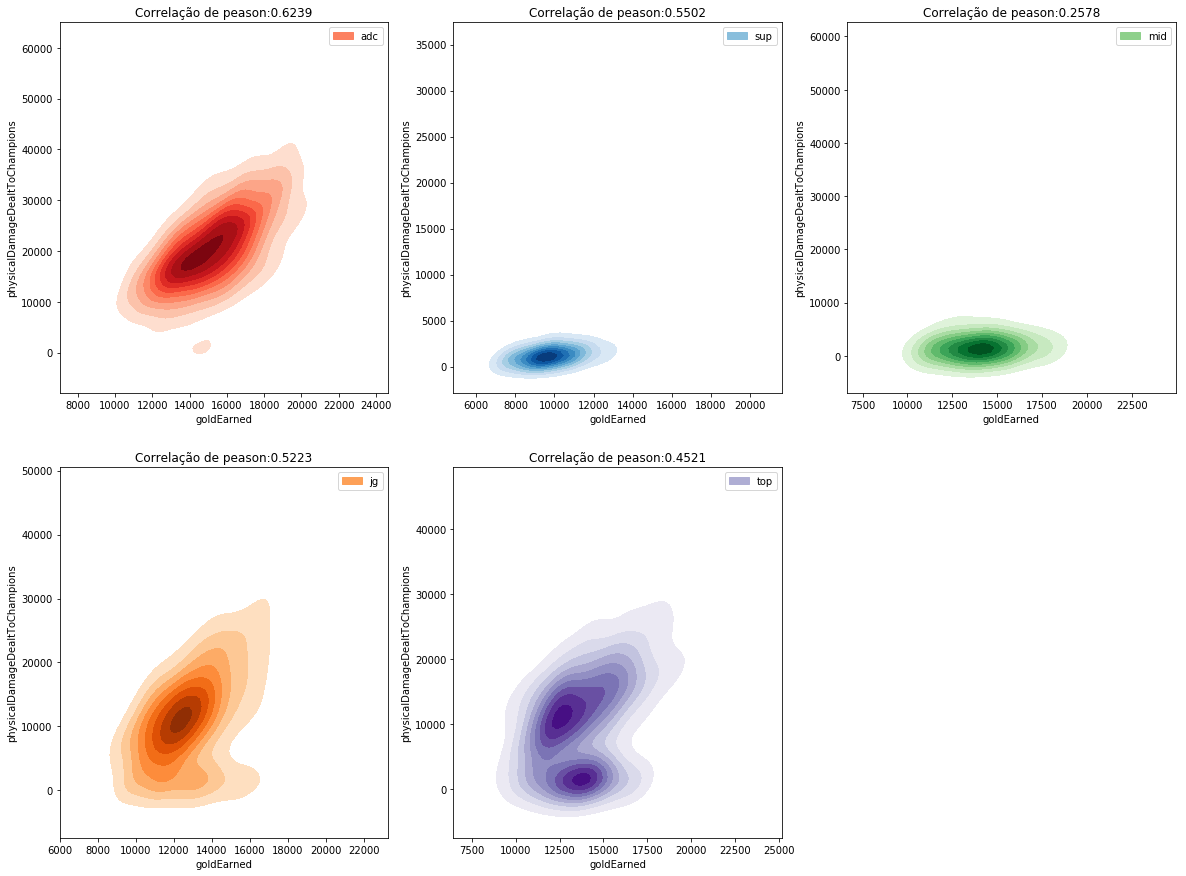

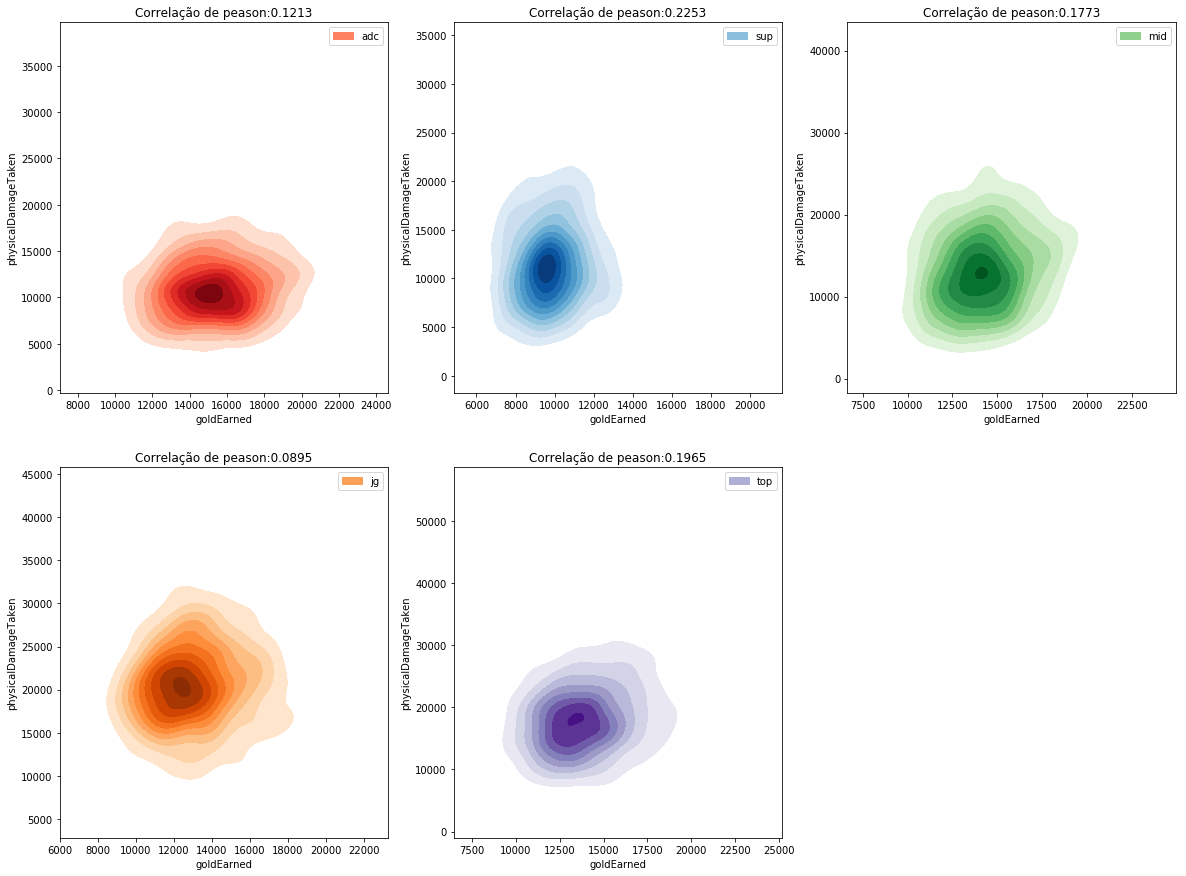

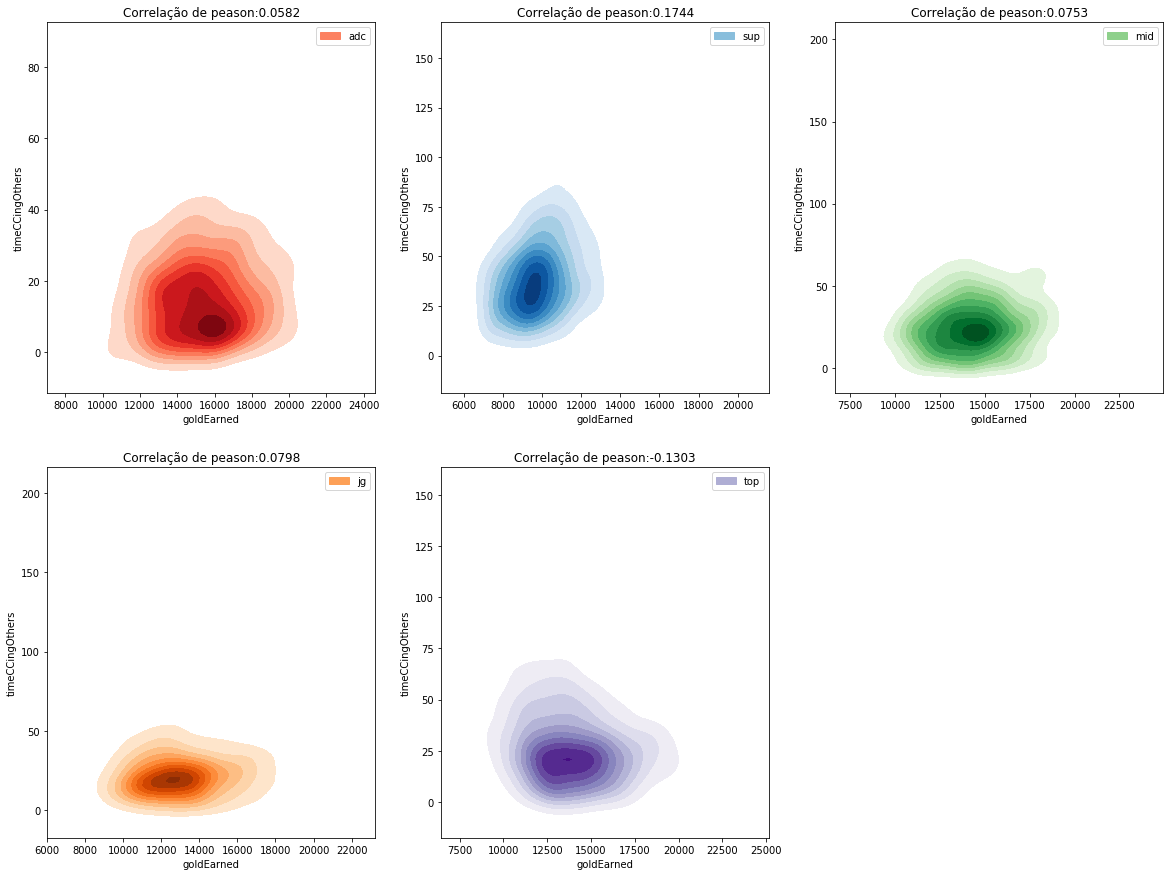

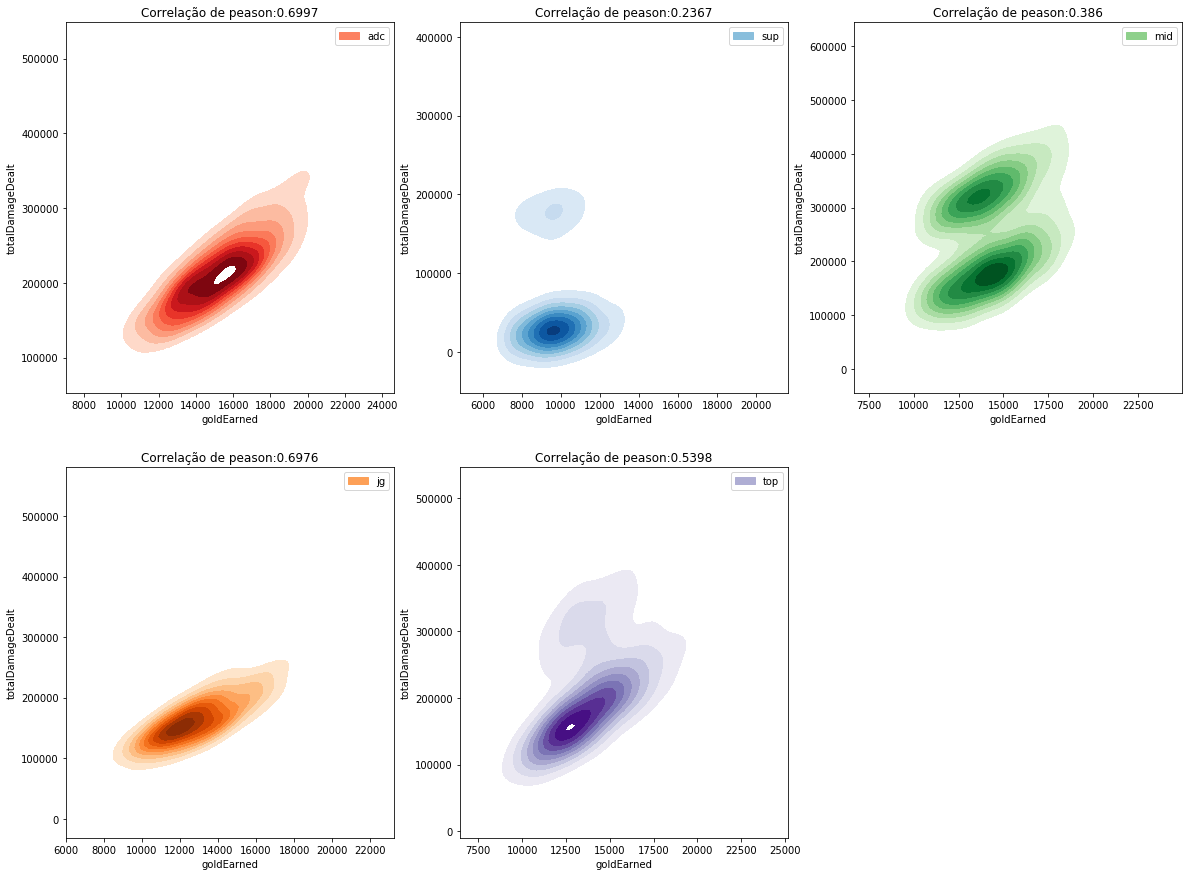

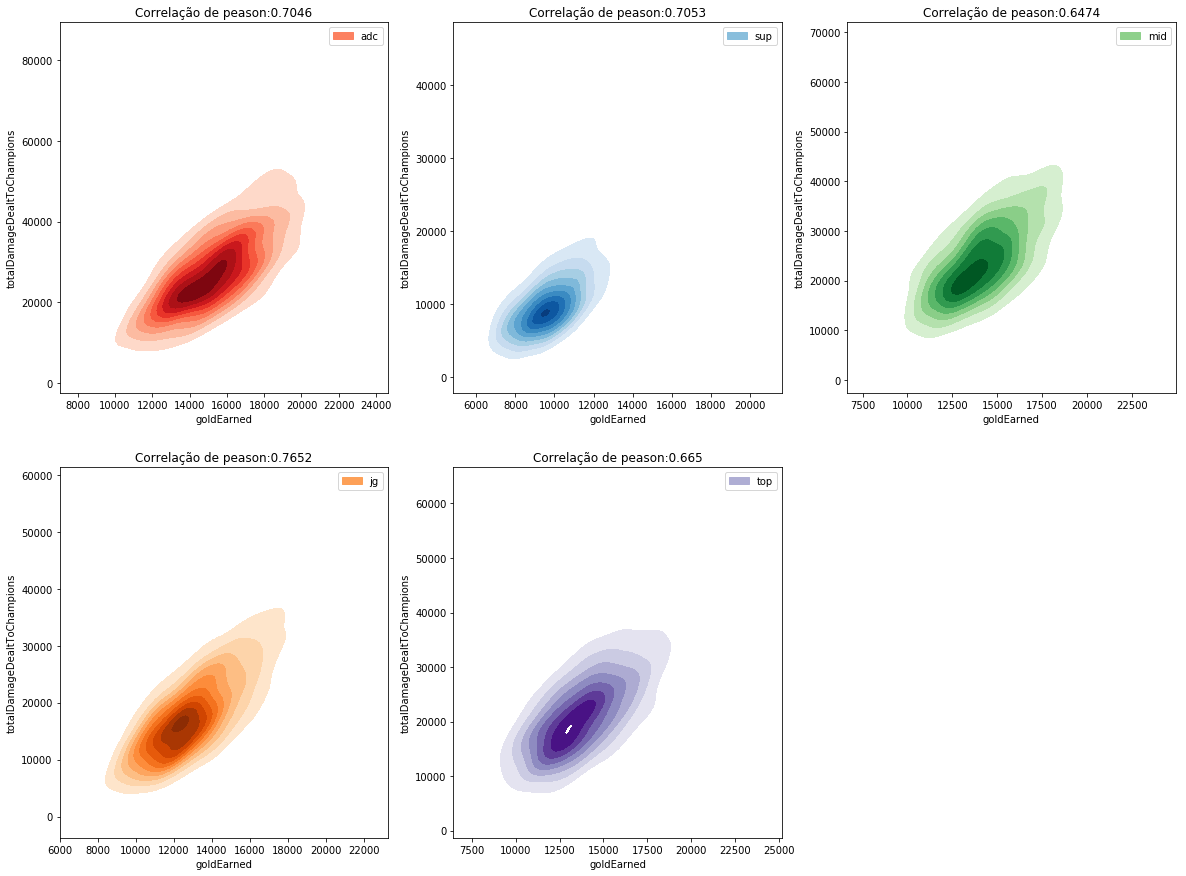

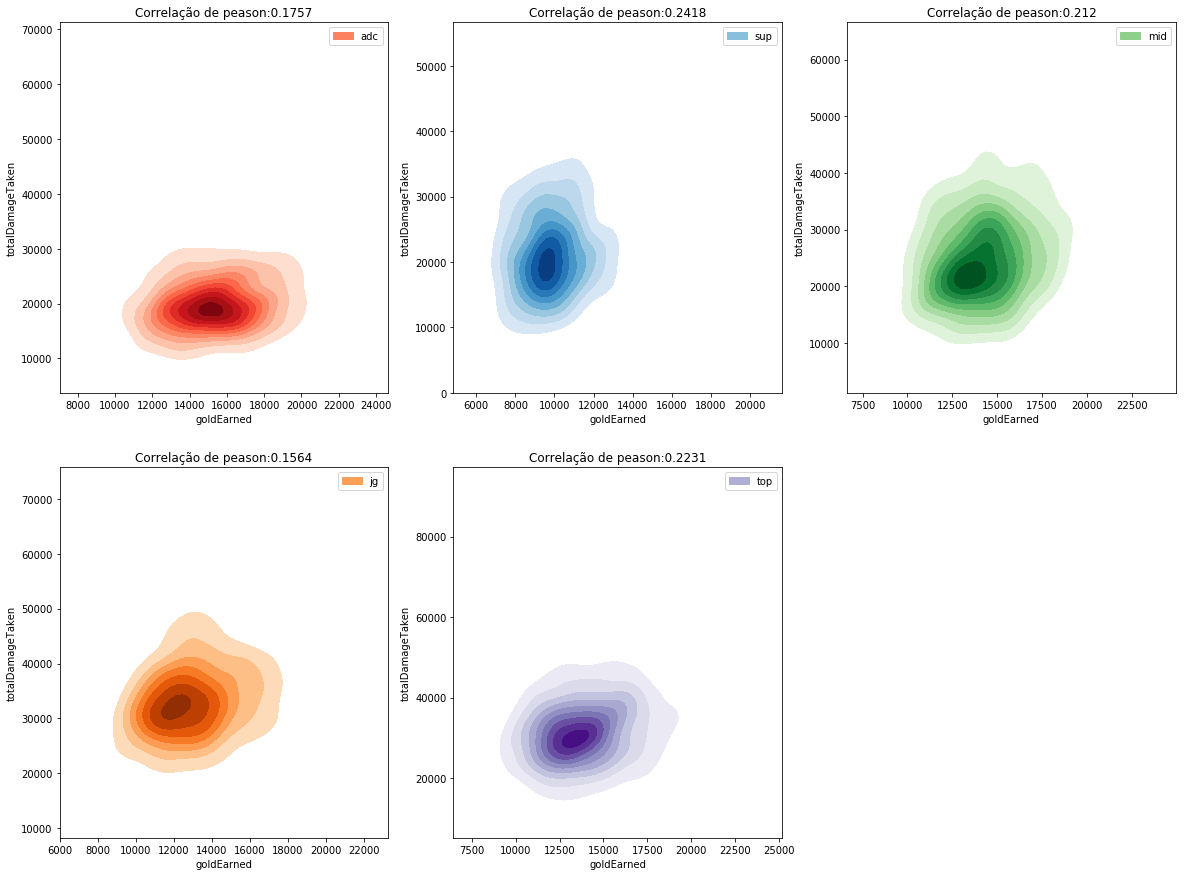

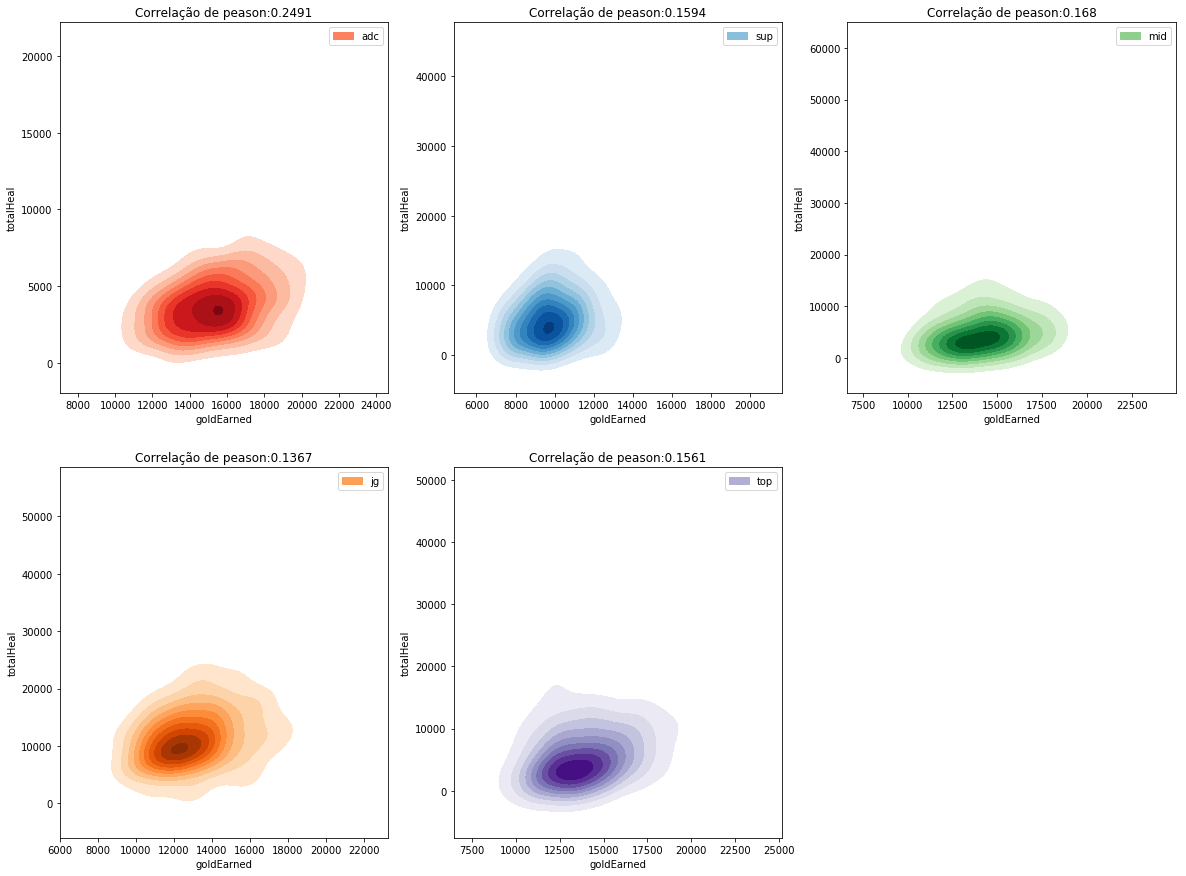

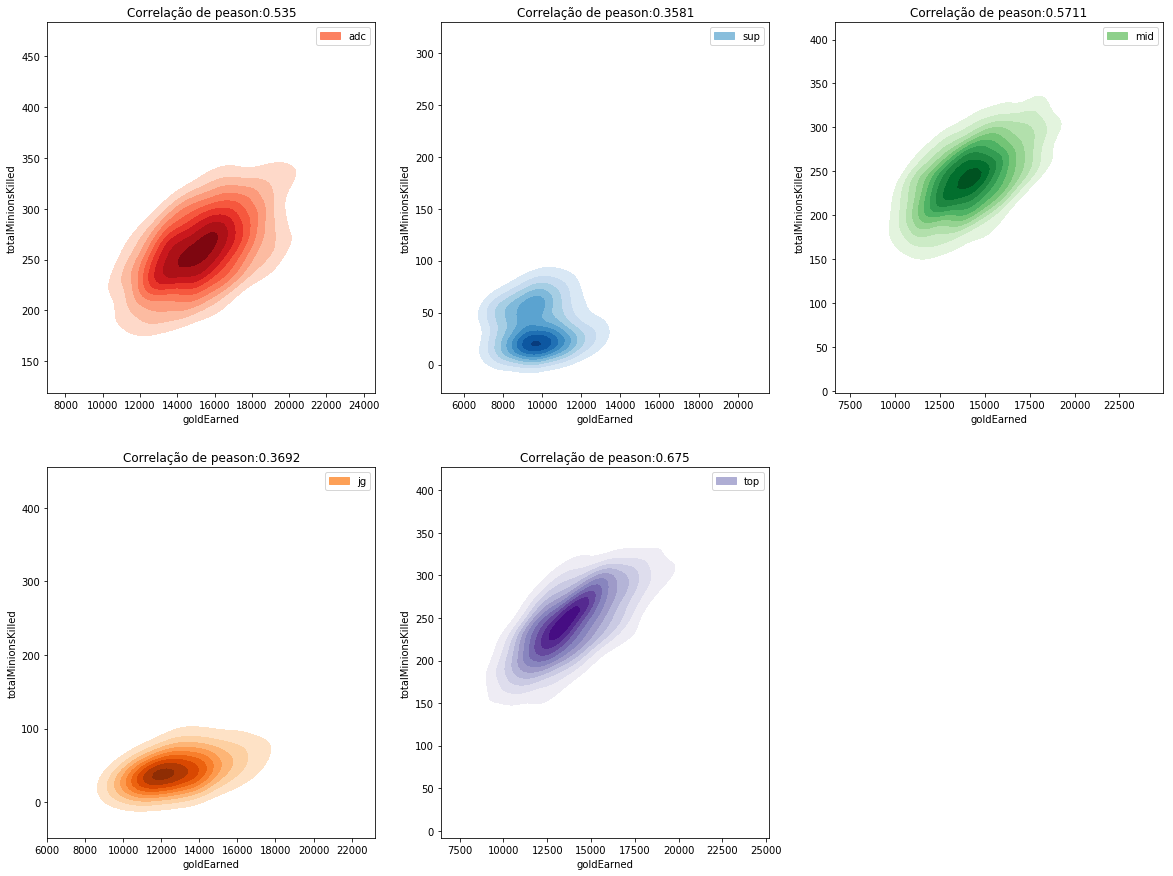

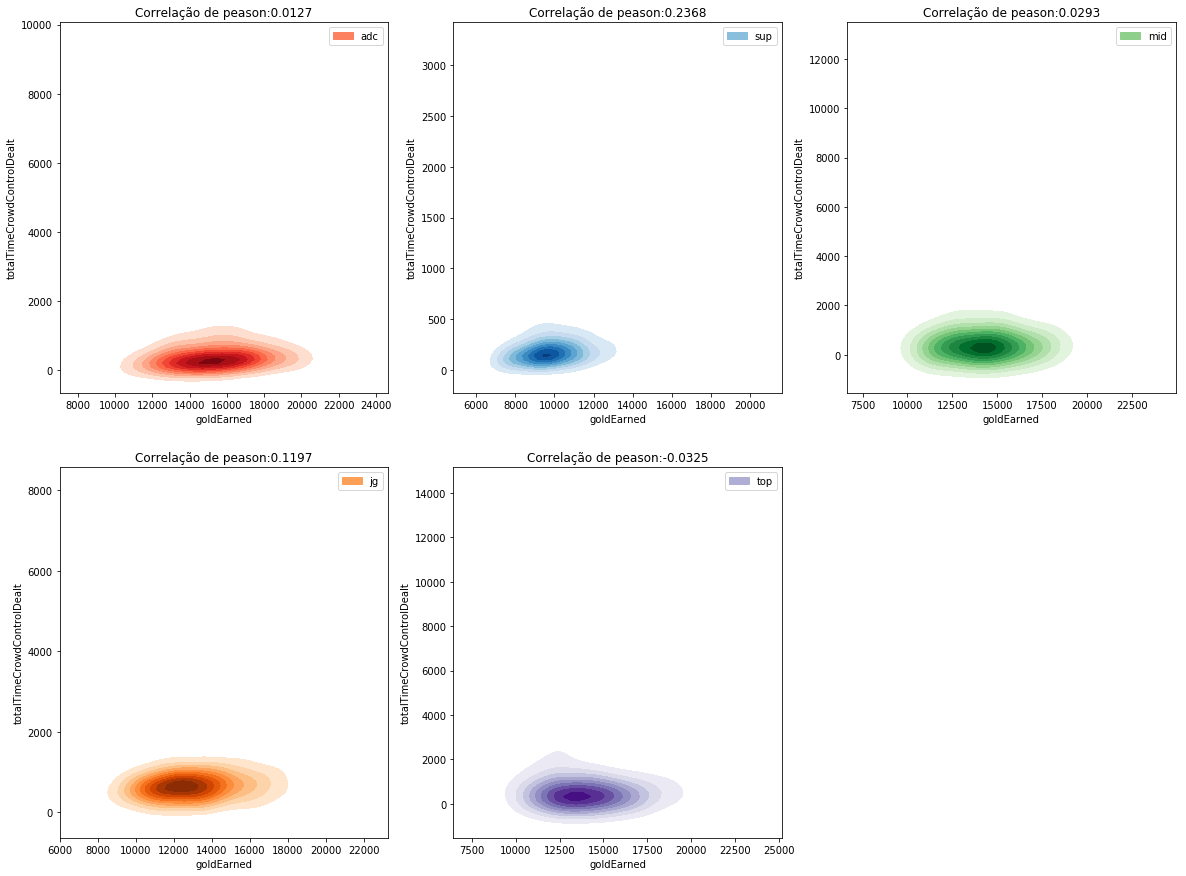

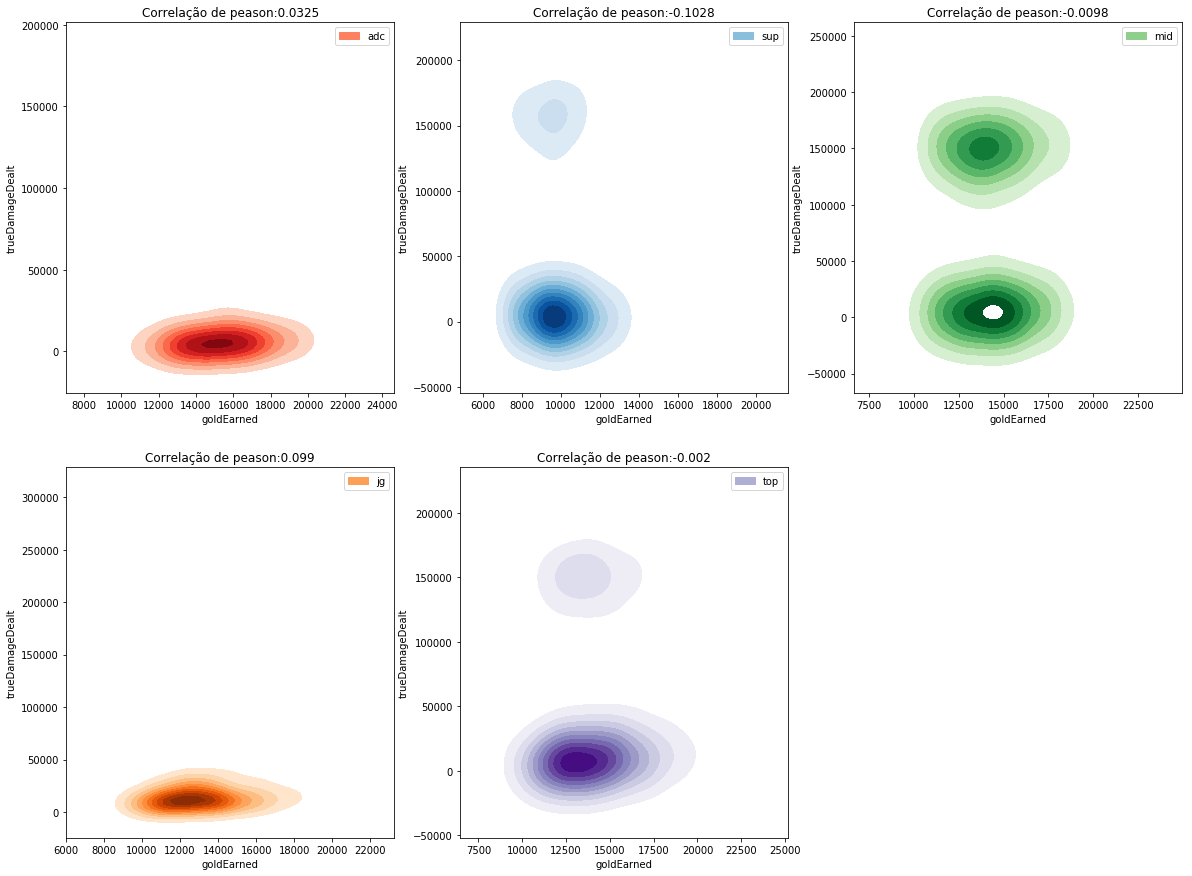

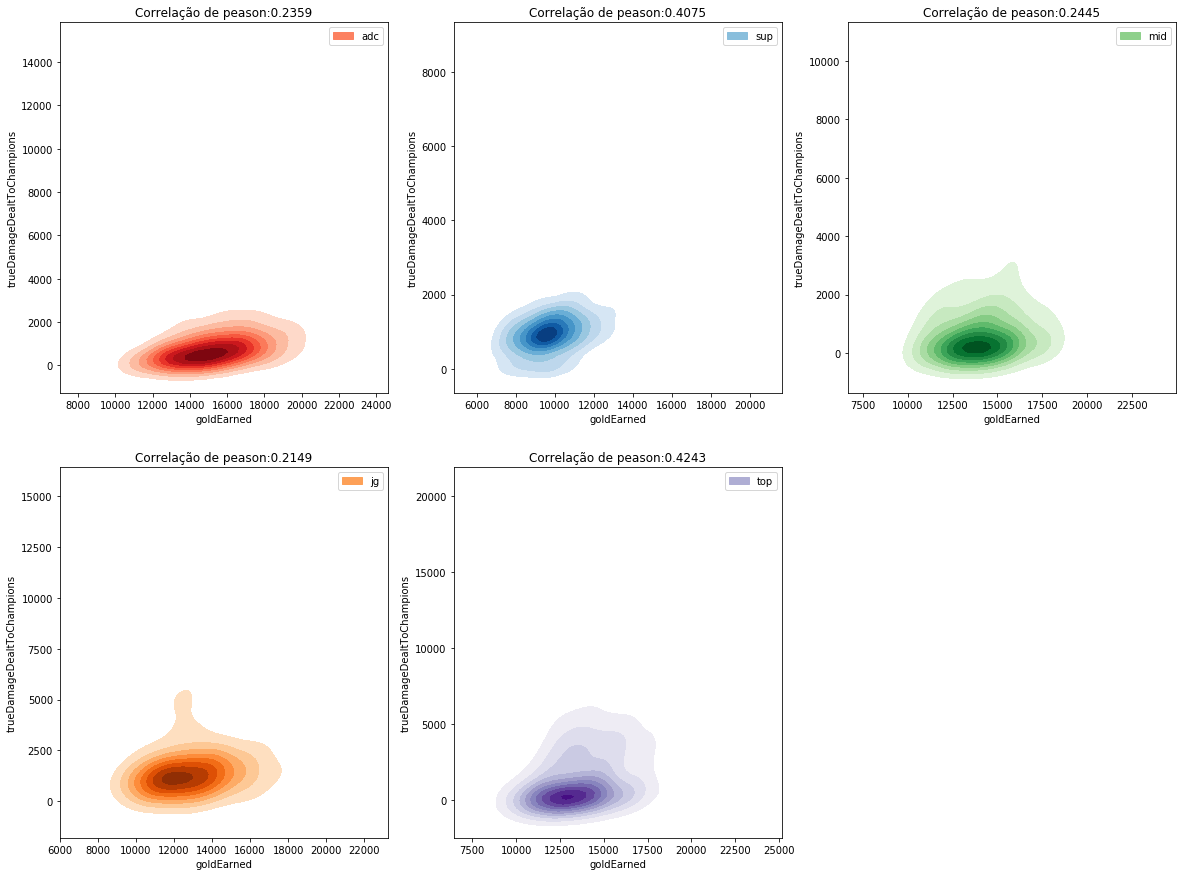

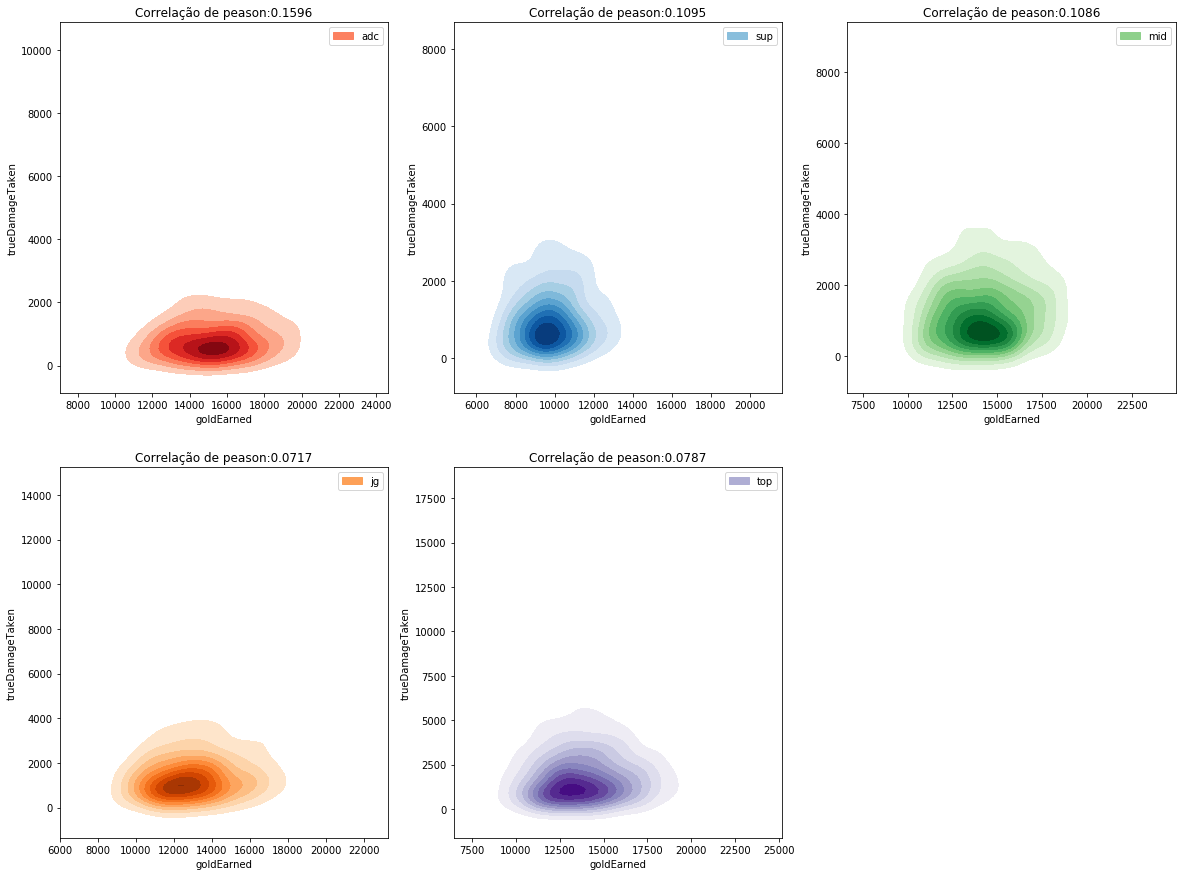

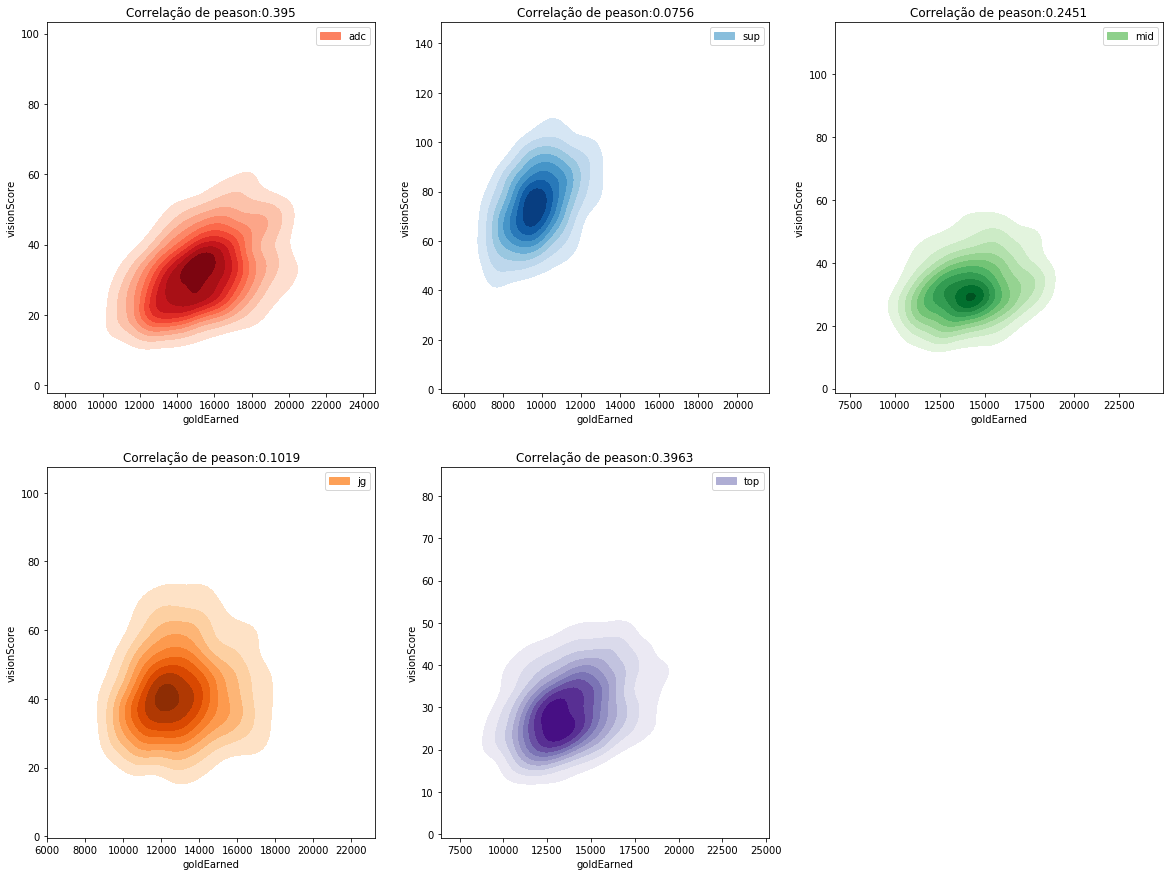

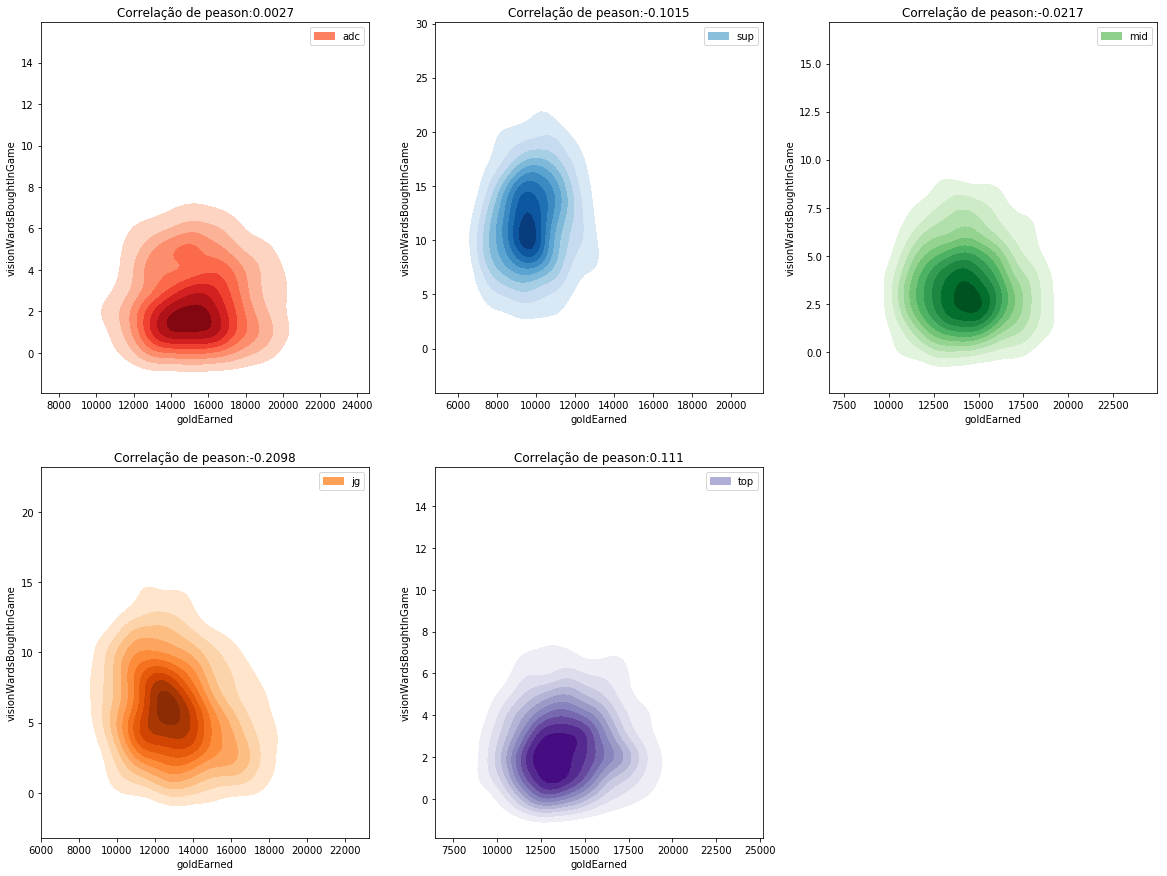

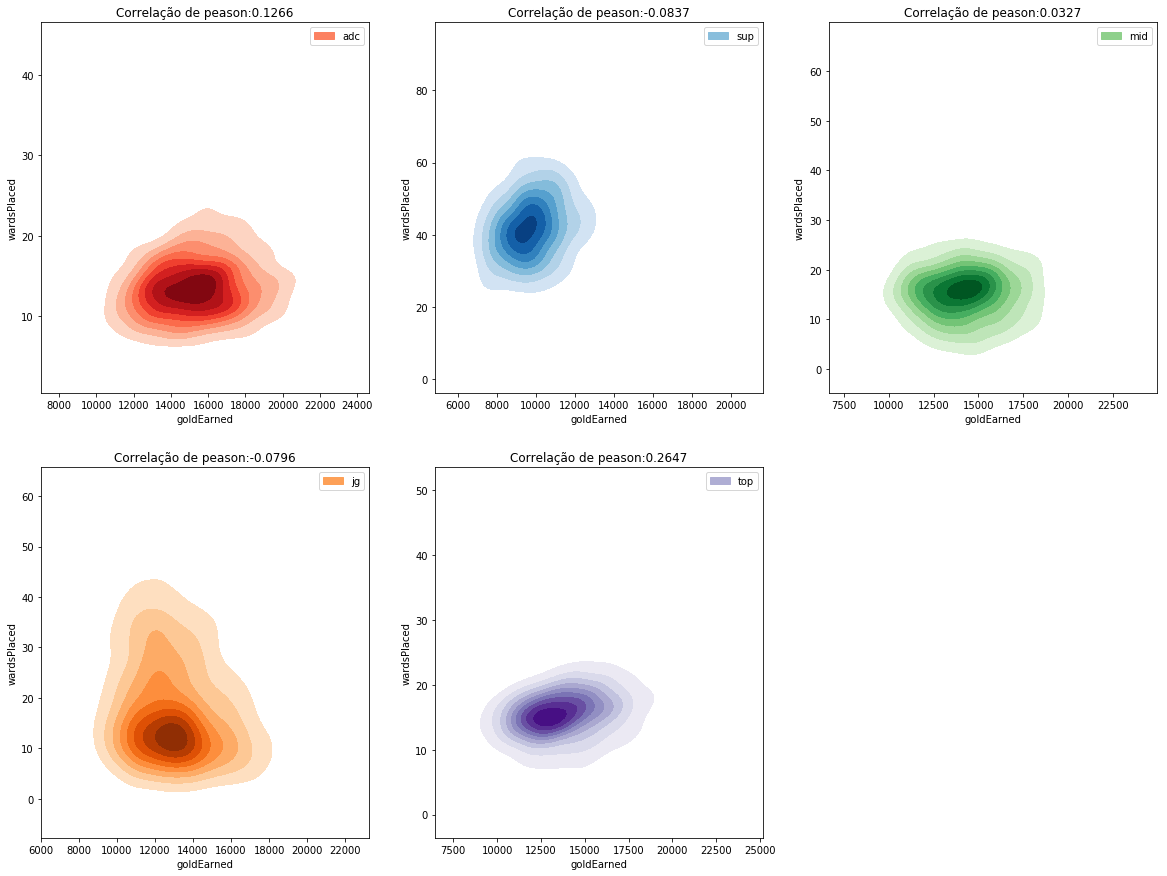

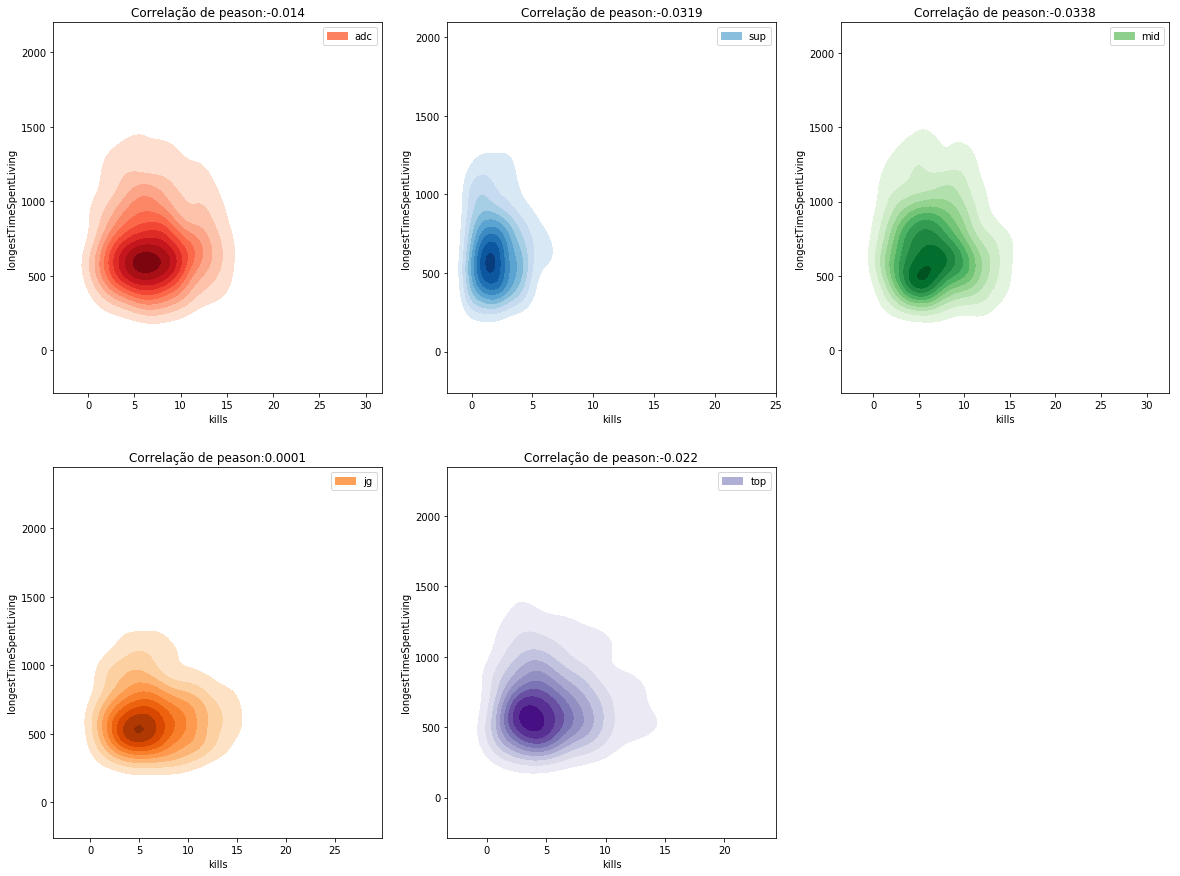

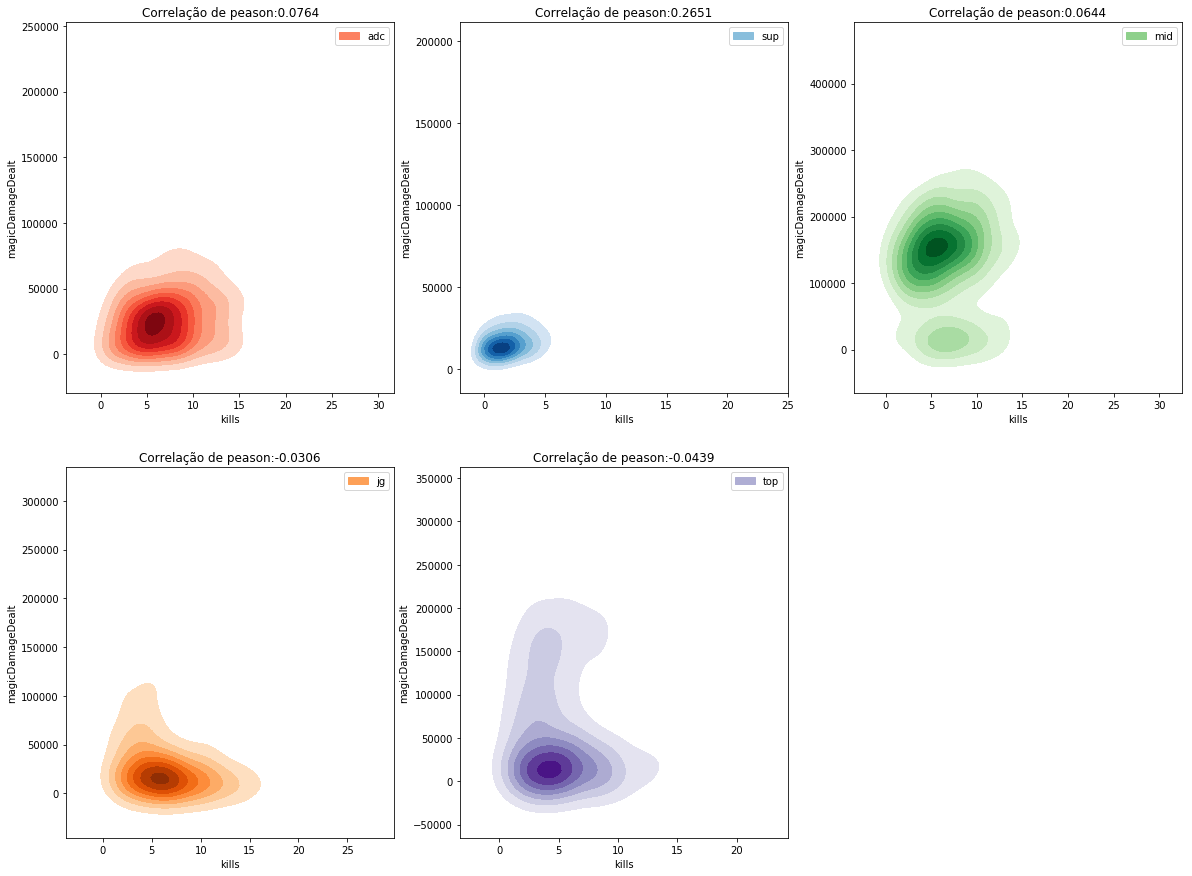

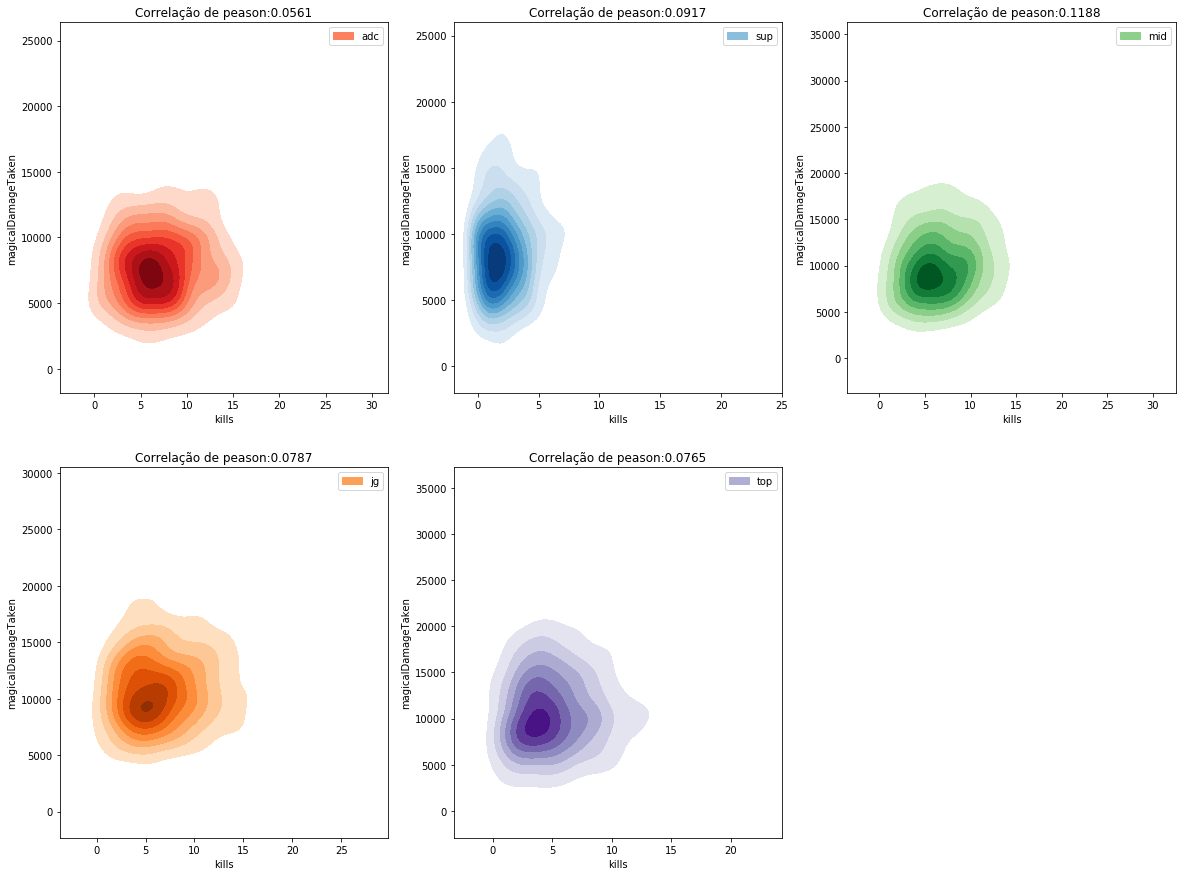

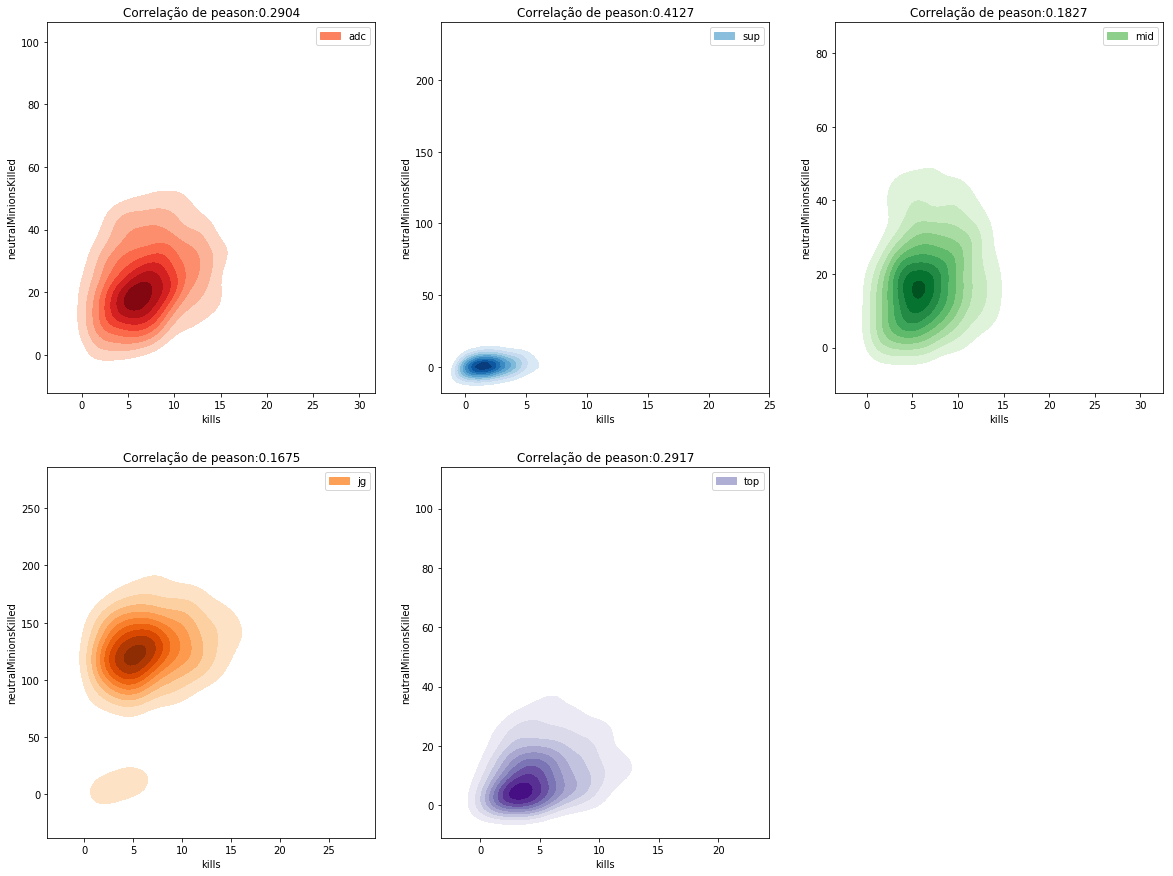

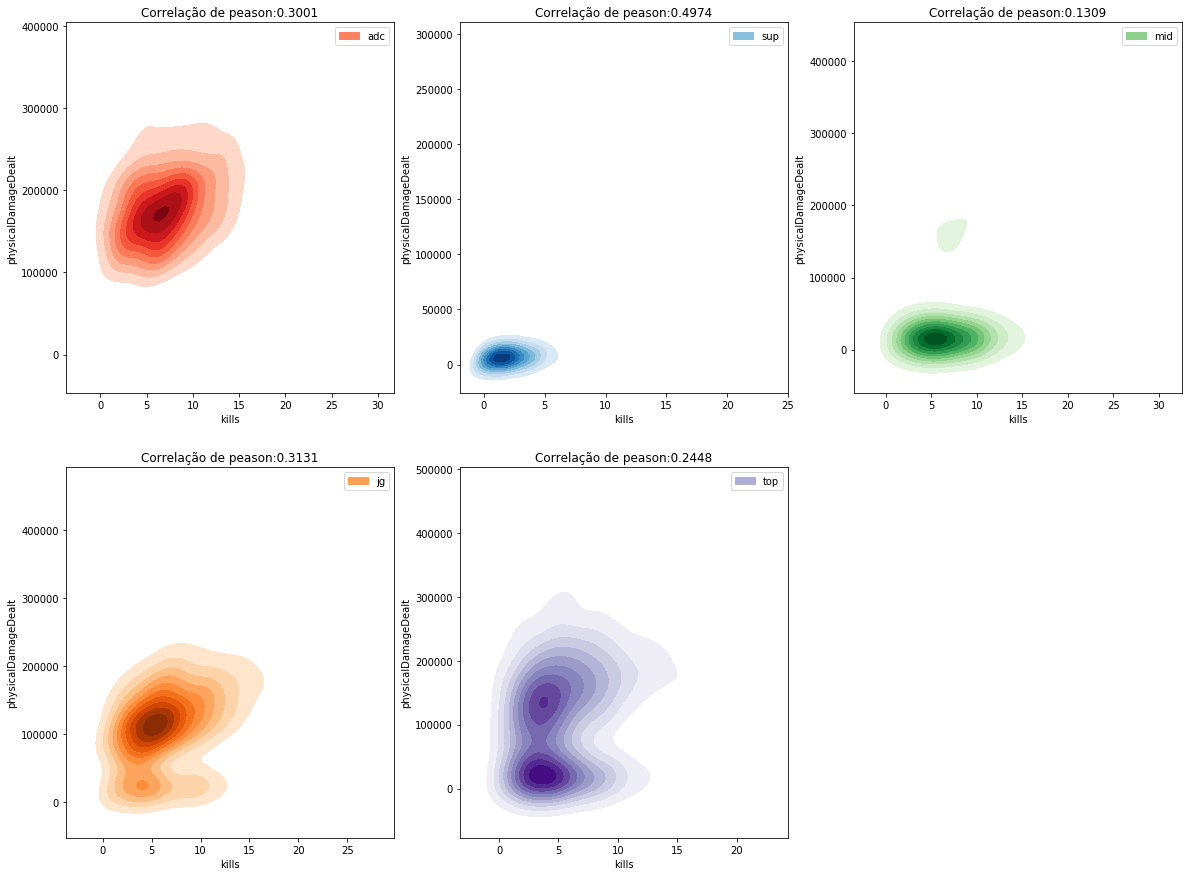

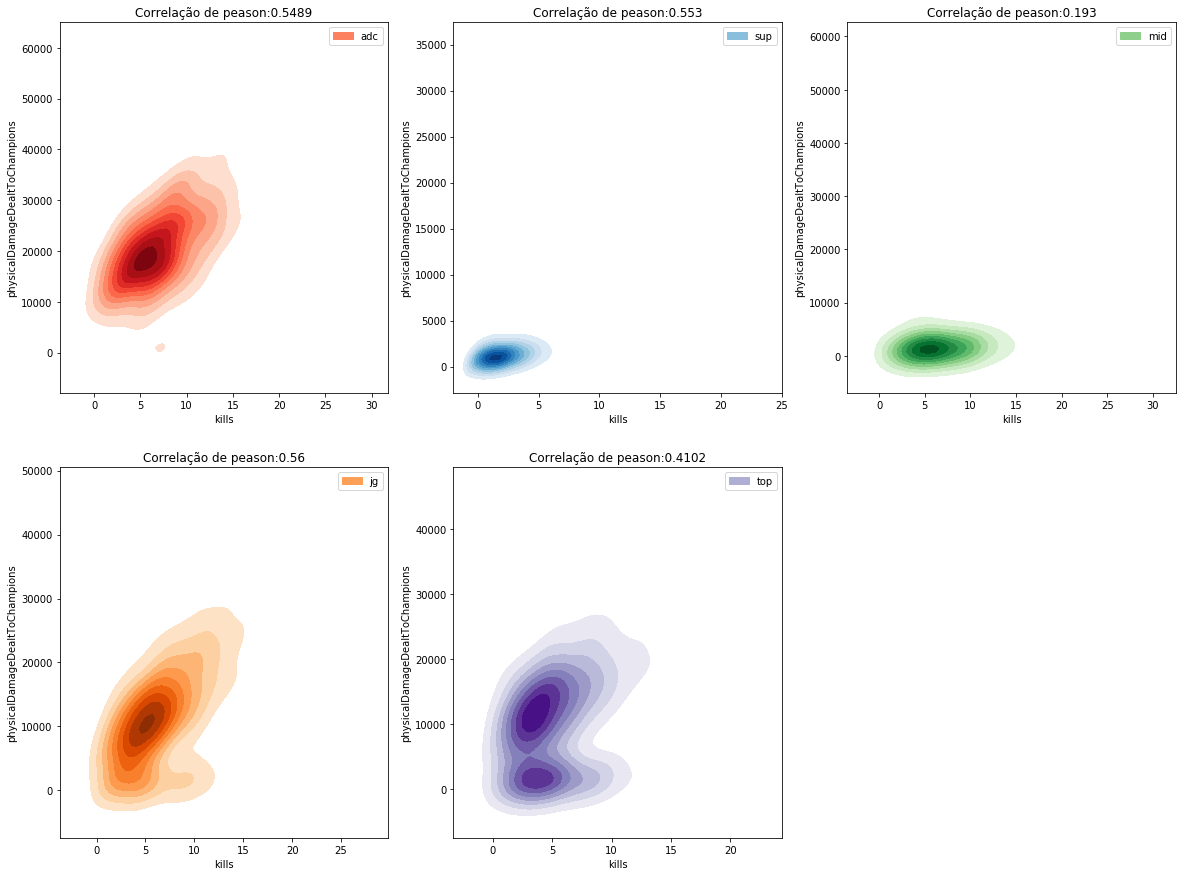

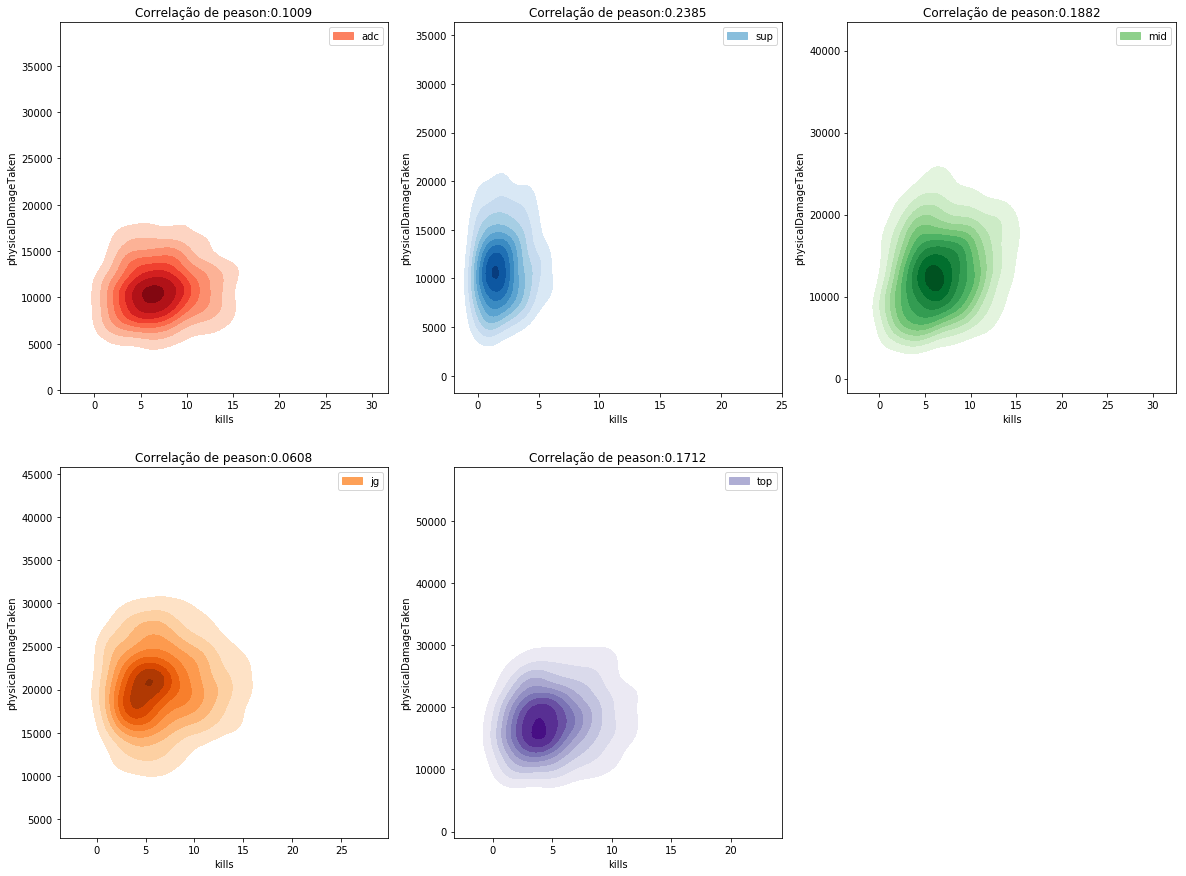

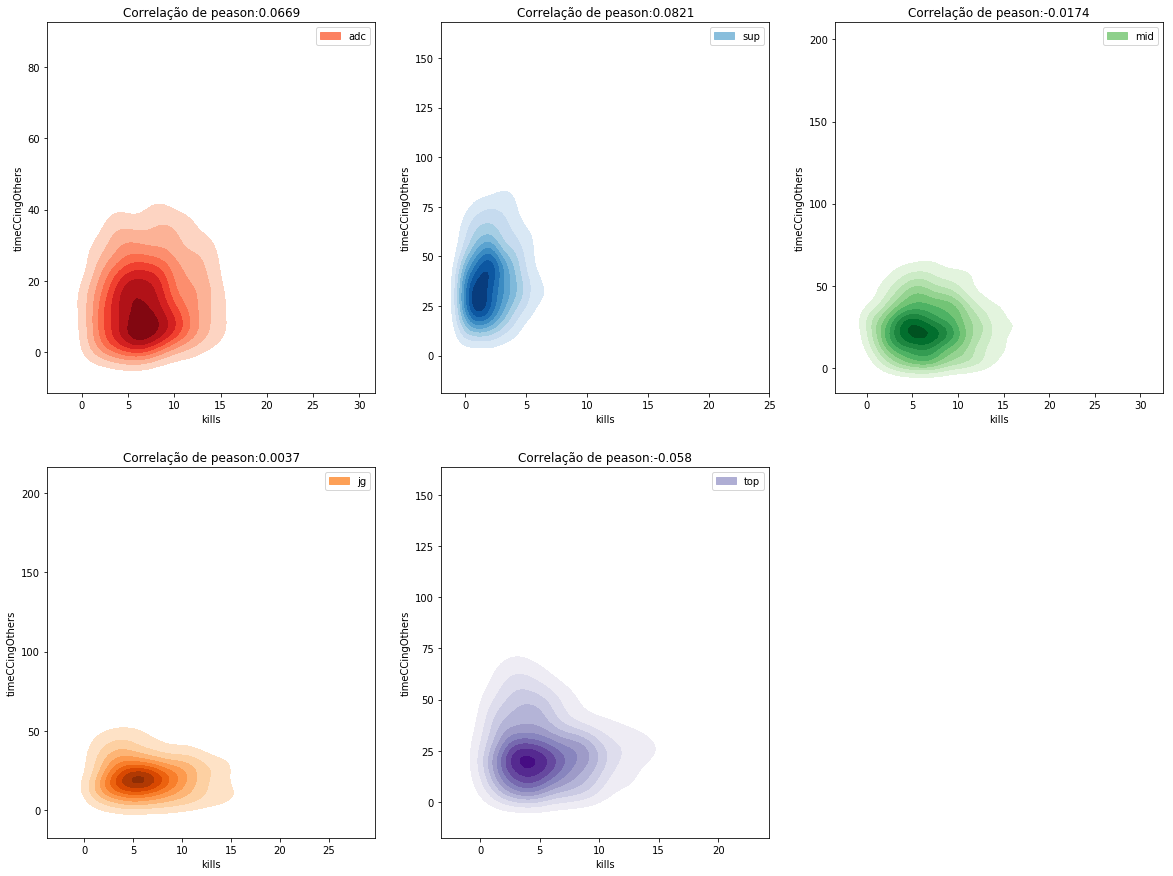

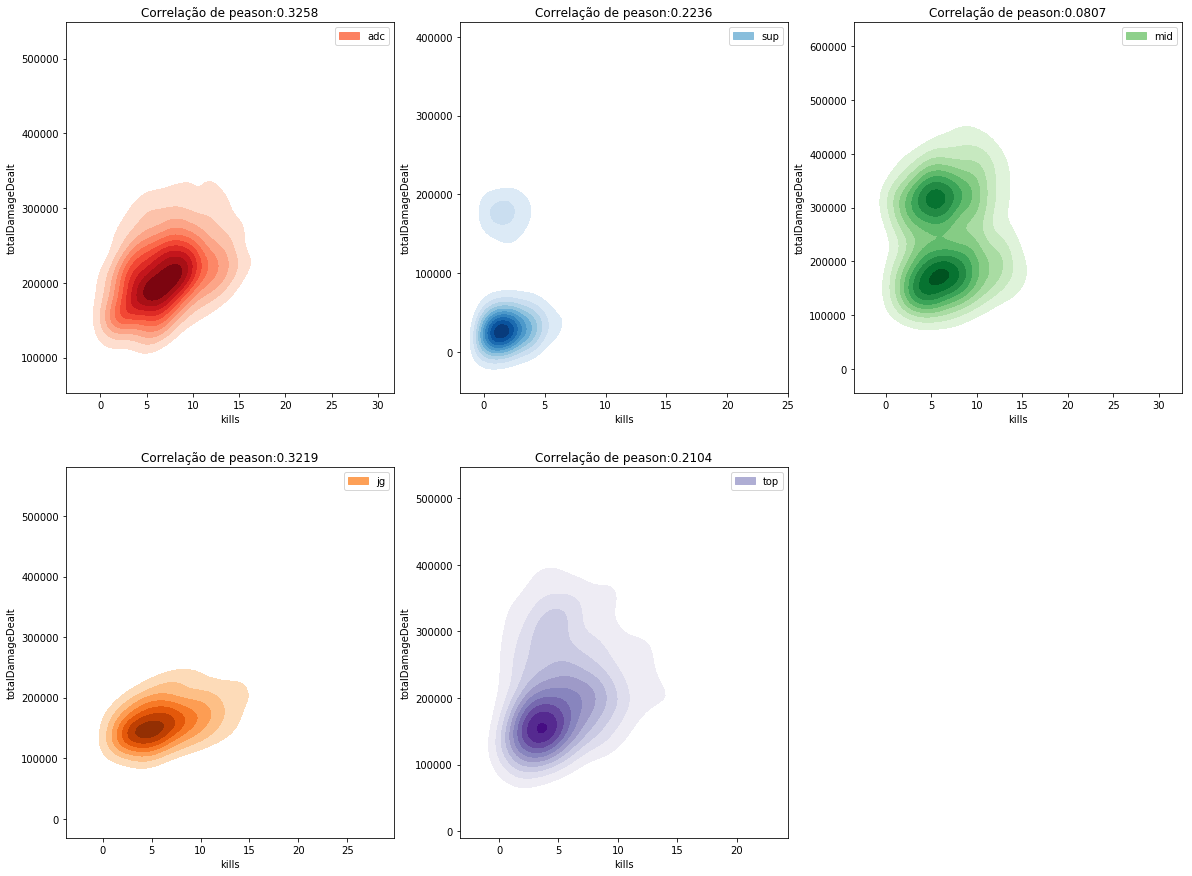

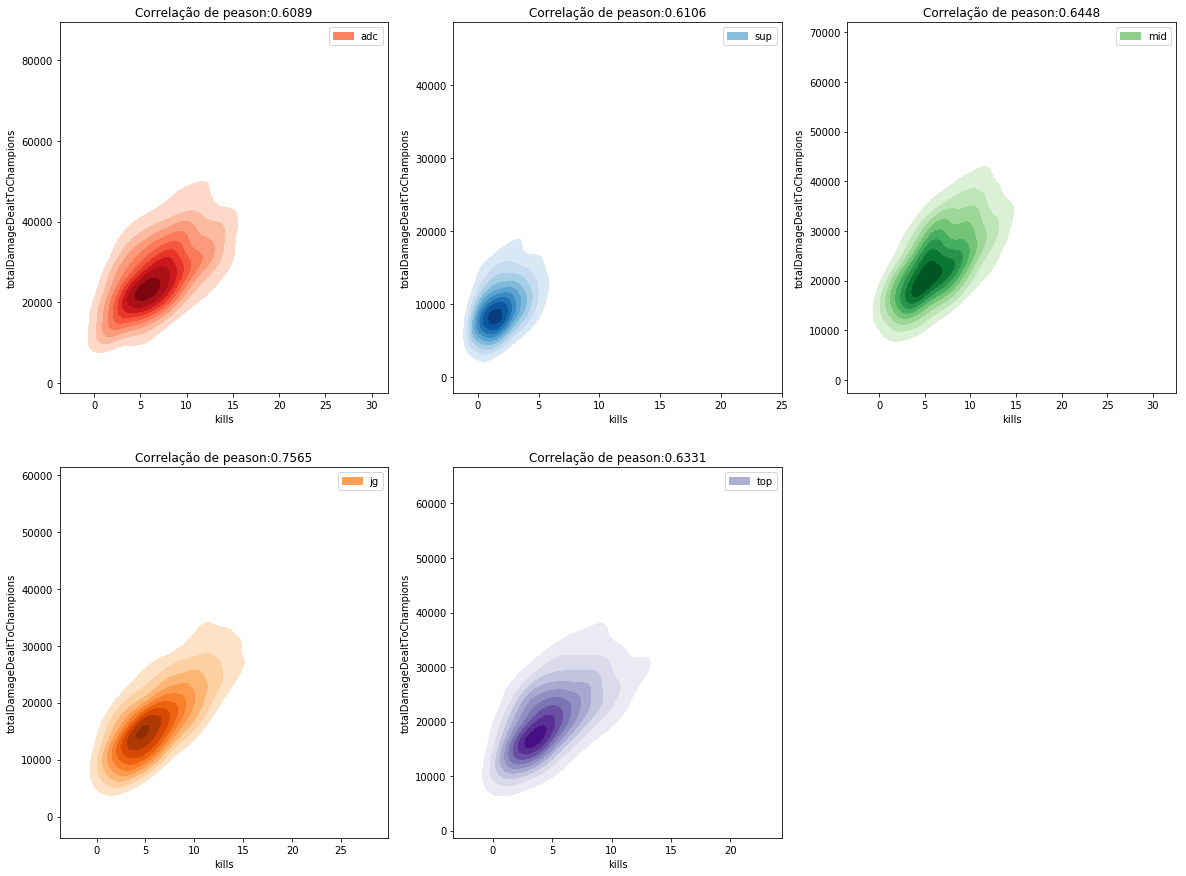

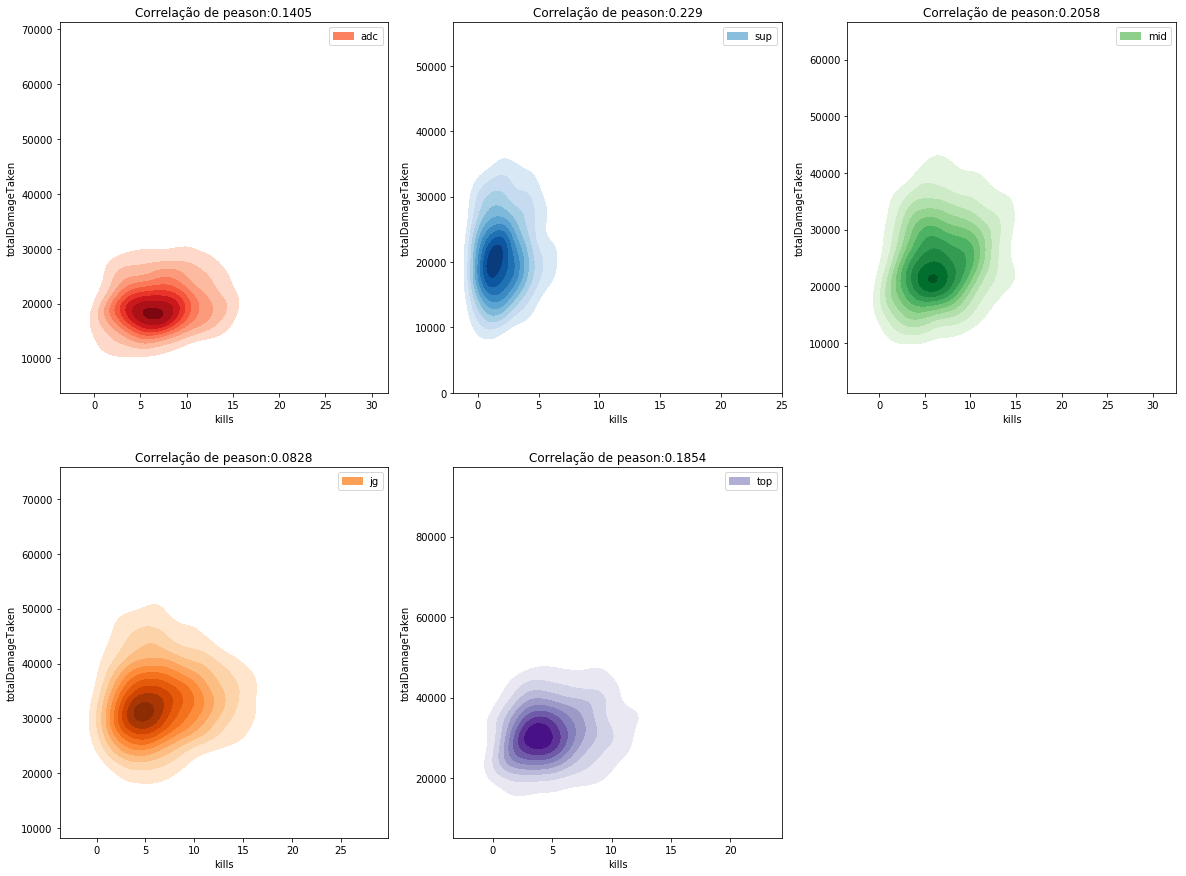

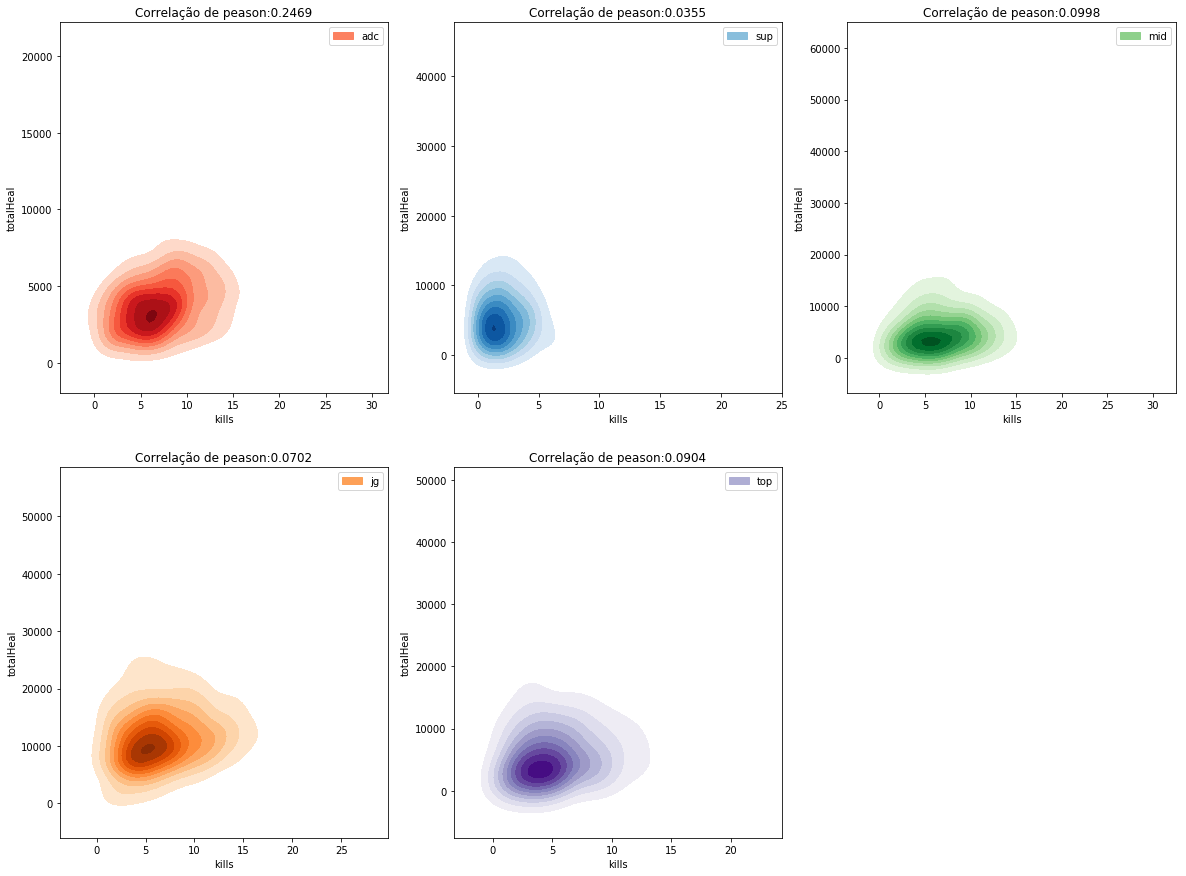

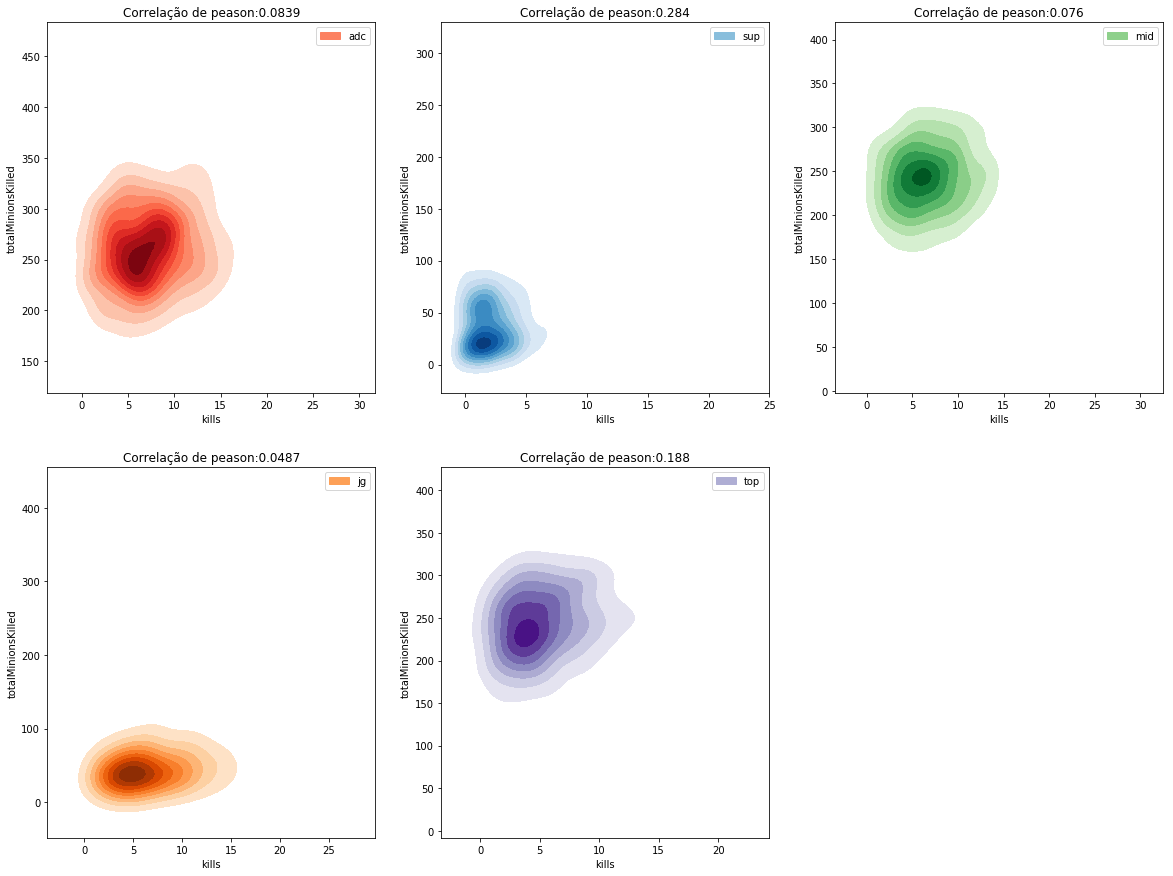

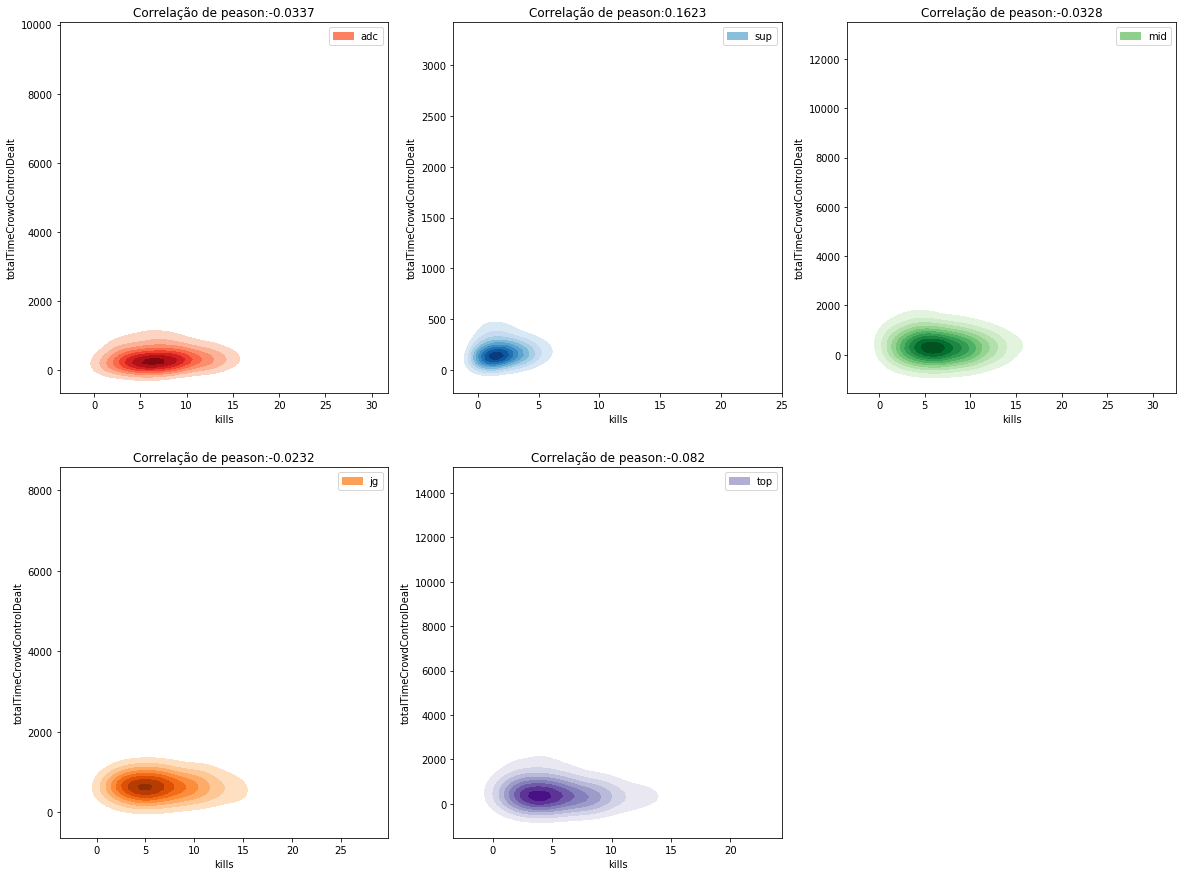

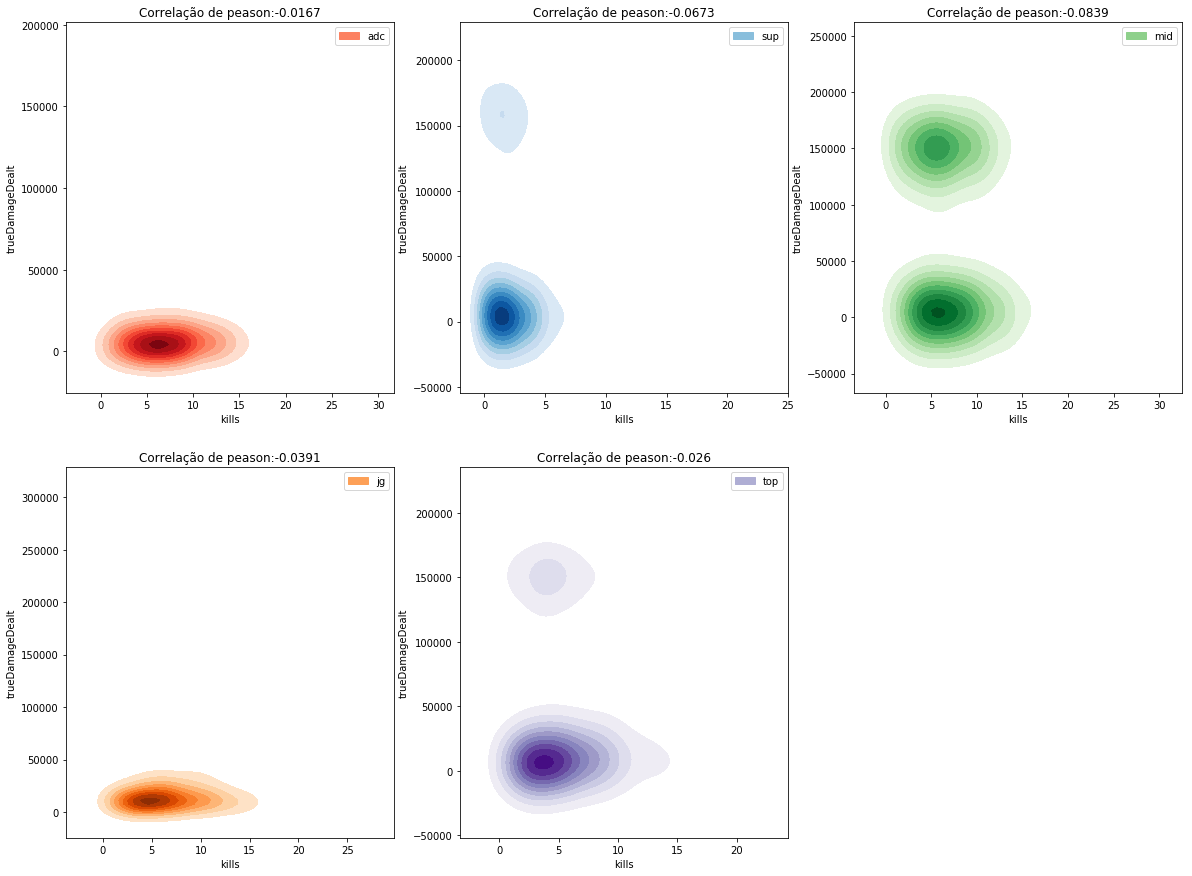

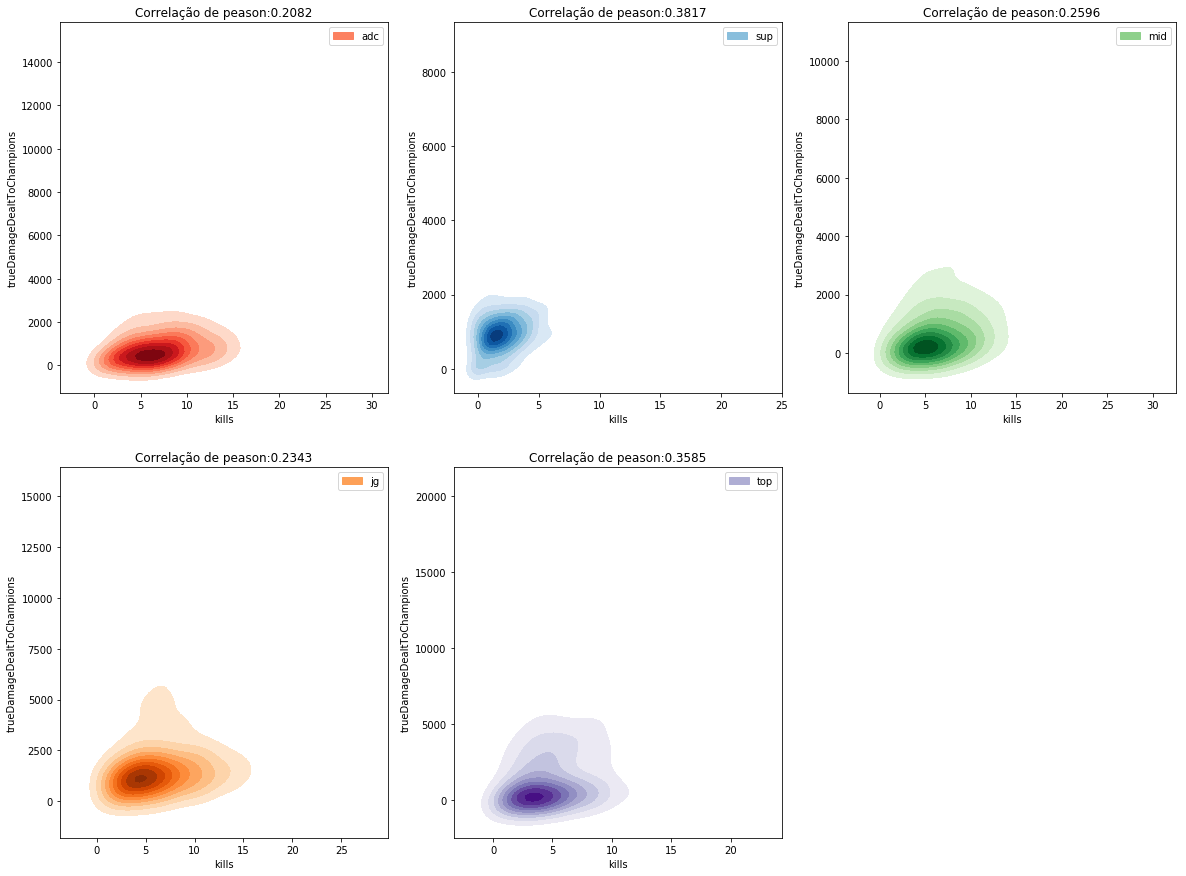

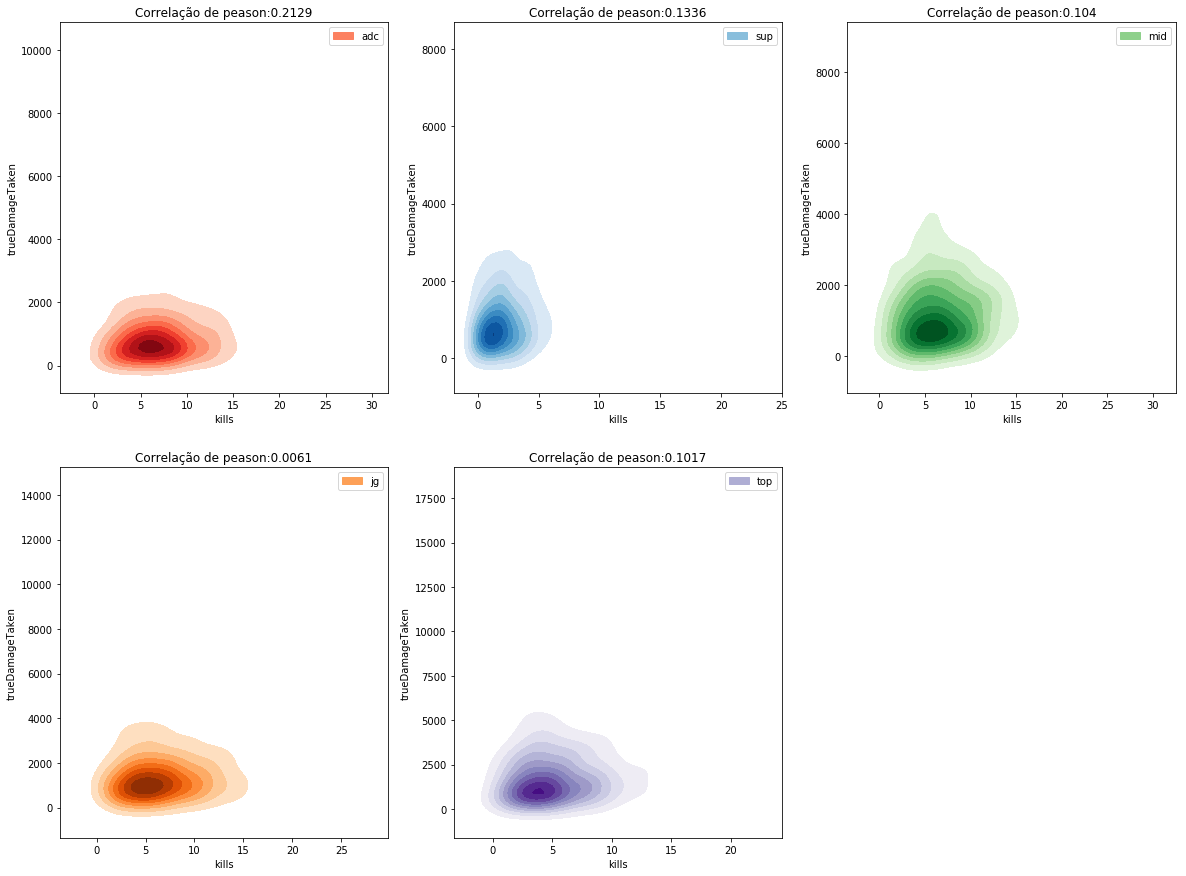

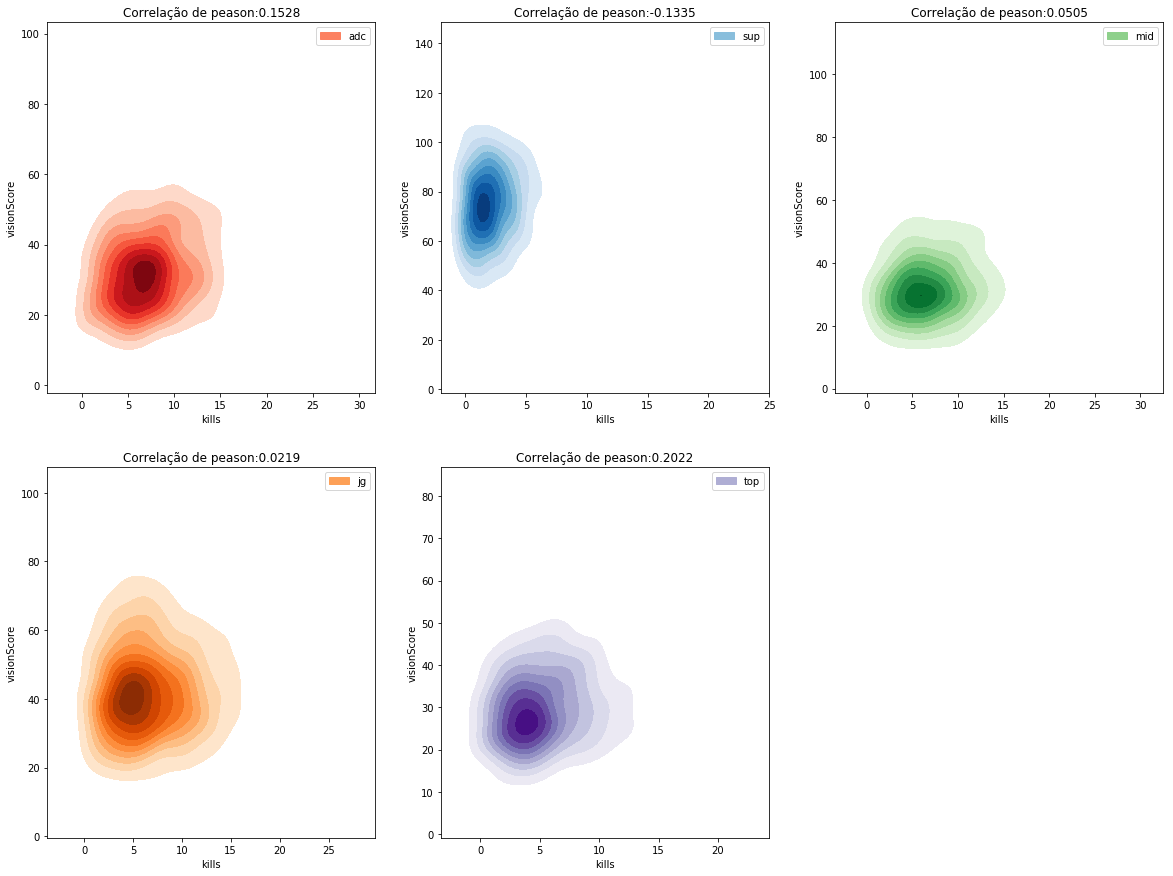

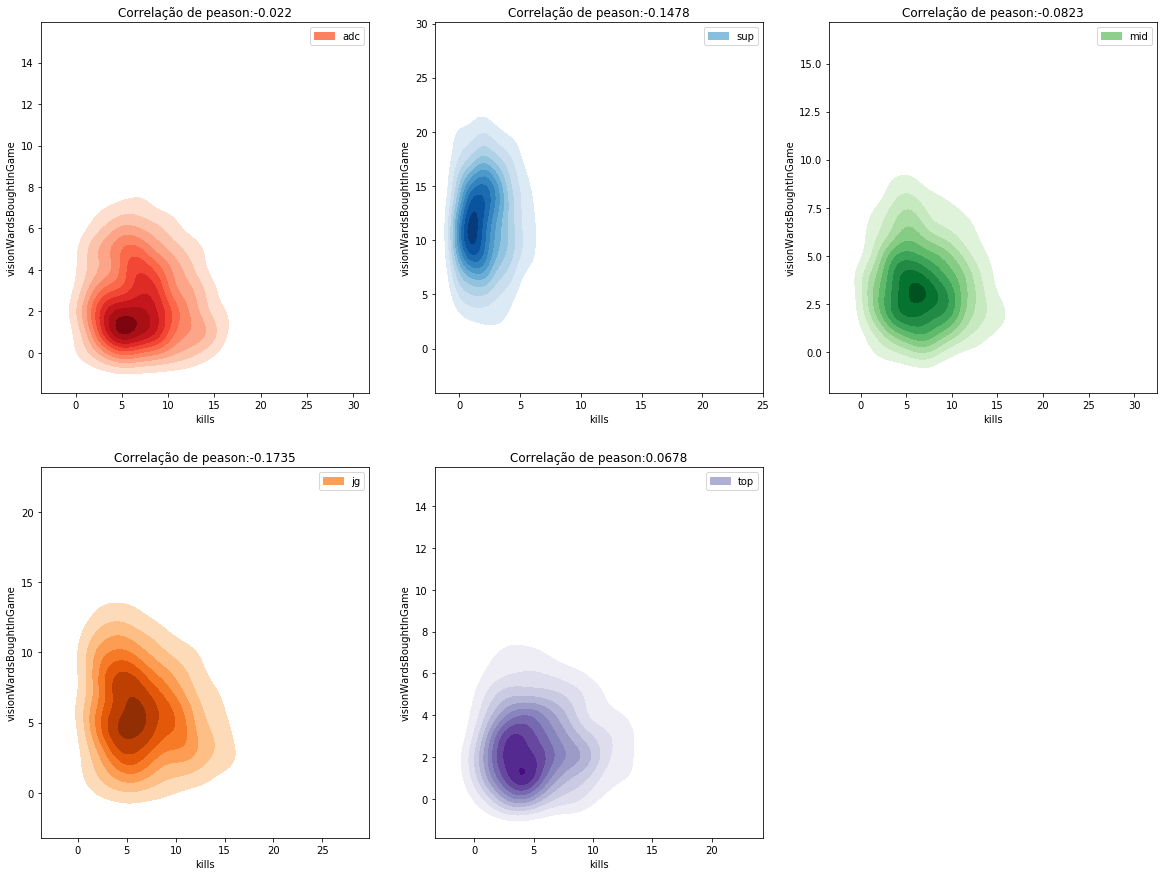

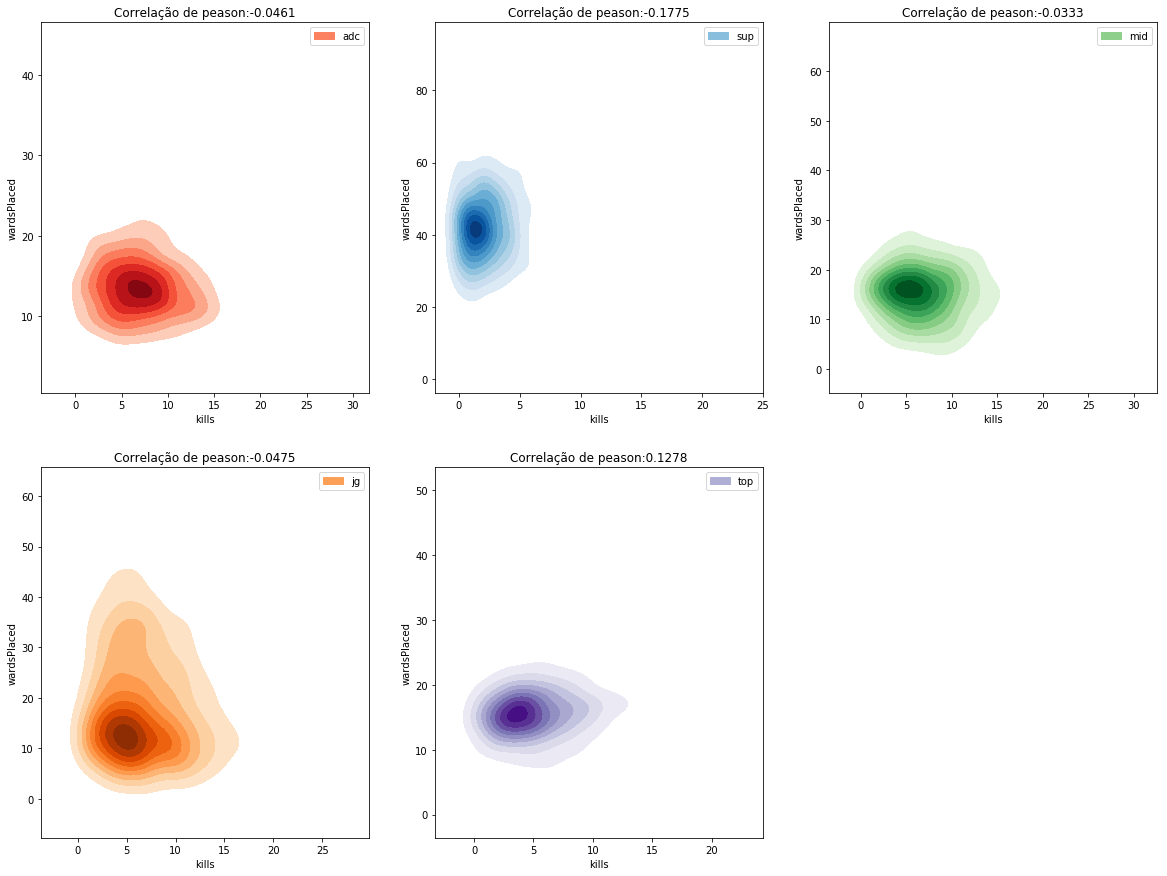

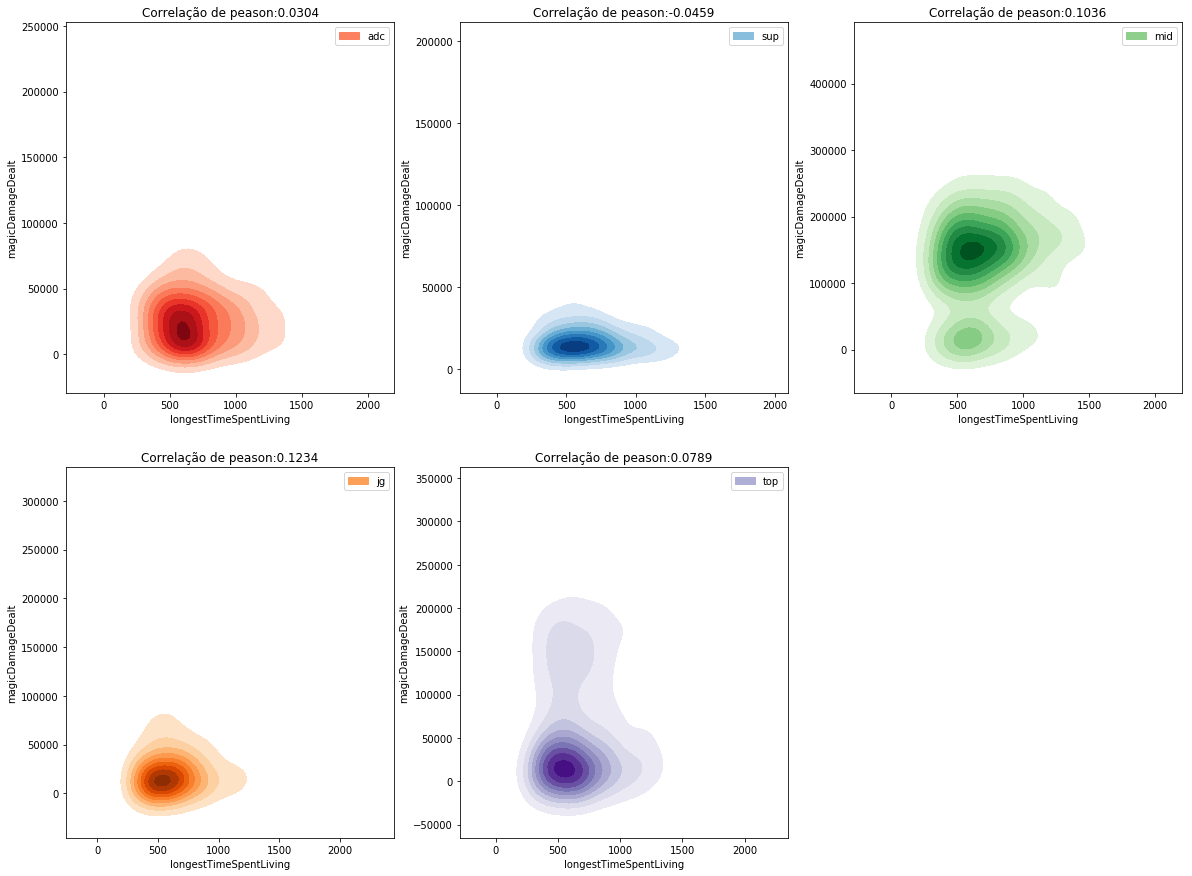

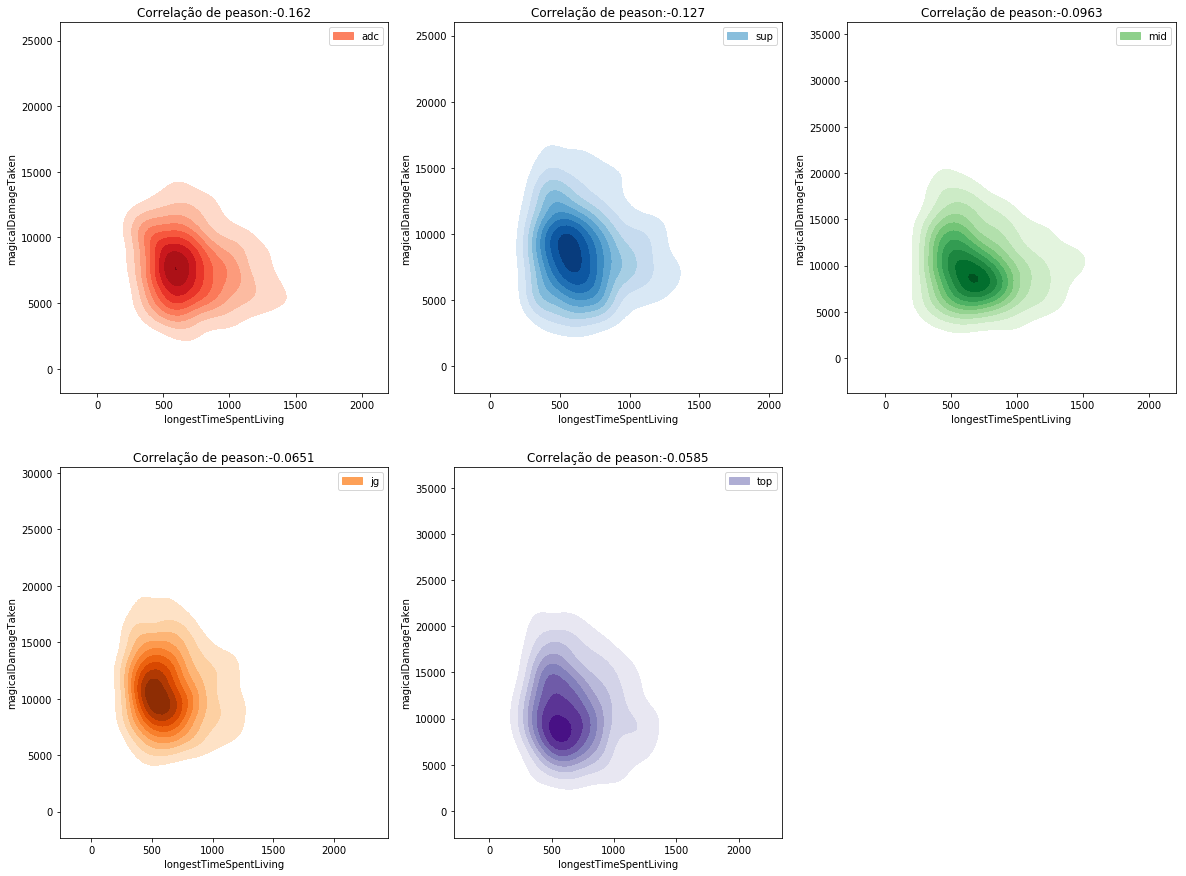

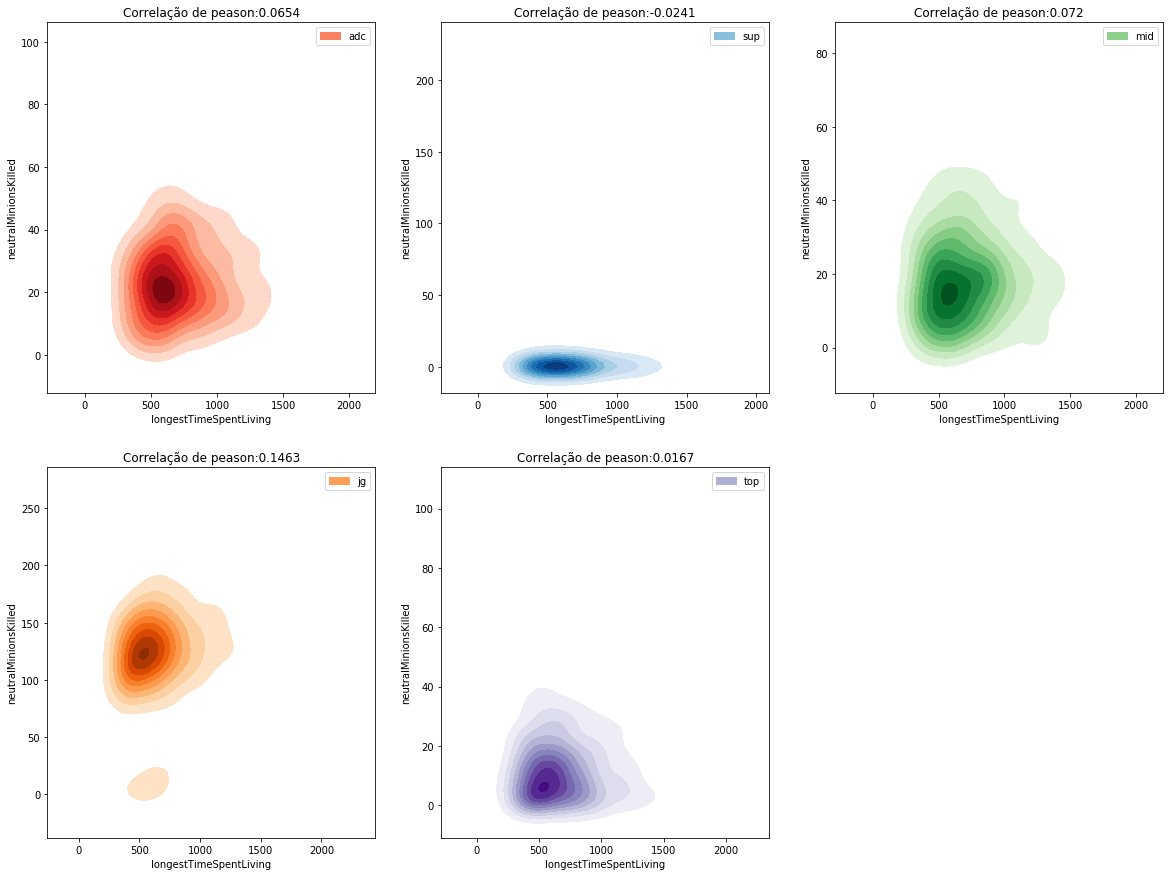

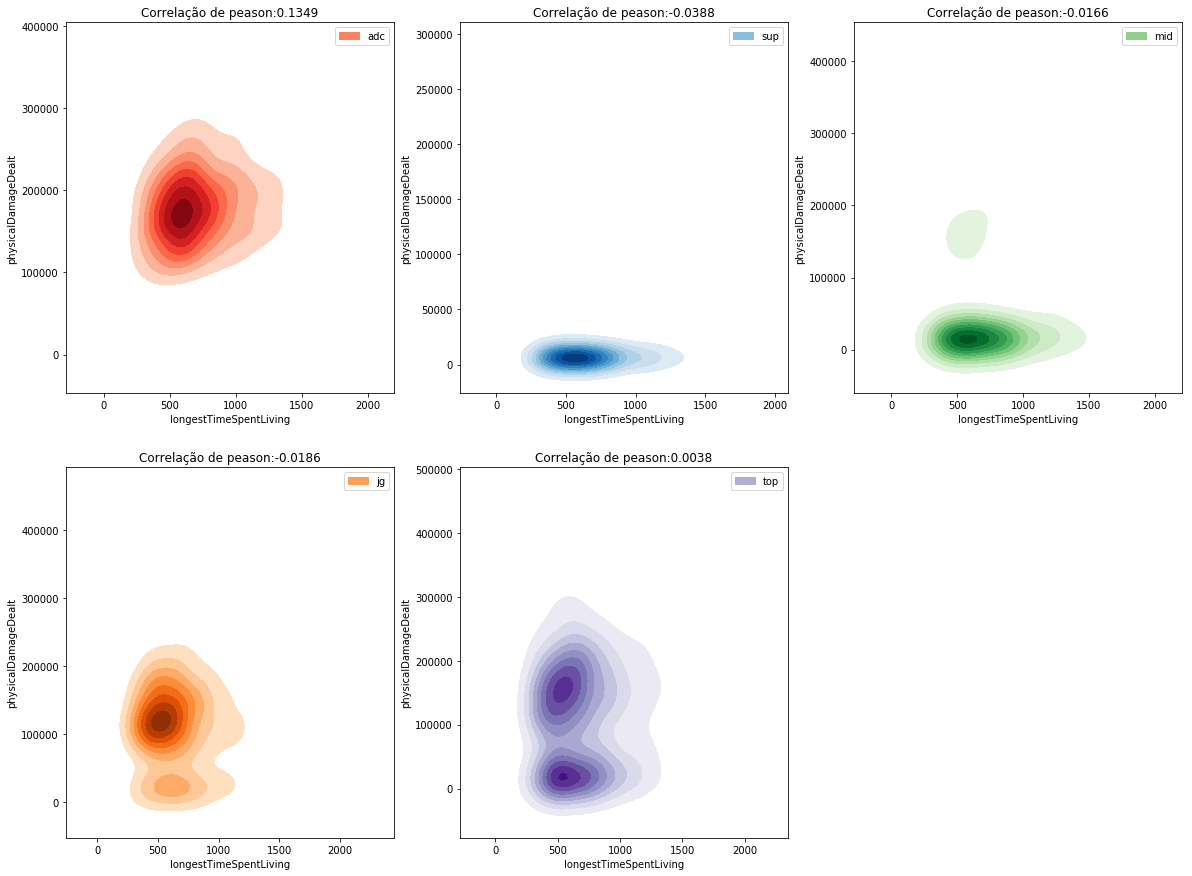

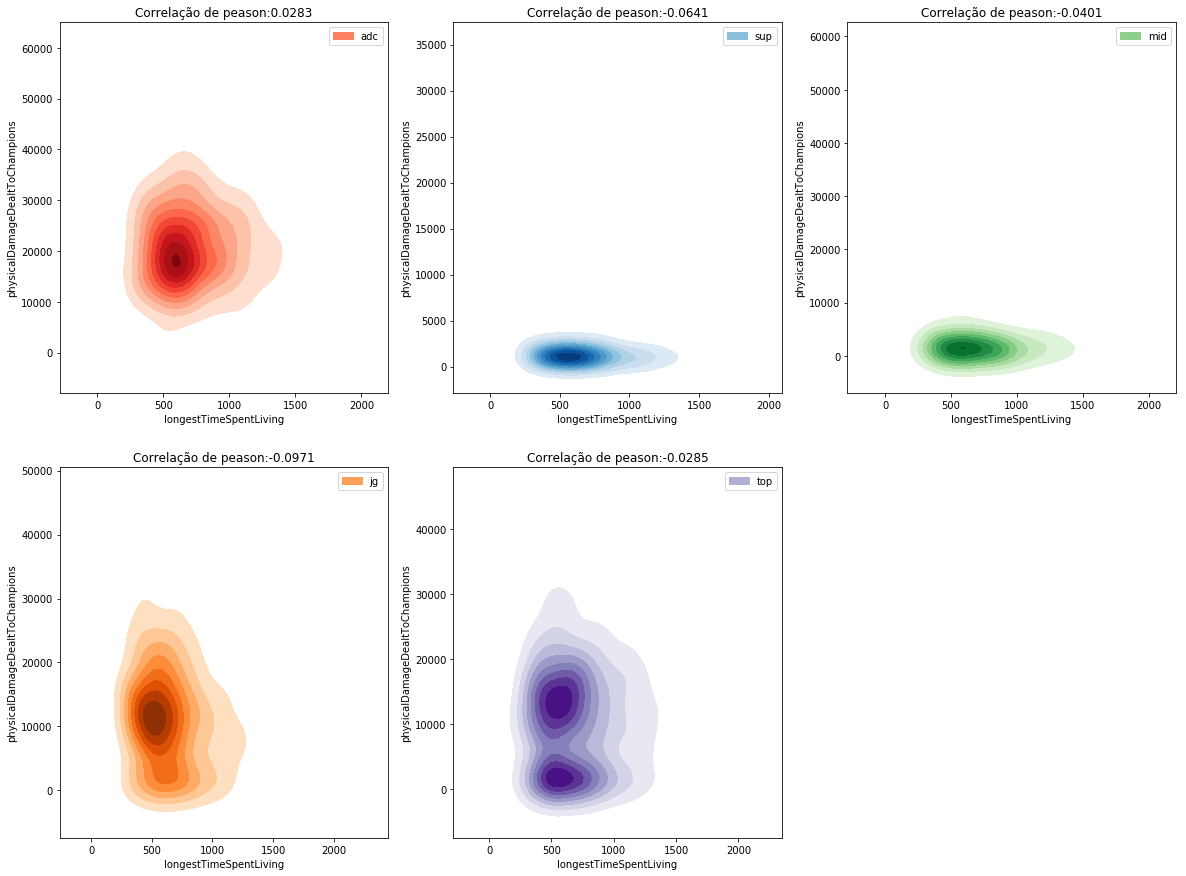

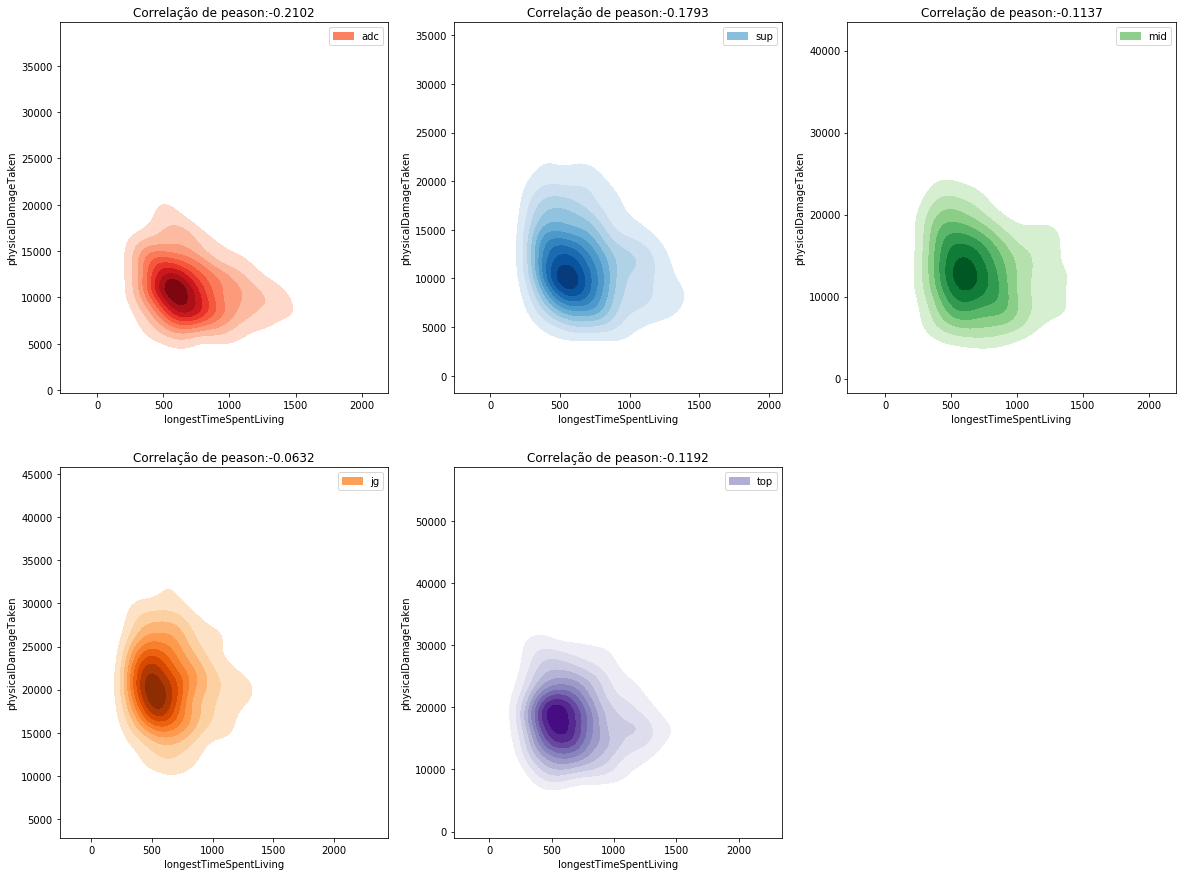

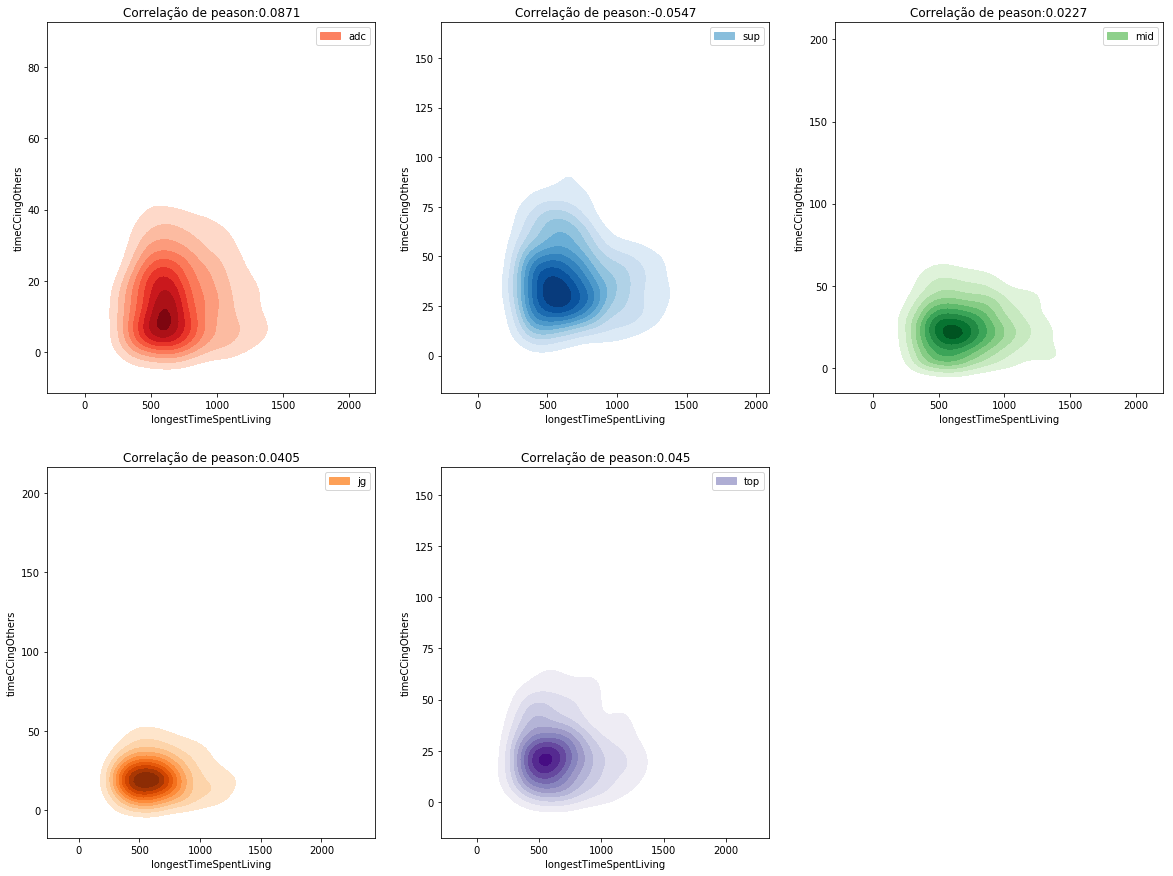

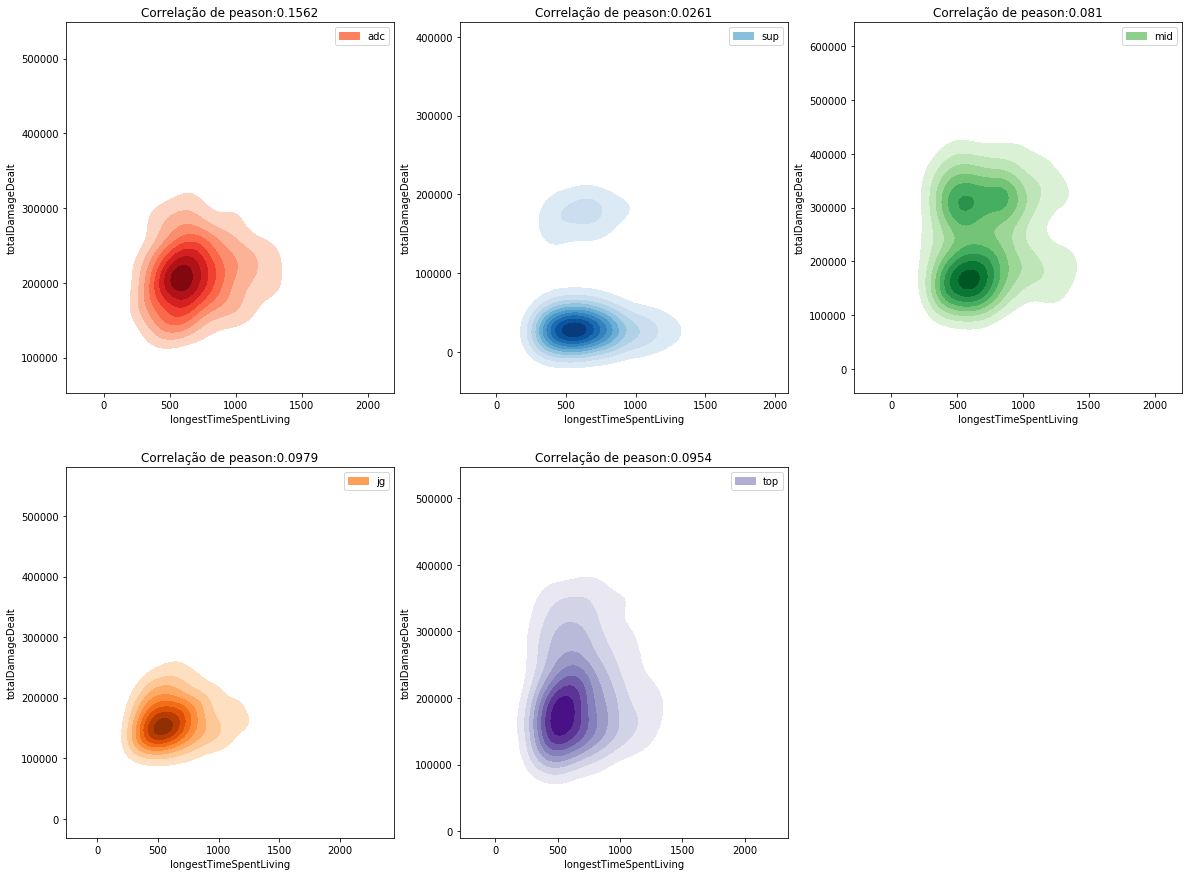

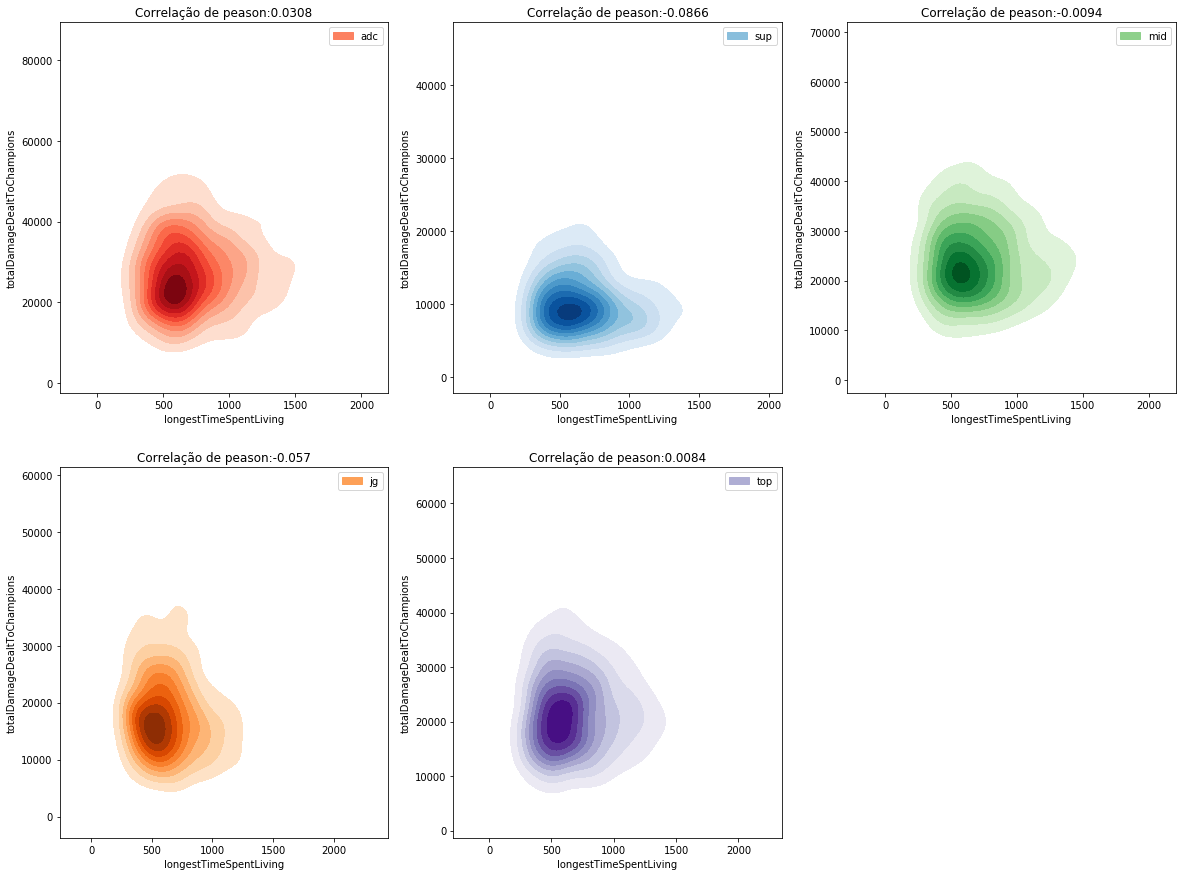

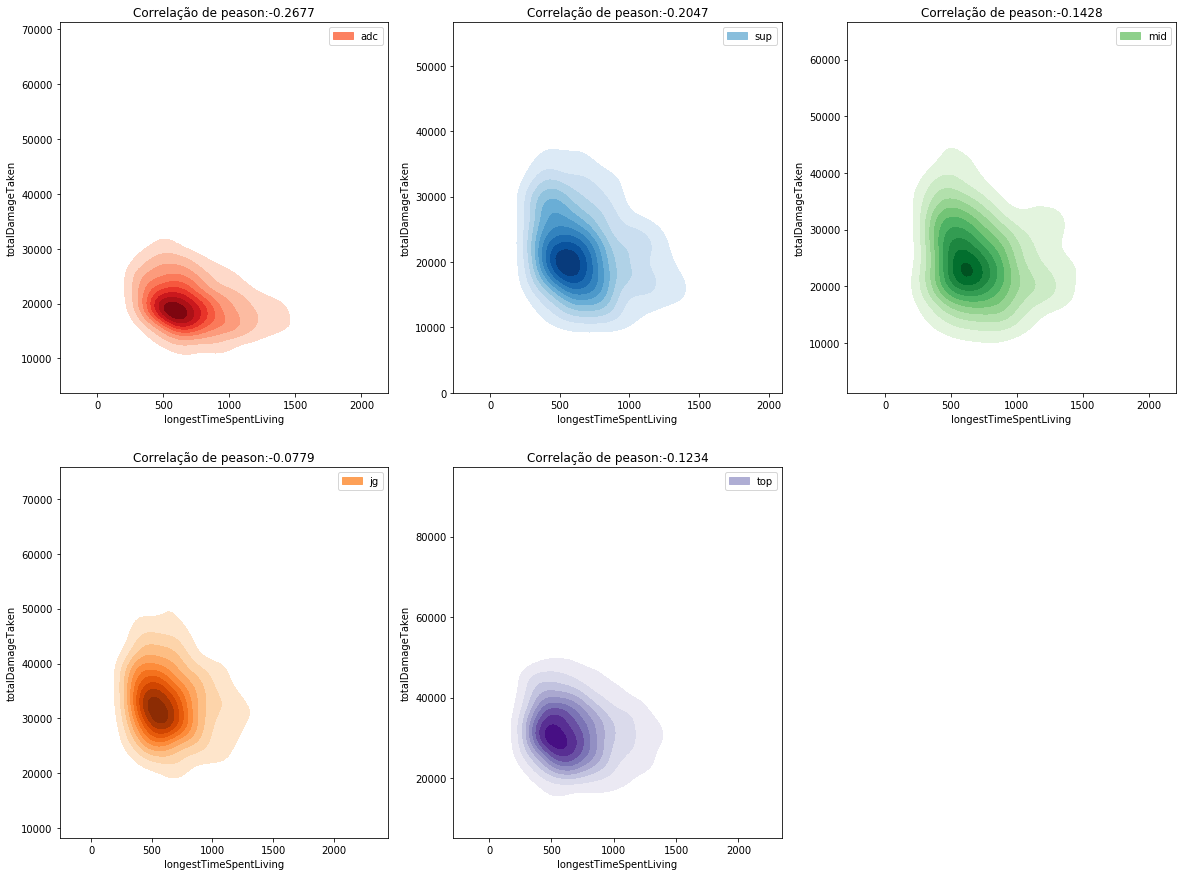

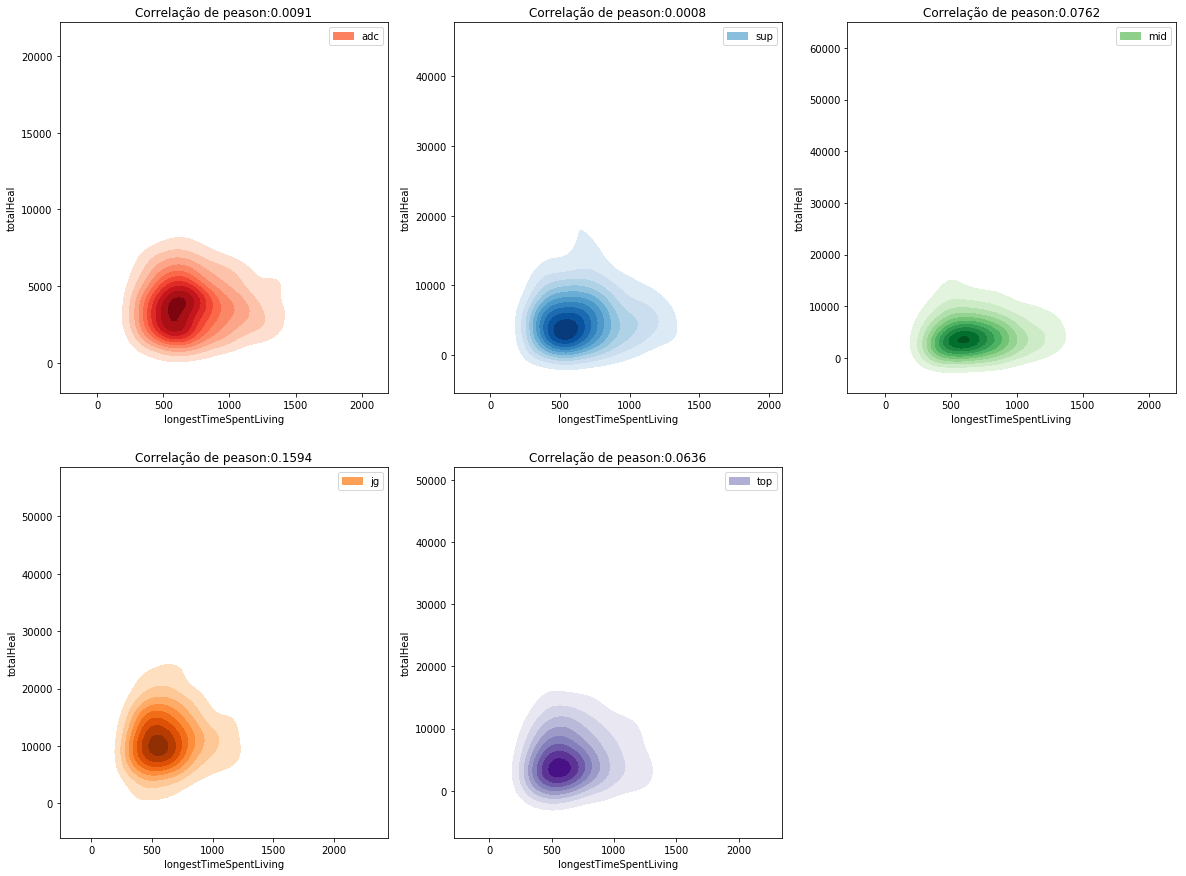

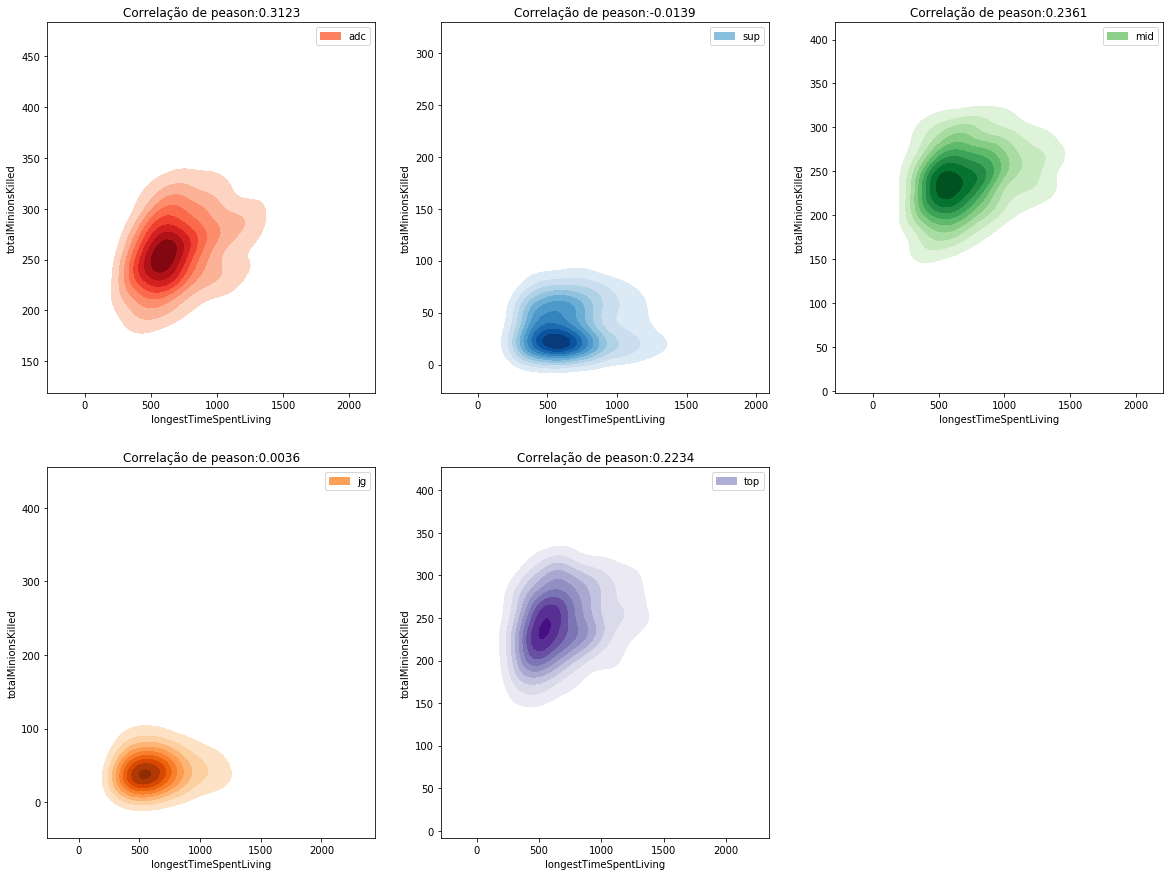

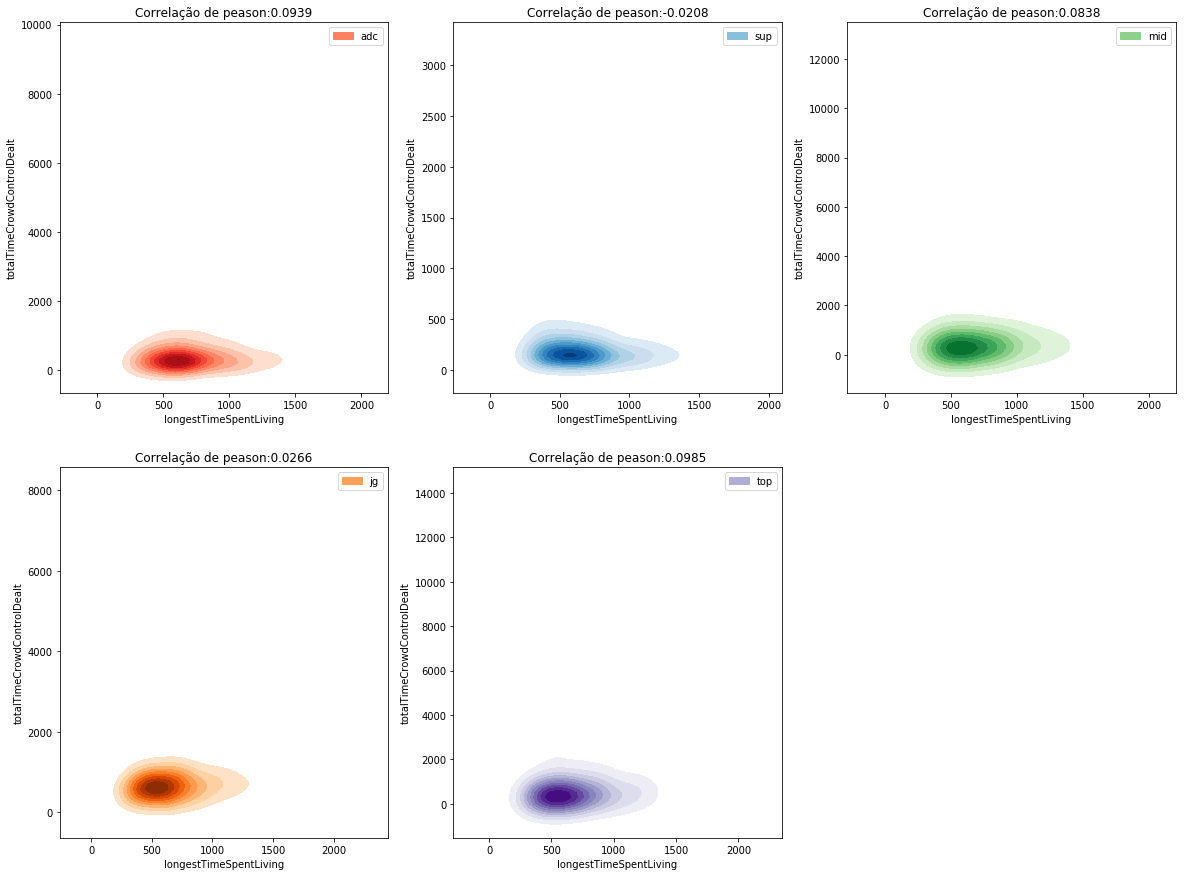

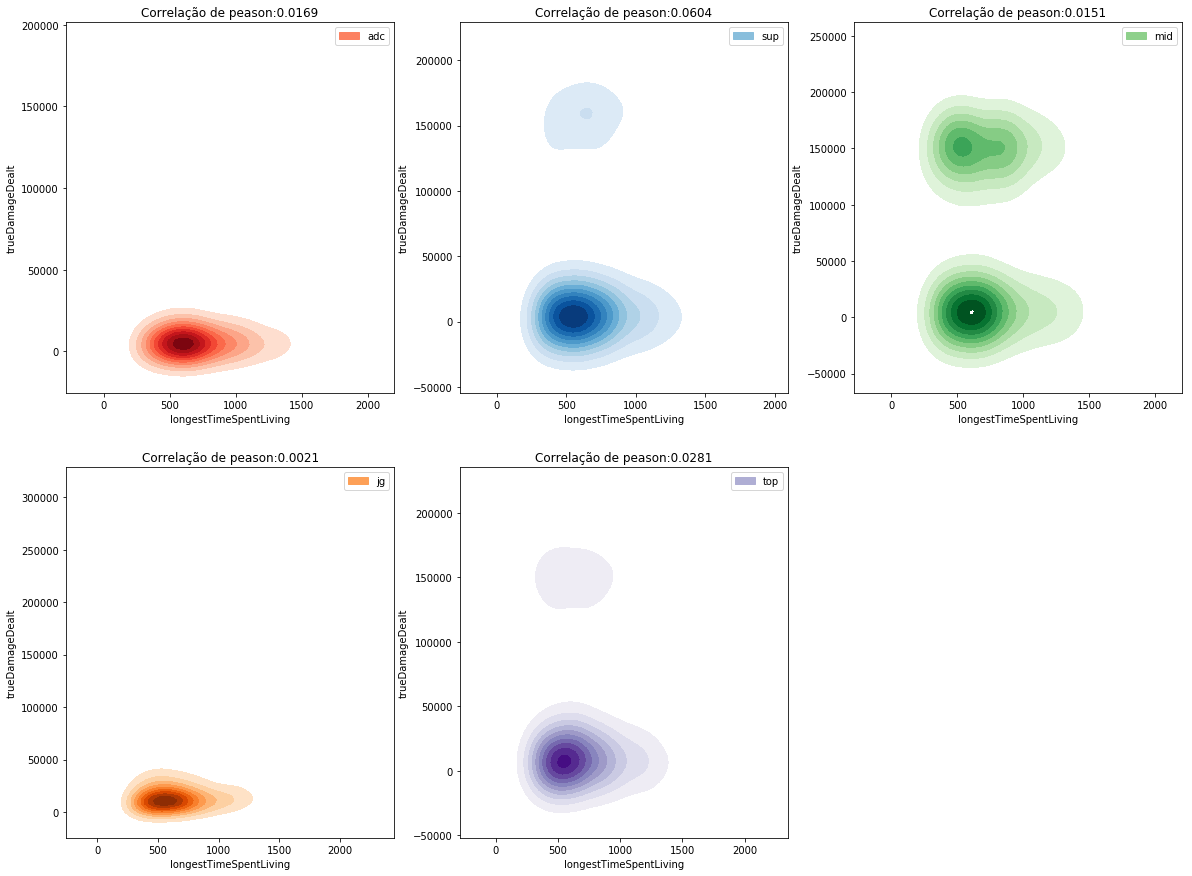

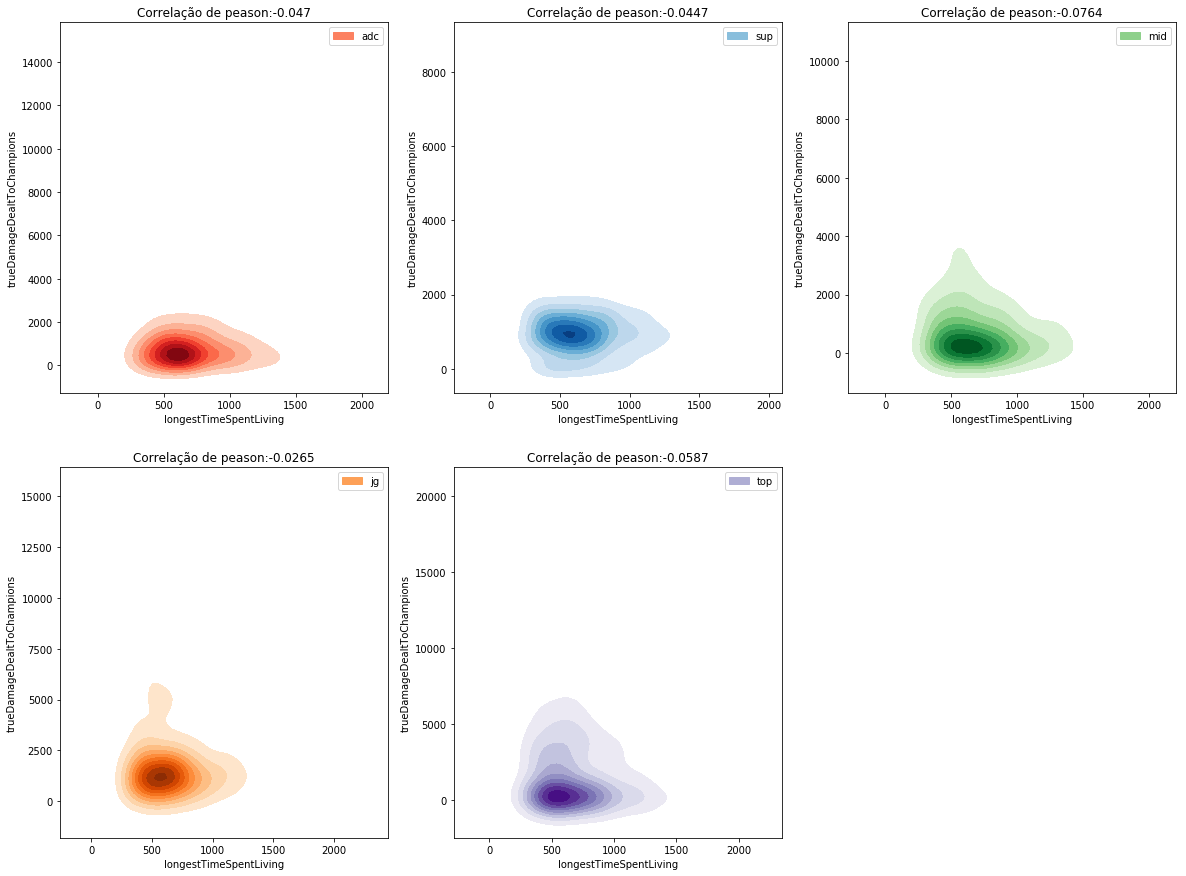

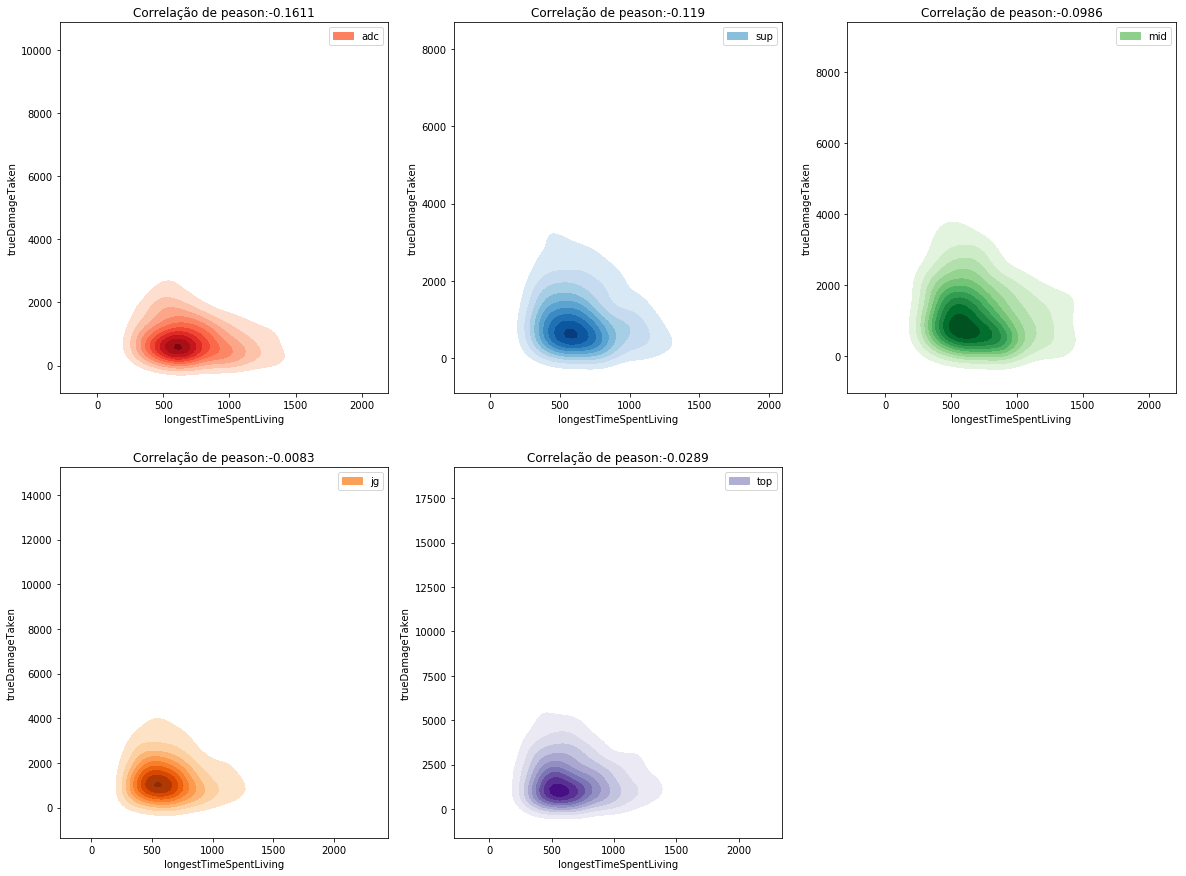

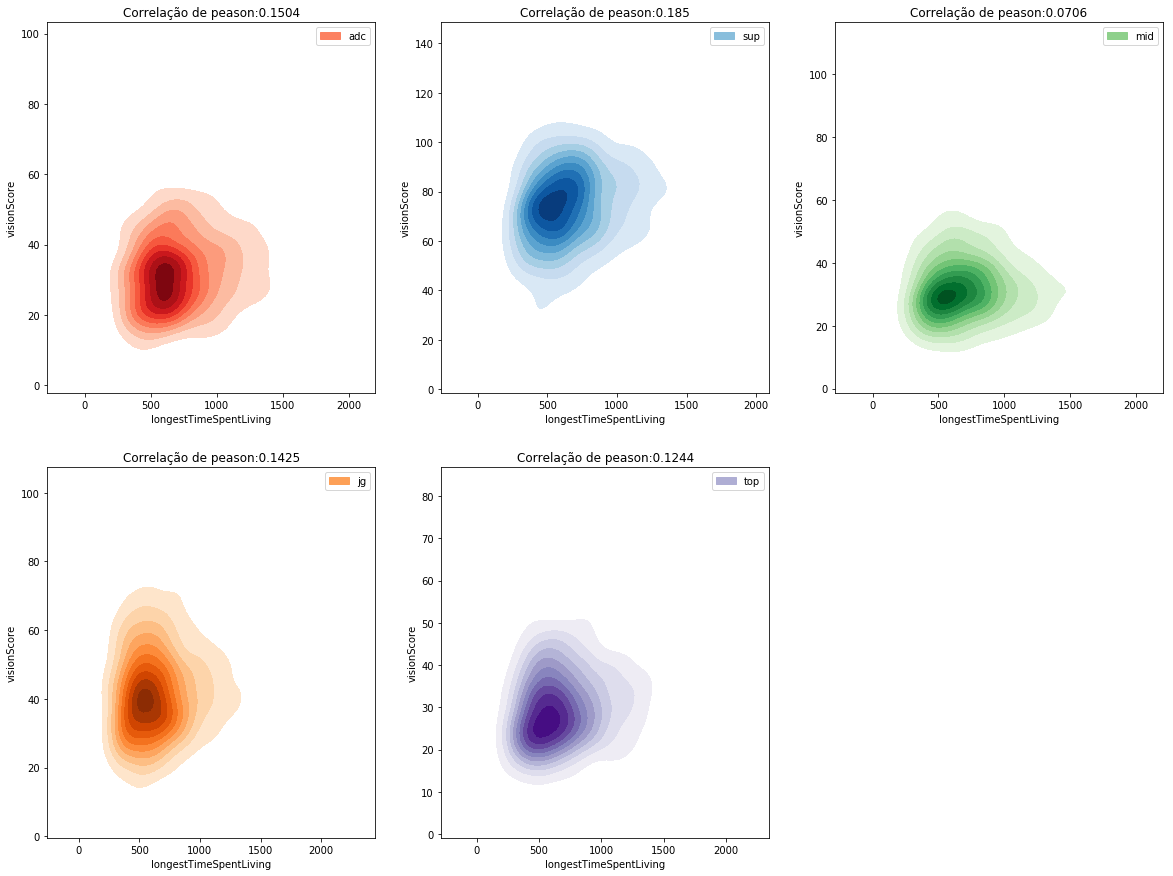

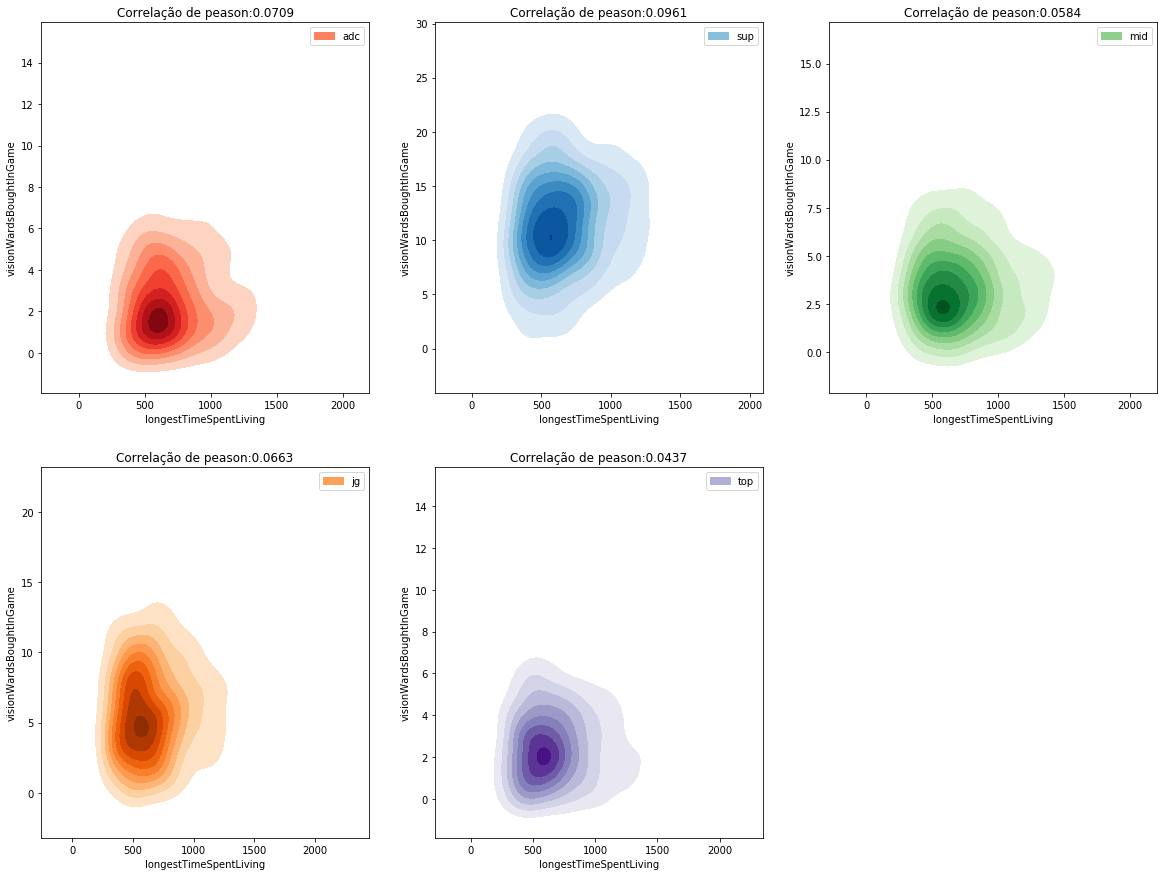

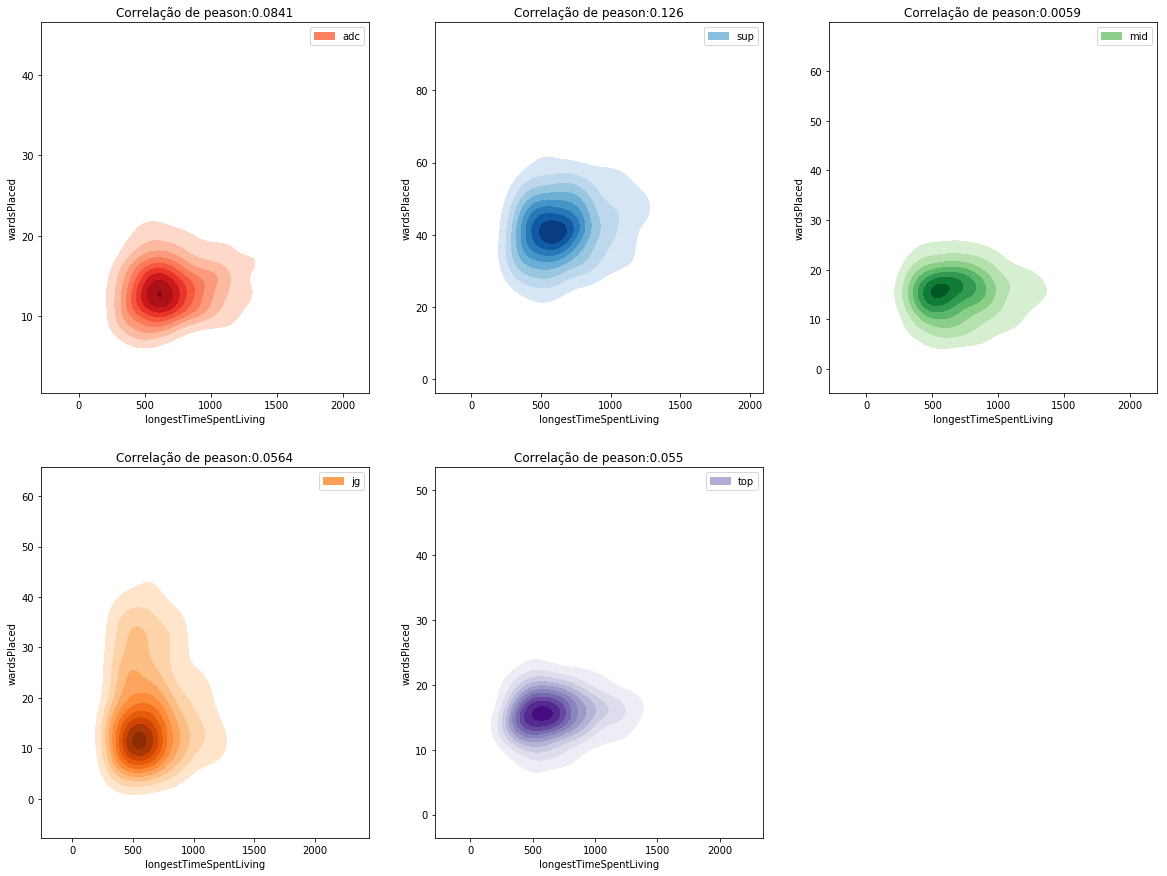

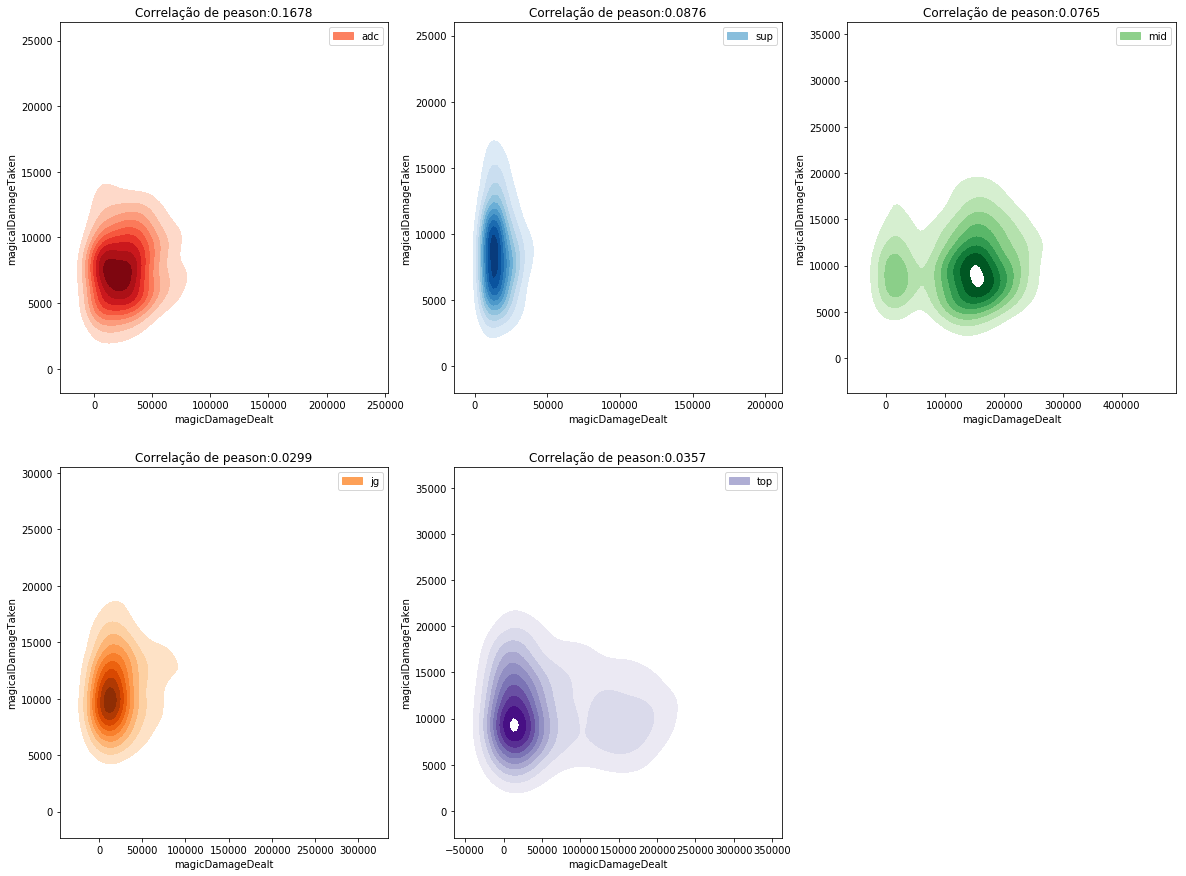

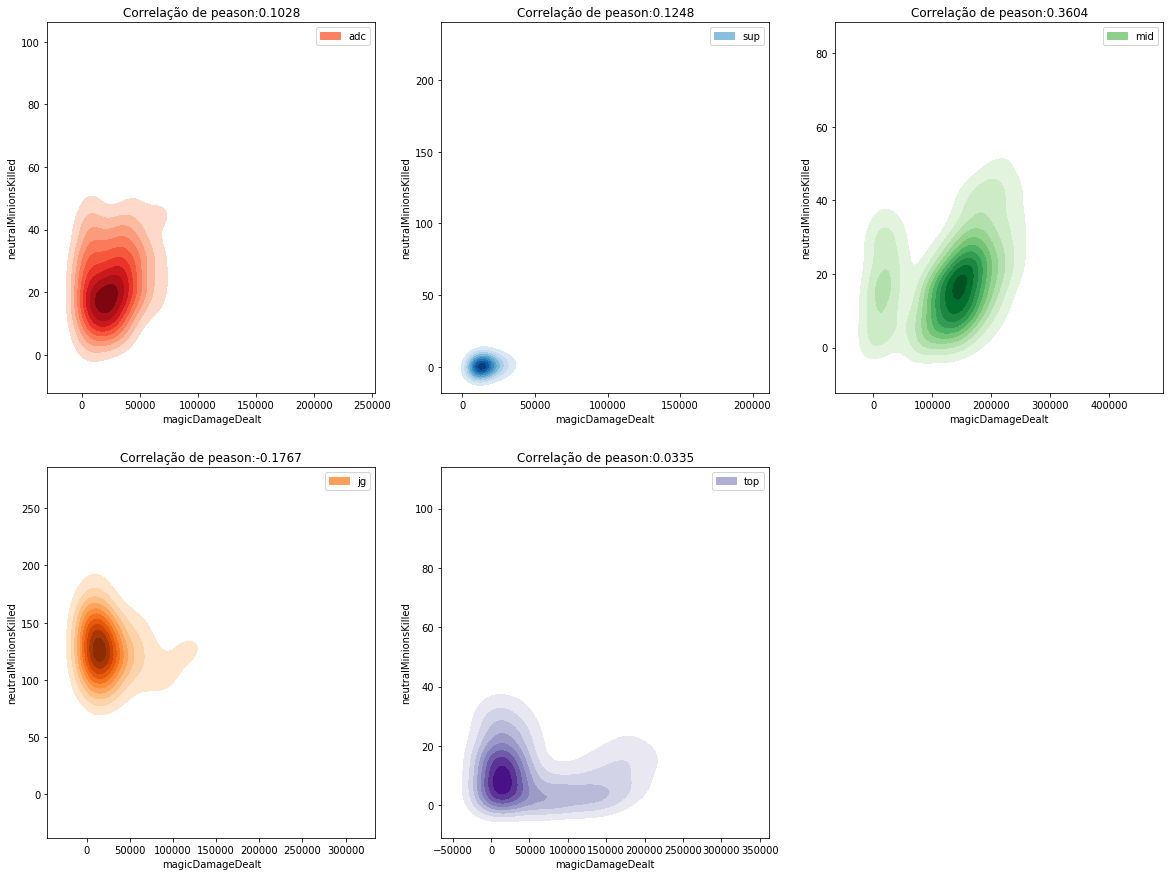

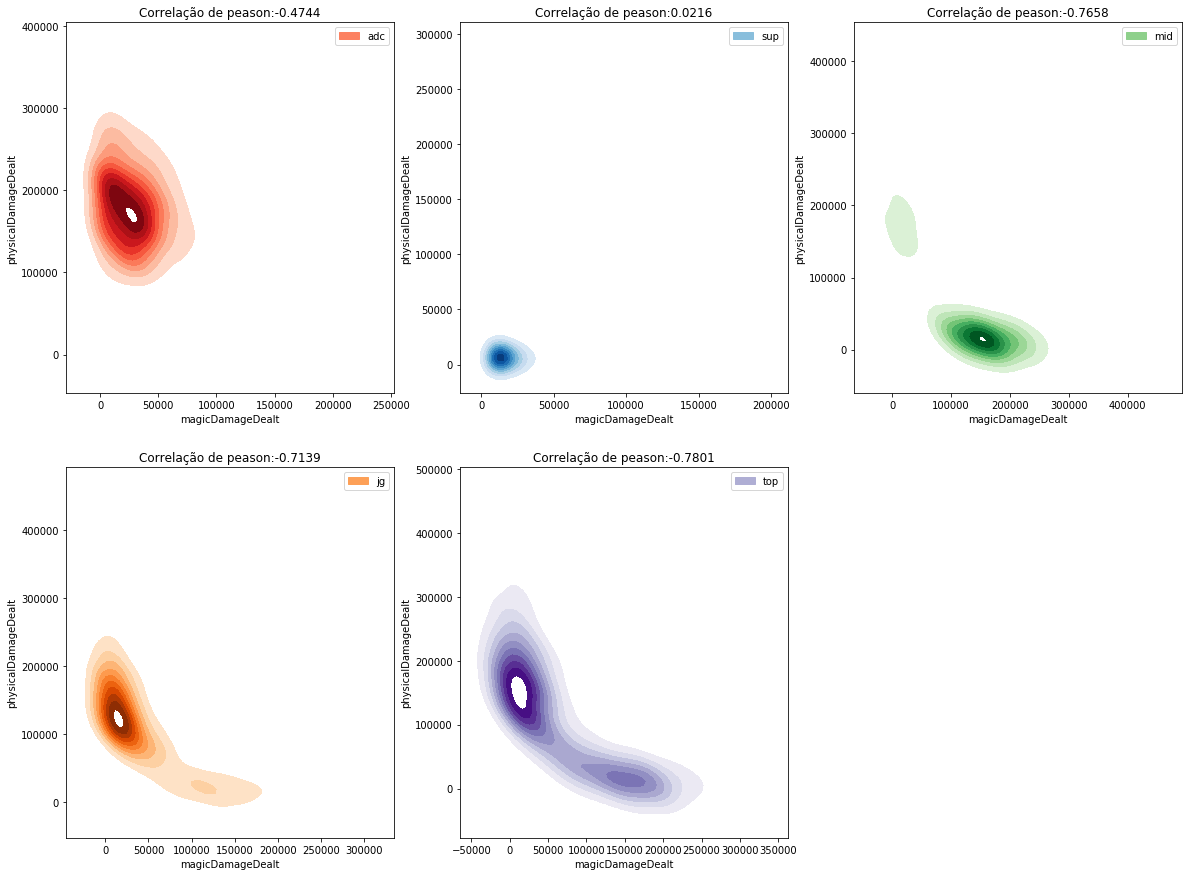

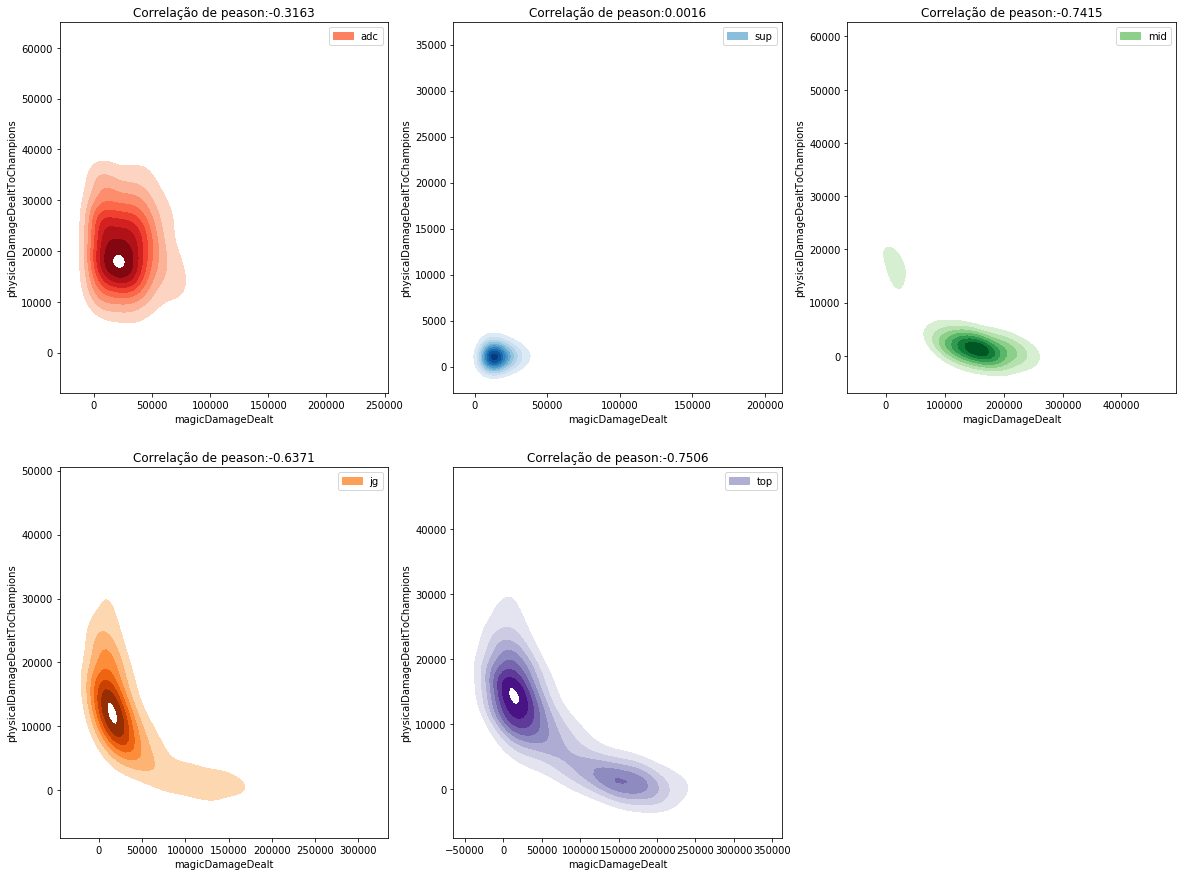

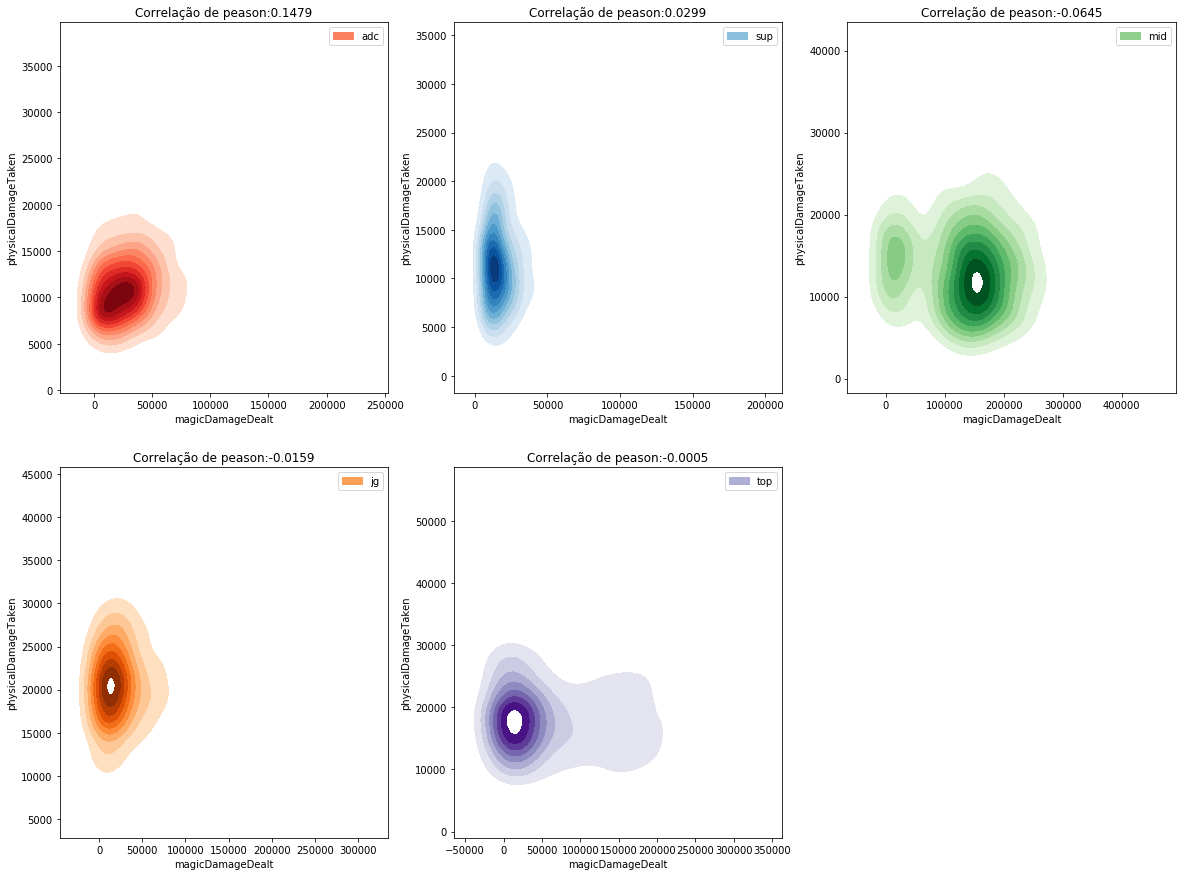

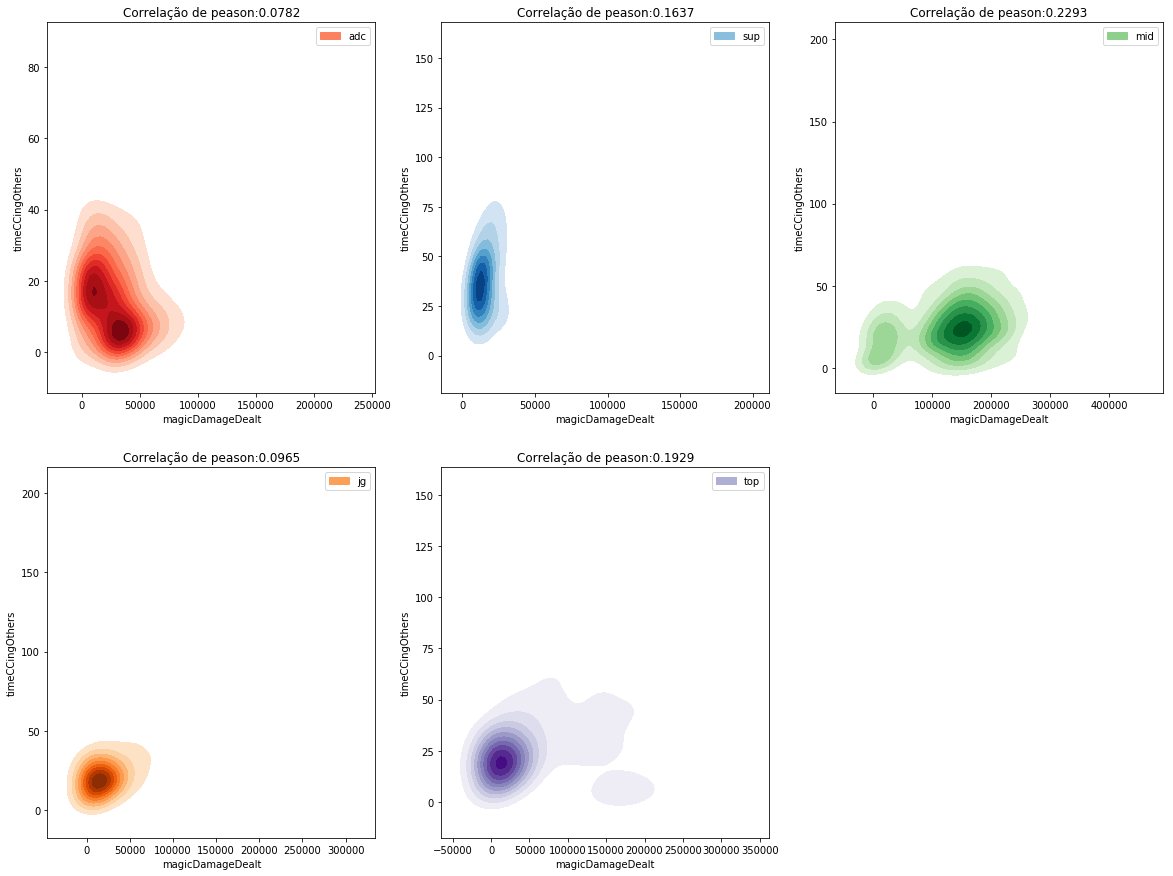

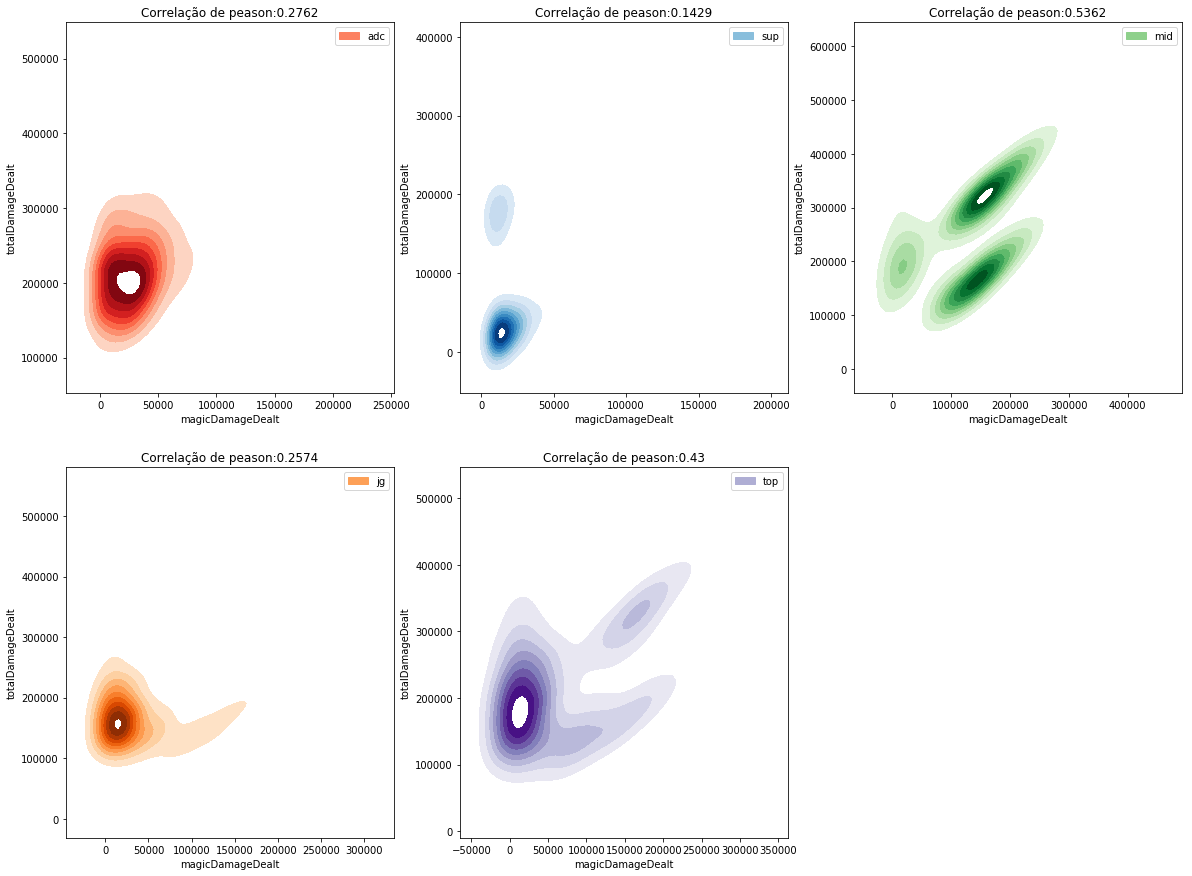

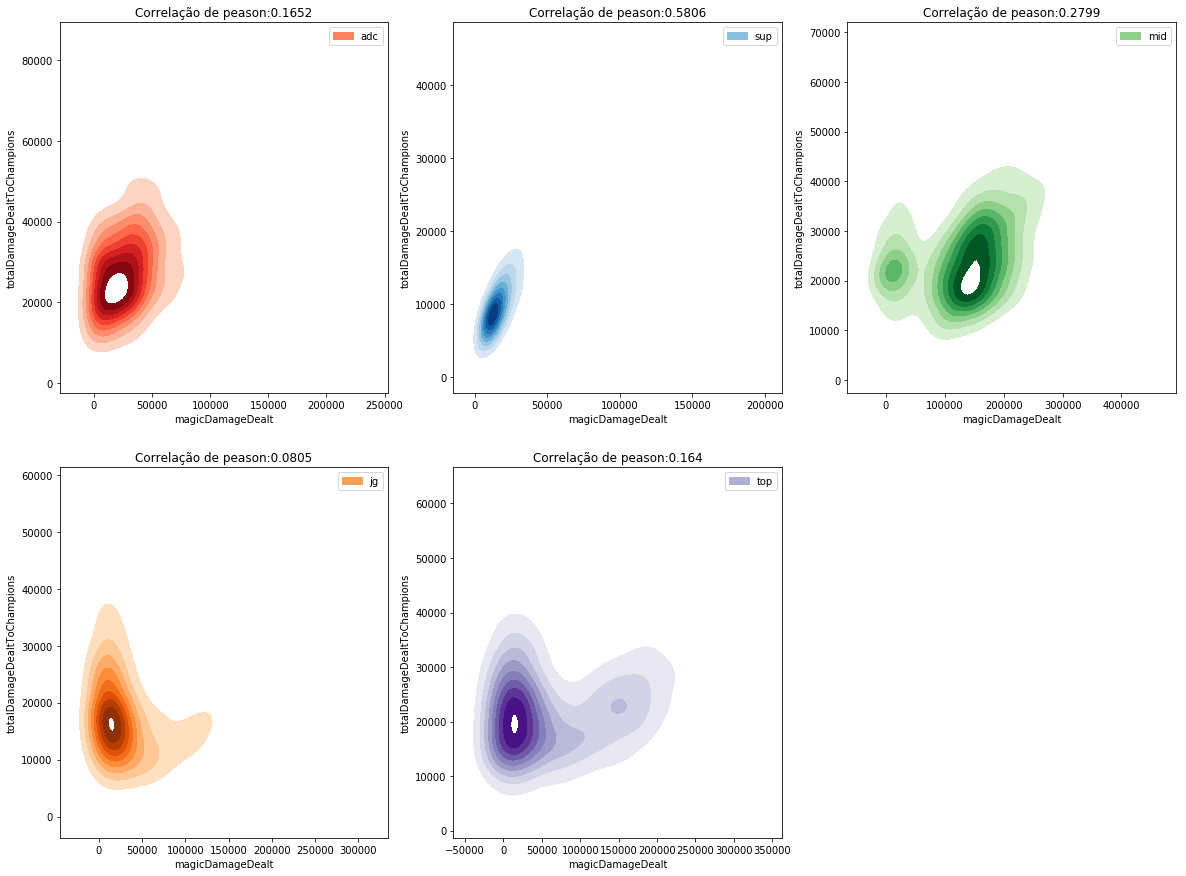

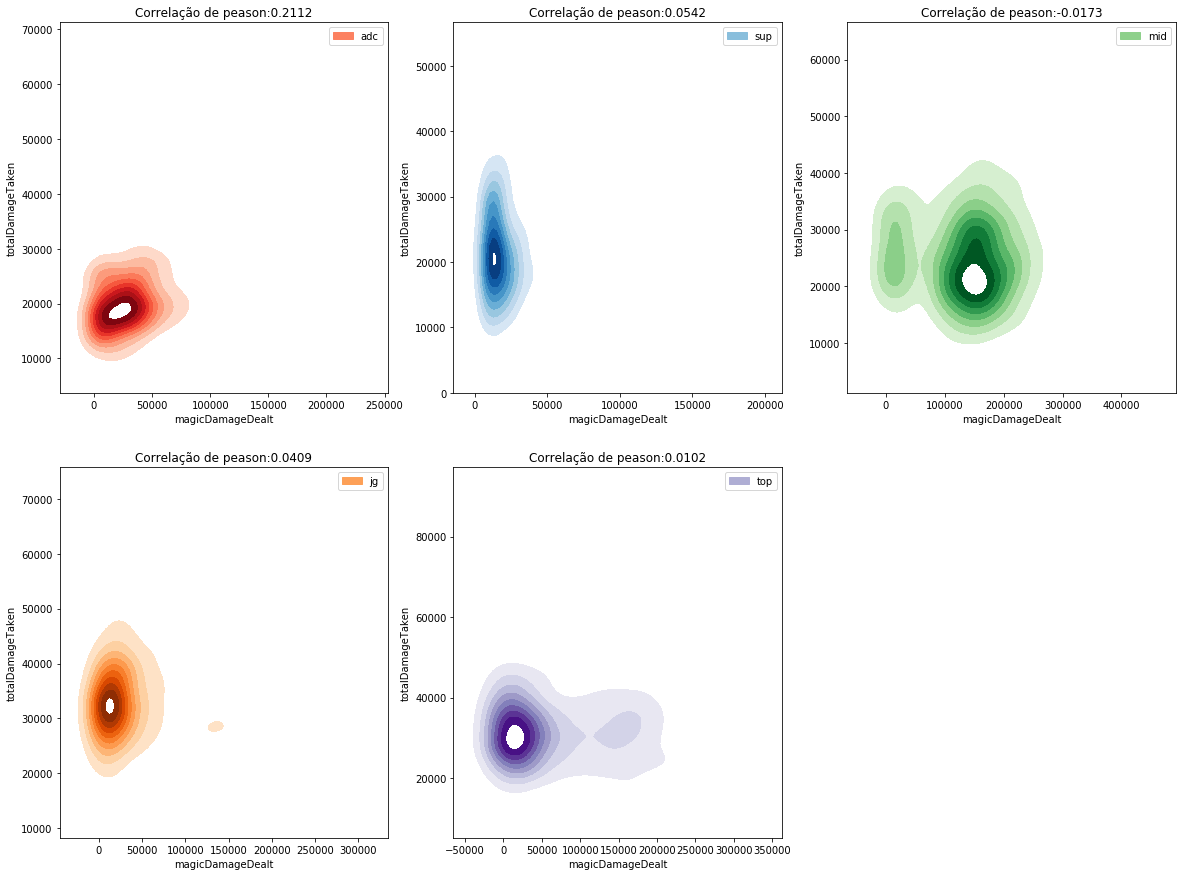

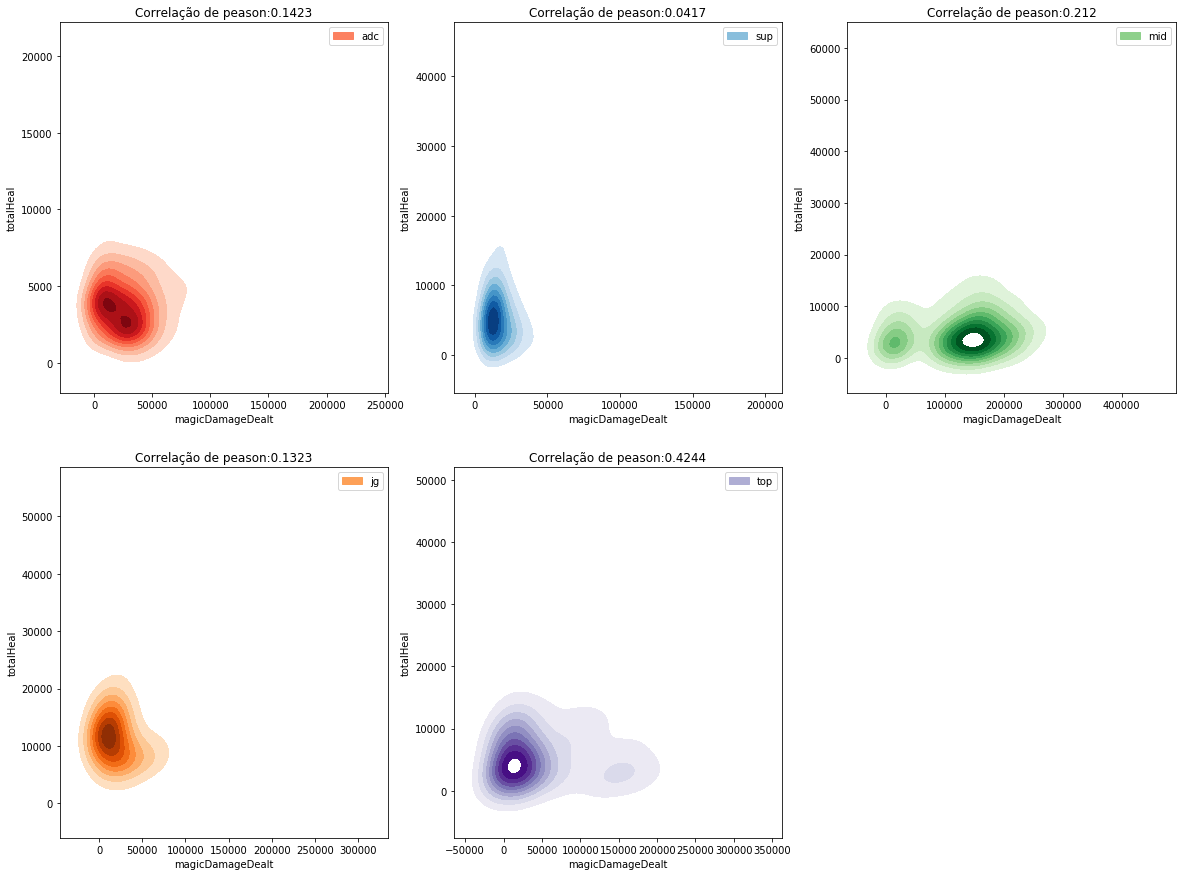

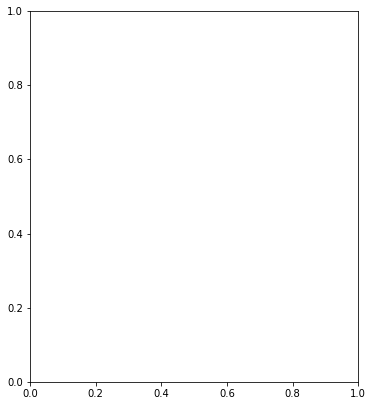

In [5]:
#salva imagens das correlações entre os atributos

for cont in range(0,len(const.atributos_numericos)):
    for cont2 in range(cont,len(const.atributos_numericos)):
        if(cont!=cont2):
            fig=plt.figure(figsize=(20,15))
            cont3=1
            for dataframe,rota_label,rota_cmap in zip(rotas_dataframe_array,const.rotas_names,const.rotas_cmaps):
                ax=fig.add_subplot(2,3,cont3)
                x=dataframe[const.atributos_numericos[cont]]
                y=dataframe[const.atributos_numericos[cont2]]
                correlacao=round(np.corrcoef(x,y)[0][1],4)
                ax=sb.kdeplot(x,y,shade=True,shade_lowest=False,cmap=rota_cmap,ax=ax)
                ax.set_title("Correlação de peason:{0}".format(correlacao))
                patch = mpatches.Patch(color=sb.color_palette(rota_cmap)[2], label=rota_label)
                ax.legend(handles=[patch])
                cont3=cont3+1
            fig.savefig(file_correlation+"correlacao_{0}_{1}".format(atributos_numericos[cont],atributos_numericos[cont2])+".png")


# Save graphics feature selection images

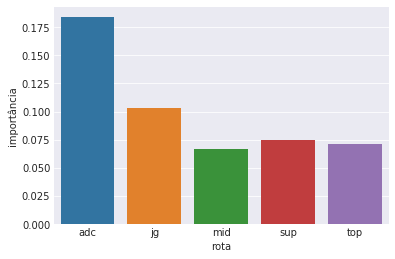

In [4]:
#grafico da importancia de cada rota para o resultado final do jogo

fig=plt.figure()
ax=fig.add_subplot()
ax=sb.barplot(x="rota",y="importância",data=dataframe_routes_importance,ax=ax)
fig.savefig(const.file_routes_importance)

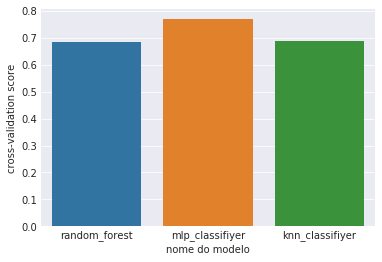

In [5]:
#grafico da media dos scores calculados pela cross-validation
fig=plt.figure()
ax=fig.add_subplot()
ax=sb.barplot(x="nome modelo",y="cross val score",data=dataframe_crossvalidation_score,ax=ax)
ax.set_xlabel("nome do modelo")
ax.set_ylabel("cross-validation score")
fig.savefig(const.file_cross_validation_acuracy)

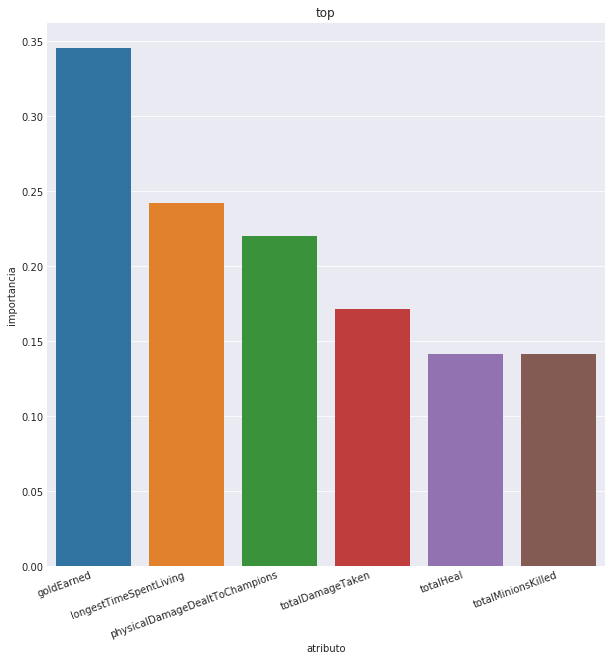

In [6]:
#graficos das caracteristicas selecionadas de cada rota
fig=plt.figure(figsize=(10,10))
cont=1

for rota_name in const.rotas_names:
    ax=fig.add_subplot(1,1,1)
    ax.set_title(rota_name)

    path=const.path_tabelas_rotas+rota_name+"/selected_features.csv"
    dataframe=pd.read_csv(path)
    ax=sb.barplot(x=dataframe["atributo"],y=dataframe["importancia"],ax=ax)
    ax.set_xticklabels(dataframe["atributo"],rotation=20, ha="right")
    fig.savefig(const.file_selected_features+rota_name+"_selected_features.png")
    cont=cont+1

    

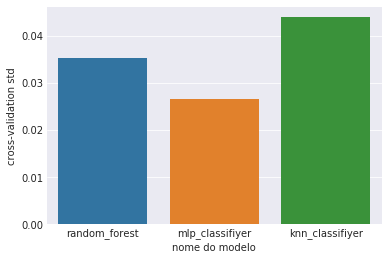

In [7]:
#grafico do desvio padrão dos scores calculados pela cross-validation
fig=plt.figure()
ax=fig.add_subplot()
ax2=sb.barplot(x="nome modelo",y="cross val std",data=dataframe_crossvalidation_score,ax=ax)
ax2.set_xlabel("nome do modelo")
ax2.set_ylabel("cross-validation std")

fig.savefig(const.file_cross_validation_std)